In [24]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [25]:
def mean(val):
    if isinstance(val, list):
        return np.mean(val) if len(val) != 0 else 0
    else:
        return val

def sem(val):
    if isinstance(val, list):
        return np.std(val) / np.sqrt(1000) if len(val) != 0 else 0
    else:
        return 0
    
plt.rcParams.update({'font.size': 15, 'lines.linewidth': 3})

### continuous lander

In [33]:
# thresholds = [10, 20, 30, 40, 50]
thresholds = [0.01, 0.02, 0.03, 0.04, 0.05]
metrics = {}
metrics["accuracies"] = {threshold: 0 for threshold in thresholds}
metrics["avg_bound_errors"] = {threshold: [] for threshold in thresholds}
metrics["bounds"] = {threshold: [] for threshold in thresholds}
metrics["true_evds"] = {threshold: [] for threshold in thresholds}
metrics["num_demos"] = {threshold: [] for threshold in thresholds}
metrics["policy_accuracies"] = {threshold: [] for threshold in thresholds}
metrics["policy_optimalities"] = {threshold: [] for threshold in thresholds}
metrics["confidence"] = {threshold: 0 for threshold in thresholds}
metrics["confusion_matrices"] = {threshold: [[]] for threshold in thresholds}

with open("../continuous_birl/simulations/lander/nevd.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("NEW THRESHOLD"):
            curr_thresh = float(re.search("NEW THRESHOLD ([\d.-]+)", line).group(1))
        elif line.strip() == "Policy loss bounds":
            curr_metric = "bounds"
        elif line.strip() == "Num demos":
            curr_metric = "num_demos"
        elif line.strip() == "True EVDs":
            curr_metric = "true_evds"
        elif line.strip() == "Bound errors":
            curr_metric = "avg_bound_errors"
        elif line.strip() == "Policy optimalities":
            curr_metric = "policy_optimalities"
        elif line.strip() == "Policy accuracies":
            curr_metric = "policy_accuracies"
        elif line.strip() == "Confidence":
            curr_metric = "confidence"
        elif line.strip() == "Accuracy":
            curr_metric = "accuracies"
        elif line.strip() == "Confusion matrices":
            curr_metric = "confusion_matrices"
        elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[")) and "demonstrations" not in line.strip():
            if curr_metric == "num_demos":
                metrics[curr_metric][curr_thresh].append(1)
            elif curr_metric != "confidence" and curr_metric != "accuracies" and curr_metric != "" and curr_metric != "confusion_matrices":
                metrics[curr_metric][curr_thresh].append(np.abs(float(line.strip())))
            elif curr_metric == "confidence" or curr_metric == "accuracies":
                metrics[curr_metric][curr_thresh] = float(line.strip())
            elif curr_metric == "confusion_matrices":
                metrics[curr_metric][curr_thresh] = eval(line.strip())
        else:
            curr_metric = ""


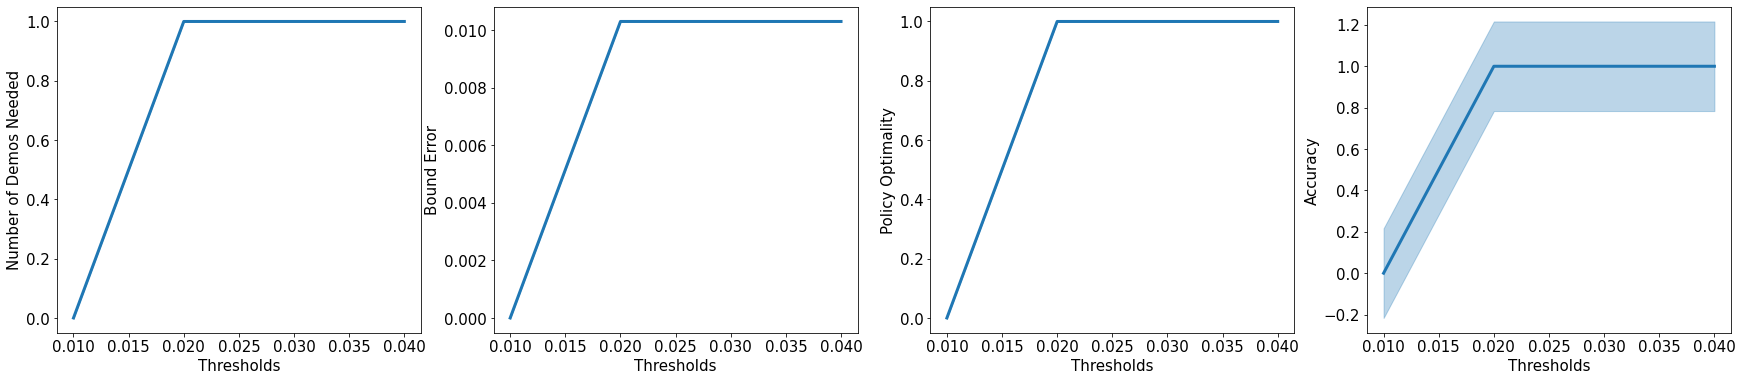

In [34]:
fig, axes = plt.subplots(1, 4, figsize = (30, 6))
color = "#1F77B4"
labels = thresholds[::-1]
x = labels[1:]

# y = np.array([mean(metrics["bounds"][t]) for t in x])
# axes[0, 0].plot(x, y, color = color)
# err = np.array([sem(metrics["bounds"][t]) for t in x])
# axes[0, 0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 0].set_title("α-VaR Bounds")

y = np.array([mean(metrics["num_demos"][t]) for t in x])
axes[0].plot(x, y, color = color)
err = np.array([sem(metrics["num_demos"][t]) for t in x])
axes[0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[0].set(xlabel = "Thresholds", ylabel = "Number of Demos Needed")
# axes[0].set_yticks([round(v, 2) for v in np.arange(0.60, 0.80, 0.05)])

# y = np.array([mean(metrics["true_evds"][t]) for t in x])
# axes[0, 2].plot(x, y, color = color)
# err = np.array([sem(metrics["true_evds"][t]) for t in x])
# axes[0, 2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 2].set_title("Ground Truth EVD")
# axes[0, 2].set_yticks([round(v, 3) for v in np.arange(0.000, 0.011, 0.002)])

y = np.array([mean(metrics["avg_bound_errors"][t]) for t in x])
axes[1].plot(x, y, color = color)
err = np.array([sem(metrics["avg_bound_errors"][t]) for t in x])
axes[1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[1].set(xlabel = "Thresholds", ylabel = "Bound Error")

y = np.array([mean(metrics["policy_optimalities"][t]) for t in x])
axes[2].plot(x, y, color = color)
err = np.array([sem(metrics["policy_optimalities"][t]) for t in x])
axes[2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[2].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
# axes[2].set_ylim([0.67, 1.03])
axes[2].set(xlabel = "Thresholds", ylabel = "Policy Optimality")

# y = np.array([mean(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].plot(x, y, color = color)
# err = np.array([sem(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[1, 1].set_title("Policy Accuracy")
# axes[1, 1].set_yticks([round(v, 3) for v in np.arange(0.960, 0.981, 0.005)])

# axes[1, 2].plot(x, [metrics["confidence"][t] for t in x], color = color)
# axes[1, 2].set_title("Percentage of Worlds That Passed")

y = np.array([metrics["accuracies"][t] for t in x])
axes[3].plot(x, y, color = color)
err = np.array([np.std(y) / np.sqrt(len(y))] * len(y))
axes[3].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[3].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
# axes[3].set_ylim([0.67, 1.03])
axes[3].set(xlabel = "Thresholds", ylabel = "Accuracy")

plt.show()

In [ ]:
# ### State
# s[0] is the horizontal coordinate
# s[1] is the vertical coordinate
# s[2] is the horizontal speed
# s[3] is the vertical speed
# s[4] is the angle
# s[5] is the angular speed
# s[6] 1 if first leg has contact, else 0
# s[7] 1 if second leg has contact, else 0

# ### Features
# features = np.array([
#             state[0],
#             state[1],
#             np.sqrt(state[0]**2 + state[1]**2),
#             state[2],
#             state[3],
#             np.sqrt(state[2]**2 + state[3]**2),
#             state[4],
#             np.abs(state[4]),
#             state[5],
#             state[6],
#             state[7]
#         ])

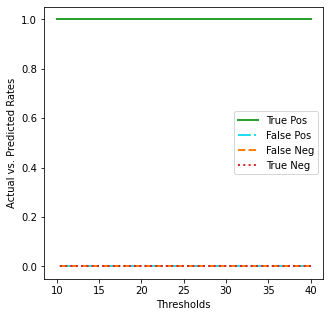

In [18]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
tp = [metrics["confusion_matrices"][t][0][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fp = [metrics["confusion_matrices"][t][0][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fn = [metrics["confusion_matrices"][t][1][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
tn = [metrics["confusion_matrices"][t][1][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
plt.plot(x, tp, label = "True Pos", color = "#2CA02C", linestyle = "-")
plt.plot(x, fp, label = "False Pos", color = "#21DDF1", linestyle = "-.")
plt.plot(x, fn, label = "False Neg", color = "#FF7F0E", linestyle = "--")
plt.plot(x, tn, label = "True Neg", color = "#D62728", linestyle = ":")
ax.set_yticks(np.arange(0.0, 1.1, 0.2))
plt.ylabel("Actual vs. Predicted Rates")
plt.xlabel("Thresholds")
plt.legend()
plt.show()

In [3]:
max_demos = 10
possible_rewards = ["center", "anywhere", "crash"] + ['hypo0', 'hypo1', 'hypo2', 'hypo4', 'hypo5', 'hypo6', 'hypo7', 'hypo10', 'hypo19', 'hypo22', 'hypo23', 'hypo25', 'hypo26', 'hypo27', 'hypo30', 'hypo31', 'hypo34', 'hypo35', 'hypo37', 'hypo39', 'hypo40', 'hypo42', 'hypo45', 'hypo47', 'hypo48', 'hypo50', 'hypo52', 'hypo53', 'hypo55', 'hypo56', 'hypo57', 'hypo58', 'hypo59', 'hypo61', 'hypo63', 'hypo66', 'hypo67', 'hypo69', 'hypo71', 'hypo73', 'hypo74', 'hypo75', 'hypo76', 'hypo79', 'hypo82', 'hypo86', 'hypo89', 'hypo92', 'hypo93', 'hypo94', 'hypo95', 'hypo96']

metrics = {}
metrics["true_evds"] = {num_demos + 1: 0 for num_demos in range(max_demos)}
metrics["pmfs"] = {num_demos + 1: 0 for num_demos in range(max_demos)}
metrics["learned_policies"] = {num_demos + 1: 0 for num_demos in range(max_demos)}
metrics["comparison_grids"] = {num_demos + 1: 0 for num_demos in range(max_demos)}

with open("../continuous_birl/simulations/lander/debugging.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("True reward function"):
            curr_metric = "true_reward"
        elif line.strip() == "True optimal policy":
            curr_metric = "top"
        elif line.strip() == "Possible policies":
            curr_metric = "pp"
        elif line.startswith("Num demos"):
            curr_demos = float(re.search("Num demos ([.\d]+)", line).group(1))
        elif line.strip() == "EVDs":
            curr_metric = "true_evds"
        elif line.strip() == "PMFs":
            curr_metric = "pmfs"
        elif line.strip() == "Learned policies":
            curr_metric = "learned_policies"
        elif line.strip() == "Comparison grid":
            curr_metric = "comparison_grids"
        elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[", "(")):
            if curr_metric == "true_reward":
                true_reward = line.strip()
            elif curr_metric == "top":
                true_pi = eval(line.strip())
            elif curr_metric == "pp":
                possible_policies = eval(line.strip())
            else:
                metrics[curr_metric][curr_demos] = eval(line.strip())

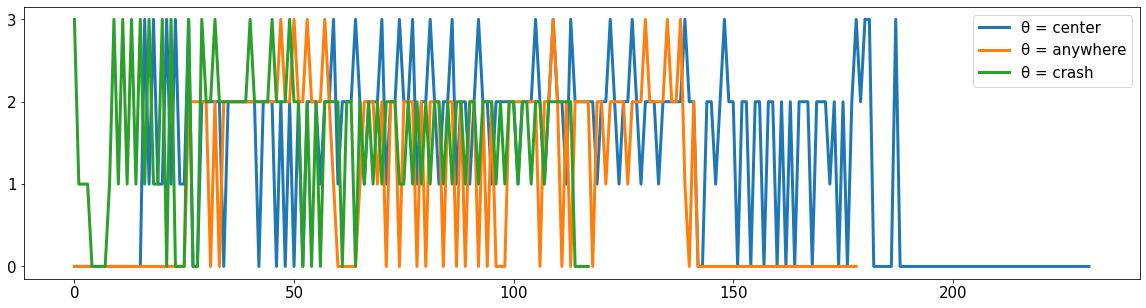

In [11]:
### Debugging policies

fig, ax = plt.subplots(1, 1, figsize = (20, 5))
for i in range(len(possible_rewards) - 52):
    pp = possible_policies[i]
    plt.plot(range(len(pp)), pp, label = "θ = {}".format(possible_rewards[i]))
    plt.yticks([0, 1, 2, 3])
plt.legend()
plt.show()

In [13]:
### Comparison grid

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
comparison_grid = metrics["comparison_grids"][1]
ax.imshow(comparison_grid)
ax.set_xticks(np.arange(len(possible_rewards)))
ax.set_xticklabels(["θ={}".format(pr) for pr in possible_rewards])
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_yticks(np.arange(len(possible_rewards)))
ax.set_yticklabels(["π*_{}".format(pr) for pr in possible_rewards])
for j in range(len(possible_rewards)):
    for k in range(len(possible_rewards)):
        text = ax.text(k, j, round(comparison_grid[j][k], 4), ha="center", va="center", color="w")
plt.title("REWARDS")
plt.show()

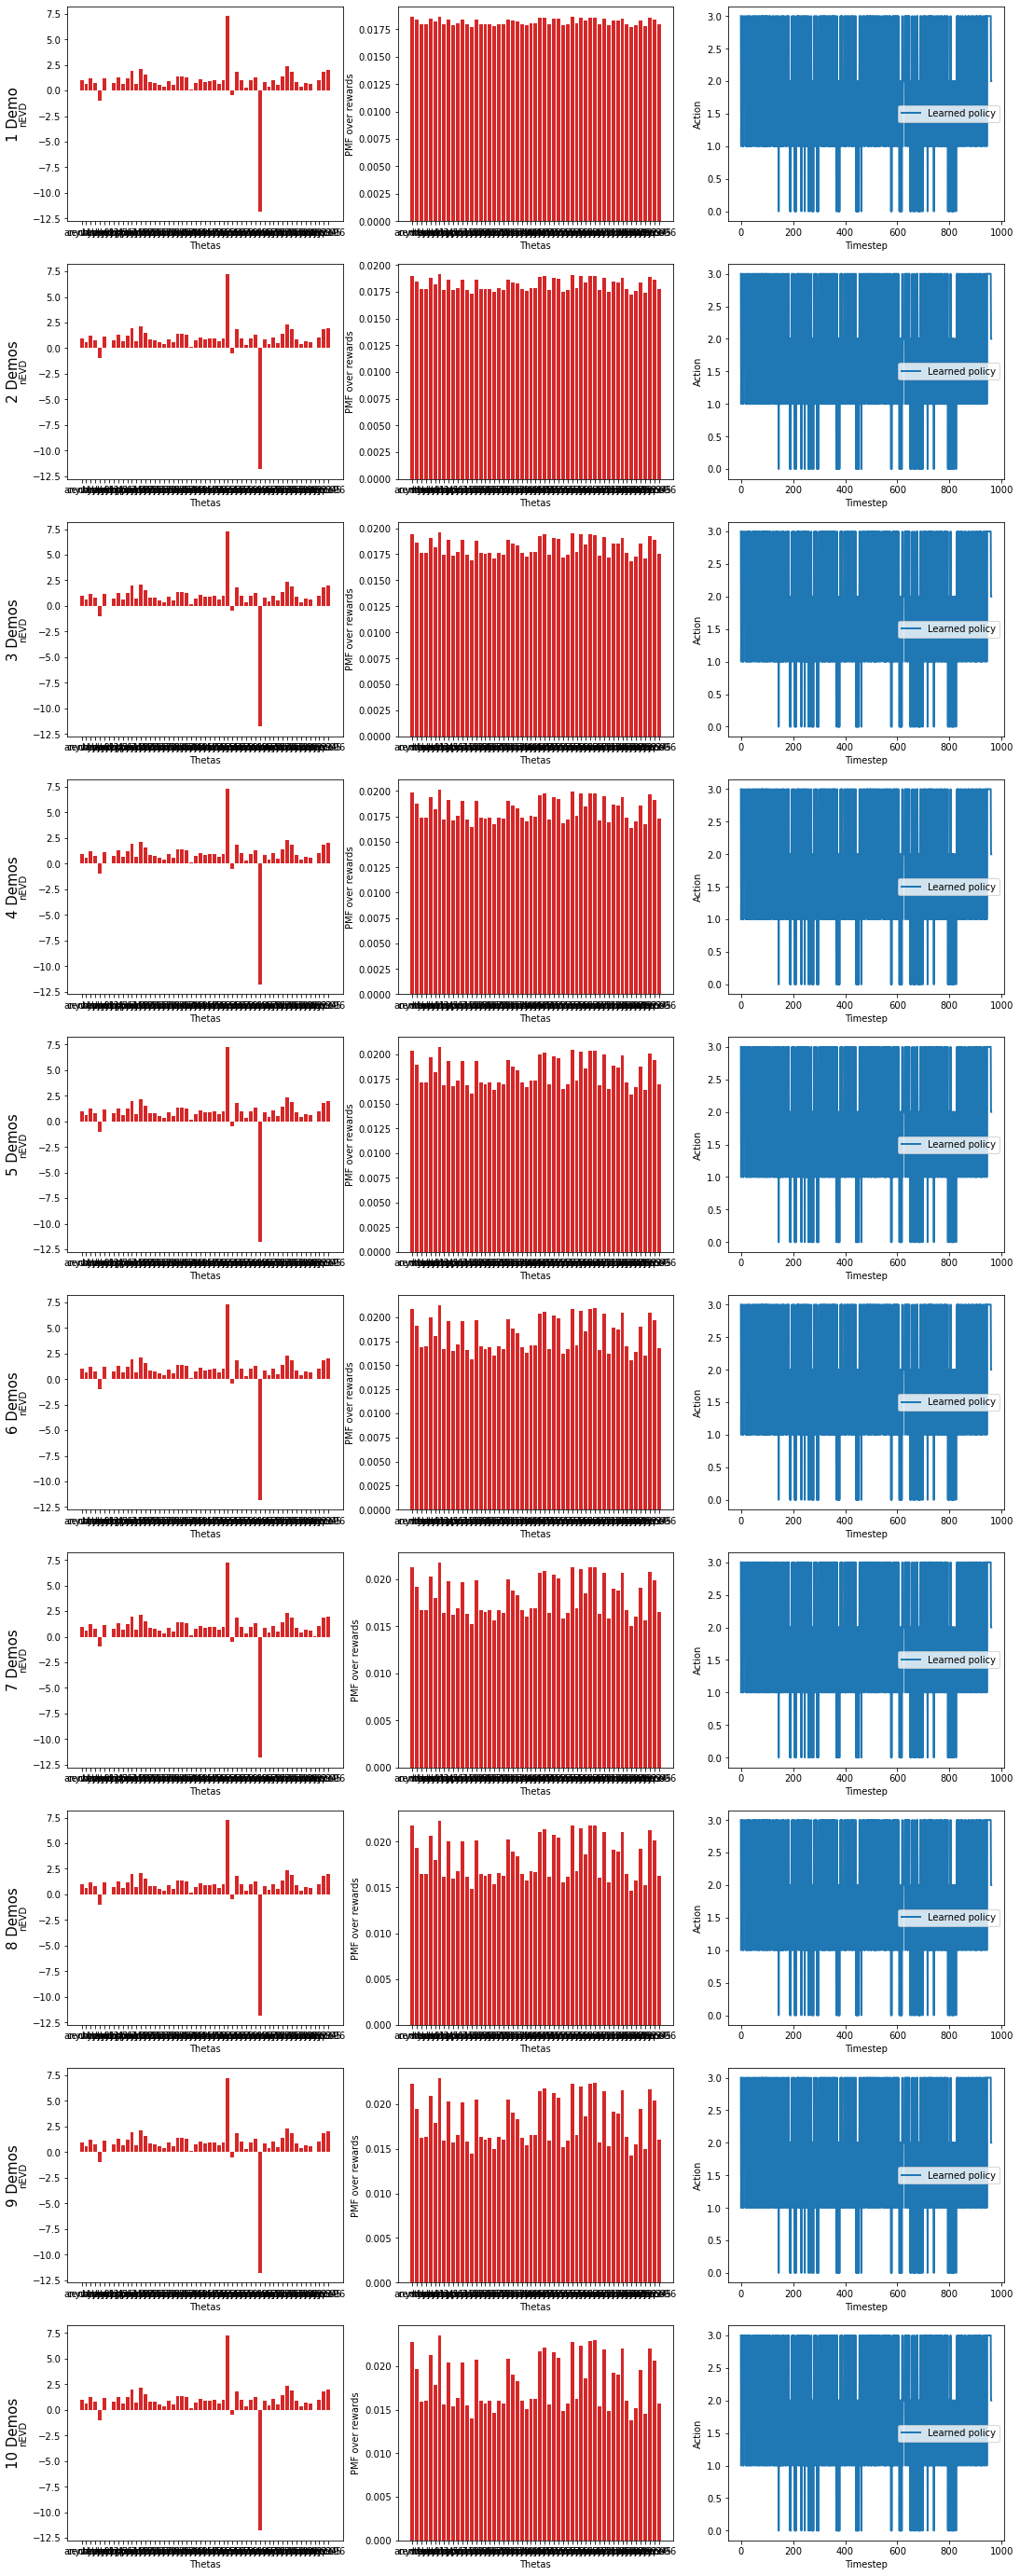

In [14]:
plt.rcParams.update({'font.size': 10, 'lines.linewidth': 2})

rows = ["{} Demo{}".format(num_demos, "s" if num_demos > 1 else "") for num_demos in range(1, max_demos + 1)]

fig, axes = plt.subplots(max_demos, 3, figsize = (18, 50))
color = "#D62728"

for i in range(max_demos):
    num_demos = i + 1
    axes[i, 0].bar([pr for pr in possible_rewards], metrics["true_evds"][num_demos], color = color)
    axes[i, 0].set(xlabel = "Thetas", ylabel = "nEVD")
    
    axes[i, 1].bar([pr for pr in possible_rewards], metrics["pmfs"][num_demos], color = color)
    axes[i, 1].set(xlabel = "Thetas", ylabel = "PMF over rewards")
    
    learned_pi = metrics["learned_policies"][num_demos]
    axes[i, 2].plot(range(len(learned_pi)), learned_pi, label = "Learned policy")
    axes[i, 2].legend()
    axes[i, 2].set(xlabel = "Timestep", ylabel = "Action")    

for ax, row in zip(axes[:, 0], rows):
    ax.annotate(row, (0, 0.5), xytext=(-50, 0), ha='right', va='center',
                size=15, rotation=90, xycoords='axes fraction',
                textcoords='offset points')

plt.show()

### continuous lavaworld

In [7]:
N = 6
max_demos = 10
possible_rewards = [round(pr, 2) for pr in np.linspace(0, 1, N)]
# possible_rewards = [[0, 0.5], [0, 1], [0.5, 0], [0.5, 0.5], [0.5, 1], [1, 0], [1, 0.5], [1, 1]]
traj_length = 20

metrics = {}
metrics["true_evds"] = {num_demos + 1: 0 for num_demos in range(max_demos)}
metrics["pmfs"] = {num_demos + 1: 0 for num_demos in range(max_demos)}
metrics["learned_policies"] = {num_demos + 1: 0 for num_demos in range(max_demos)}
metrics["comparison_grids"] = {num_demos + 1: 0 for num_demos in range(max_demos)}

with open("./debugging.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("Environment"):
            curr_metric = "lava_loc"
        elif line.startswith("True reward function"):
            curr_metric = "true_reward"
        elif line.strip() == "True optimal policy":
            curr_metric = "top"
        elif line.strip() == "Possible policies":
            curr_metric = "pp"
        elif line.startswith("Num demos"):
            curr_demos = float(re.search("Num demos ([.\d]+)", line).group(1))
        elif line.strip() == "EVDs":
            curr_metric = "true_evds"
        elif line.strip() == "PMFs":
            curr_metric = "pmfs"
        elif line.strip() == "Learned policies":
            curr_metric = "learned_policies"
        elif line.strip() == "Comparison grid":
            curr_metric = "comparison_grids"
        elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[", "(")):
            if curr_metric == "lava_loc":
                lava_loc = eval(line.strip())
            elif curr_metric == "true_reward":
                true_reward = eval(line.strip())
            elif curr_metric == "top":
                true_pi = eval(line.strip())
                true_pi_x = [tp[0] for tp in true_pi]
                true_pi_y = [tp[1] for tp in true_pi]
            elif curr_metric == "pp":
                possible_policies = eval(line.strip())
            else:
                metrics[curr_metric][curr_demos] = eval(line.strip())

In [8]:
# ### Debugging betas

# fig, axes = plt.subplots(2, 3, figsize = (16, 8))

# betas = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# beta_pmfs = [[0.15929546652219861, 0.1622148137171831, 0.16515655560966, 0.16811997217523475, 0.17110432646881438, 0.1741088655069092], [0.15291760887604455, 0.15827377759239153, 0.1637385708832279, 0.16931066778260628, 0.174988603401653, 0.18077077146407683], [0.14733258286048947, 0.15474535334883965, 0.16239880794353137, 0.17029305928591282, 0.17842781602431054, 0.18680238053691633], [0.14169002968663325, 0.15111779422623836, 0.16096544934956958, 0.17123641365094164, 0.1819331532718849, 0.1930571598147324], [0.13588383563964399, 0.14730318848883298, 0.15938461805799448, 0.17213986403075973, 0.18557885739326466, 0.1997096363895041], [0.13099693725400055, 0.1440332572662244, 0.1579770259148908, 0.17285106196913724, 0.18867527075139004, 0.20546644684435686], [0.12529499514396295, 0.14014237827507553, 0.15623489882696429, 0.1736154998653219, 0.1923225934725759, 0.2123896344160994], [0.1204773527233293, 0.13676243810330252, 0.15463711677213676, 0.1741748100625814, 0.1954434747080202, 0.2185048076306299], [0.11602454307478798, 0.13362473829957866, 0.1531452064582256, 0.1746854357073152, 0.19833712765682895, 0.2241829488032635], [0.11034046176623889, 0.12947341766599235, 0.15103633782363773, 0.17519049363410516, 0.20208829453829746, 0.23187099457172836], [0.10729280351946209, 0.12729747236732103, 0.14998408891035106, 0.17552759382209193, 0.2040884511456974, 0.23580959023507633]]

# r, c = 0, 0
# for i in range(len(beta_pmfs)):
#     if betas[i] % 2 == 0:
#         axes[r, c].bar([str(round(pr, 1)) for pr in possible_rewards], beta_pmfs[i])
#         axes[r, c].set_title("Beta = {}".format(betas[i]))
#         c += 1
#         if c == 3:
#             c = 0
#             r += 1

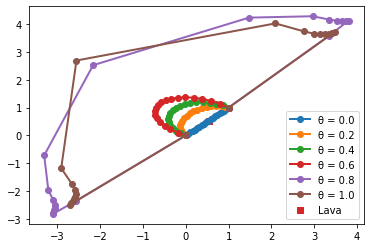

In [9]:
### Debugging policies

for i in range(len(possible_rewards)):
    pp = possible_policies[i]
    ppx = [ppi[0] for ppi in pp]
    ppy = [ppi[1] for ppi in pp]
    plt.plot(ppx, ppy, "-o", label = "θ = {}".format(round(possible_rewards[i], 1)))
plt.scatter(lava_loc[0], lava_loc[1], color = "#D62728", marker = "s", label = "Lava")
plt.legend()
plt.show()

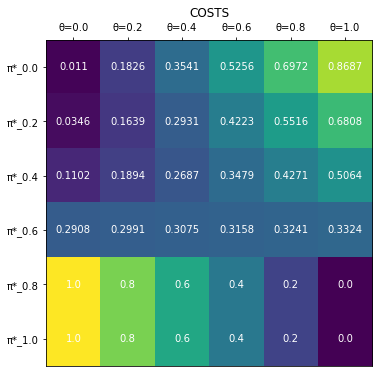

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

comparison_grid = metrics["comparison_grids"][1]
ax.imshow(comparison_grid)
ax.set_xticks(np.arange(len(possible_rewards)))
ax.set_xticklabels(["θ={}".format(round(pr, 2)) for pr in possible_rewards])
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_yticks(np.arange(len(possible_rewards)))
ax.set_yticklabels(["π*_{}".format(round(pr, 2)) for pr in possible_rewards])
for j in range(len(possible_rewards)):
    for k in range(len(possible_rewards)):
        text = ax.text(k, j, round(comparison_grid[j][k], 4), ha="center", va="center", color="w")
plt.title("COSTS")
plt.show()

In [11]:
# probs = []
# for i in range(len(possible_rewards)):
#     print("For theta_{} = {}, ...".format(i, possible_rewards[i]))
#     n = np.exp(-10 * comparison_grid[1][i])
#     print("Cost for demo at true theta = 0.2 is", comparison_grid[2][i], "& numerator is", n) # pi_0.2
#     counter_rewards = np.array([comparison_grid[j][i] for j in range(len(possible_rewards))])
#     d = sum(np.exp(-10 * counter_rewards))
#     print("Costs for all policies is", counter_rewards, "& denominator is", d)
#     print("So probability for theta_{} = {} is {}".format(i, possible_rewards[i], n/d))
#     print("-----")

In [12]:
# ### Debugging values
# fig, axes = plt.subplots(1, 1, figsize = (10, 10))
# possible_rewards = [[0, 0], [0, 0.5], [0, 1], [0.5, 0], [0.5, 0.5], [0.5, 1], [1, 0], [1, 0.5], [1, 1]]

# comparison_grid = [[0.0, 0.4278384445054337, 0.8556768890108674, 0.02409160778845537, 0.45193005229388905, 0.8797684967993227, 0.04818321557691074, 0.4760216600823444, 0.9038601045877781],
#                    [0.0, 1.1816374412176303e-06, 2.3632748824352606e-06, 0.5, 0.5000011816374412, 0.5000023632748825, 1.0, 1.0000011816374412, 1.0000023632748825],
#                    [0.0, 6.55163105177492e-07, 1.310326210354984e-06, 0.5, 0.5000006551631052, 0.5000013103262103, 1.0, 1.000000655163105, 1.0000013103262104],
#                    [0.0, 0.4278384445054337, 0.8556768890108674, 0.02409160778845537, 0.45193005229388905, 0.8797684967993227, 0.04818321557691074, 0.4760216600823444, 0.9038601045877781],
#                    [0.0, 0.340365408872385, 0.68073081774477, 0.06972318531813831, 0.4100885941905233, 0.7504540030629083, 0.13944637063627663, 0.4798117795086616, 0.8201771883810466],
#                    [0.0, 1.3045310947784926e-06, 2.6090621895569852e-06, 0.5, 0.5000013045310948, 0.5000026090621895, 1.0, 1.0000013045310947, 1.0000026090621896], [0.0, 0.4278384445054337, 0.8556768890108674, 0.02409160778845537, 0.45193005229388905, 0.8797684967993227, 0.04818321557691074, 0.4760216600823444, 0.9038601045877781], [0.0, 0.38616299406043025, 0.7723259881208605, 0.03579349138873572, 0.421956485449166, 0.8081194795095963, 0.07158698277747144, 0.4577499768379017, 0.843912970898332], [0.0, 0.3403323677194903, 0.6806647354389807, 0.06975632757087696, 0.4100886952903673, 0.7504210630098576, 0.13951265514175393, 0.47984502286124425, 0.8201773905807346]]
# axes.imshow(comparison_grid)
# axes.set_xticks(np.arange(len(possible_rewards)))
# axes.set_xticklabels(["θ={}".format(str(pr)) for pr in possible_rewards])
# axes.xaxis.set_ticks_position('top')
# axes.xaxis.set_label_position('top')
# axes.set_yticks(np.arange(len(possible_rewards)))
# axes.set_yticklabels(["π*_{}".format(str(pr)) for pr in possible_rewards])
# for j in range(len(possible_rewards)):
#     for k in range(len(possible_rewards)):
#         text = axes.text(k, j, round(comparison_grid[j][k], 2), ha="center", va="center", color="w")
# plt.title("COSTS")
# plt.show()

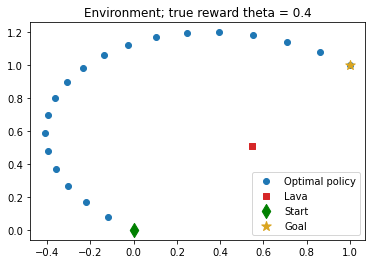

In [13]:
plt.scatter(true_pi_x, true_pi_y, label = "Optimal policy")
plt.scatter(lava_loc[0], lava_loc[1], color = "#D62728", marker = "s", label = "Lava")
plt.scatter(0, 0, color = "green", marker = "d", label = "Start", s = 100)
plt.scatter(1, 1, color = "goldenrod", marker = "*", label = "Goal", s = 100)
plt.title("Environment; true reward theta = {}".format(true_reward))
plt.legend()
plt.show()

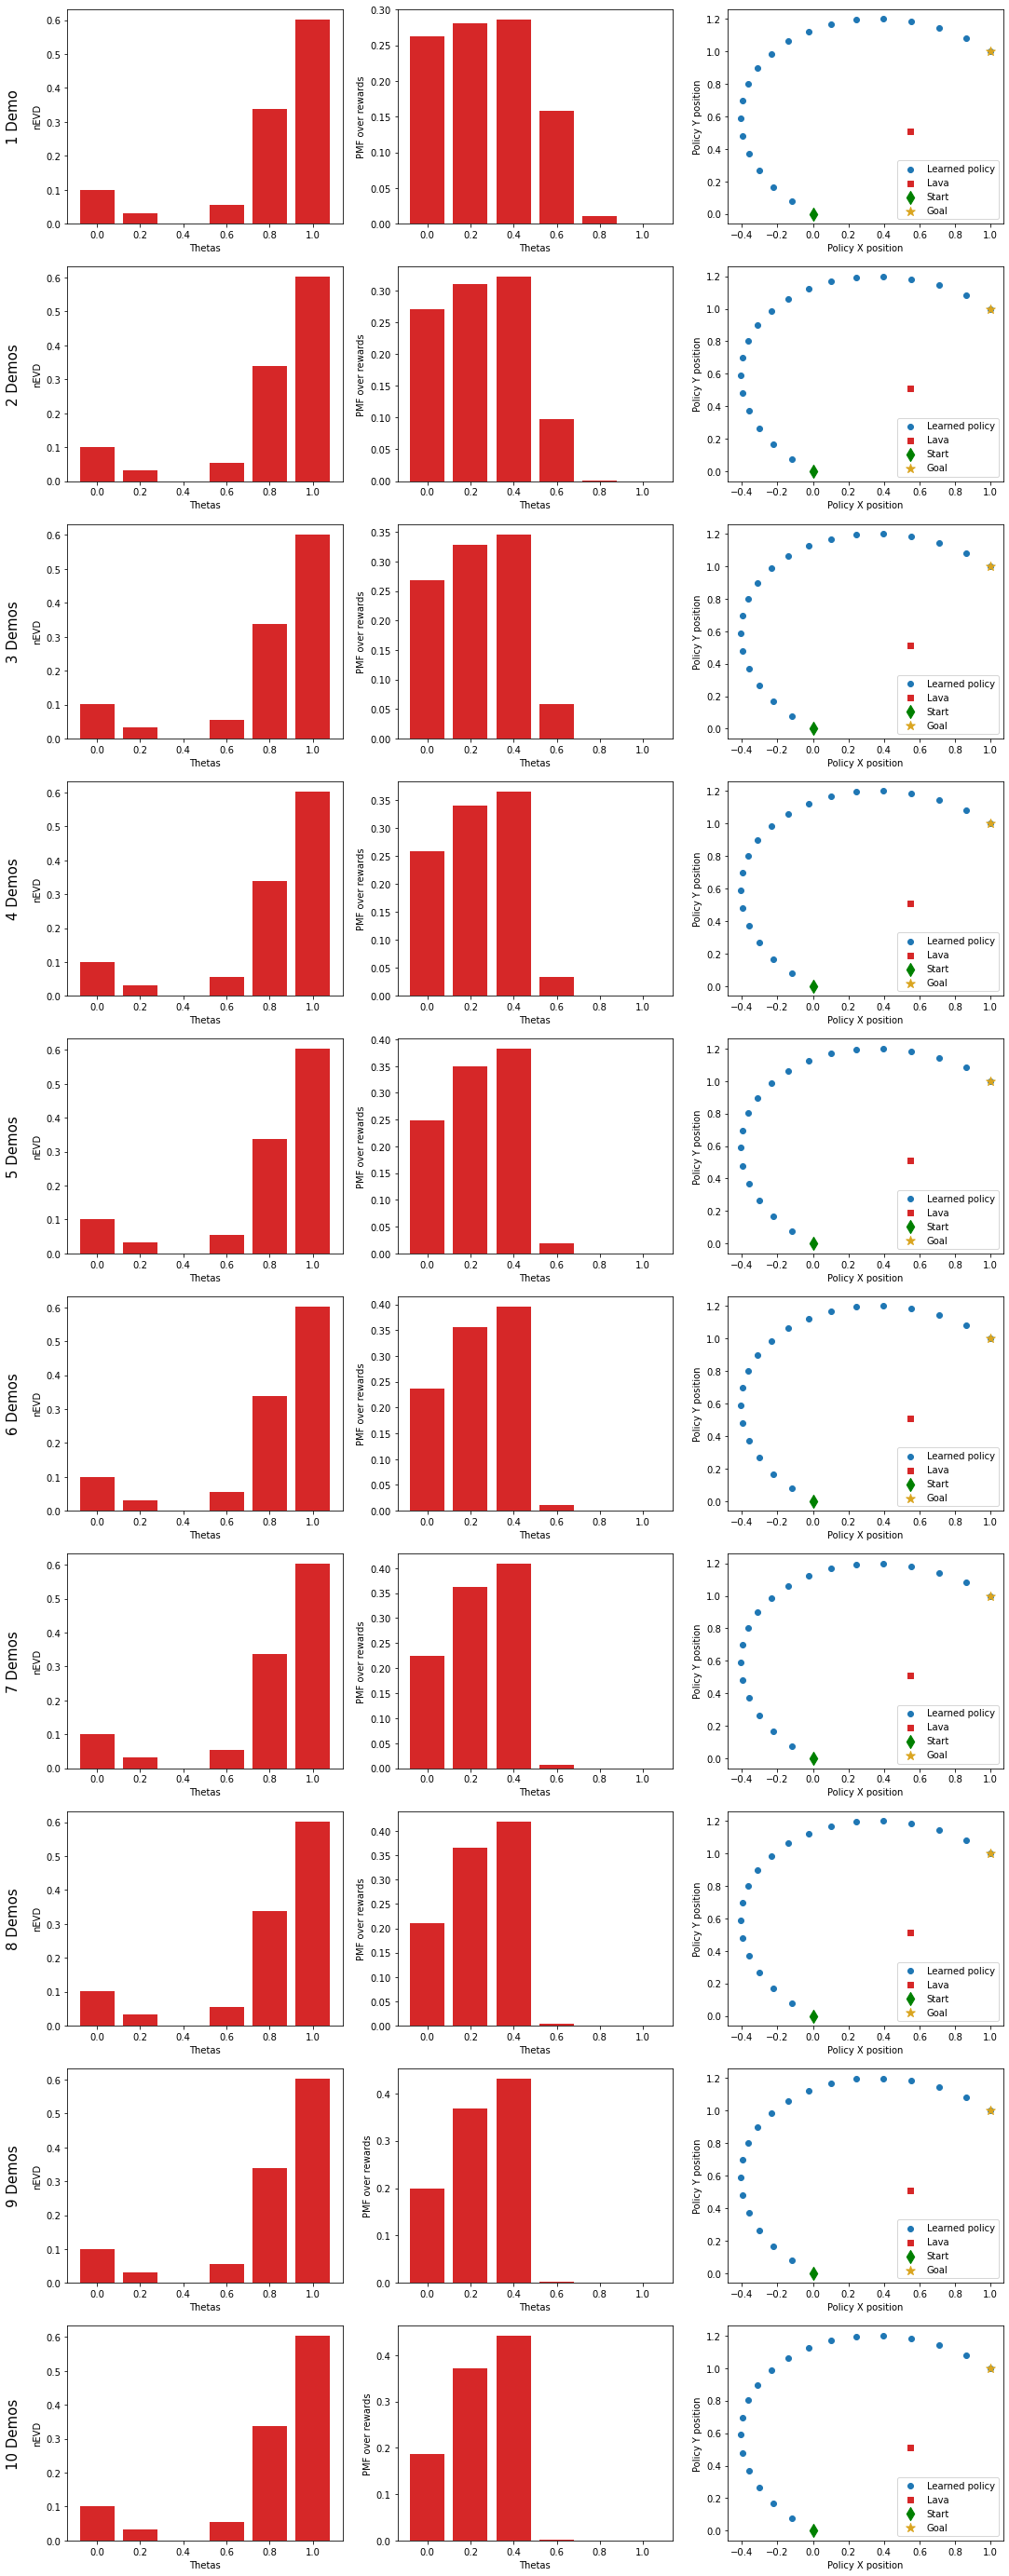

In [14]:
plt.rcParams.update({'font.size': 10, 'lines.linewidth': 2})

cols = ["nEVD", "PMF over Rewards", "Learned Policy", "Comparison Grid"]
rows = ["{} Demo{}".format(num_demos, "s" if num_demos > 1 else "") for num_demos in range(1, max_demos + 1)]

fig, axes = plt.subplots(max_demos, 3, figsize = (18, 50))
color = "#D62728"

for i in range(max_demos):
    num_demos = i + 1
    axes[i, 0].bar([str(pr) for pr in possible_rewards], metrics["true_evds"][num_demos], color = color)
    axes[i, 0].set(xlabel = "Thetas", ylabel = "nEVD")
    
    axes[i, 1].bar([str(pr) for pr in possible_rewards], metrics["pmfs"][num_demos], color = color)
    axes[i, 1].set(xlabel = "Thetas", ylabel = "PMF over rewards")
    
    learned_pi = metrics["learned_policies"][num_demos]
    learned_pi_x = [lp[0] for lp in learned_pi]
    learned_pi_y = [lp[1] for lp in learned_pi]
    axes[i, 2].scatter(learned_pi_x, learned_pi_y, label = "Learned policy")
    axes[i, 2].scatter(lava_loc[0], lava_loc[1], color = color, marker = "s", label = "Lava")
    axes[i, 2].scatter(0, 0, color = "green", marker = "d", label = "Start", s = 100)
    axes[i, 2].scatter(1, 1, color = "goldenrod", marker = "*", label = "Goal", s = 100)
    axes[i, 2].legend()
    axes[i, 2].set(xlabel = "Policy X position", ylabel = "Policy Y position")

#     comparison_grid = metrics["comparison_grids"][num_demos]
#     axes[i, 3].imshow(comparison_grid)
#     axes[i, 3].set_xticks(np.arange(len(possible_rewards)))
#     axes[i, 3].set_xticklabels(["θ={}".format(str(pr)) for pr in possible_rewards])
#     axes[i, 3].xaxis.set_ticks_position('top')
#     axes[i, 3].xaxis.set_label_position('top')
#     axes[i, 3].set_yticks(np.arange(len(possible_rewards)))
#     axes[i, 3].set_yticklabels(["π*_{}".format(str(pr)) for pr in possible_rewards])
#     for j in range(len(possible_rewards)):
#         for k in range(len(possible_rewards)):
#             text = axes[i, 3].text(k, j, round(comparison_grid[j][k], 2), ha="center", va="center", color="w")
    

for ax, row in zip(axes[:, 0], rows):
    ax.annotate(row, (0, 0.5), xytext=(-50, 0), ha='right', va='center',
                size=15, rotation=90, xycoords='axes fraction',
                textcoords='offset points')

plt.show()

In [5]:
def mean(val):
    if isinstance(val, list):
        return np.mean(val) if len(val) != 0 else 0
    else:
        return val

def sem(val):
    if isinstance(val, list):
        return np.std(val) / np.sqrt(1000) if len(val) != 0 else 0
    else:
        return 0
    
plt.rcParams.update({'font.size': 15, 'lines.linewidth': 3})

#### nEVD bounding

In [6]:
thresholds = [round(th, 1) for th in np.arange(start = 0.5, stop = -0.1, step = -0.1)]
metrics = {}
metrics["accuracies"] = {threshold: 0 for threshold in thresholds}
metrics["avg_bound_errors"] = {threshold: [] for threshold in thresholds}
metrics["num_demos"] = {threshold: [] for threshold in thresholds}
# metrics["policy_optimalities"] = {threshold: [] for threshold in thresholds}
metrics["confusion_matrices"] = {threshold: [[]] for threshold in thresholds}

with open("continuous_outputs/avar.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("NEW THRESHOLD"):
            curr_thresh = float(re.search("NEW THRESHOLD ([\d.-]+)", line).group(1))
        elif line.strip() == "Bound errors":
            curr_metric = "avg_bound_errors"
        elif line.strip() == "Num demos":
            curr_metric = "num_demos"
#         elif line.strip() == "Policy optimalities":
#             curr_metric = "policy_optimalities"
        elif line.strip() == "Accuracy":
            curr_metric = "accuracies"
        elif line.strip() == "Confusion matrices":
            curr_metric = "confusion_matrices"
        elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[")):
            if curr_metric != "confidence" and curr_metric != "accuracies" and curr_metric != "" and curr_metric != "confusion_matrices":
                metrics[curr_metric][curr_thresh].append(np.abs(float(line.strip())))
            elif curr_metric == "confidence" or curr_metric == "accuracies":
                metrics[curr_metric][curr_thresh] = float(line.strip())
            elif curr_metric == "confusion_matrices":
                metrics[curr_metric][curr_thresh] = eval(line.strip())
        else:
            curr_metric = ""


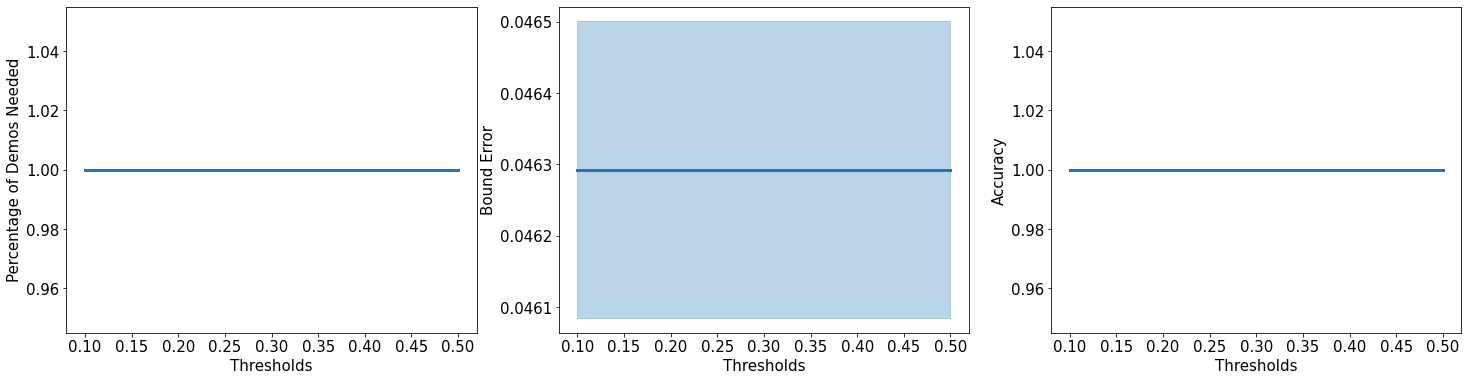

In [7]:
fig, axes = plt.subplots(1, 3, figsize = (25, 6))
color = "#1F77B4"
labels = thresholds[::-1]
x = labels[1:]

# y = np.array([mean(metrics["bounds"][t]) for t in x])
# axes[0, 0].plot(x, y, color = color)
# err = np.array([sem(metrics["bounds"][t]) for t in x])
# axes[0, 0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 0].set_title("α-VaR Bounds")

y = np.array([mean(metrics["num_demos"][t]) for t in x])
axes[0].plot(x, y, color = color)
err = np.array([sem(metrics["num_demos"][t]) for t in x])
axes[0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[0].set(xlabel = "Thresholds", ylabel = "Percentage of Demos Needed")
# axes[0].set_yticks([round(v, 2) for v in np.arange(0.60, 0.80, 0.05)])

# y = np.array([mean(metrics["true_evds"][t]) for t in x])
# axes[0, 2].plot(x, y, color = color)
# err = np.array([sem(metrics["true_evds"][t]) for t in x])
# axes[0, 2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 2].set_title("Ground Truth EVD")
# axes[0, 2].set_yticks([round(v, 3) for v in np.arange(0.000, 0.011, 0.002)])

y = np.array([mean(metrics["avg_bound_errors"][t]) for t in x])
axes[1].plot(x, y, color = color)
err = np.array([sem(metrics["avg_bound_errors"][t]) for t in x])
axes[1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[1].set(xlabel = "Thresholds", ylabel = "Bound Error")
# axes[1].set_yticks([round(v, 2) for v in np.arange(0.00, 0.035, 0.01)])

# y = np.array([mean(metrics["policy_optimalities"][t]) for t in x])
# axes[2].plot(x, y, color = color)
# err = np.array([sem(metrics["policy_optimalities"][t]) for t in x])
# axes[2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# # axes[2].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
# # axes[2].set_ylim([0.67, 1.03])
# axes[2].set(xlabel = "Thresholds", ylabel = "Policy Optimality")

# y = np.array([mean(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].plot(x, y, color = color)
# err = np.array([sem(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[1, 1].set_title("Policy Accuracy")
# axes[1, 1].set_yticks([round(v, 3) for v in np.arange(0.960, 0.981, 0.005)])

# axes[1, 2].plot(x, [metrics["confidence"][t] for t in x], color = color)
# axes[1, 2].set_title("Percentage of Worlds That Passed")

y = np.array([metrics["accuracies"][t] for t in x])
axes[2].plot(x, y, color = color)
err = np.array([np.std(y) / np.sqrt(len(y))] * len(y))
axes[2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[2].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
# axes[2].set_ylim([0.67, 1.03])
axes[2].set(xlabel = "Thresholds", ylabel = "Accuracy")

plt.show()

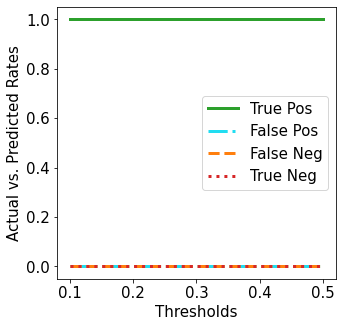

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
tp = [metrics["confusion_matrices"][t][0][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fp = [metrics["confusion_matrices"][t][0][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fn = [metrics["confusion_matrices"][t][1][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
tn = [metrics["confusion_matrices"][t][1][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
plt.plot(x, tp, label = "True Pos", color = "#2CA02C", linestyle = "-")
plt.plot(x, fp, label = "False Pos", color = "#21DDF1", linestyle = "-.")
plt.plot(x, fn, label = "False Neg", color = "#FF7F0E", linestyle = "--")
plt.plot(x, tn, label = "True Neg", color = "#D62728", linestyle = ":")
ax.set_yticks(np.arange(0.0, 1.1, 0.2))
plt.ylabel("Actual vs. Predicted Rates")
plt.xlabel("Thresholds")
plt.legend()
plt.show()

#### baseline

In [12]:
thresholds = [round(t, 1) for t in np.arange(start = 0.0, stop = 1.1, step = 0.1)]
metrics = {}
metrics["bound_errors"] = {threshold: [] for threshold in thresholds}
metrics["num_demos"] = {threshold: [] for threshold in thresholds}
# metrics["policy_optimalities"] = {threshold: [] for threshold in thresholds}
metrics["accuracies"] = {threshold: 0 for threshold in thresholds}
metrics["confusion_matrices"] = {threshold: [[]] for threshold in thresholds}
baseline_evds = []
baseline_optimalities = []
baseline_accuracies = []

with open("continuous_outputs/baseline_pi.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("BASELINE POLICY"):
            matches = re.search("evd ([\d.-]+), policy optimality ([\d.-]+), and policy accuracy ([\d.-]+)", line)
            baseline_evds.append(float(matches.group(1)))
            baseline_optimalities.append(float(matches.group(2)))
            baseline_accuracies.append(float(matches.group(3)))
        elif line.startswith("NEW THRESHOLD"):
            curr_thresh = float(re.search("NEW THRESHOLD ([\d.-]+)", line).group(1))
        elif line.strip() == "Bound errors":
            curr_metric = "bound_errors"
        elif line.strip() == "Num demos":
            curr_metric = "num_demos"
        elif line.strip() == "Accuracy":
            curr_metric = "accuracies"
#         elif line.strip() == "Policy optimalities":
#             curr_metric = "policy_optimalities"
        elif line.strip() == "Confusion matrices":
            curr_metric = "confusion_matrices"
        elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[")) and curr_metric != "":
            if curr_metric == "confidence" or curr_metric == "accuracies":
                metrics[curr_metric][curr_thresh] = float(line.strip())
            elif curr_metric == "confusion_matrices":
                metrics[curr_metric][curr_thresh] = eval(line.strip())
            else:
                metrics[curr_metric][curr_thresh].append(float(line.strip()))
        else:
            curr_metric == ""

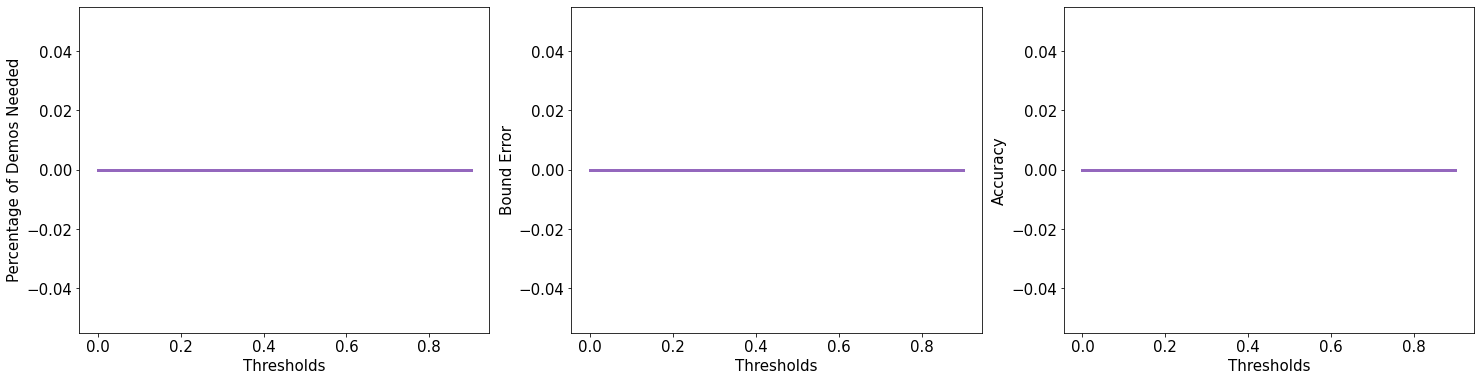

In [13]:
fig, axes = plt.subplots(1, 3, figsize = (25, 6))
color = "#9467BD"
labels = thresholds[::-1]
x = labels[1:]

# y = np.array([mean(metrics["bounds"][t]) for t in x])
# axes[0, 0].plot(x, y, color = color)
# err = np.array([sem(metrics["bounds"][t]) for t in x])
# axes[0, 0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 0].set_title("α-VaR Bounds")

y = np.array([mean(metrics["num_demos"][t]) for t in x])
axes[0].plot(x, y, color = color)
err = np.array([sem(metrics["num_demos"][t]) for t in x])
axes[0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[0].set(xlabel = "Thresholds", ylabel = "Percentage of Demos Needed")
# axes[0].set_yticks([round(v, 2) for v in np.arange(0.52, 0.721, 0.04)])

# y = np.array([mean(metrics["true_evds"][t]) for t in x])
# axes[0, 2].plot(x, y, color = color)
# err = np.array([sem(metrics["true_evds"][t]) for t in x])
# axes[0, 2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 2].set_title("Ground Truth EVD")
# axes[0, 2].set_yticks([round(v, 3) for v in np.arange(0.000, 0.011, 0.002)])

y = np.array([mean(metrics["bound_errors"][t]) for t in x])
axes[1].plot(x, y, color = color)
err = np.array([sem(metrics["bound_errors"][t]) for t in x])
axes[1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[1].set(xlabel = "Thresholds", ylabel = "Bound Error")
# axes[1].set_yticks([round(v, 2) for v in np.arange(0.00, 0.035, 0.01)])

# y = np.array([mean(metrics["policy_optimalities"][t]) for t in x])
# axes[2].plot(x, y, color = color)
# err = np.array([sem(metrics["policy_optimalities"][t]) for t in x])
# axes[2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# # axes[2].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
# # axes[2].set_ylim([0.67, 1.03])
# axes[2].set(xlabel = "Thresholds", ylabel = "Policy Optimality")

# y = np.array([mean(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].plot(x, y, color = color)
# err = np.array([sem(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[1, 1].set_title("Policy Accuracy")
# axes[1, 1].set_yticks([round(v, 3) for v in np.arange(0.960, 0.981, 0.005)])

# axes[1, 2].plot(x, [metrics["confidence"][t] for t in x], color = color)
# axes[1, 2].set_title("Percentage of Worlds That Passed")

y = np.array([metrics["accuracies"][t] for t in x])
axes[2].plot(x, y, color = color)
err = np.array([np.std(y) / np.sqrt(len(y))] * len(y))
axes[2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[2].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
# axes[2].set_ylim([0.67, 1.03])
axes[2].set(xlabel = "Thresholds", ylabel = "Accuracy")

plt.show()

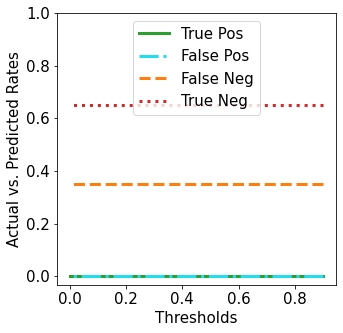

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
tp = [metrics["confusion_matrices"][t][0][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fp = [metrics["confusion_matrices"][t][0][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fn = [metrics["confusion_matrices"][t][1][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
tn = [metrics["confusion_matrices"][t][1][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
plt.plot(x, tp, label = "True Pos", color = "#2CA02C", linestyle = "-")
plt.plot(x, fp, label = "False Pos", color = "#21DDF1", linestyle = "-.")
plt.plot(x, fn, label = "False Neg", color = "#FF7F0E", linestyle = "--")
plt.plot(x, tn, label = "True Neg", color = "#D62728", linestyle = ":")
ax.set_yticks(np.arange(0.0, 1.1, 0.2))
plt.ylabel("Actual vs. Predicted Rates")
plt.xlabel("Thresholds")
plt.legend()
plt.show()

#### patience

In [15]:
thresholds = [1, 2, 3, 4, 5]
metrics = {}
metrics["accuracies"] = {threshold: 0 for threshold in thresholds}
metrics["num_demos"] = {threshold: [] for threshold in thresholds}
# metrics["policy_optimalities"] = {threshold: [] for threshold in thresholds}

with open("continuous_outputs/patience.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("NEW THRESHOLD"):
            curr_thresh = float(re.search("NEW THRESHOLD ([\d.-]+)", line).group(1))
#         elif line.strip() == "Policy optimalities":
#             curr_metric = "policy_optimalities"
        elif line.strip() == "Num demos":
            curr_metric = "num_demos"
        elif line.strip() == "Accuracy":
            curr_metric = "accuracies"
        elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[")):
            if curr_metric != "confidence" and curr_metric != "accuracies" and curr_metric != "":
                metrics[curr_metric][curr_thresh].append(np.abs(float(line.strip())))
            elif curr_metric == "confidence" or curr_metric == "accuracies":
                metrics[curr_metric][curr_thresh] = float(line.strip())
        else:
            curr_metric = ""

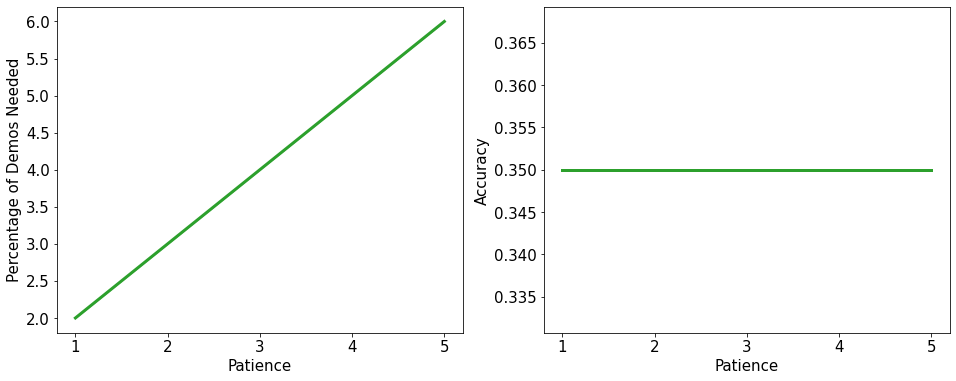

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (16, 6))
color = "#2CA02C"
labels = thresholds[::]
x = labels[:]

y = np.array([mean(metrics["num_demos"][t]) for t in x])
axes[0].plot(x, y, color = color)
err = np.array([sem(metrics["num_demos"][t]) for t in x])
axes[0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[0].set(xlabel = "Patience", ylabel = "Percentage of Demos Needed")
# axes[0].set_yticks([round(v, 2) for v in np.arange(0.60, 0.80, 0.05)])

# y = np.array([mean(metrics["policy_optimalities"][t]) for t in x])
# axes[1].plot(x, y, color = color)
# err = np.array([sem(metrics["policy_optimalities"][t]) for t in x])
# axes[1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# # axes[1].set_yticks([round(v, 1) for v in np.arange(0.0, 1.1, 0.2)])
# # axes[1].set_ylim([0, 1.1])
# axes[1].set(xlabel = "Patience", ylabel = "Policy Optimality")

y = np.array([metrics["accuracies"][t] for t in x])
axes[1].plot(x, y, color = color)
err = np.array([np.std(y) / np.sqrt(len(y))] * len(y))
axes[1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[1].set_yticks([round(v, 1) for v in np.arange(0.0, 1.1, 0.2)])
# axes[1].set_ylim([0, 1.1])
axes[1].set(xlabel = "Patience", ylabel = "Accuracy")

for ax in axes.flat:
    ax.set_xticks(labels)

plt.show()

### with random normalization

In [650]:
num_demos = list(range(1, 10))
accs = {0.9: [], 0.95: [], 0.99: []} # accuracies
abes = {0.9: [], 0.95: [], 0.99: []} # bound errors
apls = {0.9: [], 0.95: [], 0.99: []} # a-var bounds
evds = {0.9: [], 0.95: [], 0.99: []} # evd

In [665]:
# with seed
accs[0.9] = [0.93, 0.94, 0.94, 0.94, 0.95, 0.95, 0.97, 0.97, 0.97]
abes[0.9] = [[0.005575862933527048, 0.026440997995775112, 0.6353823661023819, 0.006592893134640026, 0.5131673230269298, 0.2114465724215453, 0.07089440847251585, -0.7674635140014803, 0.031339627955423395, 0.26416596482215726, 0.16358008562716275, 0.004831095158673646, 2.6946624783758133, 0.06282029907297364, 3.7113432447770016, -0.37895766552390153, 0.03649110264024428, 4.448209024924894, 1.1576252101265214, 0.0, 0.2264524081077759, 0.13398784346222348, -0.18733053916141834, -0.1276605814922549, 0.005111749485464319, 2.181356946794727, 3.1920005765544723, 0.0, -0.00860379224138974, 0.4575690092242168, 0.8672726905345101, 0.5381101897406539, 0.0, 0.467395541163881, 0.807723312417043, 0.4586290142128968, 0.027319209785037865, 0.04722160871666943, 0.011614442165778274, 0.09829047337365719, 1.6781758824843898, 0.04701156664571772, 0.013692084188702077, -0.02682030100045729, 0.8843669921309537, 0.02343089509827009, 0.42096927632199066, 0.3697402144476909, 0.0, 0.8153207195302486, 0.4605877481208711, 2.0001274786458345, 0.2537732173369802, 0.32109982339652693, 0.0, 0.27783711491468827, 0.09822092370971654, 1.0546723512791676, 0.017888933920209314, 0.03609476018059656, 0.010223440564371796, 0.7331652417779175, 0.13212946706734793, 0.7212981278861128, 1.4100219812035384, 0.07155203885623794, 1.2786573895375177, 6.104341774717665, 0.0, 0.0, 3.4175272904220706, 2.9874677354071557, 1.3019853317919956, 0.005854005094352069, 0.047439012512816583, -0.14334584148752239, 0.42343573029021936, 1.3282487406044574, 0.08268663482108211, 0.06438528136086549, 0.04161326565660239, 0.023949655536401857, 1.746712964877388, 0.006016686554949259, 0.1734103563977476, 2.117575650085843, 1.2793199443225687, 0.05421487435080472, 0.34665189329360163, 0.3317853987959673, 0.0, 0.0, 1.1709933039779912, 0.09495910336051411, 0.3895599223242409, 0.010010192405272672, 0.2968999128484676, 1.2760895971909327, 0.23717727235840186, 3.7603995315480985], [0.008361340896984948, 0.02264572446726177, 0.685292495514562, 0.0069192617829473375, 0.5776355691608188, 0.23461829224156006, 0.3628723233514352, 0.006140947915259701, 0.02865944707129321, 0.13690293305365345, 0.3124061455378535, 0.004296702852209868, 1.7121179660373118, 0.015801557681893272, 0.00610038322570319, 0.11171188416917507, 0.02365072942495522, 3.0710489744818905, 0.013358509962157575, 0.0, 0.0888491887637962, 0.11419121017251184, 0.021814667619216684, 0.19305601956820584, 0.007744542535426706, 1.8431260744051792, 1.817238626359252, 0.0, -0.009401408615597094, 0.047751922512571564, -0.6263251652617206, 0.0010216114150746096, 0.0, 0.021279500224754375, 0.6395081069948473, 0.9059032837897621, 0.0, 0.024064338042289652, 0.049193952001412064, 0.08243067837534601, 0.26769285593577014, 0.018693491125940306, 0.009058889334951883, 0.0015553655685414964, 0.0, 0.014870947307679676, 0.011628361351069174, -0.0025227418203035944, 0.0, 0.009051959892413964, 0.14060712931306, 0.3101556697201433, 2.463030190923493, 0.6766887440821258, 0.0, 0.011562843802239724, 0.002054917729303393, 1.533611505054193, 0.002540001714948533, 0.023449191673495868, 0.010982405283877604, 0.40818818166272963, 0.40912716589722187, 0.11111341148901505, 0.016197885454918126, 2.830896536446685, 1.5933635651656226, 4.494454258236649, 0.0, 0.0081194192365444, 0.0013859923732334313, 3.4223400395601336, 0.028055462898354033, 0.0024081753424485992, 0.007836672422063715, -0.29806914622199576, -0.001075144552805718, 3.3780144711564515, 0.030385407754306735, 0.09359696089240224, 0.01567688921827379, 0.03310968291039665, 0.007777778018887276, 0.004774879194505052, -0.002379477907355749, 0.0005442554830327258, 0.004123429650572799, 0.019820563794832328, 0.10459980134527005, 0.0, 0.49943455462391984, 0.0, 0.24928477372809574, 0.006405079898544441, 0.014396996530598609, 0.00358623570196724, 0.0, 0.4869764397197904, 0.00294091563308458, 0.11815576412517127], [0.00449988264105251, 0.027082034215887958, 0.0, 0.004608181087022821, 0.0, 0.006842339001856137, 0.16987726198850045, 0.0037845151481797025, 0.0073286519728834685, 0.05809793837683108, 1.3210869282659652, 0.005125286110601841, 0.00012903970403484698, 0.019271441846185417, 0.005665694413646689, 0.007867211698567892, -0.01661379571725245, 2.6896319525169337, 0.022681098891816805, 0.0, 0.19149705255133637, 0.006901172412063341, 0.0, -0.030406492607751634, 0.007218335393554901, 0.01702282685933125, 0.1049739302048626, 0.0, -0.003947348787133584, 0.007470091874527359, 0.03982953590065086, 0.0010591973083928707, 0.0, 0.02053564477811203, 0.2564557999508801, 0.5344494772324645, 0.0017198907206926347, 0.016826535051307177, 0.021216066924912395, 0.0, 0.0, 0.015213720180357227, 0.009944800557229776, 0.002911244802369954, 0.0, 0.017875129609153537, 0.0034531765916045783, 0.0037439393356833717, 0.0, 0.0017108368568336703, 0.0, 0.002628442312738115, 2.571224262710211, 0.0, 0.0, 0.004764688538199429, 0.0032476171225667753, 0.3960597654749097, 0.00270322979008993, 0.016323857388447428, 0.007904121218109694, 0.0, 0.45904651311128475, 0.041497951265883064, 0.011654518636175002, 3.9446713008436247, 0.035047717972446116, 0.13557444339048186, 0.0, 0.0, 0.00017649279673506265, 0.0, 0.0, 0.004832135425217012, 0.007482840664609973, 0.0042269703583532135, 0.0011677936092461304, 0.03403769330940713, 0.009214718109117878, 0.014055497335748221, 0.0030411195395741524, 0.022169372817405775, 0.0643221383807621, 0.004790771880742523, 0.005482381530463041, 0.003213951859523788, 0.005994273006693575, 0.021703111262280955, -0.028687499670387324, 0.043158486140258454, 0.027179917562406283, 0.0, 0.04167680522170561, 0.008965280475499946, -0.0068620674030624995, 0.007071422242265179, 0.0, 0.17660234839051825, 0.01484327714598127, 0.0013437690239692492], [0.005565913106759689, 0.0038739375463242263, 0.037654530585519035, 0.004455507212279972, 0.0, 0.0188583878462312, 0.016953488138980358, 6.0879810348921724e-05, 0.005106805307088838, 0.0004816792751919788, 0.0, 0.004242513091097606, 0.00030625766104086744, 0.020008420114356856, 0.004122896240973806, 0.0009196265937617817, 0.01899483460636026, 0.0, 0.014100463096997804, 0.0, -0.0015540978188841367, 0.002523660980915129, 3.637078612576815, 0.4055958057456439, 0.005754794216141157, 0.013254357454104488, 0.01725290877348535, 0.0, -0.005009135115075662, 0.0017891306568404183, 0.041313432140637193, 0.0012814520040033135, 0.0, 0.019218427836232406, 0.0, 0.4777701170881177, 0.0, 0.016402022934651348, 0.007914893658941822, 0.0, 0.0005665710514598312, 0.01311049320139724, 0.008326906908278333, 0.0016264827299875525, 0.0, 0.020714902301631276, 0.0010106568749863388, 0.006338137764810204, 0.0, -0.0026647058070687207, 0.0, 0.0021680521134402296, 0.0, 0.0, 0.0, 0.005819212143853593, 0.002674484206523457, 0.14640192111032335, 0.0025931261858608587, 0.01855374870347957, 0.009305715911973851, 0.0, 0.0, 0.0, 0.003970957928108815, 0.00154392788105458, 0.015052819125416875, 0.0016206627845760948, 0.0, 0.0, 0.0006523028975644556, 0.0, 0.0, 0.000528733771054021, 0.0056167633765770095, 0.0005824152664621501, 0.0011186337833459308, 0.01891503431677895, 0.00962931846182509, 0.0024679548184873166, 0.0, 0.023874475540532306, 0.008175850946963678, 0.003127928281346536, -0.00572747592573292, 0.0005048936890039498, 0.0, 0.014366579667425395, 0.004772014303780202, 0.0, 0.0995503831358946, 0.0, 0.001052798533123291, 0.008053161802098377, -0.005330627209060797, 0.0005104329452763058, 0.0, 0.0, -0.0014743051776311515, 8.805505895113485e-05], [0.0035106799356403946, 0.01550320224005059, 0.0, 0.000765647812631219, 0.0, 0.0, 0.013382617087102847, 0.0004878821452770997, 0.005939329734079031, 0.00025064273443938624, 0.0, 0.0048506989493866896, 0.0, 0.021176533945950912, 0.006594864580695935, 0.00036891660063008284, -0.024463850877478304, 0.0, 0.012750565372551953, 0.0, 0.000621444632826803, 0.0027299102834140833, 0.0, 0.44615113644513016, 0.007665534703922823, 0.0012538815041540446, 0.0018194827752063408, 0.0, 0.006401909167244231, 0.019475156382525394, 0.033591113167980594, 0.0, 0.0, 0.018499599567854387, 0.0, 0.004298723245092313, 0.0, 0.014310883763654346, 0.0, 0.0, 0.0, 0.013286528778526117, 0.007836517078650395, 0.0, 0.0, 0.011871615095476327, 0.001517864914440814, -0.0017624447016556383, 0.0, -0.0015863662702486868, 0.0, 0.007977365894395431, 0.0, 0.0, 0.0, 0.005425898229870713, 0.005672518917562342, 0.0140235842352312, 0.004017854379729455, 0.020865165114876377, 0.004704670535064992, 0.0, 0.0, 0.0, 0.008450663993301763, 0.002555308583175673, 0.012747123662086461, 0.0022481702727300277, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004797396455307979, 0.000828489078419074, 0.0004559198808003651, 0.022507320117146734, 0.00925858614396997, 0.005377664245855556, 0.0019896471728080463, 0.01646411540580297, 0.00704765423825059, 0.006681413431119731, 0.0022491885416834403, 0.0008006395435862376, 0.0, 0.010157830155869959, 0.2434872744503016, 0.0, 0.0, 0.0, 0.006265614529106939, 0.006461267923600727, -0.002758993621523415, 0.0, 0.0, 0.0, -0.004541429197199687, -0.0002577131242370665], [0.0022173091247087253, 0.012794491236669389, 0.0, 0.000874907066720366, 0.0, 0.0, 0.013817854524128906, 0.001068404021846714, 0.003441137921949683, 0.0006515255873375164, 0.0, 0.004017095118741134, 0.0005829643686885642, 0.011915507834199006, 0.0010904299326078067, 0.0, 0.024708168537641784, 0.0, 0.017019340866580624, 0.0, 0.0004253076952992676, 0.0028295669152484633, 0.0, 0.0009543531337127528, 0.0, 0.0, 0.0014071173235105077, 0.0, 0.0031469616487483586, 0.0033595684948710043, 0.028938915214428866, 0.0006731364295472431, 0.0, 0.014513449413947471, 0.0, 0.0030384490246413314, 0.0, 0.008974378890609508, 0.0, 0.0, 0.0, 0.0004645879532925982, 0.007249776404041744, 0.0, 0.0, 0.001095119986515918, 0.0, -0.003410769307672334, 0.0, -0.0008997849407859013, 0.0, 0.00761260700041221, 0.0, 0.0, 0.0, 0.00602012451816082, 0.001376006844326386, 0.15196553833428372, 0.0009249096758656808, 0.014962067436278537, 0.0042150205686534515, 0.0, 0.0, 0.0, 0.00813072940224516, 0.0017972031838727025, 0.0099911100931913, 0.0005946737741669436, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004190337812718966, 0.0012546827013657808, 0.0004575546617552455, 0.0022915722588205734, 0.002942408502667737, 0.002132504307988601, 0.0, 0.01890191684325892, 0.007812782878329146, 0.0, 0.0010976318235205679, 0.0007917009125175574, 0.0, 0.0059083487871933755, 0.03956627443976838, 0.0, 0.0, 0.0, 0.002169960054450337, 0.004639878859825185, -0.0025709404554660584, 0.0, 0.0, 0.0, -0.0024510512646565875, -0.0022412243368275537], [0.004091945849821879, 0.0017718573075555157, 0.0, 0.000729142019874345, 0.0, 0.0, 0.011702328006601403, 0.0010881741220139744, 0.0028404699802984474, 0.0, 0.0, 0.004005146516012416, 0.0005743691645221816, 0.011155152528381238, 0.0007896140943214453, 0.0014665380051619818, -0.022729621265206848, 0.0013519657559088122, 0.016215867212036297, 0.0, 0.0007705695742258099, 0.0011617566995867565, 0.0, 0.0004269601042632406, 0.0, 0.0005285685813565525, 0.00044364765070473676, 0.0, 0.0, 0.0016502108398187317, 0.0252794278890445, 0.001230086068053674, 0.0, 0.018629425401847758, 0.0, 0.001224516221694532, 0.0, 0.001847549239108334, 0.00023461357889724107, 0.0, 0.0, 0.0, 0.0031412555562872722, 0.0, 0.0, 0.0002921371706810038, 0.0, 0.0004733123777258387, 0.0, -0.0016065906916272795, 0.0, 0.00850700294614369, 0.0, 0.0, 0.0, 0.005571937437323428, 0.0016997919137700965, 0.002139525432813836, 0.000395472497153259, 0.009044996020730073, 0.00457626425406093, 0.0, 0.0, 0.0, 0.011053745793065917, 0.0018276344896095015, 0.014852002387860172, 0.0006863880652332327, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004556826725501326, 0.007070954349236608, 0.0007476266724386319, 0.0, 0.0, 0.0018365585741739, 0.003686605170622923, 0.0, 0.017738594267712536, 0.0035525969461235657, 0.0005158241120749743, 0.0027471610533490016, 0.0004101754985678175, 0.0, 0.005886755096966093, 0.044906197885260776, 0.0, 0.0, 0.0, 0.0004291197153559888, 0.008756934453195512, -0.003021189567808064, 0.00022991818255370085, 0.0, 0.0, 0.0, 0.0006328148312450544], [0.0045017228453234194, 0.0025160836521847052, 0.0, 0.0009137079570537976, 0.0, 0.0, 0.00940502813279132, 0.0006697022185505024, 0.004572163564809802, 0.00012615345993341798, 0.0, 0.003292201442605479, 0.001015112259082629, 0.009953550559620791, 0.0010486901605424221, 0.0, -0.03075543451634127, 0.0008906403754129386, 0.011238564217197931, 0.0, 0.0, 0.0030426731881175503, 0.0, 0.0002671830037320179, 0.0, 0.0008074062591424423, 0.003913716908297029, 0.0, 0.0, 0.00028396743311422893, 0.03093818308845939, 0.001132624298793449, 0.0, 0.017963515036622326, 0.0, 0.0010281707041551852, 0.0, 0.0012669697994452808, 0.0003849259279031794, 0.0, 0.0, 0.0, 0.0, 0.0003034774934465288, 0.0, 0.00045662671997356836, 0.0, 0.00047528957344089936, 0.0, -0.0007791112912955353, 0.0, 0.008575239887631954, 0.0, 0.0, 0.0, 0.0, 0.0023422588628848246, 0.0, 0.0004096639258598113, 0.012490824297032084, 0.00045142001520632726, 0.0, 0.0, 0.0, 0.0, 0.0015753553263919415, 0.011952171339539743, 0.0011219920201580894, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009641524420180182, 0.0037402486211160907, 0.00017648100642274453, 0.00048703610933301133, 0.0, 0.0027532526896968776, 0.0016881646205988558, 0.0, 0.0015003595078728633, 0.006283967121116633, 0.0005146078810132597, 0.002761104287496054, 0.00040494518006854453, 0.0, 0.009859510762688987, 0.046614492653462944, 0.0, 0.0, 0.0, 0.004240714904431722, 0.0051939624968260125, -0.002969699577521484, 0.00031709175316456216, 0.0, 0.0, 0.0, 0.000582439824863023], [0.002038495095309009, 0.00037798147368962073, 0.0, 0.0006835875813346498, 0.0, 0.0, 0.0, 0.0011630985264990453, 0.002315093880584725, 0.00047651740701342907, 0.0, 0.004277222062163554, 0.00037969186010323644, 0.0009324790638327099, 0.0008244760451641627, 0.0006133072582410594, -0.02715670315108002, 0.0, 0.004110032132940141, 0.0, 0.00039714552931769136, 0.0027226230519104997, 0.0, 0.0, 5.335438228912747e-05, 0.0, 0.0009277108057199555, 0.0, 0.0, 0.0007984596150562959, 0.001801403395099909, 4.0747783459490935e-05, 0.0, 0.02043125154515986, 0.0, 0.000142454817243558, 0.0, 0.0, 0.0, 0.0, 5.6171469798479776e-05, 0.0003602450979017809, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008176720873475923, 0.0, -0.0012148670879419017, 0.0, 0.0006428361467996503, 0.0, 0.0, 0.0, 2.1984317793841876e-05, 0.00558101749827712, 0.00021236952606806884, 0.00024046457158104833, 0.016737394077473516, 0.000891355636874496, 0.0, 0.0, 0.0, 0.0, 0.0010187502018804665, 0.0, 0.000773135589442112, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004487395910550077, 0.004747259401580775, 0.0015009151243670481, 0.0010560111994218275, 0.0, 0.002792449167587312, 0.00042184017826156186, 0.0, 0.0015828425201687792, 0.0037255104386653666, 0.0, 0.0, 0.00033603446986070533, 0.0008016209195718382, 0.009863915029440742, 0.11205368376698076, 0.0, 0.0, 0.0, 0.000487030012032378, 0.010768850803743067, -0.003021189567808064, 0.00035530285799294855, 0.0, 0.0, 0.0, 0.0013425338166466482]]
apls[0.9] = [[0.008213496978643601, 0.026440997995775112, 0.6353823661023819, 0.006592893134640026, 2.71961066056157, 5.299812362242409, 0.07265829304509772, 1.0177915689623185, 0.034639788272584376, 0.2666957301478402, 3.866192262483099, 0.00614780033043704, 2.6946624783758133, 0.06282029907297364, 3.7165746922059766, 2.4795370014917153, 0.04339818899550457, 4.448209024924894, 1.1576252101265214, 0.0, 0.2264524081077759, 0.13840318961019538, 0.06052608788059295, 1.3464324277995183, 0.012661373563118859, 2.181356946794727, 3.2005380152116643, 0.0, 0.03271329416900465, 0.4575690092242168, 2.6950417723310816, 0.5479402220403408, 0.0, 0.467395541163881, 0.807723312417043, 0.998480246028362, 0.027319209785037865, 0.04722160871666943, 0.01351095430807117, 0.09829047337365719, 2.358277355471964, 0.04701156664571772, 0.013692084188702077, 2.421136212666209, 0.8843669921309537, 0.027786645517956763, 0.4356597908582659, 0.3779576798674422, 0.0, 0.8315531766091294, 0.4605877481208711, 2.486497702195216, 0.2537732173369802, 0.32109982339652693, 0.0, 0.27783711491468827, 0.10115447152449186, 2.1420783707445534, 0.036245887125066566, 0.0410138493970826, 0.010353535079170941, 0.7331652417779175, 0.13212946706734793, 0.7212981278861128, 1.4100219812035384, 0.09367837773744449, 2.799876610955256, 6.118494604796301, 0.0, 0.0, 3.488189487770773, 2.9874677354071557, 2.6625794792990747, 0.005854005094352069, 0.047439012512816583, 2.3516961578330653, 0.4416049428098107, 1.7772335556241243, 0.0829700251238717, 0.06807344187279836, 0.04161326565660239, 0.024601208230729442, 1.7506973554009486, 0.0066514848460531364, 0.18176451732435409, 2.117575650085843, 1.2812303546686366, 0.05421487435080472, 0.36124642612023505, 0.3317853987959673, 0.0, 0.0, 1.1709933039779912, 0.09842290159319665, 0.392581111892049, 0.010010192405272672, 0.2968999128484676, 1.2760895971909327, 0.2671513813048269, 3.7603995315480985], [0.010998974942101501, 0.02892765027874693, 0.685292495514562, 0.0069192617829473375, 2.7724045778114155, 5.22680775576638, 0.3646362079240171, 0.008080940062848018, 0.031959607388454186, 0.13690293305365345, 3.5797609871206193, 0.005613408023973262, 1.7121179660373118, 0.020496619152368566, 0.011331830654678314, 0.11171188416917507, 0.030557815780215516, 3.0710489744818905, 0.013358509962157575, 0.0, 0.0888491887637962, 0.11860655632048372, 0.021814667619216684, 1.667149028859979, 0.007744542535426706, 1.8431260744051792, 1.8257760650164438, 0.0, 0.031915677794797294, 0.047751922512571564, 1.201443916534851, 0.0010216114150746096, 0.0, 0.021279500224754375, 0.6395081069948473, 1.4457545156052274, 0.0, 0.024064338042289652, 0.05109046414370496, 0.08243067837534601, 0.26769285593577014, 0.018693491125940306, 0.009058889334951883, 0.006363451041270555, 0.0, 0.01922669772736635, 0.011628361351069174, 0.023293307739142836, 0.0, 0.02528441697129469, 0.14060712931306, 0.3306109060971235, 3.5910783848647454, 0.6766887440821258, 0.0, 0.011562843802239724, 0.0049884655440787205, 2.598652509236963, 0.002540001714948533, 0.023449191673495868, 0.01111249979867675, 0.40818818166272963, 0.40912716589722187, 0.11111341148901505, 0.016197885454918126, 2.830896536446685, 2.9237668918737674, 4.494454258236649, 0.0, 0.0081194192365444, 0.0013859923732334313, 3.4223400395601336, 1.388649610405433, 0.008199052460082281, 0.007836672422063715, 2.214678970899474, 0.017094067966785635, 3.3780144711564515, 0.03066879805709631, 0.09728512140433511, 0.01745176646955872, 0.033761235604724237, 0.011762168542447767, 0.0054096774856089306, 0.005974683019250722, 0.0005442554830327258, 0.006033839996640687, 0.019820563794832328, 0.11919433417190349, 0.0, 0.49943455462391984, 0.0, 0.24928477372809574, 0.009868878131226987, 0.017418186098406674, 0.007266000328028432, 0.0, 0.4869764397197904, 0.03291502457950964, 0.12393698921752605], [0.007137516686169062, 0.027082034215887958, 0.0, 0.004608181087022821, 0.0, 0.006842339001856137, 0.16987726198850045, 0.00572450729576802, 0.0073286519728834685, 0.05809793837683108, 4.588441769848731, 0.006441991282365235, 0.00012903970403484698, 0.019271441846185417, 0.010897141842621813, 0.007867211698567892, 0.025723849791569307, 2.6896319525169337, 0.022681098891816805, 0.0, 0.19149705255133637, 0.011316518560035228, 0.0, 1.4436865166840216, 0.007218335393554901, 0.01844272113055816, 0.1135113688620546, 0.0, 0.037369737623260804, 0.007470091874527359, 0.059451474105738054, 0.0010591973083928707, 0.0, 0.02053564477811203, 0.2564557999508801, 1.0743007090479297, 0.0017198907206926347, 0.016826535051307177, 0.021216066924912395, 0.0, 0.0, 0.015213720180357227, 0.009944800557229776, 0.007719330275099012, 0.0, 0.02223088002884021, 0.0034531765916045783, 0.029559988895129802, 0.0, 0.017943293935714397, 0.0, 0.02308367868971833, 3.6992724566514634, 0.0, 0.0, 0.004764688538199429, 0.006181164937342103, 0.3960597654749097, 0.007796526661235464, 0.016323857388447428, 0.008034215732908839, 0.0, 0.45904651311128475, 0.041497951265883064, 0.011654518636175002, 3.9446713008436247, 0.03639178760798777, 0.13557444339048186, 0.0, 0.0, 0.00017649279673506265, 0.0, 0.0, 0.004832135425217012, 0.007482840664609973, 0.0042269703583532135, 0.0011677936092461304, 0.03403769330940713, 0.009498108411907456, 0.017743657847681088, 0.0030411195395741524, 0.02282092551173336, 0.0643221383807621, 0.005425570171846401, 0.013836542457069513, 0.003213951859523788, 0.005994273006693575, 0.021703111262280955, 0.01459489938943834, 0.043158486140258454, 0.027179917562406283, 0.0, 0.04167680522170561, 0.012429078708182491, 0.009755651533412266, 0.007071422242265179, 0.0, 0.17660234839051825, 0.04481738609240633, 0.007124994116324021], [0.005565913106759689, 0.010155863357809389, 0.037654530585519035, 0.005953432261988651, 0.0, 0.0188583878462312, 0.016953488138980358, 6.0879810348921724e-05, 0.005106805307088838, 0.0004816792751919788, 0.0, 0.005559218262861, 0.00030625766104086744, 0.020008420114356856, 0.00935434366994893, 0.0009196265937617817, 0.025901920961620556, 0.0, 0.014100463096997804, 0.0, 0.008408449369064286, 0.006939007128887016, 3.637078612576815, 1.8796888150374171, 0.005754794216141157, 0.013254357454104488, 0.025790347430677336, 0.0, 0.036307951295318726, 0.0017891306568404183, 0.060935370345724396, 0.0012814520040033135, 0.0, 0.019218427836232406, 0.0, 0.4777701170881177, 0.0, 0.016402022934651348, 0.009811405801234718, 0.0, 0.0005665710514598312, 0.01311049320139724, 0.008326906908278333, 0.006434568202716611, 0.0, 0.02507065272131795, 0.0010106568749863388, 0.0145556031845615, 0.0, 0.013567751271812006, 0.0, 0.022623288490420446, 0.0, 0.0, 0.0, 0.005819212143853593, 0.0056080320212987846, 0.14640192111032335, 0.0025931261858608587, 0.01855374870347957, 0.009435810426772996, 0.0, 0.0, 0.0, 0.003970957928108815, 0.00154392788105458, 0.01639688876095853, 0.0016206627845760948, 0.0, 0.0, 0.0006523028975644556, 0.0, 0.0, 0.006319610888687703, 0.0056167633765770095, 0.0005824152664621501, 0.0011186337833459308, 0.01891503431677895, 0.009912708764614668, 0.0061561153304201845, 0.0, 0.02452602823485989, 0.008175850946963678, 0.003762726572450414, 0.0026266850008735514, 0.0005048936890039498, 0.0, 0.014366579667425395, 0.019366547130413633, 0.0, 0.0995503831358946, 0.0, 0.0042023657737722125, 0.011516960034780923, 0.011287091727413968, 0.0005104329452763058, 0.0, 0.0, 0.02849980376879391, 0.005869280151305906], [0.006148313980756947, 0.01550320224005059, 0.0, 0.000765647812631219, 0.0, 0.0, 0.013382617087102847, 0.0004878821452770997, 0.005939329734079031, 0.00025064273443938624, 0.0, 0.0061674041211500835, 0.0, 0.021176533945950912, 0.01182631200967106, 0.00036891660063008284, 0.01787379463134345, 0.0, 0.012750565372551953, 0.0, 0.000621444632826803, 0.00714525643138597, 0.0, 0.44615113644513016, 0.007665534703922823, 0.0012538815041540446, 0.010356921432398325, 0.0, 0.006401909167244231, 0.019475156382525394, 0.033591113167980594, 0.0, 0.0, 0.018499599567854387, 0.0, 0.004298723245092313, 0.0, 0.018191116763600187, 0.0, 0.0, 0.0, 0.013286528778526117, 0.007836517078650395, 0.0, 0.0, 0.016227365515163, 0.001517864914440814, 0.006455020718095658, 0.0, 0.01464609080863204, 0.0, 0.007977365894395431, 0.0, 0.0, 0.0, 0.005425898229870713, 0.005672518917562342, 0.0140235842352312, 0.009111151250874989, 0.02578425433136242, 0.004704670535064992, 0.0, 0.0, 0.0, 0.008450663993301763, 0.002555308583175673, 0.012747123662086461, 0.0022481702727300277, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004797396455307979, 0.000828489078419074, 0.0004559198808003651, 0.022507320117146734, 0.009541976446759548, 0.009065824757788424, 0.0019896471728080463, 0.017115668100130554, 0.00704765423825059, 0.006681413431119731, 0.0022491885416834403, 0.0008006395435862376, 0.0, 0.010157830155869959, 0.258081807276935, 0.0, 0.0, 0.0, 0.006265614529106939, 0.009925066156283273, 0.00026219594628464884, 0.0, 0.0, 0.0, 0.025432679749225376, 0.005523511968117705], [0.0048549431698252776, 0.012794491236669389, 0.0, 0.000874907066720366, 0.0, 0.0, 0.013817854524128906, 0.001068404021846714, 0.003441137921949683, 0.0006515255873375164, 0.0, 0.005333800290504528, 0.0005829643686885642, 0.0166105693046743, 0.0010904299326078067, 0.0, 0.03161525489290208, 0.0, 0.017019340866580624, 0.0, 0.0004253076952992676, 0.00724491306322035, 0.0, 0.0009543531337127528, 0.0, 0.0, 0.009944555980702492, 0.0, 0.0031469616487483586, 0.0033595684948710043, 0.028938915214428866, 0.0006731364295472431, 0.0, 0.014513449413947471, 0.0, 0.006655934853379909, 0.0, 0.008974378890609508, 0.0, 0.0, 0.0, 0.0004645879532925982, 0.007249776404041744, 0.0, 0.0, 0.001095119986515918, 0.0, 0.0048066961120789625, 0.0, 0.015332672138094826, 0.0, 0.00761260700041221, 0.0, 0.0, 0.0, 0.00602012451816082, 0.0043095546591017135, 0.15196553833428372, 0.0009249096758656808, 0.01988115665276458, 0.0042150205686534515, 0.0, 0.0, 0.0, 0.00813072940224516, 0.0017972031838727025, 0.0099911100931913, 0.0005946737741669436, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004190337812718966, 0.0012546827013657808, 0.0004575546617552455, 0.0022915722588205734, 0.002942408502667737, 0.005820664819921469, 0.0, 0.019553469537586503, 0.007812782878329146, 0.0, 0.0010976318235205679, 0.0007917009125175574, 0.0, 0.0059083487871933755, 0.05416080726640181, 0.0, 0.0, 0.0, 0.0053195272950992585, 0.00810367709250773, 0.0004502491123420058, 0.0, 0.0, 0.0, 0.027523057681768475, 0.003540000755527218], [0.006729579894938432, 0.008053783119040678, 0.0, 0.000729142019874345, 0.0, 0.0, 0.011702328006601403, 0.0010881741220139744, 0.0028404699802984474, 0.0, 0.0, 0.00532185168777581, 0.0005743691645221816, 0.01585021399885653, 0.0007896140943214453, 0.0014665380051619818, 0.019608024243614908, 0.0013519657559088122, 0.016215867212036297, 0.0, 0.0007705695742258099, 0.0055771028475586435, 0.0, 0.0004269601042632406, 0.0, 0.0005285685813565525, 0.008981086307896721, 0.0, 0.0, 0.0016502108398187317, 0.0252794278890445, 0.001230086068053674, 0.0, 0.018629425401847758, 0.0, 0.001224516221694532, 0.0, 0.001847549239108334, 0.00023461357889724107, 0.0, 0.0, 0.0, 0.009271014131564542, 0.0, 0.0, 0.0002921371706810038, 0.0, 0.0004733123777258387, 0.0, 0.014625866387253448, 0.0, 0.00850700294614369, 0.0, 0.0, 0.0, 0.005571937437323428, 0.004633339728545424, 0.002139525432813836, 0.000395472497153259, 0.009044996020730073, 0.00457626425406093, 0.0, 0.0, 0.0, 0.011053745793065917, 0.0018276344896095015, 0.016196072023401828, 0.0006863880652332327, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004556826725501326, 0.007070954349236608, 0.0007476266724386319, 0.0, 0.0, 0.0018365585741739, 0.007374765682555791, 0.0, 0.01839014696204012, 0.007536987469684057, 0.0005158241120749743, 0.0027471610533490016, 0.0004101754985678175, 0.0, 0.005886755096966093, 0.059500730711894205, 0.0, 0.0, 0.0, 0.0035786869560049104, 0.008756934453195512, 0.0, 0.00022991818255370085, 0.0, 0.0, 0.0, 0.0006328148312450544], [0.0045017228453234194, 0.0025160836521847052, 0.0, 0.0009137079570537976, 0.0, 0.0, 0.00940502813279132, 0.0006697022185505024, 0.004572163564809802, 0.00012615345993341798, 0.0, 0.004608906614368873, 0.001015112259082629, 0.014648612030096084, 0.0010486901605424221, 0.0, 0.011582210992480486, 0.0008906403754129386, 0.011238564217197931, 0.0, 0.0, 0.007458019336089437, 0.0, 0.0002671830037320179, 0.0, 0.0008074062591424423, 0.003913716908297029, 0.0, 0.0, 0.00028396743311422893, 0.03093818308845939, 0.001132624298793449, 0.0, 0.017963515036622326, 0.0, 0.0010281707041551852, 0.0, 0.0012669697994452808, 0.0003849259279031794, 0.0, 0.0, 0.0, 0.0, 0.0003034774934465288, 0.0, 0.00045662671997356836, 0.0, 0.00047528957344089936, 0.0, 0.015453345787585192, 0.0, 0.008575239887631954, 0.0, 0.0, 0.0, 0.0, 0.005275806677660152, 0.0, 0.0004096639258598113, 0.012490824297032084, 0.00045142001520632726, 0.0, 0.0, 0.0, 0.0, 0.0015753553263919415, 0.011952171339539743, 0.0011219920201580894, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009641524420180182, 0.0037402486211160907, 0.00017648100642274453, 0.00048703610933301133, 0.0, 0.0027532526896968776, 0.0016881646205988558, 0.0, 0.002151912202200449, 0.006283967121116633, 0.0005146078810132597, 0.002761104287496054, 0.00040494518006854453, 0.0, 0.009859510762688987, 0.046614492653462944, 0.0, 0.0, 0.0, 0.004240714904431722, 0.008657760729508558, 5.148999028658032e-05, 0.00031709175316456216, 0.0, 0.0, 0.0, 0.000582439824863023], [0.004676129140425561, 0.00037798147368962073, 0.0, 0.0006835875813346498, 0.0, 0.0, 0.0, 0.0011630985264990453, 0.002315093880584725, 0.00047651740701342907, 0.0, 0.0055939272339269475, 0.00037969186010323644, 0.0009324790638327099, 0.0008244760451641627, 0.0006133072582410594, 0.015180942357741733, 0.0, 0.009622294521595421, 0.0, 0.00039714552931769136, 0.007137969199882387, 0.0, 0.0, 5.335438228912747e-05, 0.0, 0.0009277108057199555, 0.0, 0.0, 0.0007984596150562959, 0.001801403395099909, 4.0747783459490935e-05, 0.0, 0.02043125154515986, 0.0, 0.000142454817243558, 0.0, 0.0, 0.0, 0.0, 5.6171469798479776e-05, 0.0003602450979017809, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008176720873475923, 0.0, 0.015017589990938825, 0.0, 0.0006428361467996503, 0.0, 0.0, 0.0, 2.1984317793841876e-05, 0.00558101749827712, 0.00021236952606806884, 0.00024046457158104833, 0.02165648329395956, 0.000891355636874496, 0.0, 0.0, 0.0, 0.0, 0.0010187502018804665, 0.0, 0.000773135589442112, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004487395910550077, 0.004747259401580775, 0.0015009151243670481, 0.0010560111994218275, 0.0, 0.002792449167587312, 0.00042184017826156186, 0.0, 0.002234395214496365, 0.007709900962225858, 0.0, 0.0, 0.00033603446986070533, 0.0008016209195718382, 0.009863915029440742, 0.11205368376698076, 0.0, 0.0, 0.0, 0.0036365972526812996, 0.010768850803743067, 0.0, 0.00035530285799294855, 0.0, 0.0, 0.0, 0.0013425338166466482]]
evds[0.9] = [[0.0026376340451165522, 0.0, 0.0, 0.0, 2.2064433375346404, 5.088365789820863, 0.0017638845725818698, 1.7852550829637988, 0.0033001603171609784, 0.002529765325682961, 3.7026121768559364, 0.0013167051717633941, 0.0, 0.0, 0.005231447428975125, 2.858494667015617, 0.006907086355260296, 0.0, 0.0, 0.0, 0.0, 0.004415346147971887, 0.2478566270420113, 1.4740930092917732, 0.0075496240776545395, 0.0, 0.008537438657191984, 0.0, 0.04131708641039439, 0.0, 1.8277690817965715, 0.00983003229968684, 0.0, 0.0, 0.0, 0.5398512318154652, 0.0, 0.0, 0.0018965121422928964, 0.0, 0.6801014729875743, 0.0, 0.0, 2.447956513666666, 0.0, 0.004355750419686674, 0.014690514536275224, 0.008217465419751296, 0.0, 0.016232457078880727, 0.0, 0.4863702235493815, 0.0, 0.0, 0.0, 0.0, 0.0029335478147753274, 1.0874060194653858, 0.01835695320485725, 0.0049190892164860415, 0.0001300945147991446, 0.0, 0.0, 0.0, 0.0, 0.022126338881206544, 1.5212192214177382, 0.014152830078636157, 0.0, 0.0, 0.07066219734870213, 0.0, 1.360594147507079, 0.0, 0.0, 2.4950419993205877, 0.018169212519591353, 0.4489848150196669, 0.00028339030278957733, 0.003688160511932868, 0.0, 0.0006515526943275855, 0.003984390523560491, 0.0006347982911038782, 0.008354160926606471, 0.0, 0.0019104103460678876, 0.0, 0.01459453282663343, 0.0, 0.0, 0.0, 0.0, 0.003463798232682546, 0.003021189567808064, 0.0, 0.0, 0.0, 0.029974108946425063, 0.0], [0.0026376340451165522, 0.006281925811485163, 0.0, 0.0, 2.1947690086505967, 4.99218946352482, 0.0017638845725818698, 0.0019399921475883172, 0.0033001603171609784, 0.0, 3.267354841582766, 0.0013167051717633941, 0.0, 0.004695061470475293, 0.005231447428975125, 0.0, 0.006907086355260296, 0.0, 0.0, 0.0, 0.0, 0.004415346147971887, 0.0, 1.4740930092917732, 0.0, 0.0, 0.008537438657191984, 0.0, 0.04131708641039439, 0.0, 1.8277690817965715, 0.0, 0.0, 0.0, 0.0, 0.5398512318154652, 0.0, 0.0, 0.0018965121422928964, 0.0, 0.0, 0.0, 0.0, 0.004808085472729058, 0.0, 0.004355750419686674, 0.0, 0.02581604955944643, 0.0, 0.016232457078880727, 0.0, 0.020455236376980216, 1.1280481939412526, 0.0, 0.0, 0.0, 0.0029335478147753274, 1.0650410041827698, 0.0, 0.0, 0.0001300945147991446, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3304033267081448, 0.0, 0.0, 0.0, 0.0, 0.0, 1.360594147507079, 0.005790877117633682, 0.0, 2.5127481171214696, 0.018169212519591353, 0.0, 0.00028339030278957733, 0.003688160511932868, 0.0017748772512849276, 0.0006515526943275855, 0.003984390523560491, 0.0006347982911038782, 0.008354160926606471, 0.0, 0.0019104103460678876, 0.0, 0.01459453282663343, 0.0, 0.0, 0.0, 0.0, 0.003463798232682546, 0.003021189567808064, 0.0036797646260611923, 0.0, 0.0, 0.029974108946425063, 0.0057812250923547715], [0.0026376340451165522, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0019399921475883172, 0.0, 0.0, 3.267354841582766, 0.0013167051717633941, 0.0, 0.0, 0.005231447428975125, 0.0, 0.042337645508821756, 0.0, 0.0, 0.0, 0.0, 0.004415346147971887, 0.0, 1.4740930092917732, 0.0, 0.0014198942712269113, 0.008537438657191984, 0.0, 0.04131708641039439, 0.0, 0.0196219382050872, 0.0, 0.0, 0.0, 0.0, 0.5398512318154652, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004808085472729058, 0.0, 0.004355750419686674, 0.0, 0.02581604955944643, 0.0, 0.016232457078880727, 0.0, 0.020455236376980216, 1.1280481939412526, 0.0, 0.0, 0.0, 0.0029335478147753274, 0.0, 0.005093296871145534, 0.0, 0.0001300945147991446, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013440696355416562, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00028339030278957733, 0.003688160511932868, 0.0, 0.0006515526943275855, 0.0, 0.0006347982911038782, 0.008354160926606471, 0.0, 0.0, 0.0, 0.043282399059825664, 0.0, 0.0, 0.0, 0.0, 0.003463798232682546, 0.016617718936474766, 0.0, 0.0, 0.0, 0.029974108946425063, 0.0057812250923547715], [0.0, 0.006281925811485163, 0.0, 0.0014979250497086792, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013167051717633941, 0.0, 0.0, 0.005231447428975125, 0.0, 0.006907086355260296, 0.0, 0.0, 0.0, 0.009962547187948423, 0.004415346147971887, 0.0, 1.4740930092917732, 0.0, 0.0, 0.008537438657191984, 0.0, 0.04131708641039439, 0.0, 0.0196219382050872, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0018965121422928964, 0.0, 0.0, 0.0, 0.0, 0.004808085472729058, 0.0, 0.004355750419686674, 0.0, 0.008217465419751296, 0.0, 0.016232457078880727, 0.0, 0.020455236376980216, 0.0, 0.0, 0.0, 0.0, 0.0029335478147753274, 0.0, 0.0, 0.0, 0.0001300945147991446, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013440696355416562, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005790877117633682, 0.0, 0.0, 0.0, 0.0, 0.00028339030278957733, 0.003688160511932868, 0.0, 0.0006515526943275855, 0.0, 0.0006347982911038782, 0.008354160926606471, 0.0, 0.0, 0.0, 0.01459453282663343, 0.0, 0.0, 0.0, 0.0031495672406489216, 0.003463798232682546, 0.016617718936474766, 0.0, 0.0, 0.0, 0.029974108946425063, 0.0057812250923547715], [0.0026376340451165522, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013167051717633941, 0.0, 0.0, 0.005231447428975125, 0.0, 0.042337645508821756, 0.0, 0.0, 0.0, 0.0, 0.004415346147971887, 0.0, 0.0, 0.0, 0.0, 0.008537438657191984, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003880232999945841, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004355750419686674, 0.0, 0.008217465419751296, 0.0, 0.016232457078880727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005093296871145534, 0.0049190892164860415, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00028339030278957733, 0.003688160511932868, 0.0, 0.0006515526943275855, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01459453282663343, 0.0, 0.0, 0.0, 0.0, 0.003463798232682546, 0.003021189567808064, 0.0, 0.0, 0.0, 0.029974108946425063, 0.0057812250923547715], [0.0026376340451165522, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013167051717633941, 0.0, 0.004695061470475293, 0.0, 0.0, 0.006907086355260296, 0.0, 0.0, 0.0, 0.0, 0.004415346147971887, 0.0, 0.0, 0.0, 0.0, 0.008537438657191984, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0036174858287385775, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008217465419751296, 0.0, 0.016232457078880727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0029335478147753274, 0.0, 0.0, 0.0049190892164860415, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003688160511932868, 0.0, 0.0006515526943275855, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01459453282663343, 0.0, 0.0, 0.0, 0.0031495672406489216, 0.003463798232682546, 0.003021189567808064, 0.0, 0.0, 0.0, 0.029974108946425063, 0.0057812250923547715], [0.0026376340451165522, 0.006281925811485163, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013167051717633941, 0.0, 0.004695061470475293, 0.0, 0.0, 0.042337645508821756, 0.0, 0.0, 0.0, 0.0, 0.004415346147971887, 0.0, 0.0, 0.0, 0.0, 0.008537438657191984, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006129758575277269, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016232457078880727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0029335478147753274, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013440696355416562, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003688160511932868, 0.0, 0.0006515526943275855, 0.003984390523560491, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01459453282663343, 0.0, 0.0, 0.0, 0.0031495672406489216, 0.0, 0.003021189567808064, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013167051717633941, 0.0, 0.004695061470475293, 0.0, 0.0, 0.042337645508821756, 0.0, 0.0, 0.0, 0.0, 0.004415346147971887, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016232457078880727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0029335478147753274, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006515526943275855, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003463798232682546, 0.003021189567808064, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0026376340451165522, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013167051717633941, 0.0, 0.0, 0.0, 0.0, 0.042337645508821756, 0.0, 0.00551226238865528, 0.0, 0.0, 0.004415346147971887, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016232457078880727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0049190892164860415, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006515526943275855, 0.003984390523560491, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0031495672406489216, 0.0, 0.003021189567808064, 0.0, 0.0, 0.0, 0.0, 0.0]]

accs[0.95] = [0.96, 0.97, 0.97, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98]
abes[0.95] = [[0.23299531223379605, 0.4346173724463583, 1.5868850431183161, 0.4082642799454911, 0.6668916977187593, 1.8035028696248538, 0.2510717308083608, -0.34964210990546585, 0.03480350589571227, 0.39576533827982113, 1.50153565513265, 0.45041649260835315, 2.814832150450386, 0.489870086211213, 4.676741386729395, -0.172990131866964, 0.08422956902869089, 4.989805992034161, 1.3454035281174337, 0.0, 0.597468270370065, 0.35216527132895603, 0.5785340467017723, 0.06905611039039461, 0.03597528459697216, 2.51868039091461, 3.558642899862505, 0.0, 0.1535778769463742, 1.41258500759344, 1.1173508734242412, 0.7670244356828169, 0.19768421322427893, 1.8605242994531932, 0.8492267997181381, 0.7391100711856192, 0.034094313776259794, 0.3409870197897307, 0.33696163043348437, 0.20737204292563505, 1.802768835499369, 0.17675341441613732, 0.5368091730656647, 1.0825695695219864, 1.3381677849728186, 0.06075050367380682, 1.0164085242566379, 0.553256712902094, 0.1957076766380481, 0.9823881876343739, 0.760821091049968, 2.6035086644158727, 0.911171637036855, 0.6021968365054183, 0.0, 0.5279300381642914, 0.6293108414727817, 1.6541240181591461, 0.252152345416586, 0.039593496865835485, 0.3869627381594379, 1.2920341054545812, 0.4691040394208147, 1.5598524012367072, 1.871753201874765, 1.6944623213818577, 2.7704247449722197, 7.166217380392585, 0.0, 0.1960549837646282, 3.5533822100457866, 3.4353185038792833, 2.2858572318571024, 0.016766970351089337, 0.31407374735872035, 0.7845706278452398, 2.188509605836989, 1.448671789946516, 0.27698707028585523, 0.30970761154237175, 0.07469222042025563, 0.047465727875351166, 1.8227397070746392, 0.44988515198876317, 1.2530978452376647, 2.462227476922017, 1.4740764605284389, 0.3828535182440487, 0.4338245510645529, 1.0062729153090666, 0.0, 0.6708782087775421, 2.6952934826382657, 0.5906706978390889, 0.749250641332662, 0.451783952792631, 1.2670546979880073, 1.3336467004045058, 0.6490980843422635, 3.9097096782139653], [0.06823636128739055, 0.10458958246825431, 0.9687659634012356, 0.15329987906590226, 0.6104232583800884, 0.9459101256455176, 0.44039098712196867, 0.16741759383819543, 0.03162363721492778, 0.6347206155057481, 0.9974380014343578, 0.005736854527437351, 2.6201135345794238, 0.08314594446577386, 0.007922967814904473, 0.6193415955588654, 0.04194185176637592, 3.6503544571120865, 0.39040253559159005, 0.3751546905961755, 1.0798799507746102, 0.31349033776666535, 5.970702335342412, 0.31204938194075216, 0.008310900821771858, 2.131060566521384, 2.3476142050267312, 0.3371567243908215, -0.0030137638135020323, 0.5471925345847013, -0.36315324490377154, 0.18687505438872537, 0.5957783235378654, 0.05980674844007452, 0.7813495962438649, 1.0209373433479838, 0.0, 0.28293586354998923, 1.7717455859609053, 0.13129935508724314, 0.6358811668641681, 0.025668732836184868, 0.010366151399609152, 0.07685631048621581, 0.01409674362666033, 0.0242137002727743, 0.012372932015994294, 0.0026021836654258404, 0.0045305693196276715, 0.5586881331952979, 0.7843124141726582, 0.5383382097000052, 2.9353757138342167, 0.9171386304662486, 0.0, 0.23244292118358797, 0.0033682946131040167, 1.9091829579475508, 0.0050742368959126715, 0.36578613867877846, 0.013345762212225921, 0.8456035417003898, 0.46408117037755997, 0.26021660026388127, 3.743493834099833, 4.370914683824694, 1.9828714573411548, 5.788896016561585, 0.031182014610547835, 0.20236714945495457, 0.00449214279974997, 3.772448839064072, 0.3908854967587403, 0.14470380230994845, 0.2914547427746883, 0.5941239146623771, 2.839566323859996e-05, 4.726819713789124, 0.32134278576835185, 0.16049665461780735, 1.020994986201327, 0.085930176718078, 0.8021672789752108, 0.006077072077889573, 0.010958006843283422, 0.05209818809484221, 0.14709595097398587, 0.031277617060959516, 0.26465053902185226, 0.3537306196161043, 0.8154641689054795, 0.15260530172843378, 0.34240425654206175, 0.010117691133051691, 0.01859164164376858, 0.0040797198987456585, 0.0, 0.6447612970714621, 0.3594979529533025, 0.33814943407667275], [0.006834210690609506, 0.3537302428269945, 0.43339609559047054, 0.11257699282977998, 0.0, 0.7106114678245306, 0.541531396015287, 0.004910840141031878, 0.016580276688481232, 0.5115171511287068, 2.231027612107472, 0.006231394247664317, 0.0011029197717166836, 0.08870262388652507, 0.0061582481894488905, 0.010314826331569335, -0.008824667347690641, 3.060072703076425, 0.4250132175451535, 1.1566088755339674, 0.7422294664543304, 0.15298718655174393, 0.002912361332987224, 0.11500198001466222, 0.008795519027442326, 1.608811618906445, 0.5203598523435655, 0.01886157880904109, 0.0011062775798540217, 0.6975342666950004, 0.18287785863691391, 0.005819411215824153, 0.0, 0.02684643150098602, 0.45265573155467237, 0.8023368863154962, 0.002586068138393609, 0.018520740187525107, 0.07161052321729405, 0.06096417645861859, 0.0022628346581755627, 0.020634388906519575, 0.010387729917311149, 0.004103570786633508, 0.1485892609444394, 0.03913961120557852, 0.00524802241671629, 0.11314970792031552, 0.0, 0.007071159154824196, 0.11340332822527299, 0.008986803179876195, 2.822559839205846, 0.0, 0.0, 0.010052969237295636, 0.08869343754910451, 0.5569202152179829, 0.004556374929974859, 0.020908068392764444, 0.011093575284434555, 0.07682650730091661, 0.5370463149613911, 0.4954014504335703, 0.01720400599301106, 4.4215750210841955, 0.052941869051788604, 0.6393462803286661, 0.0, 0.0, 0.002769037151928137, 0.002478047737175317, 0.0, 0.006106356518334088, 0.009839003379806152, 0.5605182613677295, 0.04959985875912525, 0.2886762260759376, 0.012432725211827015, 0.22458674860893596, 0.006567587711805169, 0.027934405258141906, 0.59724721412464, 0.00563838617312744, 0.010592468755127996, 0.004155583915615274, 0.008227944934258125, 0.03098005930341825, -0.023786305188248882, 0.3625761198101004, 0.26376976593718654, 0.0, 0.08371330660937559, 0.023861361437477097, -0.005613272698434995, 0.010056785286374154, 0.0, 0.3416731020024198, 0.6759440255881187, 0.0019127667327437682], [0.006819179650034275, 0.004521237685684387, 0.14317790519122678, 0.006689525427500146, 0.0, 0.252658577321908, 0.2692227371098302, 0.00048071804232009484, 0.006937777109618352, 0.30981410962730493, 0.0, 0.005506978325691254, 0.0015236758746329832, 0.023803896755436912, 0.008325786233435509, 0.3324562976017599, 0.02305520769328027, 0.05929095295100925, 0.0165840514724834, 0.0, -0.0003435737320970564, 0.0047596092729035415, 5.124005655534265, 0.5355084323782549, 0.007063546867705426, 0.7799149381106614, 0.029626085905964814, 0.0, 0.003062840938376797, 0.13736528305337428, 0.05212382660264278, 0.0026861029463548505, 0.0, 0.024152622761428683, 0.0, 0.7598785673214193, 0.0, 0.018658125902708822, 0.010544978847920229, 0.3157684151232156, 0.001839267004450892, 0.01933896021794093, 0.009680483086209921, 0.00302705433440316, 0.0, 0.028458177344533694, 0.0025848309324333174, 0.008885620917223266, 0.0, 0.001437730696081746, 0.0, 0.008954364250316628, 0.0, 0.0008521623906093228, 0.0, 0.0071647735007980854, 0.0038828760585230145, 0.3857164920713034, 0.00433173728174948, 0.02101943193352372, 0.012072719857803147, 0.049590313291938706, 0.0728867429666421, 0.08343951748681233, 0.010655766813177835, 0.005270510306747898, 0.021895478015034255, 0.10115223803380206, 0.0, 0.0, 0.004089569354912823, 0.0, 0.0015683609987430756, 0.0016772669102470515, 0.0079159690522651, 0.0014665102606393648, 0.0026218582830128275, 0.03727080806874667, 0.011392005679916509, 0.00819094078444857, 0.000390164015542581, 0.02561695255093882, 0.010726099227442306, 0.004482817233755007, 0.0032308354407254315, 0.0017991117968058053, 0.0005113441213928442, 0.024137383032242613, 0.19247755906345698, 0.0, 0.20394094971059054, 0.0, 0.0015930669655244579, 0.009777029560638422, -0.004971650049625926, 0.0012059725428450452, 0.0, 0.0, 0.014927785004099234, 0.0010176665853974826], [0.005428275912567983, 0.01852635976186504, 0.0, 0.0013020395241619975, 0.28459720777928577, 0.2709041397728016, 0.016166070786614188, 0.0006915520226190309, 0.0075878346458640965, 0.0010366008256351795, 0.14603051900423153, 0.005887998475125916, 0.0011248975118689115, 0.025845782507772527, 0.008413460384627345, 0.0666733593147036, -0.017299900376321446, 0.0010721627750044677, 0.016088545359357147, 0.0, 0.000917346565401737, 0.0038012734794022444, 0.0006464551212090112, 0.7218843763929698, 0.009102123083562865, 1.4060478595663153, 0.03052766653674431, 0.0, 0.02615873443429062, 0.03440996811221463, 0.040489049895188964, 0.0019022385642811102, 0.0, 0.02414602059338831, 0.09333307258740123, 0.005608757503062046, 0.0, 0.021139303962864172, 0.002815963636862055, 0.0, 0.0014412337495441122, 0.016746609338704647, 0.009956280523491241, 0.00010204995559805232, 0.0006414207063360507, 0.017158970935045276, 0.0033466793572996837, -0.00022493897092464368, 0.0, 0.0011572165396268215, 0.0, 0.01349414446328349, 0.0, 0.0, 0.0, 0.00640684921918361, 0.006223082850173191, 0.01602268390559829, 0.06939602638802897, 0.029029404042381832, 0.005910275088018815, 0.0, 0.02278048762784843, 0.0, 0.011005175642501829, 0.20281422008423913, 0.013423866238309722, 0.0035188990040713334, 0.0, 0.0, 0.002166033792606376, 0.00012661114428000754, 0.0, 0.00019800481038663735, 0.006119375105823353, 0.0021219750505949665, 0.001452010300829576, 0.023665149476395055, 0.010387132419625507, 0.009482904977801004, 0.003051601514128447, 0.024711512155091136, 0.009100375608384025, 0.012532699506455384, 0.0034838822302472967, 0.0015553741514174112, 0.0004639448456349504, 0.016799105921883984, 0.2937825898045039, 0.0, 0.2184280239877165, 0.0, 0.00887699199350739, 0.006959658221268063, -0.001715010240242651, 0.0016270806727787966, 0.0, 0.0, 0.12446987757920967, 0.023832042597373752], [0.003865431071658164, 0.014637527166136883, 0.0, 0.002218265794625102, 0.0, 0.0, 0.021730558274197596, 0.002192223551955474, 0.006997251334790747, 0.00182251265289621, 0.0, 0.005696391202772649, 0.0022100759447520177, 0.012749122360596126, 0.003374788080544437, 0.1399847263908954, 0.029973435804375937, 0.000192391511517665, 0.01874475090841903, 0.0, 0.0017588800750905935, 0.003496762159975998, 0.001743272510761854, 0.10755572535891843, 0.0002571559525952135, 0.0, 0.005682361212600202, 0.0, 0.00772158263293617, 0.04339211571774648, 0.034466014304516415, 0.0011677468862647123, 0.0, 0.0197454093250672, 0.0, 0.5641050679280252, 9.23297363408095e-05, 0.012187466503184224, 0.001404241901427666, 0.0, 0.0008857042401301292, 0.0032364289498721765, 0.009921058290867523, 0.00010753136165679454, 0.0, 0.003780692256901515, 0.0, -0.0016605310215576001, 0.0, 0.006360317417863078, 0.0, 0.00939742075840303, 0.0, 0.0, 0.0, 0.006703966935422786, 0.0027890992111369917, 0.4284836292661617, 0.0013280596108854452, 0.028380387013843, 0.005166803198363056, 0.0, 0.006601751891369512, 0.04095652018842915, 0.010315667920929437, 0.008595272645577393, 0.014283793369752327, 0.0017877052947168934, 0.0, 0.0, 0.0, 0.000685754410478012, 0.00019730861213117218, 0.00033983999863909013, 0.005887617411331708, 0.0035986449952962393, 0.0006554811270422086, 0.007920098212104631, 0.009628542797744978, 0.005059015960227426, 0.0023595610974825004, 0.020211428291657712, 0.00993728998813891, 0.000591191554583393, 0.003692963794071715, 0.0010157149440280107, 0.00028553127090283543, 0.01212778836926778, 0.18338916123649648, 0.0, 0.004811278926496711, 0.0, 0.0036915843148565093, 0.006298239897274556, -0.0019146387572694756, 0.0033696852213227976, 0.0, 0.0, -0.0010861136762989193, -0.001610652593150283], [0.005343398377030767, 0.0034802496543495254, 0.0, 0.0013574793087533883, 0.0, 0.0, 0.018555872095034127, 0.0017740490506899602, 0.0049526588015768895, 0.0008375882598468536, 0.0, 0.0055663563547009584, 0.001022403814003791, 0.016328854430475714, 0.002192065176704248, 0.22252786993105136, -0.019240700443154957, 0.002614705661103002, 0.021876743177530782, 0.0, 0.0038098273747154674, 0.004977490002022036, 0.0, 0.09271794474540859, 0.0002195952311595705, 0.002061585114838824, 0.00412518290013799, 0.0, 0.0008576602562086501, 0.0028303773950439106, 0.02870653429710245, 0.005986492487693809, 0.0, 0.0239673227512389, 0.0, 0.0018127324206093974, 0.00019061137862116945, 0.002761125861569731, 0.0006411089353715353, 0.0, 0.0022008637441807873, 0.0003155837891361533, 0.005183634898471368, 0.0028220678819774084, 0.0, 0.0024430143570135752, 0.0, 0.0012110657221040592, 0.0, 0.005947173730596687, 0.0, 0.012227874670811857, 0.0, 0.0, 0.0, 0.007727977269885377, 0.0041794041213352034, 0.15597470186092618, 0.0006958501148041375, 0.011183570595628299, 0.004965582413932078, 0.0, 0.005758803858588463, 0.0, 0.01145871572284971, 0.0018276344896095015, 0.027428153415297318, 0.0022939506807402497, 0.0, 0.0, 0.0009220846605911379, 0.0, 0.0, 0.0008820317897346124, 0.007233361770328239, 0.002128474368915882, 0.00022480801334323112, 0.00365262115834634, 0.0073411535999103016, 0.009946528117655534, 0.000521885487047686, 0.022050475457585, 0.006462348901843478, 0.0012218548629630696, 0.0034623494158430527, 0.0006238267293742014, 0.00042735691992223837, 0.008795330581321268, 0.34356659374942145, 0.0, 0.0, 0.0, 0.0009584079869777509, 0.012135283293978137, -0.002717637700799787, 0.0005801217670037512, 0.0, 0.08673100226367453, 0.0021681129687167603, 0.0006662392754648791], [0.005132650961248134, 0.004234665160844217, 0.0, 0.001904577792139658, 0.0, 0.0, 0.01283197852162203, 0.00139037444389562, 0.005737980582853635, 0.0003762731880266595, 0.0, 0.004651521205792879, 0.0012476603455954846, 0.011271052308051909, 0.001862888118227354, 0.0017423837420488008, -0.023296805278969674, 0.001975743484764945, 0.016127852604431305, 0.0, 0.0009780037308168607, 0.003924353053078778, 0.0, 0.0012182500865653098, 0.0012464897514236335, 0.0012246949516508281, 0.0052024308389310835, 0.0, 0.003989323265844738, 0.0009342433814086301, 0.0384581226381802, 0.002675100009713356, 0.0, 0.03228404841294563, 0.0, 0.0016857086805623534, 0.0, 0.007496906740901815, 0.0010259836188887224, 0.0, 0.0002968549277878076, 0.0016453776387515462, 0.0009986233359832524, 0.00099797336425819, 0.0, 0.0015604149622674265, 0.001306378577167351, 0.0012628612196765006, 0.0, 0.002080400183695357, 0.0, 0.009057068549171286, 0.0, 0.0, 0.0, 6.0664315131172585e-06, 0.003563599658408316, 0.007772165223732524, 0.0006765286632332013, 0.015785795453560018, 0.0013800148092722824, 0.0, 0.007013425185201498, 0.0, 2.5776109993960404e-05, 0.0027958453949045326, 0.013380222774298373, 0.0020039529177605982, 0.0, 0.0, 0.0, 0.0002788863088057949, 0.0, 0.0024310138344665246, 0.005092690401202838, 0.0010203200219048724, 0.0018183253448067248, 0.0, 0.005964628410011677, 0.002665565140764007, 0.0, 0.002789919272167758, 0.08714753193161259, 0.0007647166781194722, 0.003024558992500789, 0.0013846766435358314, 0.000452842718972162, 0.016161926879868584, 0.16076580356151682, 0.0, 0.0, 0.0, 0.005221950645399447, 0.007742617740635784, -0.0023555354271394464, 0.0012006231525465174, 0.0, 0.0, 0.0002789121614557517, 0.0007002182761012794], [0.0039967274284633605, 0.0009973401802497572, 0.0, 0.001707250757130575, 0.0, 0.0, 0.0007627284002306058, 0.001967315814936257, 0.003492690509263686, 0.0007833804468857933, 0.02185162458076317, 0.005369892791753448, 0.0006757103581421633, 0.0037621849721155235, 0.001169030508574825, 0.0016566187793890018, -0.01710994210333581, 0.0, 0.009431916973112428, 0.0, 0.0014292150944478716, 0.0031050706012708557, 0.0, 0.0002066953613717471, 0.0003951896256792953, 0.002802074171789516, 0.0022373457837989302, 0.0, 0.0018730783203171858, 0.0011232721020694029, 0.008054413384749819, 0.00032778376819001524, 0.0, 0.0229408947425611, 0.0, 0.00026360401461751783, 0.0010411649884112851, 0.0007124143302886026, 0.0, 0.0, 0.0006195162273742954, 0.00225554289541014, 0.0004475328736853864, 0.0009405810668824093, 0.0, 0.0, 0.0002231070537285376, 0.0013753231784412044, 0.0, 0.0017714720132050062, 0.0, 0.004693057578395286, 0.0, 0.0, 0.0, 0.00037532339450159334, 0.006079884179406111, 0.003604781516994074, 0.0017248806884627528, 0.020725733816986006, 0.0012308420697324665, 0.0, 0.0, 0.0, 0.0, 0.0017859305908797004, 0.0013508345652813588, 0.0015372389809868295, 0.0, 0.0, 0.0, 0.0005740400593755982, 0.0, 0.0009411952966209427, 0.006289197810641708, 0.002399604378837865, 0.0050497601305522916, 0.0, 0.004118585135046534, 0.0011105941463777625, 0.0, 0.002052097080533702, 0.005116349116172557, 0.0003411080056961927, 0.0010022816615424814, 0.0010037798538549685, 0.0010163556855179107, 0.014117739275099078, 0.1684323937789402, 0.0, 0.0, 0.0, 0.0011626377855922998, 0.012448541434867103, -0.003021189567808064, 0.000892074025340405, 0.0, 0.0, 6.499346283457255e-06, 0.004745631834919353]]
apls[0.95] = [[0.2356329462789126, 0.4346173724463583, 1.5868850431183161, 0.4082642799454911, 2.8733350352533997, 6.891868659445717, 0.2528356153809427, 1.435612973058333, 0.03810366621287325, 0.3982951036055041, 5.204147831988586, 0.45173319778011656, 2.814832150450386, 0.489870086211213, 4.68197283415837, 2.685504535148653, 0.09113665538395119, 4.989805992034161, 1.3454035281174337, 0.0, 0.597468270370065, 0.35658061747692793, 0.8263906737437836, 1.5431491196821678, 0.0435249086746267, 2.51868039091461, 3.5671803385196967, 0.0, 0.1948949633567686, 1.41258500759344, 2.9451199552208127, 0.7768544679825037, 0.19768421322427893, 1.8605242994531932, 0.8492267997181381, 1.2789613030010845, 0.034094313776259794, 0.3409870197897307, 0.3388581425757773, 0.20737204292563505, 2.4828703084869432, 0.17675341441613732, 0.5368091730656647, 3.5305260831886525, 1.3381677849728186, 0.06510625409349349, 1.031099038792913, 0.5614741783218453, 0.1957076766380481, 0.9986206447132546, 0.760821091049968, 3.0898788879652543, 0.911171637036855, 0.6021968365054183, 0.0, 0.5279300381642914, 0.632244389287557, 2.741530037624532, 0.27050929862144324, 0.044512586082321524, 0.387092832674237, 1.2920341054545812, 0.4691040394208147, 1.5598524012367072, 1.871753201874765, 1.7165886602630642, 4.291643966389958, 7.180370210471221, 0.0, 0.1960549837646282, 3.624044407394489, 3.4353185038792833, 3.6464513793641817, 0.016766970351089337, 0.31407374735872035, 3.2796126271658275, 2.20667881835658, 1.897656604966183, 0.2772704605886448, 0.31339577205430463, 0.07469222042025563, 0.048117280569678754, 1.8267240975981998, 0.450519950279867, 1.2614520061642711, 2.462227476922017, 1.4759868708745068, 0.3828535182440487, 0.44841908389118634, 1.0062729153090666, 0.0, 0.6708782087775421, 2.6952934826382657, 0.5941344960717714, 0.75227183090047, 0.451783952792631, 1.2670546979880073, 1.3336467004045058, 0.6790721932886885, 3.9097096782139653], [0.0708739953325071, 0.11087150827973948, 0.9687659634012356, 0.15329987906590226, 2.805192267030685, 5.938099589170338, 0.44215487169455053, 0.16935758598578374, 0.03492379753208876, 0.6347206155057481, 4.264792843017124, 0.007053559699200745, 2.6201135345794238, 0.08784100593624916, 0.013154415243879598, 0.6193415955588654, 0.048848938121636216, 3.6503544571120865, 0.39040253559159005, 0.3751546905961755, 1.0798799507746102, 0.31790568391463725, 5.970702335342412, 1.7861423912325254, 0.008310900821771858, 2.131060566521384, 2.356151643683923, 0.3371567243908215, 0.038303322596892356, 0.5471925345847013, 1.4646158368928, 0.18687505438872537, 0.5957783235378654, 0.05980674844007452, 0.7813495962438649, 1.5607885751634492, 0.0, 0.28293586354998923, 1.7736420981031982, 0.13129935508724314, 0.6358811668641681, 0.025668732836184868, 0.010366151399609152, 0.08166439595894487, 0.01409674362666033, 0.028569450692460974, 0.012372932015994294, 0.02841823322487227, 0.0045305693196276715, 0.5749205902741786, 0.7843124141726582, 0.5587934460769854, 4.063423907775469, 0.9171386304662486, 0.0, 0.23244292118358797, 0.006301842427879344, 2.9742239621303206, 0.0050742368959126715, 0.36578613867877846, 0.013475856727025066, 0.8456035417003898, 0.46408117037755997, 0.26021660026388127, 3.743493834099833, 4.370914683824694, 3.3132747840492995, 5.788896016561585, 0.031182014610547835, 0.20236714945495457, 0.00449214279974997, 3.772448839064072, 1.7514796442658194, 0.15049467942758213, 0.2914547427746883, 3.1068720317838467, 0.018197608182829953, 4.726819713789124, 0.3216261760711414, 0.16418481512974023, 1.022769863452612, 0.08658172941240558, 0.8061516694987713, 0.006711870368993451, 0.019312167769889893, 0.05209818809484221, 0.14900636132005377, 0.031277617060959516, 0.2792450718484857, 0.3537306196161043, 0.8154641689054795, 0.15260530172843378, 0.34240425654206175, 0.013581489365734237, 0.021612831211576644, 0.007759484524806851, 0.0, 0.6447612970714621, 0.38947206189972755, 0.34393065916902754], [0.009471844735726058, 0.3537302428269945, 0.43339609559047054, 0.11257699282977998, 0.0, 0.7106114678245306, 0.541531396015287, 0.006850832288620195, 0.016580276688481232, 0.5115171511287068, 5.498382453690238, 0.007548099419427711, 0.0011029197717166836, 0.08870262388652507, 0.011389695618424015, 0.010314826331569335, 0.033512978161131114, 3.060072703076425, 0.4250132175451535, 1.1566088755339674, 0.7422294664543304, 0.15740253269971582, 0.002912361332987224, 1.5890949893064354, 0.008795519027442326, 1.6102315131776719, 0.5288972910007576, 0.01886157880904109, 0.04242336399024841, 0.6975342666950004, 0.20249979684200112, 0.005819411215824153, 0.0, 0.02684643150098602, 0.45265573155467237, 1.3421881181309614, 0.002586068138393609, 0.018520740187525107, 0.07161052321729405, 0.06096417645861859, 0.0022628346581755627, 0.020634388906519575, 0.010387729917311149, 0.008911656259362567, 0.1485892609444394, 0.04349536162526519, 0.00524802241671629, 0.13896575747976195, 0.0, 0.023303616233704923, 0.11340332822527299, 0.02944203955685641, 3.9506080331470987, 0.0, 0.0, 0.010052969237295636, 0.09162698536387984, 0.5569202152179829, 0.009649671801120393, 0.020908068392764444, 0.0112236697992337, 0.07682650730091661, 0.5370463149613911, 0.4954014504335703, 0.01720400599301106, 4.4215750210841955, 0.05428593868733026, 0.6393462803286661, 0.0, 0.0, 0.002769037151928137, 0.002478047737175317, 0.0, 0.006106356518334088, 0.009839003379806152, 0.5605182613677295, 0.04959985875912525, 0.2886762260759376, 0.012716115514616592, 0.22827490912086884, 0.006567587711805169, 0.02858595795246949, 0.59724721412464, 0.006273184464231318, 0.018946629681734467, 0.004155583915615274, 0.008227944934258125, 0.03098005930341825, 0.019496093871576782, 0.3625761198101004, 0.26376976593718654, 0.0, 0.08371330660937559, 0.027325159670159645, 0.011004446238039771, 0.010056785286374154, 0.0, 0.3416731020024198, 0.7059181345345438, 0.00769399182509854], [0.006819179650034275, 0.01080316349716955, 0.14317790519122678, 0.008187450477208825, 0.0, 0.252658577321908, 0.2692227371098302, 0.00048071804232009484, 0.006937777109618352, 0.30981410962730493, 0.0, 0.006823683497454648, 0.0015236758746329832, 0.023803896755436912, 0.013557233662410633, 0.3324562976017599, 0.029962294048540568, 0.05929095295100925, 0.0165840514724834, 0.0, 0.009618973455851366, 0.009174955420875429, 5.124005655534265, 2.009601441670028, 0.007063546867705426, 0.7799149381106614, 0.038163524563156796, 0.0, 0.044379927348771185, 0.13736528305337428, 0.07174576480772998, 0.0026861029463548505, 0.0, 0.024152622761428683, 0.0, 0.7598785673214193, 0.0, 0.018658125902708822, 0.012441490990213125, 0.3157684151232156, 0.001839267004450892, 0.01933896021794093, 0.009680483086209921, 0.007835139807132218, 0.0, 0.03281392776422037, 0.0025848309324333174, 0.017103086336974563, 0.0, 0.017670187774962473, 0.0, 0.029409600627296844, 0.0, 0.0008521623906093228, 0.0, 0.0071647735007980854, 0.006816423873298342, 0.3857164920713034, 0.00433173728174948, 0.02101943193352372, 0.012202814372602292, 0.049590313291938706, 0.0728867429666421, 0.08343951748681233, 0.010655766813177835, 0.005270510306747898, 0.023239547650575912, 0.10115223803380206, 0.0, 0.0, 0.004089569354912823, 0.0, 0.0015683609987430756, 0.007468144027880734, 0.0079159690522651, 0.0014665102606393648, 0.0026218582830128275, 0.03727080806874667, 0.011675395982706087, 0.011879101296381438, 0.000390164015542581, 0.026268505245266405, 0.010726099227442306, 0.005117615524858885, 0.011584996367331903, 0.0017991117968058053, 0.0005113441213928442, 0.024137383032242613, 0.2070720918900904, 0.0, 0.20394094971059054, 0.0, 0.0047426342061733795, 0.013240827793320968, 0.01164606888684884, 0.0012059725428450452, 0.0, 0.0, 0.044901893950524296, 0.006798891677752254], [0.008065909957684535, 0.01852635976186504, 0.0, 0.0013020395241619975, 0.28459720777928577, 0.2709041397728016, 0.016166070786614188, 0.0006915520226190309, 0.0075878346458640965, 0.0010366008256351795, 0.14603051900423153, 0.00720470364688931, 0.0011248975118689115, 0.025845782507772527, 0.01364490781360247, 0.0666733593147036, 0.02503774513250031, 0.0010721627750044677, 0.016088545359357147, 0.0, 0.000917346565401737, 0.008216619627374131, 0.0006464551212090112, 0.7218843763929698, 0.009102123083562865, 1.4060478595663153, 0.03906510519393629, 0.0, 0.02615873443429062, 0.03440996811221463, 0.040489049895188964, 0.0019022385642811102, 0.0, 0.02414602059338831, 0.09333307258740123, 0.005608757503062046, 0.0, 0.025019536962810014, 0.002815963636862055, 0.0, 0.0014412337495441122, 0.016746609338704647, 0.009956280523491241, 0.00010204995559805232, 0.0006414207063360507, 0.02151472135473195, 0.0033466793572996837, 0.007992526448826653, 0.0, 0.01738967361850755, 0.0, 0.01349414446328349, 0.0, 0.0, 0.0, 0.00640684921918361, 0.006223082850173191, 0.01602268390559829, 0.0744893232591745, 0.033948493258867875, 0.005910275088018815, 0.0, 0.02278048762784843, 0.0, 0.011005175642501829, 0.20281422008423913, 0.013423866238309722, 0.0035188990040713334, 0.0, 0.0, 0.002166033792606376, 0.00012661114428000754, 0.0, 0.00019800481038663735, 0.006119375105823353, 0.0021219750505949665, 0.001452010300829576, 0.023665149476395055, 0.010670522722415084, 0.013171065489733872, 0.003051601514128447, 0.02536306484941872, 0.009100375608384025, 0.012532699506455384, 0.0034838822302472967, 0.0015553741514174112, 0.0004639448456349504, 0.016799105921883984, 0.3083771226311373, 0.0, 0.2184280239877165, 0.0, 0.00887699199350739, 0.010423456453950609, 0.0013061793275654131, 0.0016270806727787966, 0.0, 0.0, 0.15444398652563474, 0.029613267689728523], [0.006503065116774716, 0.014637527166136883, 0.0, 0.002218265794625102, 0.0, 0.0, 0.021730558274197596, 0.002192223551955474, 0.006997251334790747, 0.00182251265289621, 0.0, 0.007013096374536043, 0.0022100759447520177, 0.01744418383107142, 0.003374788080544437, 0.1399847263908954, 0.036880522159636234, 0.000192391511517665, 0.01874475090841903, 0.0, 0.0017588800750905935, 0.007912108307947885, 0.001743272510761854, 0.10755572535891843, 0.0002571559525952135, 0.0, 0.014219799869792186, 0.0, 0.00772158263293617, 0.04339211571774648, 0.034466014304516415, 0.0011677468862647123, 0.0, 0.0197454093250672, 0.0, 0.5677225537567637, 9.23297363408095e-05, 0.012187466503184224, 0.001404241901427666, 0.0, 0.0008857042401301292, 0.0032364289498721765, 0.009921058290867523, 0.00010753136165679454, 0.0, 0.003780692256901515, 0.0, 0.006556934398193696, 0.0, 0.022592774496743805, 0.0, 0.00939742075840303, 0.0, 0.0, 0.0, 0.006703966935422786, 0.005722647025912319, 0.4284836292661617, 0.0013280596108854452, 0.03329947623032904, 0.005166803198363056, 0.0, 0.006601751891369512, 0.04095652018842915, 0.010315667920929437, 0.008595272645577393, 0.014283793369752327, 0.0017877052947168934, 0.0, 0.0, 0.0, 0.000685754410478012, 0.00019730861213117218, 0.00033983999863909013, 0.005887617411331708, 0.0035986449952962393, 0.0006554811270422086, 0.007920098212104631, 0.009628542797744978, 0.008747176472160294, 0.0023595610974825004, 0.020862980985985297, 0.00993728998813891, 0.000591191554583393, 0.003692963794071715, 0.0010157149440280107, 0.00028553127090283543, 0.01212778836926778, 0.1979836940631299, 0.0, 0.004811278926496711, 0.0, 0.006841151555505431, 0.009762038129957101, 0.0011065508105385885, 0.0033696852213227976, 0.0, 0.0, 0.028887995270126143, 0.0041705724992044885], [0.00798103242214732, 0.009762175465834688, 0.0, 0.0013574793087533883, 0.0, 0.0, 0.018555872095034127, 0.0017740490506899602, 0.0049526588015768895, 0.0008375882598468536, 0.0, 0.006883061526464352, 0.001022403814003791, 0.02102391590095101, 0.002192065176704248, 0.22252786993105136, 0.0230969450656668, 0.002614705661103002, 0.021876743177530782, 0.0, 0.0038098273747154674, 0.009392836149993923, 0.0, 0.09271794474540859, 0.0002195952311595705, 0.002061585114838824, 0.012662621557329974, 0.0, 0.0008576602562086501, 0.0028303773950439106, 0.02870653429710245, 0.005986492487693809, 0.0, 0.0239673227512389, 0.0, 0.0018127324206093974, 0.00019061137862116945, 0.002761125861569731, 0.0006411089353715353, 0.0, 0.0022008637441807873, 0.0003155837891361533, 0.011313393473748637, 0.0028220678819774084, 0.0, 0.0024430143570135752, 0.0, 0.0012110657221040592, 0.0, 0.022179630809477414, 0.0, 0.012227874670811857, 0.0, 0.0, 0.0, 0.007727977269885377, 0.00711295193611053, 0.15597470186092618, 0.0006958501148041375, 0.011183570595628299, 0.004965582413932078, 0.0, 0.005758803858588463, 0.0, 0.01145871572284971, 0.0018276344896095015, 0.028772223050838975, 0.0022939506807402497, 0.0, 0.0, 0.0009220846605911379, 0.0, 0.0, 0.0008820317897346124, 0.007233361770328239, 0.002128474368915882, 0.00022480801334323112, 0.00365262115834634, 0.0073411535999103016, 0.013634688629588401, 0.000521885487047686, 0.022702028151912586, 0.010446739425403969, 0.0012218548629630696, 0.0034623494158430527, 0.0006238267293742014, 0.00042735691992223837, 0.008795330581321268, 0.35816112657605487, 0.0, 0.0, 0.0, 0.0041079752276266725, 0.012135283293978137, 0.00030355186700827734, 0.0005801217670037512, 0.0, 0.08673100226367453, 0.0021681129687167603, 0.0006662392754648791], [0.005132650961248134, 0.004234665160844217, 0.0, 0.001904577792139658, 0.0, 0.0, 0.01283197852162203, 0.00139037444389562, 0.005737980582853635, 0.0003762731880266595, 0.0, 0.005968226377556273, 0.0012476603455954846, 0.0159661137785272, 0.001862888118227354, 0.0017423837420488008, 0.01904084022985208, 0.001975743484764945, 0.016127852604431305, 0.0, 0.0009780037308168607, 0.008339699201050665, 0.0, 0.0012182500865653098, 0.0012464897514236335, 0.0012246949516508281, 0.0052024308389310835, 0.0, 0.003989323265844738, 0.0009342433814086301, 0.0384581226381802, 0.002675100009713356, 0.0, 0.03228404841294563, 0.0, 0.0016857086805623534, 0.0, 0.007496906740901815, 0.0010259836188887224, 0.0, 0.0002968549277878076, 0.0016453776387515462, 0.0009986233359832524, 0.00099797336425819, 0.0, 0.0015604149622674265, 0.001306378577167351, 0.0012628612196765006, 0.0, 0.018312857262576084, 0.0, 0.009057068549171286, 0.0, 0.0, 0.0, 6.0664315131172585e-06, 0.006497147473183643, 0.007772165223732524, 0.0006765286632332013, 0.015785795453560018, 0.0013800148092722824, 0.0, 0.007013425185201498, 0.0, 2.5776109993960404e-05, 0.0027958453949045326, 0.013380222774298373, 0.0020039529177605982, 0.0, 0.0, 0.0, 0.0002788863088057949, 0.0, 0.0024310138344665246, 0.005092690401202838, 0.0010203200219048724, 0.0018183253448067248, 0.0, 0.005964628410011677, 0.002665565140764007, 0.0, 0.0034414719664953436, 0.08714753193161259, 0.0007647166781194722, 0.003024558992500789, 0.0013846766435358314, 0.000452842718972162, 0.016161926879868584, 0.16076580356151682, 0.0, 0.0, 0.0, 0.005221950645399447, 0.01120641597331833, 0.0006656541406686176, 0.0012006231525465174, 0.0, 0.0, 0.0002789121614557517, 0.0007002182761012794], [0.006634361473579912, 0.0009973401802497572, 0.0, 0.001707250757130575, 0.0, 0.0, 0.0007627284002306058, 0.001967315814936257, 0.003492690509263686, 0.0007833804468857933, 0.02185162458076317, 0.006686597963516842, 0.0006757103581421633, 0.0037621849721155235, 0.001169030508574825, 0.0016566187793890018, 0.025227703405485944, 0.0, 0.014944179361767708, 0.0, 0.0014292150944478716, 0.007520416749242743, 0.0, 0.0002066953613717471, 0.0003951896256792953, 0.002802074171789516, 0.0022373457837989302, 0.0, 0.0018730783203171858, 0.0011232721020694029, 0.008054413384749819, 0.00032778376819001524, 0.0, 0.0229408947425611, 0.0, 0.00026360401461751783, 0.0010411649884112851, 0.0007124143302886026, 0.0, 0.0, 0.0006195162273742954, 0.00225554289541014, 0.0004475328736853864, 0.0009405810668824093, 0.0, 0.0, 0.0002231070537285376, 0.0013753231784412044, 0.0, 0.018003929092085733, 0.0, 0.004693057578395286, 0.0, 0.0, 0.0, 0.00037532339450159334, 0.006079884179406111, 0.003604781516994074, 0.0017248806884627528, 0.02564482303347205, 0.0012308420697324665, 0.0, 0.0, 0.0, 0.0, 0.0017859305908797004, 0.0013508345652813588, 0.0015372389809868295, 0.0, 0.0, 0.0, 0.0005740400593755982, 0.0, 0.0009411952966209427, 0.006289197810641708, 0.002399604378837865, 0.0050497601305522916, 0.0, 0.004118585135046534, 0.0011105941463777625, 0.0, 0.0027036497748612874, 0.009100739639733048, 0.0003411080056961927, 0.0010022816615424814, 0.0010037798538549685, 0.0010163556855179107, 0.014117739275099078, 0.1684323937789402, 0.0, 0.0, 0.0, 0.004312205026241221, 0.012448541434867103, 0.0, 0.000892074025340405, 0.0, 0.0, 6.499346283457255e-06, 0.004745631834919353]]
evds[0.95] = [[0.0026376340451165522, 0.0, 0.0, 0.0, 2.2064433375346404, 5.088365789820863, 0.0017638845725818698, 1.7852550829637988, 0.0033001603171609784, 0.002529765325682961, 3.7026121768559364, 0.0013167051717633941, 0.0, 0.0, 0.005231447428975125, 2.858494667015617, 0.006907086355260296, 0.0, 0.0, 0.0, 0.0, 0.004415346147971887, 0.2478566270420113, 1.4740930092917732, 0.0075496240776545395, 0.0, 0.008537438657191984, 0.0, 0.04131708641039439, 0.0, 1.8277690817965715, 0.00983003229968684, 0.0, 0.0, 0.0, 0.5398512318154652, 0.0, 0.0, 0.0018965121422928964, 0.0, 0.6801014729875743, 0.0, 0.0, 2.447956513666666, 0.0, 0.004355750419686674, 0.014690514536275224, 0.008217465419751296, 0.0, 0.016232457078880727, 0.0, 0.4863702235493815, 0.0, 0.0, 0.0, 0.0, 0.0029335478147753274, 1.0874060194653858, 0.01835695320485725, 0.0049190892164860415, 0.0001300945147991446, 0.0, 0.0, 0.0, 0.0, 0.022126338881206544, 1.5212192214177382, 0.014152830078636157, 0.0, 0.0, 0.07066219734870213, 0.0, 1.360594147507079, 0.0, 0.0, 2.4950419993205877, 0.018169212519591353, 0.4489848150196669, 0.00028339030278957733, 0.003688160511932868, 0.0, 0.0006515526943275855, 0.003984390523560491, 0.0006347982911038782, 0.008354160926606471, 0.0, 0.0019104103460678876, 0.0, 0.01459453282663343, 0.0, 0.0, 0.0, 0.0, 0.003463798232682546, 0.003021189567808064, 0.0, 0.0, 0.0, 0.029974108946425063, 0.0], [0.0026376340451165522, 0.006281925811485163, 0.0, 0.0, 2.1947690086505967, 4.99218946352482, 0.0017638845725818698, 0.0019399921475883172, 0.0033001603171609784, 0.0, 3.267354841582766, 0.0013167051717633941, 0.0, 0.004695061470475293, 0.005231447428975125, 0.0, 0.006907086355260296, 0.0, 0.0, 0.0, 0.0, 0.004415346147971887, 0.0, 1.4740930092917732, 0.0, 0.0, 0.008537438657191984, 0.0, 0.04131708641039439, 0.0, 1.8277690817965715, 0.0, 0.0, 0.0, 0.0, 0.5398512318154652, 0.0, 0.0, 0.0018965121422928964, 0.0, 0.0, 0.0, 0.0, 0.004808085472729058, 0.0, 0.004355750419686674, 0.0, 0.02581604955944643, 0.0, 0.016232457078880727, 0.0, 0.020455236376980216, 1.1280481939412526, 0.0, 0.0, 0.0, 0.0029335478147753274, 1.0650410041827698, 0.0, 0.0, 0.0001300945147991446, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3304033267081448, 0.0, 0.0, 0.0, 0.0, 0.0, 1.360594147507079, 0.005790877117633682, 0.0, 2.5127481171214696, 0.018169212519591353, 0.0, 0.00028339030278957733, 0.003688160511932868, 0.0017748772512849276, 0.0006515526943275855, 0.003984390523560491, 0.0006347982911038782, 0.008354160926606471, 0.0, 0.0019104103460678876, 0.0, 0.01459453282663343, 0.0, 0.0, 0.0, 0.0, 0.003463798232682546, 0.003021189567808064, 0.0036797646260611923, 0.0, 0.0, 0.029974108946425063, 0.0057812250923547715], [0.0026376340451165522, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0019399921475883172, 0.0, 0.0, 3.267354841582766, 0.0013167051717633941, 0.0, 0.0, 0.005231447428975125, 0.0, 0.042337645508821756, 0.0, 0.0, 0.0, 0.0, 0.004415346147971887, 0.0, 1.4740930092917732, 0.0, 0.0014198942712269113, 0.008537438657191984, 0.0, 0.04131708641039439, 0.0, 0.0196219382050872, 0.0, 0.0, 0.0, 0.0, 0.5398512318154652, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004808085472729058, 0.0, 0.004355750419686674, 0.0, 0.02581604955944643, 0.0, 0.016232457078880727, 0.0, 0.020455236376980216, 1.1280481939412526, 0.0, 0.0, 0.0, 0.0029335478147753274, 0.0, 0.005093296871145534, 0.0, 0.0001300945147991446, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013440696355416562, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00028339030278957733, 0.003688160511932868, 0.0, 0.0006515526943275855, 0.0, 0.0006347982911038782, 0.008354160926606471, 0.0, 0.0, 0.0, 0.043282399059825664, 0.0, 0.0, 0.0, 0.0, 0.003463798232682546, 0.016617718936474766, 0.0, 0.0, 0.0, 0.029974108946425063, 0.0057812250923547715], [0.0, 0.006281925811485163, 0.0, 0.0014979250497086792, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013167051717633941, 0.0, 0.0, 0.005231447428975125, 0.0, 0.006907086355260296, 0.0, 0.0, 0.0, 0.009962547187948423, 0.004415346147971887, 0.0, 1.4740930092917732, 0.0, 0.0, 0.008537438657191984, 0.0, 0.04131708641039439, 0.0, 0.0196219382050872, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0018965121422928964, 0.0, 0.0, 0.0, 0.0, 0.004808085472729058, 0.0, 0.004355750419686674, 0.0, 0.008217465419751296, 0.0, 0.016232457078880727, 0.0, 0.020455236376980216, 0.0, 0.0, 0.0, 0.0, 0.0029335478147753274, 0.0, 0.0, 0.0, 0.0001300945147991446, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013440696355416562, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005790877117633682, 0.0, 0.0, 0.0, 0.0, 0.00028339030278957733, 0.003688160511932868, 0.0, 0.0006515526943275855, 0.0, 0.0006347982911038782, 0.008354160926606471, 0.0, 0.0, 0.0, 0.01459453282663343, 0.0, 0.0, 0.0, 0.0031495672406489216, 0.003463798232682546, 0.016617718936474766, 0.0, 0.0, 0.0, 0.029974108946425063, 0.0057812250923547715], [0.0026376340451165522, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013167051717633941, 0.0, 0.0, 0.005231447428975125, 0.0, 0.042337645508821756, 0.0, 0.0, 0.0, 0.0, 0.004415346147971887, 0.0, 0.0, 0.0, 0.0, 0.008537438657191984, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003880232999945841, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004355750419686674, 0.0, 0.008217465419751296, 0.0, 0.016232457078880727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005093296871145534, 0.0049190892164860415, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00028339030278957733, 0.003688160511932868, 0.0, 0.0006515526943275855, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01459453282663343, 0.0, 0.0, 0.0, 0.0, 0.003463798232682546, 0.003021189567808064, 0.0, 0.0, 0.0, 0.029974108946425063, 0.0057812250923547715], [0.0026376340451165522, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013167051717633941, 0.0, 0.004695061470475293, 0.0, 0.0, 0.006907086355260296, 0.0, 0.0, 0.0, 0.0, 0.004415346147971887, 0.0, 0.0, 0.0, 0.0, 0.008537438657191984, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0036174858287385775, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008217465419751296, 0.0, 0.016232457078880727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0029335478147753274, 0.0, 0.0, 0.0049190892164860415, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003688160511932868, 0.0, 0.0006515526943275855, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01459453282663343, 0.0, 0.0, 0.0, 0.0031495672406489216, 0.003463798232682546, 0.003021189567808064, 0.0, 0.0, 0.0, 0.029974108946425063, 0.0057812250923547715], [0.0026376340451165522, 0.006281925811485163, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013167051717633941, 0.0, 0.004695061470475293, 0.0, 0.0, 0.042337645508821756, 0.0, 0.0, 0.0, 0.0, 0.004415346147971887, 0.0, 0.0, 0.0, 0.0, 0.008537438657191984, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006129758575277269, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016232457078880727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0029335478147753274, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013440696355416562, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003688160511932868, 0.0, 0.0006515526943275855, 0.003984390523560491, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01459453282663343, 0.0, 0.0, 0.0, 0.0031495672406489216, 0.0, 0.003021189567808064, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013167051717633941, 0.0, 0.004695061470475293, 0.0, 0.0, 0.042337645508821756, 0.0, 0.0, 0.0, 0.0, 0.004415346147971887, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016232457078880727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0029335478147753274, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006515526943275855, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003463798232682546, 0.003021189567808064, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0026376340451165522, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013167051717633941, 0.0, 0.0, 0.0, 0.0, 0.042337645508821756, 0.0, 0.00551226238865528, 0.0, 0.0, 0.004415346147971887, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016232457078880727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0049190892164860415, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006515526943275855, 0.003984390523560491, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0031495672406489216, 0.0, 0.003021189567808064, 0.0, 0.0, 0.0, 0.0, 0.0]]

accs[0.99] = [0.98, 0.98, 0.98, 0.98, 0.99, 0.99, 0.99, 0.99, 1.0]
abes[0.99] = [[2.481659447695243, 1.5032538219668636, 1.6213237515030738, 0.5403208982437048, 0.913731283966583, 2.350583884040436, 1.7911375358025101, -0.1326147998712901, 0.45971203849600234, 0.6617984057255417, 2.140867029233104, 1.1279320562788873, 3.033417643316108, 1.4087548623322363, 4.963328479270156, 0.014269097318678092, 0.5959550404204006, 5.012035393318407, 1.535594509935891, 1.6181388097704288, 0.867017084609518, 0.6036863349580539, 0.9531663792439766, 0.43713191750686176, 0.7349788738963225, 2.5828677293259834, 3.845786602500789, 1.2214582985954545, 1.39009868338809, 2.0093622980722237, 1.2558170742926997, 2.301903394081015, 0.20751827591078542, 2.0567415279831134, 1.0954791707907836, 0.8173145278747759, 0.38224872352359346, 0.35181281098477246, 0.688273317030794, 0.33057706721474545, 1.8499312365887965, 0.5759176562953876, 0.5995035273320228, 1.1844986401467876, 2.030493227330828, 0.3300842676852976, 2.102874403145338, 0.6207746616386256, 1.9637543158824267, 1.3882891754512903, 1.1194030105860286, 2.6345530991575536, 0.9355844837961607, 0.7874950365158634, 1.0699085866091897, 0.7868217609921714, 0.7030491829911298, 2.673089249899134, 0.49384830035042976, 0.5390318171643407, 1.4097165943296215, 1.3417000762617817, 0.5553355133969717, 2.128409326433445, 2.1788365595658172, 1.9888323877570253, 3.4086008404848465, 7.209599346480397, 0.3938708595308742, 0.4030598757715252, 3.5533822100457866, 3.7191940145185343, 2.5227163124429453, 0.13704552991798544, 0.798136862387448, 1.2757925592722548, 2.6849520446977673, 1.6600100084151677, 0.5459974511024975, 0.412867366289941, 0.9061125834643325, 0.08182497889953894, 1.8665112612678942, 0.670490425694736, 2.935001948470661, 2.592528660194988, 1.5454252001386874, 1.6364774344130208, 0.6980539400084922, 1.1263727605916651, 0.6275650882201168, 0.9131897604315963, 2.8744553556958863, 0.688301542996782, 1.202321976751993, 0.7156471484983533, 2.0062657734264726, 1.8405574114844228, 1.5300624666853964, 3.9360421156469196], [0.3506756495353357, 0.10458958246825431, 1.1928615288144717, 0.22607204709667994, 0.7673020093197751, 1.6600280885705585, 1.2644137959968915, 0.25659197945595946, 0.03813622628042835, 0.6749678369450938, 1.3556369229176775, 0.006179575925186879, 2.6201135345794238, 0.0932162041365704, 0.008852002313502158, 0.7735914557209499, 0.04617253247725854, 4.711985971113409, 0.7074530575025848, 0.3751546905961755, 1.2535968510659883, 0.7026614155509023, 6.794971205915726, 0.4577956949669644, 0.28676739191180317, 2.2977851658908324, 2.4267097110929914, 0.732836214276471, 0.2953842019621238, 0.6974390897756079, 0.8491263923064769, 0.30236600664946006, 0.6756590186596568, 0.15994069872569794, 0.8117291911715407, 1.100959848698043, 0.0016990881051266334, 0.5168268547752521, 1.982301848322496, 0.15444394320465982, 1.125616856262668, 0.3372121135466023, 0.01910919920566524, 0.6069575201612559, 0.48910953787966177, 0.03096229340517334, 0.14953857272079216, 0.14979712107673004, 0.17241757869591884, 2.269318679129681, 0.8851147103207446, 0.8527547975484447, 3.669246645547775, 1.2603120284539429, 0.4005528722078456, 1.1776681024137348, 0.37192147613885895, 2.337782249698921, 0.4266537016489817, 0.36578613867877846, 0.018268684613918056, 0.8647035548959325, 0.5763994772566547, 0.37915010223663875, 3.743493834099833, 4.665146431712649, 2.222039857294339, 7.139625672897572, 1.1337258565731043, 0.3769491651935379, 0.028097328215879278, 3.772448839064072, 1.0715577530915932, 1.329269660319869, 0.8338063267603724, 1.123010779181521, 0.3652082446288579, 4.8685638857600235, 1.194070318128379, 0.2644092138248389, 1.020994986201327, 0.7917219309633541, 1.6931128208652346, 0.01171689647241089, 0.06113924129386766, 0.3501687523705947, 0.3699653822952542, 0.03174013203168818, 0.5411368769806746, 0.43761611552095725, 1.158336633267411, 0.20081238751255318, 1.871302326845562, 0.033397285095788154, 0.7921787188561626, 0.004730037296886366, 1.265389747733111, 0.9009156519896095, 0.5179812583480478, 0.5505297203872452], [0.007691488659787634, 0.37889532476031795, 0.8040901509152288, 1.1523623431744312, 0.0, 1.5707854379698716, 3.3186223073312653, 0.005401630351085838, 1.4824598597540481, 1.5078181310299381, 2.231027612107472, 0.007831154749246332, 0.0022852947546822214, 0.14219715003595193, 0.009095778460479558, 0.010676820967527438, -0.003162104268803652, 3.598412369160343, 0.7120188382177358, 1.3536368480521972, 1.4340323685579115, 0.28687984840244174, 0.0090203341135278, 0.4143072756496855, 0.009416340859240308, 1.7791396443592689, 0.5312460139817669, 0.15142871276444336, 0.07100534922189809, 1.0007006026162306, 0.4077385075940824, 0.21365747870766283, 0.0, 0.04528313442737342, 0.537791400738092, 0.867150631392304, 0.0028298252012183786, 0.02091850214202489, 0.26458695624510403, 0.4634454765791629, 0.014659181164184909, 0.026832840474694804, 0.011736089381249738, 0.3012511566778375, 0.4380595141933759, 0.3610701879790431, 0.007227960256630021, 0.15517751632609442, 0.19113756725181494, 0.06522684108243416, 0.20752507958302704, 0.4195257773630571, 3.273636121844065, 0.0, 0.0, 0.20761241466628022, 0.30015847776789284, 0.7236950108334629, 0.009367805372090247, 0.021634701560318027, 0.015490172390581047, 0.2274142718714494, 0.6453228422696072, 0.8745552122661865, 0.01978742866100793, 5.760164844244559, 0.3670945323757879, 0.7435412191219771, 0.0, 0.0, 0.0060861514771550045, 0.002478047737175317, 0.0014981099207112185, 0.007605833408996648, 0.8902289157295291, 0.8819597710129744, 0.04959985875912525, 0.3306197492180257, 0.013304953962327701, 0.38451616593897786, 0.007839037315610335, 0.03933400587516261, 1.1518155758588162, 0.05377279529654118, 0.04267833268880732, 0.6223652367138012, 0.008885635526404567, 0.03596073611651799, 0.2787293212299984, 0.5289775819249757, 0.44312728537279333, 0.0, 0.12807736273300002, 0.024163625100048665, 0.002160683479050598, 0.011808094901560054, 0.7521011791067961, 0.4473061856817434, 1.3101837744035878, 0.0025676393990543373], [0.007287577041215745, 0.012126786681062962, 0.14661358324855905, 0.008591062378142434, 0.09004823819761729, 0.5235336460482812, 0.45680095276107335, 0.001250424972276043, 0.36366164816501045, 0.5175626251353797, 0.013276582063912804, 0.006716823095965315, 0.002289063263232687, 0.02401705258502461, 0.01159483563232133, 0.3976081366021338, 0.03199291926253794, 0.2695938819657731, 0.019881339961355958, 0.0, 0.12429690408904914, 0.2960014295492818, 5.893455549330633, 0.7213142791005633, 0.008772748576386245, 0.7799149381106614, 0.05106890471576141, 0.03368447304072125, 0.3283938993791385, 0.15041732243187658, 0.07231866155862218, 0.25764638896392267, 0.0, 0.03076437193099227, 0.2890153048189598, 0.8582370071548412, 0.0022184915037350987, 0.022382042718351133, 0.012151326455083036, 0.5044432274008327, 0.06334133237315297, 0.021551494965411522, 0.010412872238362158, 0.004027487995781834, 0.07640262416132035, 0.03214907109444253, 0.0025848309324333174, 0.15661489820705612, 7.895313969393691e-05, 0.004370053141306087, 0.45194418478596976, 0.16843069896607712, 0.03086871816179368, 0.104525958775909, 0.0, 0.007759954991998918, 0.004345147402515431, 0.9187177174202791, 0.00591157642253914, 0.02101943193352372, 0.015204623608609831, 0.11232721220994753, 0.1650173321586442, 0.08343951748681233, 0.011423418360446396, 0.15919246897959996, 0.03460639594471384, 0.14235626057761866, 0.0, 0.0, 0.0334446342388014, 0.00018720249230399206, 0.0036963441558707827, 0.0020964715892073937, 0.195367471815401, 0.0015060201460012225, 0.005765420496495958, 0.08698330829391054, 0.011756639956603167, 0.22285605653723853, 0.005137531029436029, 0.028084783004745092, 0.10860332344762468, 0.004774648381875435, 0.012539040062038587, 0.0026490378370792986, 0.0013237422306717026, 0.02841524708420985, 0.19791591644903442, 0.3436829922153441, 0.2634242761600598, 0.11712730496207191, 0.0031996100928095078, 0.0776707722776824, -0.00388709695349973, 0.005124135773323096, 0.6881565150820055, 0.051007004598350725, 0.13563045754956093, 0.002241108663305894], [0.006424933219162035, 0.021783934168113698, 0.0, 0.001719235351661792, 0.455852080504343, 0.2709041397728016, 0.024396530902914302, 0.0013875862526267996, 0.0075878346458640965, 0.2709492810541482, 0.23198023360791387, 0.005964461871562259, 0.001562752679073304, 0.02622241788508624, 0.00852860174524424, 0.23764220609199327, -0.016753053745139232, 0.001328012208769711, 0.02043374162259114, 0.0, 0.1458361263624635, 0.008711046078716544, 0.0017325659864844494, 1.0027802787399218, 0.00960528169666739, 1.5126218087460603, 0.03862849326347935, 0.0, 0.02615873443429062, 0.3159886852705605, 0.04115019475498426, 0.002346084356587508, 0.0, 0.03257573255732899, 0.21296142706258073, 0.059425350441670376, 0.0004975288044546103, 0.024051987611189898, 0.0028641110188976364, 0.5969274841011825, 0.0019670662113249774, 0.01746561299133975, 0.01066696938500535, 0.0006133023386126573, 0.0006414207063360507, 0.020978353181814808, 0.6383426226308904, 0.0010121637408543258, 0.0, 0.0019062458175829293, 0.022732316658189304, 0.01349414446328349, 0.0, 0.0, 0.0, 0.012028941070898818, 0.00799082897728547, 0.01916577337704612, 0.06939602638802897, 0.030655326536729696, 0.006263391636694909, 0.0, 0.14673246921985106, 0.0, 0.014234942529121128, 0.2536432832118714, 0.015660562420292814, 0.11724095958628694, 0.0, 0.0, 0.004234850595342722, 0.0004261658933376297, 0.000203217327969137, 0.0011195949633124574, 0.11752826121820842, 0.00738701207604759, 0.0017462498295355148, 0.031219959497158042, 0.013869996297512161, 0.09698595365418587, 0.004178197567574002, 0.028481560819959145, 0.010185186772686771, 0.014110623559746864, 0.004843567495294749, 0.0018686385380466274, 0.0009949385942981458, 0.017591669705296034, 0.8391438115861685, 0.09399949352635538, 0.25939420401192687, 0.0, 0.00921267219701546, 0.009724148391104876, -0.0012810558898463987, 0.002362754920760094, 0.0, 0.2141733483225559, 0.3206968432171233, 0.04372854062896537], [0.004637127494934898, 0.2852250591864038, 0.03591355003292527, 0.002866124287110872, 0.0, 0.04145219560503114, 0.026141288531054647, 0.0036691904041727006, 0.007777385977271442, 0.0020921006114497306, 0.0, 0.00647332901491544, 0.0027647400945587, 0.013534246582599592, 0.0035876128109078426, 0.1593902339297144, 0.033313967900981664, 0.0013027199829367998, 0.02194008686453376, 0.0, 0.02303740444560467, 0.00431033206817232, 0.003943026837592614, 0.24521460036136092, 0.004935769078831787, 0.0014787003582971063, 0.0071231423393633714, 0.0, 0.015547304807231689, 0.28805643551152915, 0.03611819218671645, 0.0017899260327979775, 0.0, 0.0199831628571572, 0.0, 0.5641050679280252, 0.0005123394245508154, 0.012850578163215547, 0.0022660223060668415, 0.0, 0.0012112104716485484, 0.004887857374406734, 0.009921058290867523, 0.002090494253934237, 0.0012413181658771778, 0.005460427499473927, 3.46150724441993e-05, -0.00076492356270794, 0.0, 0.012378892908723304, 0.0, 0.012790004199272868, 0.0, 0.0, 0.0, 0.007787252986343259, 0.004119720095188899, 0.44022367515559885, 0.0013682621004740031, 0.03014295707562201, 0.0066866283534695046, 0.0, 0.00941427052251545, 0.36514072950262694, 0.013298955554199271, 0.3828026761485688, 0.021289645155727566, 0.003786418962004752, 0.0, 0.0, 0.0037141950931889197, 0.0006877670283326882, 0.018858397382568858, 0.0009128666584021347, 0.0074541442806825, 0.0035986449952962393, 0.0027487364016387577, 0.01607902889421429, 0.009761942214003744, 0.018593768898007727, 0.004712134925257052, 0.024818667880490034, 0.18095050359703702, 0.0025427285980024962, 0.017065369075711923, 0.0021828399920537536, 0.0009574712993318268, 0.012537911773164628, 0.23277442340750495, 0.0, 0.16426758625187862, 0.1936031821639448, 0.10545381654579901, 0.00828422526396541, 0.0012986649826227607, 0.005106177363189606, 0.0, 0.14074193007268357, 0.008819406632281306, -0.0006018572452410166], [0.005810927935523718, 0.004060796372868212, 0.0, 0.0013768859700714743, 0.0, 0.0, 0.022329998158501486, 0.0033585691261310267, 0.005440007691528927, 0.0691591093490253, 0.049492104823643086, 0.0057647752502062045, 0.001694234692071504, 0.016328854430475714, 0.0038178746785198195, 0.24006571792353149, -0.018264998951887795, 0.0036792678807775923, 0.02319975129509142, 0.012209087021873719, 1.4020413068911148, 0.006445790196398682, 0.0, 0.41917201941859267, 0.0008078412949091871, 0.006915153561110386, 0.004767313722303809, 0.0, 0.0020235180943724445, 0.007645290742304623, 0.03134412685140468, 0.010090614905502972, 0.0, 0.02946140722571041, 0.0, 0.00210066962563624, 0.00611922660207851, 0.004366051201479251, 0.000869256345549086, 0.0, 0.0025716451152097437, 0.002482652360636296, 0.0065716036486932715, 0.0028220678819774084, 0.0, 0.003987667747314564, 0.0005708366586191845, 0.0878871718915934, 0.0, 0.006250244986714441, 0.12649347843587186, 0.014322038041812679, 0.0, 0.0, 0.0, 0.009119496891291472, 0.0041794041213352034, 0.34275434666652954, 0.0006996993533515855, 0.012739628456760034, 0.005102565296797616, 0.0, 0.023555956453861077, 0.0, 0.012193402223462256, 0.0018276344896095015, 0.034417509157733894, 0.0036473722326121312, 0.002781291975464617, 0.0, 0.0022720853839177284, 0.0017436944383425609, 0.00013513623776354562, 0.002414552771755096, 0.009113083484469101, 0.003103316002263612, 0.0012560269933237372, 0.01199153019875635, 0.011086569415035679, 0.010870976050622799, 0.003994194396327874, 0.02305108626718005, 0.08674357022078279, 0.001227839787406764, 0.029326582143181807, 0.0009300822730269996, 0.001139771814579432, 0.016043274578152095, 0.3579447617369767, 0.0, 0.3073998543167735, 0.0, 0.00122219071343708, 0.014439874894818608, -0.0017193890347135864, 0.0007699700921265867, 0.0, 0.08673100226367453, 0.004545394498946293, 0.0012092472726785803], [0.006368089115292225, 0.005125013287307092, 0.0, 0.0025685422427892553, 0.0, 0.030494159154468754, 0.019154911948215395, 0.00139037444389562, 0.008777000986383673, 0.0005741839376860852, 0.0034924194997584318, 0.005786876017778017, 0.002050026566529738, 0.012720618960517729, 0.0035690073718106473, 0.02473403068258488, -0.01862341081779806, 0.002126794859147083, 0.01817125679390902, 0.0031092166235698712, 0.0015872480898176937, 0.006133125463447981, 0.000520388778213774, 0.17283276402329753, 0.0017166424642935537, 0.0019043270125250291, 0.01849561533171409, 0.0, 0.009471314632570144, 0.05254156842911081, 0.0432502488375168, 0.003704797849321968, 0.0, 0.038729207947605794, 0.0, 0.0027883344924627294, 0.0014319744314312244, 0.007496906740901815, 0.0010259836188887224, 0.0, 0.0015495148729210797, 0.0027774856447809948, 0.00616011795908151, 0.0011578682589657961, 0.0, 0.003918046717868681, 0.001472332439310838, 0.001901153654738159, 0.0, 0.004077987607266801, 0.03878268739291165, 0.014938473945010786, 0.06096268485414567, 0.0, 0.0, 0.0002881904324423818, 0.0040572265622451295, 0.31649498245486385, 0.0009732038135666796, 0.01669304489566031, 0.002231031583650755, 0.24662694079826553, 0.02098450563167192, 0.0, 0.0023000790325970006, 0.0027958453949045326, 0.013572107193765505, 0.002437823162593116, 0.0, 0.0, 0.0, 0.0030113776088274715, 0.0005513932764416217, 0.0024310138344665246, 0.00539837195230547, 0.0014285425963314858, 0.002115412102087979, 0.0, 0.00817698531271647, 0.0034997693823989495, 0.0, 0.0037750931464267026, 0.08714753193161259, 0.0016709924536895053, 0.0043513092074620565, 0.0015043929326480777, 0.0006564259827246247, 0.02100542655483097, 0.1930445390743478, 0.0, 0.2238001583855613, 0.0, 0.0524913797527787, 0.009859101002064531, 0.0003761244786049272, 0.001763799116583631, 0.0, 0.0, 0.002809573441439961, 0.0007002182761012794], [0.0050514077360091, 0.001920726446910657, 0.0, 0.003619969487074121, 0.0, 0.056360166026162326, 0.000925185626220593, 0.0031303570916471914, 0.004856259986556925, 0.0013450065736332103, 0.06021887474648227, 0.007006895965527481, 0.0008663772934597591, 0.004786242412638145, 0.0037864058579776226, 0.0024741341129429556, -0.011689674254817987, 0.0005259918509114832, 0.009763542471021035, 0.0, 0.03967321657395897, 0.003432025603395507, 0.00015890341714076527, 0.0006627161187507885, 0.08760745564665912, 0.003236984188715953, 0.0056105671222472136, 0.0, 0.004489438348035924, 0.09362899014001916, 0.008054413384749819, 0.005312372944021866, 0.0, 0.030056201847052696, 0.02316878007688514, 0.0005252836563522941, 0.005388831505716909, 0.00084925654979964, 0.001710440114513964, 0.0, 0.0010322286786436613, 0.005507741065754095, 0.0005852539918323548, 0.0011717201167308242, 0.03407132295498406, 0.0028692140217688265, 0.0007307278379110522, 0.001966175977662466, 0.0, 0.0046513637240084005, 0.0, 0.005365000167902396, 0.0, 0.0, 0.0, 0.0007714477691380587, 0.007348577925041358, 0.003967059602434373, 0.0017248806884627528, 0.029975701144464805, 0.002308957282466928, 0.089329747972244, 0.0, 0.010457618848845942, 0.0, 0.0049436745209355945, 0.004310321237271245, 0.0015372389809868295, 0.0, 0.0, 0.0, 0.007522386745839818, 0.0003638370122060615, 0.0016429424772704336, 0.00772775302488814, 0.004521615984773393, 0.0050497601305522916, 0.0, 0.006619697811319892, 0.0024839004128066004, 0.0008819338465197415, 0.003362132692321943, 0.2200146266260551, 0.0012542072845269502, 0.0020041387887212094, 0.0027406967657181876, 0.002141311644004621, 0.01717718547283627, 0.369715745702341, 0.0, 0.2477252306709748, 0.0, 0.0018067389131417788, 0.012658783689175258, -0.003021189567808064, 0.0013676750796048477, 0.0, 0.0, 0.0028467430798142256, 0.004745631834919353]]
apls[0.99] = [[2.4842970817403596, 1.5032538219668636, 1.6213237515030738, 0.5403208982437048, 3.1201746215012234, 7.438949673861299, 1.792901420375092, 1.6526402830925087, 0.4630121988131633, 0.6643281710512247, 5.84347920608904, 1.1292487614506506, 3.033417643316108, 1.4087548623322363, 4.968559926699131, 2.872763764334295, 0.6028621267756609, 5.012035393318407, 1.535594509935891, 1.6181388097704288, 0.867017084609518, 0.6081016811060258, 1.201023006285988, 1.911224926798635, 0.7425284979739771, 2.5828677293259834, 3.854324041157981, 1.2214582985954545, 1.4314157697984844, 2.0093622980722237, 3.0835861560892712, 2.311733426380702, 0.20751827591078542, 2.0567415279831134, 1.0954791707907836, 1.3571657596902411, 0.38224872352359346, 0.35181281098477246, 0.6901698291730869, 0.33057706721474545, 2.530032709576371, 0.5759176562953876, 0.5995035273320228, 3.6324551538134537, 2.030493227330828, 0.33444001810498425, 2.117564917681613, 0.6289921270583769, 1.9637543158824267, 1.404521632530171, 1.1194030105860286, 3.1209233227069353, 0.9355844837961607, 0.7874950365158634, 1.0699085866091897, 0.7868217609921714, 0.7059827308059051, 3.7604952693645197, 0.512205253555287, 0.5439509063808268, 1.4098466888444205, 1.3417000762617817, 0.5553355133969717, 2.128409326433445, 2.1788365595658172, 2.010958726638232, 4.929820061902585, 7.223752176559033, 0.3938708595308742, 0.4030598757715252, 3.624044407394489, 3.7191940145185343, 3.883310459950024, 0.13704552991798544, 0.798136862387448, 3.7708345585928424, 2.7031212572173584, 2.1089948234348346, 0.5462808414052871, 0.41655552680187385, 0.9061125834643325, 0.08247653159386652, 1.8704956517914548, 0.67112522398584, 2.9433561093972673, 2.592528660194988, 1.5473356104847553, 1.6364774344130208, 0.7126484728351257, 1.1263727605916651, 0.6275650882201168, 0.9131897604315963, 2.8744553556958863, 0.6917653412294645, 1.205343166319801, 0.7156471484983533, 2.0062657734264726, 1.8405574114844228, 1.5600365756318215, 3.9360421156469196], [0.3533132835804523, 0.11087150827973948, 1.1928615288144717, 0.22607204709667994, 2.9620710179703718, 6.652217552095379, 1.2661776805694733, 0.2585319716035478, 0.04143638659758933, 0.6749678369450938, 4.622991764500443, 0.007496281096950273, 2.6201135345794238, 0.0979112656070457, 0.014083449742477282, 0.7735914557209499, 0.053079618832518834, 4.711985971113409, 0.7074530575025848, 0.3751546905961755, 1.2535968510659883, 0.7070767616988742, 6.794971205915726, 1.9318887042587376, 0.28676739191180317, 2.2977851658908324, 2.4352471497501833, 0.732836214276471, 0.33670128837251817, 0.6974390897756079, 2.6768954741030484, 0.30236600664946006, 0.6756590186596568, 0.15994069872569794, 0.8117291911715407, 1.640811080513508, 0.0016990881051266334, 0.5168268547752521, 1.9841983604647888, 0.15444394320465982, 1.125616856262668, 0.3372121135466023, 0.01910919920566524, 0.611765605633985, 0.48910953787966177, 0.035318043824860014, 0.14953857272079216, 0.17561317063617649, 0.17241757869591884, 2.2855511362085617, 0.8851147103207446, 0.873210033925425, 4.797294839489028, 1.2603120284539429, 0.4005528722078456, 1.1776681024137348, 0.3748550239536343, 3.402823253881691, 0.4266537016489817, 0.36578613867877846, 0.0183987791287172, 0.8647035548959325, 0.5763994772566547, 0.37915010223663875, 3.743493834099833, 4.665146431712649, 3.5524431840024837, 7.139625672897572, 1.1337258565731043, 0.3769491651935379, 0.028097328215879278, 3.772448839064072, 2.4321519005986723, 1.3350605374375026, 0.8338063267603724, 3.6357588963029905, 0.3833774571484493, 4.8685638857600235, 1.1943537084311686, 0.2680973743367718, 1.022769863452612, 0.7923734836576817, 1.6970972113887952, 0.012351694763514767, 0.06949340222047413, 0.3501687523705947, 0.3718757926413221, 0.03174013203168818, 0.5557314098073081, 0.43761611552095725, 1.158336633267411, 0.20081238751255318, 1.871302326845562, 0.0368610833284707, 0.7951999084239707, 0.008409801922947558, 1.265389747733111, 0.9009156519896095, 0.5479553672944728, 0.5563109454796], [0.010329122704904187, 0.37889532476031795, 0.8040901509152288, 1.1523623431744312, 0.0, 1.5707854379698716, 3.3186223073312653, 0.007341622498674155, 1.4824598597540481, 1.5078181310299381, 5.498382453690238, 0.009147859921009726, 0.0022852947546822214, 0.14219715003595193, 0.014327225889454683, 0.010676820967527438, 0.039175541240018104, 3.598412369160343, 0.7120188382177358, 1.3536368480521972, 1.4340323685579115, 0.29129519455041364, 0.0090203341135278, 1.8884002849414587, 0.009416340859240308, 1.7805595386304958, 0.5397834526389589, 0.15142871276444336, 0.11232243563229248, 1.0007006026162306, 0.4273604457991696, 0.21365747870766283, 0.0, 0.04528313442737342, 0.537791400738092, 1.4070018632077692, 0.0028298252012183786, 0.02091850214202489, 0.26458695624510403, 0.4634454765791629, 0.014659181164184909, 0.026832840474694804, 0.011736089381249738, 0.3060592421505665, 0.4380595141933759, 0.3654259383987298, 0.007227960256630021, 0.18099356588554086, 0.19113756725181494, 0.08145929816131489, 0.20752507958302704, 0.4399810137400373, 4.401684315785317, 0.0, 0.0, 0.20761241466628022, 0.3030920255826682, 0.7236950108334629, 0.01446110224323578, 0.021634701560318027, 0.015620266905380192, 0.2274142718714494, 0.6453228422696072, 0.8745552122661865, 0.01978742866100793, 5.760164844244559, 0.36843860201132955, 0.7435412191219771, 0.0, 0.0, 0.0060861514771550045, 0.002478047737175317, 0.0014981099207112185, 0.007605833408996648, 0.8902289157295291, 0.8819597710129744, 0.04959985875912525, 0.3306197492180257, 0.01358834426511728, 0.38820432645091074, 0.007839037315610335, 0.039985558569490195, 1.1518155758588162, 0.054407593587645055, 0.051032493615413795, 0.6223652367138012, 0.008885635526404567, 0.03596073611651799, 0.32201172028982405, 0.5289775819249757, 0.44312728537279333, 0.0, 0.12807736273300002, 0.027627423332731212, 0.018778402415525364, 0.011808094901560054, 0.7521011791067961, 0.4473061856817434, 1.340157883350013, 0.008348864491409109], [0.007287577041215745, 0.018408712492548125, 0.14661358324855905, 0.010088987427851113, 0.09004823819761729, 0.5235336460482812, 0.45680095276107335, 0.001250424972276043, 0.36366164816501045, 0.5175626251353797, 0.013276582063912804, 0.008033528267728709, 0.002289063263232687, 0.02401705258502461, 0.016826283061296455, 0.3976081366021338, 0.03890000561779823, 0.2695938819657731, 0.019881339961355958, 0.0, 0.13425945127699757, 0.3004167756972537, 5.893455549330633, 2.1954072883923366, 0.008772748576386245, 0.7799149381106614, 0.05960634337295339, 0.03368447304072125, 0.3697109857895329, 0.15041732243187658, 0.09194059976370939, 0.25764638896392267, 0.0, 0.03076437193099227, 0.2890153048189598, 0.8582370071548412, 0.0022184915037350987, 0.022382042718351133, 0.014047838597375932, 0.5044432274008327, 0.06334133237315297, 0.021551494965411522, 0.010412872238362158, 0.008835573468510893, 0.07640262416132035, 0.036504821514129204, 0.0025848309324333174, 0.16483236362680742, 7.895313969393691e-05, 0.020602510220186814, 0.45194418478596976, 0.18888593534305734, 0.03086871816179368, 0.104525958775909, 0.0, 0.007759954991998918, 0.007278695217290758, 0.9187177174202791, 0.00591157642253914, 0.02101943193352372, 0.015334718123408976, 0.11232721220994753, 0.1650173321586442, 0.08343951748681233, 0.011423418360446396, 0.15919246897959996, 0.0359504655802555, 0.14235626057761866, 0.0, 0.0, 0.0334446342388014, 0.00018720249230399206, 0.0036963441558707827, 0.007887348706841076, 0.195367471815401, 0.0015060201460012225, 0.005765420496495958, 0.08698330829391054, 0.012040030259392745, 0.2265442170491714, 0.005137531029436029, 0.028736335699072676, 0.10860332344762468, 0.005409446672979313, 0.02089320098864506, 0.0026490378370792986, 0.0013237422306717026, 0.02841524708420985, 0.21251044927566784, 0.3436829922153441, 0.2634242761600598, 0.11712730496207191, 0.006349177333458429, 0.08113457051036495, 0.012730621982975036, 0.005124135773323096, 0.6881565150820055, 0.051007004598350725, 0.165604566495986, 0.008022333755660666], [0.009062567264278587, 0.021783934168113698, 0.0, 0.001719235351661792, 0.455852080504343, 0.2709041397728016, 0.024396530902914302, 0.0013875862526267996, 0.0075878346458640965, 0.2709492810541482, 0.23198023360791387, 0.007281167043325653, 0.001562752679073304, 0.02622241788508624, 0.013760049174219365, 0.23764220609199327, 0.025584591763682524, 0.001328012208769711, 0.02043374162259114, 0.0, 0.1458361263624635, 0.01312639222668843, 0.0017325659864844494, 1.0027802787399218, 0.00960528169666739, 1.5126218087460603, 0.04716593192067133, 0.0, 0.02615873443429062, 0.3159886852705605, 0.04115019475498426, 0.002346084356587508, 0.0, 0.03257573255732899, 0.21296142706258073, 0.059425350441670376, 0.0004975288044546103, 0.02793222061113574, 0.0028641110188976364, 0.5969274841011825, 0.0019670662113249774, 0.01746561299133975, 0.01066696938500535, 0.0006133023386126573, 0.0006414207063360507, 0.02533410360150148, 0.6383426226308904, 0.009229629160605622, 0.0, 0.018138702896463656, 0.022732316658189304, 0.01349414446328349, 0.0, 0.0, 0.0, 0.012028941070898818, 0.00799082897728547, 0.01916577337704612, 0.0744893232591745, 0.03557441575321574, 0.006263391636694909, 0.0, 0.14673246921985106, 0.0, 0.014234942529121128, 0.2536432832118714, 0.015660562420292814, 0.11724095958628694, 0.0, 0.0, 0.004234850595342722, 0.0004261658933376297, 0.000203217327969137, 0.0011195949633124574, 0.11752826121820842, 0.00738701207604759, 0.0017462498295355148, 0.031219959497158042, 0.01415338660030174, 0.10067411416611874, 0.004178197567574002, 0.02913311351428673, 0.010185186772686771, 0.014110623559746864, 0.004843567495294749, 0.0018686385380466274, 0.0009949385942981458, 0.017591669705296034, 0.8537383444128019, 0.09399949352635538, 0.25939420401192687, 0.0, 0.00921267219701546, 0.013187946623787422, 0.0017401336779616654, 0.002362754920760094, 0.0, 0.2141733483225559, 0.3506709521635483, 0.04950976572132014], [0.007274761540051451, 0.2852250591864038, 0.03591355003292527, 0.002866124287110872, 0.0, 0.04145219560503114, 0.026141288531054647, 0.0036691904041727006, 0.007777385977271442, 0.0020921006114497306, 0.0, 0.007790034186678834, 0.0027647400945587, 0.018229308053074884, 0.0035876128109078426, 0.1593902339297144, 0.04022105425624196, 0.0013027199829367998, 0.02194008686453376, 0.0, 0.02303740444560467, 0.008725678216144207, 0.003943026837592614, 0.24521460036136092, 0.004935769078831787, 0.0014787003582971063, 0.015660580996555356, 0.0, 0.015547304807231689, 0.28805643551152915, 0.03611819218671645, 0.0017899260327979775, 0.0, 0.0199831628571572, 0.0, 0.5677225537567637, 0.0005123394245508154, 0.012850578163215547, 0.0022660223060668415, 0.0, 0.0012112104716485484, 0.004887857374406734, 0.009921058290867523, 0.002090494253934237, 0.0012413181658771778, 0.005460427499473927, 3.46150724441993e-05, 0.0074525418570433564, 0.0, 0.02861134998760403, 0.0, 0.012790004199272868, 0.0, 0.0, 0.0, 0.007787252986343259, 0.007053267909964226, 0.44022367515559885, 0.0013682621004740031, 0.03506204629210805, 0.0066866283534695046, 0.0, 0.00941427052251545, 0.36514072950262694, 0.013298955554199271, 0.3828026761485688, 0.021289645155727566, 0.003786418962004752, 0.0, 0.0, 0.0037141950931889197, 0.0006877670283326882, 0.018858397382568858, 0.0009128666584021347, 0.0074541442806825, 0.0035986449952962393, 0.0027487364016387577, 0.01607902889421429, 0.009761942214003744, 0.022281929409940594, 0.004712134925257052, 0.02547022057481762, 0.18095050359703702, 0.0025427285980024962, 0.017065369075711923, 0.0021828399920537536, 0.0009574712993318268, 0.012537911773164628, 0.24736895623413838, 0.0, 0.16426758625187862, 0.1936031821639448, 0.10860338378644793, 0.011748023496647955, 0.004319854550430825, 0.005106177363189606, 0.0, 0.14074193007268357, 0.03879351557870637, 0.005179367847113755], [0.00844856198064027, 0.010342722184353375, 0.0, 0.0013768859700714743, 0.0, 0.0, 0.022329998158501486, 0.0033585691261310267, 0.005440007691528927, 0.0691591093490253, 0.049492104823643086, 0.007081480421969598, 0.001694234692071504, 0.02102391590095101, 0.0038178746785198195, 0.24006571792353149, 0.02407264655693396, 0.0036792678807775923, 0.02319975129509142, 0.012209087021873719, 1.4020413068911148, 0.010861136344370569, 0.0, 0.41917201941859267, 0.0008078412949091871, 0.006915153561110386, 0.013304752379495794, 0.0, 0.0020235180943724445, 0.007645290742304623, 0.03134412685140468, 0.010090614905502972, 0.0, 0.02946140722571041, 0.0, 0.00210066962563624, 0.00611922660207851, 0.004366051201479251, 0.000869256345549086, 0.0, 0.0025716451152097437, 0.002482652360636296, 0.01270136222397054, 0.0028220678819774084, 0.0, 0.003987667747314564, 0.0005708366586191845, 0.0878871718915934, 0.0, 0.02248270206559517, 0.12649347843587186, 0.014322038041812679, 0.0, 0.0, 0.0, 0.009119496891291472, 0.00711295193611053, 0.34275434666652954, 0.0006996993533515855, 0.012739628456760034, 0.005102565296797616, 0.0, 0.023555956453861077, 0.0, 0.012193402223462256, 0.0018276344896095015, 0.03576157879327555, 0.0036473722326121312, 0.002781291975464617, 0.0, 0.0022720853839177284, 0.0017436944383425609, 0.00013513623776354562, 0.002414552771755096, 0.009113083484469101, 0.003103316002263612, 0.0012560269933237372, 0.01199153019875635, 0.011086569415035679, 0.014559136562555667, 0.003994194396327874, 0.023702638961507635, 0.09072796074434328, 0.001227839787406764, 0.029326582143181807, 0.0009300822730269996, 0.001139771814579432, 0.016043274578152095, 0.3725392945636101, 0.0, 0.3073998543167735, 0.0, 0.004371757954086002, 0.014439874894818608, 0.0013018005330944777, 0.0007699700921265867, 0.0, 0.08673100226367453, 0.004545394498946293, 0.0012092472726785803], [0.006368089115292225, 0.005125013287307092, 0.0, 0.0025685422427892553, 0.0, 0.030494159154468754, 0.019154911948215395, 0.00139037444389562, 0.008777000986383673, 0.0005741839376860852, 0.0034924194997584318, 0.007103581189541411, 0.002050026566529738, 0.017415680430993022, 0.0035690073718106473, 0.02473403068258488, 0.023714234691023697, 0.002126794859147083, 0.01817125679390902, 0.0031092166235698712, 0.0015872480898176937, 0.010548471611419868, 0.000520388778213774, 0.17283276402329753, 0.0017166424642935537, 0.0019043270125250291, 0.01849561533171409, 0.0, 0.009471314632570144, 0.05254156842911081, 0.0432502488375168, 0.003704797849321968, 0.0, 0.038729207947605794, 0.0, 0.0027883344924627294, 0.0014319744314312244, 0.007496906740901815, 0.0010259836188887224, 0.0, 0.0015495148729210797, 0.0027774856447809948, 0.00616011795908151, 0.0011578682589657961, 0.0, 0.003918046717868681, 0.001472332439310838, 0.001901153654738159, 0.0, 0.020310444686147528, 0.03878268739291165, 0.014938473945010786, 0.06096268485414567, 0.0, 0.0, 0.0002881904324423818, 0.006990774377020457, 0.31649498245486385, 0.0009732038135666796, 0.01669304489566031, 0.002231031583650755, 0.24662694079826553, 0.02098450563167192, 0.0, 0.0023000790325970006, 0.0027958453949045326, 0.013572107193765505, 0.002437823162593116, 0.0, 0.0, 0.0, 0.0030113776088274715, 0.0005513932764416217, 0.0024310138344665246, 0.00539837195230547, 0.0014285425963314858, 0.002115412102087979, 0.0, 0.00817698531271647, 0.0034997693823989495, 0.0, 0.004426645840754288, 0.08714753193161259, 0.0016709924536895053, 0.0043513092074620565, 0.0015043929326480777, 0.0006564259827246247, 0.02100542655483097, 0.1930445390743478, 0.0, 0.2238001583855613, 0.0, 0.0524913797527787, 0.013322899234747077, 0.0033973140464129913, 0.001763799116583631, 0.0, 0.0, 0.002809573441439961, 0.0007002182761012794], [0.007689041781125653, 0.001920726446910657, 0.0, 0.003619969487074121, 0.0, 0.056360166026162326, 0.000925185626220593, 0.0031303570916471914, 0.004856259986556925, 0.0013450065736332103, 0.06021887474648227, 0.008323601137290875, 0.0008663772934597591, 0.004786242412638145, 0.0037864058579776226, 0.0024741341129429556, 0.03064797125400377, 0.0005259918509114832, 0.015275804859676315, 0.0, 0.03967321657395897, 0.007847371751367394, 0.00015890341714076527, 0.0006627161187507885, 0.08760745564665912, 0.003236984188715953, 0.0056105671222472136, 0.0, 0.004489438348035924, 0.09362899014001916, 0.008054413384749819, 0.005312372944021866, 0.0, 0.030056201847052696, 0.02316878007688514, 0.0005252836563522941, 0.005388831505716909, 0.00084925654979964, 0.001710440114513964, 0.0, 0.0010322286786436613, 0.005507741065754095, 0.0005852539918323548, 0.0011717201167308242, 0.03407132295498406, 0.0028692140217688265, 0.0007307278379110522, 0.001966175977662466, 0.0, 0.020883820802889128, 0.0, 0.005365000167902396, 0.0, 0.0, 0.0, 0.0007714477691380587, 0.007348577925041358, 0.003967059602434373, 0.0017248806884627528, 0.03489479036095085, 0.002308957282466928, 0.089329747972244, 0.0, 0.010457618848845942, 0.0, 0.0049436745209355945, 0.004310321237271245, 0.0015372389809868295, 0.0, 0.0, 0.0, 0.007522386745839818, 0.0003638370122060615, 0.0016429424772704336, 0.00772775302488814, 0.004521615984773393, 0.0050497601305522916, 0.0, 0.006619697811319892, 0.0024839004128066004, 0.0008819338465197415, 0.004013685386649529, 0.22399901714961556, 0.0012542072845269502, 0.0020041387887212094, 0.0027406967657181876, 0.002141311644004621, 0.01717718547283627, 0.369715745702341, 0.0, 0.2477252306709748, 0.0, 0.0049563061537907, 0.012658783689175258, 0.0, 0.0013676750796048477, 0.0, 0.0, 0.0028467430798142256, 0.004745631834919353]]
evds[0.99] = [[0.0026376340451165522, 0.0, 0.0, 0.0, 2.2064433375346404, 5.088365789820863, 0.0017638845725818698, 1.7852550829637988, 0.0033001603171609784, 0.002529765325682961, 3.7026121768559364, 0.0013167051717633941, 0.0, 0.0, 0.005231447428975125, 2.858494667015617, 0.006907086355260296, 0.0, 0.0, 0.0, 0.0, 0.004415346147971887, 0.2478566270420113, 1.4740930092917732, 0.0075496240776545395, 0.0, 0.008537438657191984, 0.0, 0.04131708641039439, 0.0, 1.8277690817965715, 0.00983003229968684, 0.0, 0.0, 0.0, 0.5398512318154652, 0.0, 0.0, 0.0018965121422928964, 0.0, 0.6801014729875743, 0.0, 0.0, 2.447956513666666, 0.0, 0.004355750419686674, 0.014690514536275224, 0.008217465419751296, 0.0, 0.016232457078880727, 0.0, 0.4863702235493815, 0.0, 0.0, 0.0, 0.0, 0.0029335478147753274, 1.0874060194653858, 0.01835695320485725, 0.0049190892164860415, 0.0001300945147991446, 0.0, 0.0, 0.0, 0.0, 0.022126338881206544, 1.5212192214177382, 0.014152830078636157, 0.0, 0.0, 0.07066219734870213, 0.0, 1.360594147507079, 0.0, 0.0, 2.4950419993205877, 0.018169212519591353, 0.4489848150196669, 0.00028339030278957733, 0.003688160511932868, 0.0, 0.0006515526943275855, 0.003984390523560491, 0.0006347982911038782, 0.008354160926606471, 0.0, 0.0019104103460678876, 0.0, 0.01459453282663343, 0.0, 0.0, 0.0, 0.0, 0.003463798232682546, 0.003021189567808064, 0.0, 0.0, 0.0, 0.029974108946425063, 0.0], [0.0026376340451165522, 0.006281925811485163, 0.0, 0.0, 2.1947690086505967, 4.99218946352482, 0.0017638845725818698, 0.0019399921475883172, 0.0033001603171609784, 0.0, 3.267354841582766, 0.0013167051717633941, 0.0, 0.004695061470475293, 0.005231447428975125, 0.0, 0.006907086355260296, 0.0, 0.0, 0.0, 0.0, 0.004415346147971887, 0.0, 1.4740930092917732, 0.0, 0.0, 0.008537438657191984, 0.0, 0.04131708641039439, 0.0, 1.8277690817965715, 0.0, 0.0, 0.0, 0.0, 0.5398512318154652, 0.0, 0.0, 0.0018965121422928964, 0.0, 0.0, 0.0, 0.0, 0.004808085472729058, 0.0, 0.004355750419686674, 0.0, 0.02581604955944643, 0.0, 0.016232457078880727, 0.0, 0.020455236376980216, 1.1280481939412526, 0.0, 0.0, 0.0, 0.0029335478147753274, 1.0650410041827698, 0.0, 0.0, 0.0001300945147991446, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3304033267081448, 0.0, 0.0, 0.0, 0.0, 0.0, 1.360594147507079, 0.005790877117633682, 0.0, 2.5127481171214696, 0.018169212519591353, 0.0, 0.00028339030278957733, 0.003688160511932868, 0.0017748772512849276, 0.0006515526943275855, 0.003984390523560491, 0.0006347982911038782, 0.008354160926606471, 0.0, 0.0019104103460678876, 0.0, 0.01459453282663343, 0.0, 0.0, 0.0, 0.0, 0.003463798232682546, 0.003021189567808064, 0.0036797646260611923, 0.0, 0.0, 0.029974108946425063, 0.0057812250923547715], [0.0026376340451165522, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0019399921475883172, 0.0, 0.0, 3.267354841582766, 0.0013167051717633941, 0.0, 0.0, 0.005231447428975125, 0.0, 0.042337645508821756, 0.0, 0.0, 0.0, 0.0, 0.004415346147971887, 0.0, 1.4740930092917732, 0.0, 0.0014198942712269113, 0.008537438657191984, 0.0, 0.04131708641039439, 0.0, 0.0196219382050872, 0.0, 0.0, 0.0, 0.0, 0.5398512318154652, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004808085472729058, 0.0, 0.004355750419686674, 0.0, 0.02581604955944643, 0.0, 0.016232457078880727, 0.0, 0.020455236376980216, 1.1280481939412526, 0.0, 0.0, 0.0, 0.0029335478147753274, 0.0, 0.005093296871145534, 0.0, 0.0001300945147991446, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013440696355416562, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00028339030278957733, 0.003688160511932868, 0.0, 0.0006515526943275855, 0.0, 0.0006347982911038782, 0.008354160926606471, 0.0, 0.0, 0.0, 0.043282399059825664, 0.0, 0.0, 0.0, 0.0, 0.003463798232682546, 0.016617718936474766, 0.0, 0.0, 0.0, 0.029974108946425063, 0.0057812250923547715], [0.0, 0.006281925811485163, 0.0, 0.0014979250497086792, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013167051717633941, 0.0, 0.0, 0.005231447428975125, 0.0, 0.006907086355260296, 0.0, 0.0, 0.0, 0.009962547187948423, 0.004415346147971887, 0.0, 1.4740930092917732, 0.0, 0.0, 0.008537438657191984, 0.0, 0.04131708641039439, 0.0, 0.0196219382050872, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0018965121422928964, 0.0, 0.0, 0.0, 0.0, 0.004808085472729058, 0.0, 0.004355750419686674, 0.0, 0.008217465419751296, 0.0, 0.016232457078880727, 0.0, 0.020455236376980216, 0.0, 0.0, 0.0, 0.0, 0.0029335478147753274, 0.0, 0.0, 0.0, 0.0001300945147991446, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013440696355416562, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005790877117633682, 0.0, 0.0, 0.0, 0.0, 0.00028339030278957733, 0.003688160511932868, 0.0, 0.0006515526943275855, 0.0, 0.0006347982911038782, 0.008354160926606471, 0.0, 0.0, 0.0, 0.01459453282663343, 0.0, 0.0, 0.0, 0.0031495672406489216, 0.003463798232682546, 0.016617718936474766, 0.0, 0.0, 0.0, 0.029974108946425063, 0.0057812250923547715], [0.0026376340451165522, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013167051717633941, 0.0, 0.0, 0.005231447428975125, 0.0, 0.042337645508821756, 0.0, 0.0, 0.0, 0.0, 0.004415346147971887, 0.0, 0.0, 0.0, 0.0, 0.008537438657191984, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003880232999945841, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004355750419686674, 0.0, 0.008217465419751296, 0.0, 0.016232457078880727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005093296871145534, 0.0049190892164860415, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00028339030278957733, 0.003688160511932868, 0.0, 0.0006515526943275855, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01459453282663343, 0.0, 0.0, 0.0, 0.0, 0.003463798232682546, 0.003021189567808064, 0.0, 0.0, 0.0, 0.029974108946425063, 0.0057812250923547715], [0.0026376340451165522, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013167051717633941, 0.0, 0.004695061470475293, 0.0, 0.0, 0.006907086355260296, 0.0, 0.0, 0.0, 0.0, 0.004415346147971887, 0.0, 0.0, 0.0, 0.0, 0.008537438657191984, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0036174858287385775, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008217465419751296, 0.0, 0.016232457078880727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0029335478147753274, 0.0, 0.0, 0.0049190892164860415, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003688160511932868, 0.0, 0.0006515526943275855, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01459453282663343, 0.0, 0.0, 0.0, 0.0031495672406489216, 0.003463798232682546, 0.003021189567808064, 0.0, 0.0, 0.0, 0.029974108946425063, 0.0057812250923547715], [0.0026376340451165522, 0.006281925811485163, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013167051717633941, 0.0, 0.004695061470475293, 0.0, 0.0, 0.042337645508821756, 0.0, 0.0, 0.0, 0.0, 0.004415346147971887, 0.0, 0.0, 0.0, 0.0, 0.008537438657191984, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006129758575277269, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016232457078880727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0029335478147753274, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013440696355416562, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003688160511932868, 0.0, 0.0006515526943275855, 0.003984390523560491, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01459453282663343, 0.0, 0.0, 0.0, 0.0031495672406489216, 0.0, 0.003021189567808064, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013167051717633941, 0.0, 0.004695061470475293, 0.0, 0.0, 0.042337645508821756, 0.0, 0.0, 0.0, 0.0, 0.004415346147971887, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016232457078880727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0029335478147753274, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006515526943275855, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.003463798232682546, 0.003021189567808064, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0026376340451165522, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0013167051717633941, 0.0, 0.0, 0.0, 0.0, 0.042337645508821756, 0.0, 0.00551226238865528, 0.0, 0.0, 0.004415346147971887, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016232457078880727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0049190892164860415, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006515526943275855, 0.003984390523560491, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0031495672406489216, 0.0, 0.003021189567808064, 0.0, 0.0, 0.0, 0.0, 0.0]]


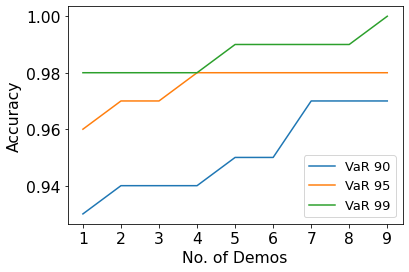

In [673]:
plt.plot(num_demos, accs[0.9], label = "VaR 90")
plt.plot(num_demos, accs[0.95], label = "VaR 95")
plt.plot(num_demos, accs[0.99], label = "VaR 99")
plt.xticks(num_demos)
plt.ylabel("Accuracy")
plt.xlabel("No. of Demos")
plt.legend()
plt.show()

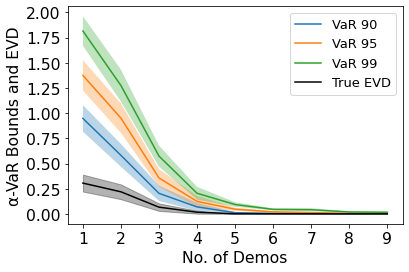

In [672]:
y = np.array([np.mean(apl) for apl in apls[0.9]])
plt.plot(num_demos, y, label = "VaR 90")
err = np.array([sem(apl) for apl in apls[0.9]])
plt.fill_between(num_demos, y - err, y + err, alpha = 0.3)
y = np.array([np.mean(apl) for apl in apls[0.95]])
plt.plot(num_demos, y, label = "VaR 95")
err = np.array([sem(apl) for apl in apls[0.95]])
plt.fill_between(num_demos, y - err, y + err, alpha = 0.3)
y = np.array([np.mean(apl) for apl in apls[0.99]])
plt.plot(num_demos, y, label = "VaR 99")
err = np.array([sem(apl) for apl in apls[0.99]])
plt.fill_between(num_demos, y - err, y + err, alpha = 0.3)

y = np.array([np.mean(evd) for evd in evds[0.9]])
plt.plot(num_demos, y, label = "True EVD", color = "black")
err = np.array([sem(evd) for evd in evds[0.9]])
plt.fill_between(num_demos, y - err, y + err, color = "black", alpha = 0.3)

plt.legend()
plt.ylabel("α-VaR Bounds and EVD")
plt.xticks(num_demos)
plt.yticks(np.arange(0.00, 2.01, 0.25))
plt.xlabel("No. of Demos")
plt.show()

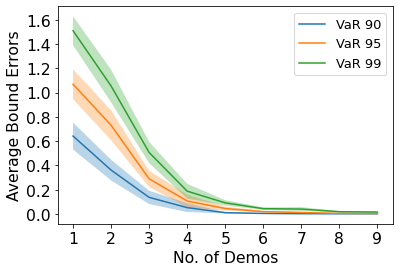

In [674]:
y = np.array([np.mean(abe) for abe in abes[0.9]])
plt.plot(num_demos, y, label = "VaR 90")
err = np.array([sem(abe) for abe in abes[0.9]])
plt.fill_between(num_demos, y - err, y + err, alpha = 0.3)
y = np.array([np.mean(abe) for abe in abes[0.95]])
plt.plot(num_demos, y, label = "VaR 95")
err = np.array([sem(abe) for abe in abes[0.95]])
plt.fill_between(num_demos, y - err, y + err, alpha = 0.3)
y = np.array([np.mean(abe) for abe in abes[0.99]])
plt.plot(num_demos, y, label = "VaR 99")
err = np.array([sem(abe) for abe in abes[0.99]])
plt.fill_between(num_demos, y - err, y + err, alpha = 0.3)
plt.legend()
plt.ylabel("Average Bound Errors")
plt.xticks(num_demos)
plt.yticks(np.arange(0.0, 1.7, 0.2))
plt.xlabel("No. of Demos")
plt.show()

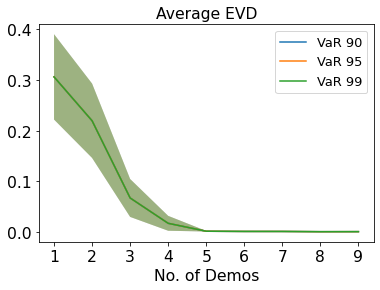

In [664]:
# y = np.array([np.mean(evd) for evd in evds[0.9]])
# plt.plot(num_demos, y, label = "VaR 90")
# err = np.array([sem(evd) for evd in evds[0.9]])
# plt.fill_between(num_demos, y - err, y + err, alpha = 0.3)
# y = np.array([np.mean(evd) for evd in evds[0.95]])
# plt.plot(num_demos, y, label = "VaR 95")
# err = np.array([sem(evd) for evd in evds[0.95]])
# plt.fill_between(num_demos, y - err, y + err, alpha = 0.3)
# y = np.array([np.mean(evd) for evd in evds[0.99]])
# plt.plot(num_demos, y, label = "VaR 99")
# err = np.array([sem(evd) for evd in evds[0.99]])
# plt.fill_between(num_demos, y - err, y + err, alpha = 0.3)
# plt.legend()
# plt.title("Average EVD")
# plt.xticks(num_demos)
# plt.xlabel("No. of Demos")
# plt.show()

### without random normalization

In [31]:
num_demos = list(range(1, 10))
accs = {0.9: [], 0.95: [], 0.99: []} # accuracies
abes = {0.9: [], 0.95: [], 0.99: []} # bound errors
apls = {0.9: [], 0.95: [], 0.99: []} # a-var bounds
evds = {0.9: [], 0.95: [], 0.99: []} # evd

In [35]:
# with seed
accs[0.9] = [0.95, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.98, 0.98]
abes[0.9] = [[0.0314791283927498, 0.18758423104117217, 1.943317134286099, 0.06461670005035458, 1.5633397445626436, 13.014866907802299, 0.3172708058877731, -16.352438124412927, 0.20698956506915955, 1.9219234597136108, 15.354817878336565, 0.044537929840213764, 25.332348381385778, 0.3996122549297194, 21.776862172099392, 12.025558132962441, 0.33093256079899724, 24.212242033636073, 15.377994326141103, 0.0, 1.2936840995317205, 0.7005880010268584, -2.270323980251541, 0.4531414024290399, 0.008819349833277812, 21.73984793966848, 24.073391702520865, 0.0, -0.04791282525967411, 1.4413004669311322, -0.8985446783865427, 1.6342566065924355, 0.0, 0.948563445078749, 11.165335376684904, 3.6785140557279075, 0.19006704722308232, 0.41538191892371135, 0.11859293645195623, 0.3675978969979461, 22.730687778839958, 0.2761121550893719, 0.14352025090828668, 2.962444888367507, 2.315930251318729, 0.1655626574250899, 1.1752024019424443, 2.2275718195841687, 0.0, 3.620308157118197, 2.6949314100735453, 19.27522542500406, 1.2680253985657721, 2.8753333651070427, 0.0, 1.4289741376726273, 0.6286245916986104, 3.575430767959009, 0.027219446903147926, 0.2446751007948973, 0.08173628632736119, 3.081907650578147, 1.1384294424463133, 4.269553929513689, 17.25481328541906, 0.9064977847239486, 3.705607196423429, 23.80924551551378, 0.0, 0.0, 13.365012432719968, 22.239291869906626, 13.834426532554561, 0.05751173753880057, 0.35039323723636606, 0.5914522041822821, 2.527958245184056, 22.224070543318394, 0.6668147512714864, 0.4091813726516387, 0.29102599092272996, 0.2737609330427828, 22.887074884307783, 0.05336329218699731, 0.5264662088063154, 23.00661972258529, 11.35368557372, 0.7380354367780868, 2.202411281219331, 0.7667991006541541, 0.0, 0.0, 5.318405545968111, 0.8347066883448662, 2.170403235191902, 0.058496214259113444, 2.091804628906825, 5.555181913755552, 1.2415796496123725, 25.795175151918702], [0.03792728456876038, 0.15780648010614673, 2.89312670851238, 0.05929365972249573, 1.375325502690874, 12.63193551886483, 1.506811095875535, 0.02719248641179206, 0.20933974007576595, 0.7883880846202516, 14.117118654111092, 0.04478500173666777, 18.373106433742812, 0.11742055782846172, 0.03908752282436723, 0.695800010061137, 0.28364056595764, 22.794264613789636, 0.10229637295259408, 0.0, 0.3235599661100146, 0.5667705624275126, 0.12613509230020803, 5.121625551921234, 0.06120827091190151, 23.487349683074438, 18.41364626653462, 0.0, -0.05537119667736157, 0.1187800237845682, -9.33020866810854, 0.010502183525618491, 0.0, 0.17308076944109896, 8.21599745170083, 12.692004621241685, 0.0, 0.16875842331234558, 0.11164794588776483, 0.15480171819505983, 2.1202955968857875, 0.17855118174993123, 0.10154510400077044, 0.019633904086783005, 0.0, 0.12166786121254547, 0.12827627070602077, 0.04202619039411459, 0.0, 0.12229438368247436, 0.9676347874741289, 2.0737599098053243, 16.59194733695999, 3.558148420981798, 0.0, 0.06653958231188817, 0.011145521340001352, 6.209105555881472, 0.0297372140124903, 0.20357674242894852, 0.0991228369492898, 0.9339529552651094, 4.686048404747119, 0.4185625953042962, 0.1412271196007211, 21.27293898684156, 4.8762608581183, 23.89164051363578, 0.0, 0.02404126941655349, 0.014482729846719167, 19.639462693956155, 10.700471806932361, 0.020642245329890563, 0.054283914398735256, -0.5886960743946368, -0.06217547353844921, 23.719997366947446, 0.2561748663548542, 1.2722327300471248, 0.22032874993831086, 0.32587311780030337, 0.0303880255092146, 0.052762176774564296, -0.020517264166146187, 0.0075359551070022235, 0.025391368945264503, 0.11465850484264628, 0.5019461098103948, 0.0, 1.4500634178396492, 0.0, 0.8853392249143522, 0.06847247223506514, 0.15164015769139394, 0.015594213821188863, 0.0, 2.828537764578561, 0.002973083275511712, 0.5621504991754609], [0.025250324165316584, 0.24453553476114465, 0.0, 0.05261273647980147, 0.0, 0.00763619169819485, 1.1117188698409226, 0.026683493920025114, 0.06389421957817376, 0.5195353926347526, 14.630012539264104, 0.04526973537989143, 0.001266163287798605, 0.1995206112056085, 0.04706050807004658, 0.04416263457029146, -0.05336842331694669, 24.752848239351678, 0.13472053340589252, 0.0, 0.7245491518726546, 0.020389429139523685, 0.0, 3.189366822461107, 0.055443108263702356, 0.10568253726723409, 0.7170555425961727, 0.0, -0.01071035951928856, 0.018756826743196342, 0.23895037191659885, 0.012567173750515082, 0.0, 0.14295680539608746, 2.1577726271064535, 8.472249629223475, 0.017291145103847327, 0.18292653012832538, 0.1233427820860431, 0.0, 0.0, 0.16974652907929944, 0.11445236569162809, 0.022281508816652362, 0.0, 0.15332294753797449, 0.024187590858945285, 0.04138620666637127, 0.0, 0.09150767756031364, 0.0, 0.0008972779458504831, 16.805887591997482, 0.0, 0.0, 0.04395596188895645, 0.019631131463627938, 4.30996984219664, 0.007919477372189121, 0.17234473841329034, 0.0712346088565301, 0.0, 6.098798308387311, 0.12844117654647125, 0.16765391499440807, 21.823720839950973, 0.18945869611617638, 1.024701423172413, 0.0, 0.0, 0.0019303129109911055, 0.0, 0.0, 0.04694145681400563, 0.04803144008233673, 0.021795869825703917, 0.013927405874262222, 0.4045327742751925, 0.12962479897747414, 0.2331872871935099, 0.034707038410585866, 0.26732377489687753, 0.32295947901763356, 0.05133528813109223, 0.013852575337310213, 0.012498041773648438, 0.051190073196320185, 0.11489623503126567, -0.09356142319159488, 0.23348582815074925, 0.16113689024540534, 0.0, 0.2678697895303328, 0.06870421309924879, -0.014115294076371576, 0.05914282112336622, 0.0, 0.8415019241199158, 0.029471630743334032, 0.005409935746254035], [0.05295114549373281, 0.0287854451686389, 0.14577215633025098, 0.02122513720012087, 0.0, 0.0712518209164017, 0.17366437415629576, 0.0006696600899829264, 0.03919741276363631, 0.005913008111448903, 0.0, 0.04332021157165311, 0.003174236336450864, 0.1749574830379741, 0.029877228152747293, 0.007708521697615822, 0.24649774654216206, 0.0, 0.09401260295504343, 0.0, 0.0019310865549406753, 0.003107037942530866, 7.709048135261793, 7.982270419181976, 0.047860479641178344, 0.1257096423973696, 0.15763187677870238, 0.0, -0.036938224748242376, 0.01973968061750142, 0.15292545163870486, 0.01788746733988944, 0.0, 0.14360790421672232, 0.0, 4.305191352709372, 0.0, 0.16761413516332446, 0.08704387105098799, 0.0, 0.005134044251026815, 0.1669438092167823, 0.10440155585083932, 0.017619632296966614, 0.0, 0.13579929704852134, 0.008958507329609233, 0.07645340898391417, 0.0, 0.06941265898576887, 0.0, 0.0006666124421448316, 0.0, 0.0, 0.0, 0.046976220951506775, 0.01847566500649922, 0.8710072456444866, 0.027992329378125902, 0.1822058770747006, 0.0877497477575826, 0.0, 0.0, 0.0, 0.06136452612837928, 0.012732381722758035, 0.12889035471534083, 0.024317260864659573, 0.0, 0.0, 0.010705051742647242, 0.0, 0.0, 0.009581754350544869, 0.03774214287003019, 0.005268402541034334, 0.01816193217617723, 0.2546801767995639, 0.14305916642845773, 0.01799521075839028, 0.0, 0.27681073152246505, 0.05382353838063558, 0.032717818969995704, -0.05287659519007981, 0.005213073745444774, 0.0, 0.09767254361086941, 0.11328103957212043, 0.0, 0.46535507145206356, 0.0, 0.022231471037167716, 0.058446170173169776, 0.004556350678425858, 0.0036601313241036992, 0.0, 0.0, -0.017548909191770434, -0.00032452456374265637], [0.016649579188281027, 0.1411435434060646, 0.0, 0.009148202575126163, 0.0, 0.0, 0.14526358529978545, 0.005774852558313448, 0.029027013303966953, 0.003479965562432241, 0.0, 0.046760093669323766, 0.0, 0.1972457028554011, 0.037982594328121344, 0.003784140819821147, -0.15090727848918561, 0.0, 0.10278788690968144, 0.0, 0.004509847977733572, 0.008757044119139579, 0.0, 2.433309936333305, 0.060635080217159576, 0.017949648381224037, 0.03367469396717482, 0.0, 0.041697260774778755, 0.1674459951267684, 0.40262606008427326, 0.0, 0.0, 0.15335042602163185, 0.0, 0.06079236502438867, 0.0, 0.11420760592152135, 0.0, 0.0, 0.0, 0.17180861042783224, 0.09313379531215826, 0.0, 0.0, 0.10878691950869879, 0.01656147636253813, 0.004746288499429596, 0.0, 0.07159312512319538, 0.0, 0.08969059377574595, 0.0, 0.0, 0.0, 0.05016227376483329, 0.055555364884348535, 0.10317596415348262, 0.012006000136732808, 0.1744707348772181, 0.05561715255541699, 0.0, 0.0, 0.0, 0.12445956957478232, 0.02880158410619238, 0.16773115552828965, 0.03132899737264694, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02904445085661367, 0.0076780734769617, 0.00621816074264725, 0.3043220010045111, 0.10691708442763925, 0.016277694520374197, 0.021788604189978855, 0.20645979355439703, 0.05037251558600886, 0.0526649156077319, 0.02730244907743895, 0.010124941416449929, 0.0, 0.08138760357327435, 0.65241326662027, 0.0, 0.0, 0.0, 0.07033322126937946, 0.07135439177292824, -0.017294022017708244, 0.0, 0.0, 0.0, -0.04958976368941315, -0.0042193335869029625], [0.01474015837068876, 0.12113367406509212, 0.0, 0.011218726325928685, 0.0, 0.0, 0.1464805144152015, 0.010612943491807414, 0.03230327645945863, 0.005093997486188329, 0.0, 0.04287322409030736, 0.003559832532006979, 0.10965369192956942, 0.014005714366202682, 0.0, 0.3021508606188199, 0.0, 0.118236671248928, 0.0, 0.005514711474196687, 0.006038371169033496, 0.0, 0.0105948804004381, 0.0, 0.0, 0.03265459620670308, 0.0, 0.027390792589603308, 0.02181416782318024, 0.33435560877934734, 0.005831602748337161, 0.0, 0.1459366844538259, 0.0, 0.02371483957259013, 0.0, 0.11423425894102657, 0.0, 0.0, 0.0, 0.005037295546234333, 0.09373556417200835, 0.0, 0.0, 0.01985928141561999, 0.0, -0.0027803227554095145, 0.0, 0.06977163770125028, 0.0, 0.08463161136332431, 0.0, 0.0, 0.0, 0.052714811184474186, 0.013871039693601261, 1.1404396927535583, 0.009820206868915715, 0.12896517385232187, 0.04890728664121191, 0.0, 0.0, 0.0, 0.12555893099104498, 0.017143778198535742, 0.12590224576966413, 0.006959750802728593, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03009267456638387, 0.011823164689669596, 0.004970908467083035, 0.024912485471615398, 0.03009625114154879, 0.013840129977505278, 0.0, 0.23646401109131077, 0.057782562613269306, 0.0, 0.012441546772707923, 0.004833729652231611, 0.0, 0.054645229192001654, 0.3145874025399973, 0.0, 0.0, 0.0, 0.03660098073957485, 0.033297033169692014, -0.017025191130219497, 0.0, 0.0, 0.0, -0.03306232007018739, -0.019916244551295037], [0.027659628918852874, -0.002034167811492793, 0.0, 0.006090012562125935, 0.0, 0.0, 0.1414173829043186, 0.01222979957696424, 0.026203298305743417, 0.0, 0.0, 0.04463188643334348, 0.007272579390809053, 0.10167031586014375, 0.006309415518590988, 0.005434944822884091, -0.1141416076353261, 0.020469372484442694, 0.11387950118927392, 0.0, 0.007428557230324984, -0.005446440506268857, 0.0, 0.0039001987748925604, 0.0, 0.006092136916592494, 0.040298013328051496, 0.0, 0.0, 0.007114831330085281, 0.32054354723972267, 0.011354940958640647, 0.0, 0.17069776760792976, 0.0, 0.01140745337023219, 0.0, 0.01943244031370739, 0.0028307669870777374, 0.0, 0.0, 0.0, 0.05947319079534985, 0.0, 0.0, 0.005656819267951363, 0.0, 0.005706424061127535, 0.0, 0.07390326098064293, 0.0, 0.09525728317392179, 0.0, 0.0, 0.0, 0.0489147168846662, 0.01641556304757863, 0.03201173383392941, 0.005043513592337234, 0.09594348122058705, 0.05328311154057275, 0.0, 0.0, 0.0, 0.17992054323273443, 0.009899441559722888, 0.13244368099371417, 0.009857992811461713, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0062296454585890615, 0.03913009306800319, 0.008233168722185269, 0.0, 0.0, 0.019193876187847736, 0.02150025139229772, 0.0, 0.20186469170640198, 0.016285588833207854, 0.0034833077059115425, 0.03112682150776891, 0.003549999137515414, 0.0, 0.05328656051559122, 0.2743240802434652, 0.0, 0.0, 0.0, 0.016208913550967097, 0.09919054811497219, -0.021943693024343958, 0.0022010644291992065, 0.0, 0.0, 0.0, 0.005208356055863561], [0.04570137045912759, 0.023490870924327112, 0.0, 0.012312121542265686, 0.0, 0.0, 0.07518750369053606, 0.006134201120843841, 0.03607450109550392, 0.0014908762186702784, 0.0, 0.03615321544169969, 0.009434430331568322, 0.08185371163759392, 0.017761586347145197, 0.0, -0.16325774431070883, 0.014670088864338737, 0.09194067025443076, 0.0, 0.0, 0.013479483689863514, 0.0, 0.0034193544720473312, 0.0, 0.007426236221817817, 0.06033495935102806, 0.0, 0.0, 0.003842316026872794, 0.3756709783765295, 0.009291108180320862, 0.0, 0.14944656816480695, 0.0, 0.011394510262324076, 0.0, 0.006998161220007404, 0.0021784659642971604, 0.0, 0.0, 0.0, 0.0, 0.00290081547953136, 0.0, 0.0066433656891575765, 0.0, 0.0060642242950876835, 0.0, 0.07246991569052996, 0.0, 0.10281358422025022, 0.0, 0.0, 0.0, 0.0, 0.019941893984219305, 0.0, 0.0054987261977927915, 0.1305488496548553, 0.005736242463967756, 0.0, 0.0, 0.0, 0.0, 0.016211472107784175, 0.15383739421387332, 0.01238117814856099, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006787335108320747, 0.03065335538386904, 0.0022481493317698664, 0.005446790851109995, 0.0, 0.04183129303990896, 0.011989836202545234, 0.0, 0.018629712298221968, 0.04499510405174689, 0.004779531178751739, 0.03541174529468982, 0.004754102322202414, 0.0, 0.0949021959855827, 0.33488501904837586, 0.0, 0.0, 0.0, 0.061137753162823216, 0.05017058102754213, -0.02102476262294317, 0.0036472061982912862, 0.0, 0.0, 0.0, 0.007049345478137736], [0.019953422835627066, 0.005711417203919211, 0.0, 0.008255799110216344, 0.0, 0.0, 0.0, 0.016508996770280504, 0.02363353883837327, 0.00521263708566444, 0.0, 0.0453523231963473, 0.0014645620399740267, 0.01443602757280793, 0.010257138724149684, 0.0042195852986139926, -0.16562860557065662, 0.0, 0.033833596082292416, 0.0, 0.0033809117044647508, 0.007987125361344383, 0.0, 0.0, 0.0005869329635981302, 0.0, 0.011078643236758445, 0.0, 0.0, 0.006802569038882211, 0.024445050132154478, 0.00027339272959903127, 0.0, 0.1686347802218986, 0.0, 0.0016707452412738633, 0.0, 0.0, 0.0, 0.0, 0.0005132173285886665, 0.004327447325561451, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010154829754467798, 0.0, 0.07586936172687331, 0.0, 0.008988209127664959, 0.0, 0.0, 0.0, 0.0001357394125029998, 0.05632185478816787, 0.0015753240496154675, 0.0034273080654259047, 0.09919370221402879, 0.010454390254782453, 0.0, 0.0, 0.0, 0.0, 0.005245580076337575, 0.0, 0.010679821921488752, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005960657495229782, 0.04493084523512891, 0.014494685474604196, 0.016405548116232183, 0.0, 0.03856086175366258, 0.007054049561750375, 0.0, 0.02097656904911016, 0.01944645963813496, 0.0, 0.0, 0.0048323784544663795, 0.004609055606806578, 0.09619035147114774, 0.3860277638850782, 0.0, 0.0, 0.0, 0.017185473404945917, 0.11105191803688186, -0.021943693024343958, 0.00363407788519865, 0.0, 0.0, 0.0, 0.009851497986254287]]
apls[0.9] = [[0.0605667916021666, 0.18758423104117217, 1.943317134286099, 0.06461670005035458, 25.346839869468628, 23.708295064675042, 0.3492168158221247, 9.771646745931049, 0.2678462377347035, 1.9465816315395337, 22.755661592008504, 0.053185261464690825, 25.332348381385778, 0.3996122549297194, 21.839167630730216, 24.073073443679398, 0.38668034774541304, 24.212242033636073, 15.377994326141103, 0.0, 1.2936840995317205, 0.7483294131112856, 0.6562413652336603, 15.298071200240951, 0.06364067177145571, 21.73984793966848, 24.14868421671256, 0.0, 0.22736201967271796, 1.4413004669311322, 24.579044589134966, 1.7450275414194998, 0.0, 0.948563445078749, 11.165335376684904, 9.454600329053783, 0.19006704722308232, 0.41538191892371135, 0.13209284537532007, 0.3675978969979461, 24.896159083681017, 0.2761121550893719, 0.14352025090828668, 22.303983382084006, 2.315930251318729, 0.22316743090157054, 1.2171068041387034, 2.272515053220369, 0.0, 3.688478892946753, 2.6949314100735453, 23.648623693659133, 1.2680253985657721, 2.8753333651070427, 0.0, 1.4289741376726273, 0.6673958811199387, 22.291353960223777, 0.20324676996808755, 0.31032688439868794, 0.08342240500320663, 3.081907650578147, 1.1384294424463133, 4.269553929513689, 17.25481328541906, 1.1032701934618465, 22.55533844875032, 23.92130409044617, 0.0, 0.0, 14.565491204736162, 22.239291869906626, 22.994976378256514, 0.05751173753880057, 0.35039323723636606, 22.46398892367521, 2.7535797403808555, 24.38354544858627, 0.6716423681737442, 0.4433817241073239, 0.29102599092272996, 0.28322472946510935, 22.92590910252433, 0.059106202897453386, 0.6101057326342154, 23.00661972258529, 11.37702920619383, 0.7380354367780868, 2.2813474418302304, 0.7667991006541541, 0.0, 0.0, 5.318405545968111, 0.8772618892106685, 2.1923469282162458, 0.058496214259113444, 2.091804628906825, 5.555181913755552, 1.5200558538016544, 25.795175151918702], [0.06701494777817718, 0.2496355555191263, 2.89312670851238, 0.05929365972249573, 25.032986727613103, 23.12324482695196, 1.5387571058098866, 0.05558087751344942, 0.2701964127413099, 0.7883880846202516, 20.647962659544245, 0.053432333361144835, 18.373106433742812, 0.18522657712391144, 0.10139298145519149, 0.695800010061137, 0.3393883529040558, 22.794264613789636, 0.10229637295259408, 0.0, 0.3235599661100146, 0.6145119745119398, 0.12613509230020803, 19.966555349733145, 0.06120827091190151, 23.487349683074438, 18.488938780726315, 0.0, 0.2199036482550305, 0.1187800237845682, 16.14738059941297, 0.010502183525618491, 0.0, 0.17308076944109896, 8.21599745170083, 18.46809089456756, 0.0, 0.16875842331234558, 0.12514785481112867, 0.15480171819505983, 2.1202955968857875, 0.17855118174993123, 0.10154510400077044, 0.05762304716701472, 0.0, 0.1792726346890261, 0.12827627070602077, 0.18322018241568827, 0.0, 0.19046511951103007, 0.9676347874741289, 2.257691596048721, 23.74983747748615, 3.558148420981798, 0.0, 0.06653958231188817, 0.0499168107613297, 24.54009257827929, 0.0297372140124903, 0.20357674242894852, 0.10080895562513525, 0.9339529552651094, 4.686048404747119, 0.4185625953042962, 0.1412271196007211, 21.27293898684156, 21.361554241591556, 23.89164051363578, 0.0, 0.02404126941655349, 0.014482729846719167, 19.639462693956155, 19.861021652634314, 0.06239184556570265, 0.054283914398735256, 21.43905955999628, 0.1634460216583502, 23.719997366947446, 0.26100248325711206, 1.30643308150281, 0.23630716877653768, 0.3353369142226299, 0.06922224372576125, 0.05850508748502037, 0.06312225966175378, 0.0075359551070022235, 0.048735001419094814, 0.11465850484264628, 0.5808822704212941, 0.0, 1.4500634178396492, 0.0, 0.8853392249143522, 0.11102767310086747, 0.1735838507157379, 0.05788716734369226, 0.0, 2.828537764578561, 0.2814492874647936, 0.6149769482590184], [0.05433798737473339, 0.24453553476114465, 0.0, 0.05261273647980147, 0.0, 0.00763619169819485, 1.1117188698409226, 0.055071885021682476, 0.06389421957817376, 0.5195353926347526, 21.160856544697257, 0.05391706700436849, 0.001266163287798605, 0.1995206112056085, 0.10936596670087084, 0.04416263457029146, 0.2883429612296169, 24.752848239351678, 0.13472053340589252, 0.0, 0.7245491518726546, 0.06813084122395097, 0.0, 18.034296620273018, 0.055443108263702356, 0.12386323386331366, 0.7923480567878673, 0.0, 0.2645644854131035, 0.018756826743196342, 0.5124639613523678, 0.012567173750515082, 0.0, 0.14295680539608746, 2.1577726271064535, 14.24833590254935, 0.017291145103847327, 0.18292653012832538, 0.1233427820860431, 0.0, 0.0, 0.16974652907929944, 0.11445236569162809, 0.060270651896884075, 0.0, 0.21092772101445512, 0.024187590858945285, 0.18258019868794495, 0.0, 0.15967841338886934, 0.0, 0.1848289641892471, 23.963777732523642, 0.0, 0.0, 0.04395596188895645, 0.058402420884956285, 4.30996984219664, 0.056759794378910655, 0.17234473841329034, 0.07292072753237555, 0.0, 6.098798308387311, 0.12844117654647125, 0.16765391499440807, 21.823720839950973, 0.2061133314623964, 1.024701423172413, 0.0, 0.0, 0.0019303129109911055, 0.0, 0.0, 0.04694145681400563, 0.04803144008233673, 0.021795869825703917, 0.013927405874262222, 0.4045327742751925, 0.134452415879732, 0.2673876386491951, 0.034707038410585866, 0.27678757131920406, 0.32295947901763356, 0.0570781988415483, 0.09749209916521018, 0.012498041773648438, 0.051190073196320185, 0.11489623503126567, 0.14053626560709098, 0.23348582815074925, 0.16113689024540534, 0.0, 0.2678697895303328, 0.11125941396505112, 0.10658356143152492, 0.05914282112336622, 0.0, 0.8415019241199158, 0.3079478349326159, 0.05823638482981153], [0.05295114549373281, 0.12061452058161848, 0.14577215633025098, 0.04084071994764926, 0.0, 0.0712518209164017, 0.17366437415629576, 0.0006696600899829264, 0.03919741276363631, 0.005913008111448903, 0.0, 0.05196754319613017, 0.003174236336450864, 0.1749574830379741, 0.09218268678357155, 0.007708521697615822, 0.30224553348857786, 0.0, 0.09401260295504343, 0.0, 0.05867642161403985, 0.05084845002695815, 7.709048135261793, 22.827200216993887, 0.047860479641178344, 0.1257096423973696, 0.23292439097039708, 0.0, 0.2383366201841497, 0.01973968061750142, 0.42643904107447383, 0.01788746733988944, 0.0, 0.14360790421672232, 0.0, 4.305191352709372, 0.0, 0.16761413516332446, 0.10054377997435182, 0.0, 0.005134044251026815, 0.1669438092167823, 0.10440155585083932, 0.05560877537719833, 0.0, 0.19340407052500197, 0.008958507329609233, 0.12139664262011429, 0.0, 0.13758339481432458, 0.0, 0.18459829868554145, 0.0, 0.0, 0.0, 0.046976220951506775, 0.05724695442782757, 0.8710072456444866, 0.027992329378125902, 0.1822058770747006, 0.08943586643342805, 0.0, 0.0, 0.0, 0.06136452612837928, 0.012732381722758035, 0.14554499006156085, 0.024317260864659573, 0.0, 0.0, 0.010705051742647242, 0.0, 0.0, 0.05133135458635696, 0.03774214287003019, 0.005268402541034334, 0.01816193217617723, 0.2546801767995639, 0.1478867833307156, 0.05219556221407551, 0.0, 0.2862745279447916, 0.05382353838063558, 0.03846072968045178, 0.030762928637820153, 0.005213073745444774, 0.0, 0.09767254361086941, 0.1922172001830198, 0.0, 0.46535507145206356, 0.0, 0.04243912641500602, 0.10100137103897211, 0.12525520618632235, 0.0036601313241036992, 0.0, 0.0, 0.26092729499751144, 0.052501924519814835], [0.04573724239769783, 0.1411435434060646, 0.0, 0.009148202575126163, 0.0, 0.0, 0.14526358529978545, 0.005774852558313448, 0.029027013303966953, 0.003479965562432241, 0.0, 0.05540742529380083, 0.0, 0.1972457028554011, 0.1002880529589456, 0.003784140819821147, 0.19080410605737796, 0.0, 0.10278788690968144, 0.0, 0.004509847977733572, 0.05649845620356686, 0.0, 2.433309936333305, 0.060635080217159576, 0.017949648381224037, 0.10896720815886951, 0.0, 0.041697260774778755, 0.1674459951267684, 0.40262606008427326, 0.0, 0.0, 0.15335042602163185, 0.0, 0.06079236502438867, 0.0, 0.1730468248864927, 0.0, 0.0, 0.0, 0.17180861042783224, 0.09313379531215826, 0.0, 0.0, 0.16639169298517942, 0.01656147636253813, 0.049689522135629716, 0.0, 0.13976386095175108, 0.0, 0.08969059377574595, 0.0, 0.0, 0.0, 0.05016227376483329, 0.055555364884348535, 0.10317596415348262, 0.06084631714345434, 0.24012251848100874, 0.05561715255541699, 0.0, 0.0, 0.0, 0.12445956957478232, 0.02880158410619238, 0.16773115552828965, 0.03132899737264694, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02904445085661367, 0.0076780734769617, 0.00621816074264725, 0.3043220010045111, 0.11174470132989711, 0.05047804597605943, 0.021788604189978855, 0.21592358997672356, 0.05037251558600886, 0.0526649156077319, 0.02730244907743895, 0.010124941416449929, 0.0, 0.08138760357327435, 0.7313494272311694, 0.0, 0.0, 0.0, 0.07033322126937946, 0.11390959263873057, 0.004649671006635714, 0.0, 0.0, 0.0, 0.22888644049986873, 0.04860711549665453], [0.043827821580105564, 0.12113367406509212, 0.0, 0.011218726325928685, 0.0, 0.0, 0.1464805144152015, 0.010612943491807414, 0.03230327645945863, 0.005093997486188329, 0.0, 0.05152055571478442, 0.003559832532006979, 0.17745971122501913, 0.014005714366202682, 0.0, 0.3578986475652357, 0.0, 0.118236671248928, 0.0, 0.005514711474196687, 0.05377978325346078, 0.0, 0.0105948804004381, 0.0, 0.0, 0.10794711039839777, 0.0, 0.027390792589603308, 0.02181416782318024, 0.33435560877934734, 0.005831602748337161, 0.0, 0.1459366844538259, 0.0, 0.06241978087477129, 0.0, 0.11423425894102657, 0.0, 0.0, 0.0, 0.005037295546234333, 0.09373556417200835, 0.0, 0.0, 0.01985928141561999, 0.0, 0.042162910880790605, 0.0, 0.13794237352980598, 0.0, 0.08463161136332431, 0.0, 0.0, 0.0, 0.052714811184474186, 0.05264232911492961, 1.1404396927535583, 0.009820206868915715, 0.19461695745611252, 0.04890728664121191, 0.0, 0.0, 0.0, 0.12555893099104498, 0.017143778198535742, 0.12590224576966413, 0.006959750802728593, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03009267456638387, 0.011823164689669596, 0.004970908467083035, 0.024912485471615398, 0.03009625114154879, 0.04804048143319051, 0.0, 0.2459278075136373, 0.057782562613269306, 0.0, 0.012441546772707923, 0.004833729652231611, 0.0, 0.054645229192001654, 0.39352356315089665, 0.0, 0.0, 0.0, 0.05680863611741316, 0.07585223403549435, 0.004918501894124461, 0.0, 0.0, 0.0, 0.24541388411909448, 0.032910204532262455], [0.05674729212826968, 0.08979490760148678, 0.0, 0.006090012562125935, 0.0, 0.0, 0.1414173829043186, 0.01222979957696424, 0.026203298305743417, 0.0, 0.0, 0.05327921805782054, 0.007272579390809053, 0.16947633515559346, 0.006309415518590988, 0.005434944822884091, 0.22756977691123748, 0.020469372484442694, 0.11387950118927392, 0.0, 0.007428557230324984, 0.042294971578158425, 0.0, 0.0039001987748925604, 0.0, 0.006092136916592494, 0.11559052751974619, 0.0, 0.0, 0.007114831330085281, 0.32054354723972267, 0.011354940958640647, 0.0, 0.17069776760792976, 0.0, 0.01140745337023219, 0.0, 0.01943244031370739, 0.0028307669870777374, 0.0, 0.0, 0.0, 0.10383863151703743, 0.0, 0.0, 0.005656819267951363, 0.0, 0.005706424061127535, 0.0, 0.14207399680919863, 0.0, 0.09525728317392179, 0.0, 0.0, 0.0, 0.0489147168846662, 0.05518685246890698, 0.03201173383392941, 0.005043513592337234, 0.09594348122058705, 0.05328311154057275, 0.0, 0.0, 0.0, 0.17992054323273443, 0.009899441559722888, 0.1490983163399342, 0.009857992811461713, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0062296454585890615, 0.03913009306800319, 0.008233168722185269, 0.0, 0.0, 0.019193876187847736, 0.05570060284798295, 0.0, 0.2113284881287285, 0.0551198070497545, 0.0034833077059115425, 0.03112682150776891, 0.003549999137515414, 0.0, 0.05328656051559122, 0.3532602408543646, 0.0, 0.0, 0.0, 0.036416568928805404, 0.09919054811497219, 0.0, 0.0022010644291992065, 0.0, 0.0, 0.0, 0.005208356055863561], [0.04570137045912759, 0.023490870924327112, 0.0, 0.012312121542265686, 0.0, 0.0, 0.07518750369053606, 0.006134201120843841, 0.03607450109550392, 0.0014908762186702784, 0.0, 0.044800547066176755, 0.009434430331568322, 0.14965973093304363, 0.017761586347145197, 0.0, 0.17845364023585475, 0.014670088864338737, 0.09194067025443076, 0.0, 0.0, 0.061220895774290796, 0.0, 0.0034193544720473312, 0.0, 0.007426236221817817, 0.06033495935102806, 0.0, 0.0, 0.003842316026872794, 0.3756709783765295, 0.009291108180320862, 0.0, 0.14944656816480695, 0.0, 0.011394510262324076, 0.0, 0.006998161220007404, 0.0021784659642971604, 0.0, 0.0, 0.0, 0.0, 0.00290081547953136, 0.0, 0.0066433656891575765, 0.0, 0.0060642242950876835, 0.0, 0.14064065151908567, 0.0, 0.10281358422025022, 0.0, 0.0, 0.0, 0.0, 0.05871318340554765, 0.0, 0.0054987261977927915, 0.1305488496548553, 0.005736242463967756, 0.0, 0.0, 0.0, 0.0, 0.016211472107784175, 0.15383739421387332, 0.01238117814856099, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006787335108320747, 0.03065335538386904, 0.0022481493317698664, 0.005446790851109995, 0.0, 0.04183129303990896, 0.011989836202545234, 0.0, 0.0280935087205485, 0.04499510405174689, 0.004779531178751739, 0.03541174529468982, 0.004754102322202414, 0.0, 0.0949021959855827, 0.33488501904837586, 0.0, 0.0, 0.0, 0.061137753162823216, 0.09272578189334446, 0.000918930401400786, 0.0036472061982912862, 0.0, 0.0, 0.0, 0.007049345478137736], [0.04904108604504387, 0.005711417203919211, 0.0, 0.008255799110216344, 0.0, 0.0, 0.0, 0.016508996770280504, 0.02363353883837327, 0.00521263708566444, 0.0, 0.05399965482082436, 0.0014645620399740267, 0.01443602757280793, 0.010257138724149684, 0.0042195852986139926, 0.17608277897590696, 0.0, 0.09612098174002881, 0.0, 0.0033809117044647508, 0.055728537445771664, 0.0, 0.0, 0.0005869329635981302, 0.0, 0.011078643236758445, 0.0, 0.0, 0.006802569038882211, 0.024445050132154478, 0.00027339272959903127, 0.0, 0.1686347802218986, 0.0, 0.0016707452412738633, 0.0, 0.0, 0.0, 0.0, 0.0005132173285886665, 0.004327447325561451, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010154829754467798, 0.0, 0.14404009755542901, 0.0, 0.008988209127664959, 0.0, 0.0, 0.0, 0.0001357394125029998, 0.05632185478816787, 0.0015753240496154675, 0.0034273080654259047, 0.16484548581781944, 0.010454390254782453, 0.0, 0.0, 0.0, 0.0, 0.005245580076337575, 0.0, 0.010679821921488752, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005960657495229782, 0.04493084523512891, 0.014494685474604196, 0.016405548116232183, 0.0, 0.03856086175366258, 0.007054049561750375, 0.0, 0.030440365471436692, 0.058280677854681606, 0.0, 0.0, 0.0048323784544663795, 0.004609055606806578, 0.09619035147114774, 0.3860277638850782, 0.0, 0.0, 0.0, 0.037393128782784224, 0.11105191803688186, 0.0, 0.00363407788519865, 0.0, 0.0, 0.0, 0.009851497986254287]]
evds[0.9] = [[0.029087663209416803, 0.0, 0.0, 0.0, 23.783500124905984, 10.693428156872743, 0.031946009934351594, 26.124084870343978, 0.060856672665543954, 0.024658171825922892, 7.400843713671939, 0.008647331624477061, 0.0, 0.0, 0.06230545863082426, 12.047515310716957, 0.0557477869464158, 0.0, 0.0, 0.0, 0.0, 0.04774141208442728, 2.9265653454852014, 14.844929797811911, 0.0548213219381779, 0.0, 0.07529251419169469, 0.0, 0.27527484493239207, 0.0, 25.47758926752151, 0.11077093482706424, 0.0, 0.0, 0.0, 5.776086273325875, 0.0, 0.0, 0.013499908923363835, 0.0, 2.165471304841061, 0.0, 0.0, 19.3415384937165, 0.0, 0.05760477347648063, 0.04190440219625913, 0.04494323363620012, 0.0, 0.0681707358285557, 0.0, 4.373398268655071, 0.0, 0.0, 0.0, 0.0, 0.03877128942132835, 18.715923192264768, 0.17602732306493962, 0.06565178360379065, 0.0016861186758454494, 0.0, 0.0, 0.0, 0.0, 0.19677240873789792, 18.84973125232689, 0.1120585749323908, 0.0, 0.0, 1.2004787720161936, 0.0, 9.160549845701953, 0.0, 0.0, 21.872536719492928, 0.22562149519679942, 2.1594749052678743, 0.0048276169022578586, 0.03420035145568523, 0.0, 0.009463796422326531, 0.038834218216546645, 0.005742910710456073, 0.08363952382789996, 0.0, 0.02334363247383031, 0.0, 0.07893616061089936, 0.0, 0.0, 0.0, 0.0, 0.042555200865802334, 0.021943693024343958, 0.0, 0.0, 0.0, 0.2784762041892819, 0.0], [0.029087663209416803, 0.09182907541297958, 0.0, 0.0, 23.65766122492223, 10.49130930808713, 0.031946009934351594, 0.028388391101657362, 0.060856672665543954, 0.0, 6.530844005433153, 0.008647331624477061, 0.0, 0.06780601929544972, 0.06230545863082426, 0.0, 0.0557477869464158, 0.0, 0.0, 0.0, 0.0, 0.04774141208442728, 0.0, 14.844929797811911, 0.0, 0.0, 0.07529251419169469, 0.0, 0.27527484493239207, 0.0, 25.47758926752151, 0.0, 0.0, 0.0, 0.0, 5.776086273325875, 0.0, 0.0, 0.013499908923363835, 0.0, 0.0, 0.0, 0.0, 0.03798914308023171, 0.0, 0.05760477347648063, 0.0, 0.14119399202157368, 0.0, 0.0681707358285557, 0.0, 0.18393168624339662, 7.1578901405261615, 0.0, 0.0, 0.0, 0.03877128942132835, 18.330987022397817, 0.0, 0.0, 0.0016861186758454494, 0.0, 0.0, 0.0, 0.0, 0.0, 16.485293383473255, 0.0, 0.0, 0.0, 0.0, 0.0, 9.160549845701953, 0.04174960023581209, 0.0, 22.027755634390918, 0.22562149519679942, 0.0, 0.0048276169022578586, 0.03420035145568523, 0.015978418838226816, 0.009463796422326531, 0.038834218216546645, 0.005742910710456073, 0.08363952382789996, 0.0, 0.02334363247383031, 0.0, 0.07893616061089936, 0.0, 0.0, 0.0, 0.0, 0.042555200865802334, 0.021943693024343958, 0.042292953522503396, 0.0, 0.0, 0.2784762041892819, 0.05282644908355749], [0.029087663209416803, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.028388391101657362, 0.0, 0.0, 6.530844005433153, 0.008647331624477061, 0.0, 0.0, 0.06230545863082426, 0.0, 0.3417113845465636, 0.0, 0.0, 0.0, 0.0, 0.04774141208442728, 0.0, 14.844929797811911, 0.0, 0.01818069659607957, 0.07529251419169469, 0.0, 0.27527484493239207, 0.0, 0.273513589435769, 0.0, 0.0, 0.0, 0.0, 5.776086273325875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03798914308023171, 0.0, 0.05760477347648063, 0.0, 0.14119399202157368, 0.0, 0.0681707358285557, 0.0, 0.18393168624339662, 7.1578901405261615, 0.0, 0.0, 0.0, 0.03877128942132835, 0.0, 0.048840317006721534, 0.0, 0.0016861186758454494, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016654635346220026, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0048276169022578586, 0.03420035145568523, 0.0, 0.009463796422326531, 0.0, 0.005742910710456073, 0.08363952382789996, 0.0, 0.0, 0.0, 0.23409768879868587, 0.0, 0.0, 0.0, 0.0, 0.042555200865802334, 0.1206988555078965, 0.0, 0.0, 0.0, 0.2784762041892819, 0.05282644908355749], [0.0, 0.09182907541297958, 0.0, 0.019615582747528393, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008647331624477061, 0.0, 0.0, 0.06230545863082426, 0.0, 0.0557477869464158, 0.0, 0.0, 0.0, 0.05674533505909918, 0.04774141208442728, 0.0, 14.844929797811911, 0.0, 0.0, 0.07529251419169469, 0.0, 0.27527484493239207, 0.0, 0.273513589435769, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013499908923363835, 0.0, 0.0, 0.0, 0.0, 0.03798914308023171, 0.0, 0.05760477347648063, 0.0, 0.04494323363620012, 0.0, 0.0681707358285557, 0.0, 0.18393168624339662, 0.0, 0.0, 0.0, 0.0, 0.03877128942132835, 0.0, 0.0, 0.0, 0.0016861186758454494, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016654635346220026, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04174960023581209, 0.0, 0.0, 0.0, 0.0, 0.0048276169022578586, 0.03420035145568523, 0.0, 0.009463796422326531, 0.0, 0.005742910710456073, 0.08363952382789996, 0.0, 0.0, 0.0, 0.07893616061089936, 0.0, 0.0, 0.0, 0.020207655377838307, 0.042555200865802334, 0.1206988555078965, 0.0, 0.0, 0.0, 0.2784762041892819, 0.05282644908355749], [0.029087663209416803, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008647331624477061, 0.0, 0.0, 0.06230545863082426, 0.0, 0.3417113845465636, 0.0, 0.0, 0.0, 0.0, 0.04774141208442728, 0.0, 0.0, 0.0, 0.0, 0.07529251419169469, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05883921896497135, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05760477347648063, 0.0, 0.04494323363620012, 0.0, 0.0681707358285557, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048840317006721534, 0.06565178360379065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0048276169022578586, 0.03420035145568523, 0.0, 0.009463796422326531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07893616061089936, 0.0, 0.0, 0.0, 0.0, 0.042555200865802334, 0.021943693024343958, 0.0, 0.0, 0.0, 0.2784762041892819, 0.05282644908355749], [0.029087663209416803, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008647331624477061, 0.0, 0.06780601929544972, 0.0, 0.0, 0.0557477869464158, 0.0, 0.0, 0.0, 0.0, 0.04774141208442728, 0.0, 0.0, 0.0, 0.0, 0.07529251419169469, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03870494130218116, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04494323363620012, 0.0, 0.0681707358285557, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03877128942132835, 0.0, 0.0, 0.06565178360379065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03420035145568523, 0.0, 0.009463796422326531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07893616061089936, 0.0, 0.0, 0.0, 0.020207655377838307, 0.042555200865802334, 0.021943693024343958, 0.0, 0.0, 0.0, 0.2784762041892819, 0.05282644908355749], [0.029087663209416803, 0.09182907541297958, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008647331624477061, 0.0, 0.06780601929544972, 0.0, 0.0, 0.3417113845465636, 0.0, 0.0, 0.0, 0.0, 0.04774141208442728, 0.0, 0.0, 0.0, 0.0, 0.07529251419169469, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04436544072168758, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0681707358285557, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03877128942132835, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016654635346220026, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03420035145568523, 0.0, 0.009463796422326531, 0.038834218216546645, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07893616061089936, 0.0, 0.0, 0.0, 0.020207655377838307, 0.0, 0.021943693024343958, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008647331624477061, 0.0, 0.06780601929544972, 0.0, 0.0, 0.3417113845465636, 0.0, 0.0, 0.0, 0.0, 0.04774141208442728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0681707358285557, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03877128942132835, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009463796422326531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.042555200865802334, 0.021943693024343958, 0.0, 0.0, 0.0, 0.0, 0.0], [0.029087663209416803, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008647331624477061, 0.0, 0.0, 0.0, 0.0, 0.3417113845465636, 0.0, 0.062287385657736394, 0.0, 0.0, 0.04774141208442728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0681707358285557, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06565178360379065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009463796422326531, 0.038834218216546645, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020207655377838307, 0.0, 0.021943693024343958, 0.0, 0.0, 0.0, 0.0, 0.0]]

accs[0.95] = [0.97, 0.97, 0.98, 0.98, 0.98, 0.98, 0.98, 0.99, 1.0]
abes[0.95] = [[0.6204280961100554, 2.1721591774432767, 5.849810623071544, 1.2408322589250123, 2.571399537599582, 14.171549581854576, 1.93549503314485, -8.8640611587677, 0.23227035233266768, 2.425233314105043, 16.76991031547042, 2.7680629299467054, 25.820836174031996, 2.552441162323099, 24.915633875901612, 14.07153980096108, 0.8860910549148944, 25.436803513937193, 18.660927344500912, 0.0, 2.18128688169719, 2.0046564828152977, 8.798778622691039, 4.719794498189618, 0.14600788711202384, 25.713792392137698, 25.754059098515718, 0.0, 0.6402820388642336, 2.7402721068052873, -0.5568678052900111, 1.762090681428976, 1.1966626283285215, 3.425621762083936, 13.092518451882267, 9.64322186090721, 0.21159239359476523, 2.727847298334272, 3.544103391654768, 0.9419267129175353, 23.680318447163216, 0.4926123955630213, 2.793089250202396, 5.631451165184998, 5.827261638644563, 0.22372144565030538, 2.03022495656049, 5.133761814504198, 0.6667479916571768, 11.360773406818215, 5.593249739247775, 20.574250731576, 5.325732775868315, 7.414496928830592, 0.0, 3.4555906356587975, 1.8207044962697765, 5.360135825033627, 1.7154563575560347, 0.3177947732174502, 1.8706345983634165, 8.471269874040726, 3.410867213833292, 4.904109865331671, 20.720792599345938, 12.906570065374554, 4.787709609743253, 25.121989859586044, 0.0, 0.3148391760316205, 17.47662612569636, 23.873440976274818, 16.423104030408354, 0.06122494577557802, 2.188387480540843, 2.37738931629044, 6.469592116717937, 23.099277189959512, 2.0158880158779553, 1.1831435800095509, 0.3348344756092452, 0.5050233551157826, 24.503456319800645, 3.9678369451192506, 2.510669947825569, 25.558298217124182, 13.649599625006951, 3.380507858494778, 4.783388283083262, 2.380714873669616, 0.0, 2.343366210180923, 7.392315690164949, 4.766289034091674, 5.058992985895408, 0.4714125072705304, 3.5927400263887215, 8.828876923079664, 2.300693016967199, 26.30465190119158], [0.23397199136934788, 1.0154376651835428, 5.8903710149866875, 1.1228749611371123, 2.6175640852025808, 13.754988893742217, 2.9464398650287946, 0.7860981956377149, 0.22214209723888878, 4.138429868065599, 14.511708853549067, 0.05196962225915769, 22.211953393628526, 0.49359952245026406, 0.05886656214915753, 1.9884291869205022, 0.4192811727179432, 25.001641186120846, 1.8319977747934608, 0.13145152277700944, 2.926480238477449, 2.070790860856091, 8.616978478707427, 6.969116628170742, 0.06756590589804645, 25.84163517225252, 21.77366507460513, 1.4580606236258653, -0.016660068342213563, 1.19695059915043, -5.500200383683328, 1.2401299867435451, 1.3200383110956384, 0.5769750918087162, 10.153371567862017, 14.212813699991, 0.0, 0.5298014040081966, 1.95312494685242, 0.8210285886935704, 3.7179679972250064, 0.22245961378304724, 0.1185250371266644, 0.43335833362464893, 0.12110267181422252, 0.16054181999126094, 0.13435483219116318, 0.05948064380555884, 0.006835506975420458, 1.1011506004703708, 11.783635217489604, 2.8361541713002927, 16.907423796555946, 8.243844682084209, 0.0, 1.4236048225032203, 0.023360254722879503, 6.882563604573935, 0.05950098402394843, 3.4364233999425156, 0.1158699427010621, 3.57297707341408, 6.721834968779859, 1.4050503562288272, 7.613870540379154, 22.28811407528734, 5.608185210719167, 24.95709028033192, 0.37609116050319225, 0.8603358736723279, 0.028940632524661503, 22.54192300964648, 12.977697659121125, 1.375959221285274, 0.9559385898277171, 2.352930636267846, -0.0009153478623904476, 24.516617683861675, 2.422270720910708, 2.6526935533443816, 2.484385226468893, 0.40127584530953, 3.512342982360881, 0.06016370789302883, 0.06528904194489948, 0.3101730217039851, 1.232706437825433, 0.12355134751757291, 1.8732923152961192, 0.9578086549771481, 4.819043706549347, 0.8342385449494039, 2.142193620966486, 0.08532383692314838, 0.2159512879305776, 0.0206883206765216, 0.0, 6.138197023052937, 3.512867073090284, 1.5855668878958031], [0.02939617721587595, 1.3413933613457694, 1.410164147414335, 0.6629325498608392, 0.0, 2.730109007030917, 3.1758403665510384, 0.03342378596891571, 0.0878460409740498, 4.746166933150025, 15.014227892497662, 0.05300196543608493, 0.013940564406940581, 0.7865217717165391, 0.058753423345661915, 0.059743413150707525, 0.008261295881791142, 25.072622807576955, 3.322921718490579, 0.7752701825509121, 3.8614220444738407, 0.8334519185919931, 0.04063412186883175, 4.033490135550842, 0.06328217690751536, 14.69910268766454, 4.287168870760558, 0.05094088185466639, 0.0004411039858247534, 1.5284927883722013, 1.0441783389609984, 0.030491095766890908, 0.0, 0.17703700569820136, 2.603424806176726, 14.066315678255092, 0.03271326719279344, 0.19007464312316102, 0.31684671874051773, 0.1885094796575153, 0.010300818006259038, 0.2477649545333822, 0.12398375684766982, 0.023558077543892608, 1.0638525470292937, 0.19851710510261356, 0.02616840621221428, 0.8966386609462731, 0.0, 0.13300844108507626, 0.4055969698113735, 0.008559102585958378, 16.96995741254166, 0.0, 0.0, 0.1139171785058295, 0.5880976265468263, 6.900350022517642, 0.010807847541077109, 0.1811143763884857, 0.10707365095486132, 0.13382576593962447, 7.837467844206003, 3.7928694135543415, 0.20352532552059088, 22.991184395200023, 0.23421069071322176, 4.3230435127624, 0.0, 0.0, 0.02954370932590189, 0.03950497091081573, 0.0, 0.057798197739529655, 0.0595359076875015, 0.9462059717745142, 0.4736432013320844, 2.4153410924593643, 0.16367609416145745, 2.9394840972880685, 0.057297210012336564, 0.3078355547711302, 1.7579324301661945, 0.05719862990614555, 0.03250117393731866, 0.021958459738957714, 0.056834053285211183, 0.12213334768648743, -0.06654829025920783, 1.4855708937923708, 1.726175156825833, 0.0, 0.6001559332087445, 0.07951711023929686, -0.001572975069256799, 0.06830375502193675, 0.0, 3.7788405183507328, 1.8792645338675928, 0.009903637334153004], [0.061437516177266005, 0.0331759731641359, 0.781095358553924, 0.034497411020279145, 0.0, 2.1908463944843604, 0.32163369760034577, 0.006604180035534313, 0.045137764368764266, 2.4452886078717615, 0.0, 0.05190482767403459, 0.019228068895871253, 0.21326246916917313, 0.054772329686835874, 1.8986650347826244, 0.29982399650010727, 0.771530775160322, 0.12420374365078146, 0.0, 0.010585583667021892, 0.015052525342483136, 10.306279961708908, 9.090494857493624, 0.05991997129317905, 7.118485556281023, 0.2122487883948052, 0.0, 0.004917301356489823, 1.1182542687406467, 0.2308995752303531, 0.0277024859894337, 0.0, 0.16719676738464617, 0.0, 7.415519892034782, 0.0, 0.1819931342099892, 0.09954349276059626, 1.3114823865825223, 0.008936976220899506, 0.22233749786484047, 0.12175562358308056, 0.023382045228110826, 0.0, 0.17652640269501774, 0.015705275417417397, 0.08882480099425649, 0.0, 0.09736007428925575, 0.0, 0.028062031659652042, 0.0, 0.007213675251576679, 0.0, 0.05388408136050593, 0.027104974366626067, 4.026155169547019, 0.05192728184640316, 0.18442846708835958, 0.1130637366183258, 0.11852030582538298, 0.6515361723026079, 0.38124921830611025, 0.1784577804674381, 0.061766596709166954, 0.15842438091236621, 0.8779571119928029, 0.0, 0.0, 0.04145417238966642, 0.0, 0.020667453659815038, 0.014739015841226943, 0.053256690544266405, 0.01713310657495093, 0.02225639156387782, 0.348382555035629, 0.1523155936334195, 0.029059713099472084, 0.0055672594475666415, 0.2969817160670347, 0.06647066611562913, 0.042780108408283724, 0.005719316828415977, 0.015088244808510787, 0.004910705612800825, 0.1104770303583571, 1.4047444579420294, 0.0, 1.3560299071627213, 0.0, 0.029916044855172075, 0.08787732403231896, 0.012439542538924542, 0.008609762900015028, 0.0, 0.0, 0.022112359259210734, 0.00711519890709944], [0.027665874022765102, 0.16791543327181557, 0.0, 0.011006552662269797, 2.5178743981307274, 0.5413091842250388, 0.16502374874776393, 0.010821895538178694, 0.03875950426055008, 0.013984517228781357, 0.3957404485104732, 0.050426176853104465, 0.015531560177732828, 0.21672156472601678, 0.06190565445846019, 0.5026705493084496, -0.0698818964106298, 0.011710851653610632, 0.10831417807313315, 0.0, 0.00806142764620077, 0.010330554435125094, 0.006882697747460753, 5.12926349271863, 0.06741773131673412, 6.445944336002553, 0.18638315394152372, 0.0, 0.11234281571374716, 0.36311911511709605, 0.43469244696770293, 0.010431882648333612, 0.0, 0.17273837572784334, 0.8313801743824527, 0.0751234636741227, 0.0, 0.14894781390364287, 0.02153577808930862, 0.0, 0.010139316584648839, 0.23032364278959783, 0.11098391845752076, 0.0009816483966176293, 0.005471472468119742, 0.1595885435704112, 0.022418394415240073, 0.010810320119121641, 0.0, 0.0924427275010018, 0.0, 0.10620865379967093, 0.0, 0.0, 0.0, 0.05556074913637765, 0.06226789271033617, 0.134868627857907, 0.17110699229103687, 0.19230352968803288, 0.06619909530949997, 0.0, 0.23958641773234213, 0.0, 0.16496819962963905, 1.57330276091602, 0.17801183025780176, 0.05001990369972731, 0.0, 0.0, 0.035561650015747404, 0.0016286239266847247, 0.0, 0.0025749903209018044, 0.04581840951306143, 0.013295887950642626, 0.01726739380889697, 0.328105151407442, 0.14997997327843748, 0.026278051647195433, 0.04411248708004578, 0.25961561982141457, 0.059329976358045045, 0.0674379458348966, 0.04161383523119433, 0.01976183617442473, 0.005106511871169062, 0.10592605841684843, 1.0302342694519737, 0.0, 0.5543202898641155, 0.0, 0.1310650364591499, 0.07656484321462997, 0.0010034723577732052, 0.016065137489889025, 0.0, 0.0, 1.2210669126382014, 0.06457735406269194], [0.027094637658501952, 0.13376932875694436, 0.0, 0.01988993837276065, 0.0, 0.0, 0.17850726101293324, 0.018648296182011137, 0.05215437568934611, 0.01203942969880245, 0.0, 0.05075546898746097, 0.021913390751642225, 0.12062223518608661, 0.027676279528014547, 1.0523098375789566, 0.3567868291793719, 0.0020359445978539448, 0.12981530913301675, 0.0, 0.018885618052081554, 0.01631994117605373, 0.02183472768505368, 0.9561264577220605, 0.001113640357577772, 0.0, 0.08256480940590816, 0.0, 0.06956578685521286, 0.44103990579287355, 0.41801961921451447, 0.015251574130703105, 0.0, 0.17394938405685245, 0.0, 1.6830149840526998, 0.0010076199286928045, 0.1392843900293368, 0.007575183905663252, 0.0, 0.008664472498288944, 0.043039741627360684, 0.09731391365576059, 0.0008088218146227177, 0.0, 0.04520284421215415, 0.0, 0.0019306767008622217, 0.0, 0.11892108574178017, 0.0, 0.10363225704309542, 0.0, 0.0, 0.0, 0.057765977942773716, 0.023958556208098614, 2.551398314815552, 0.014665680416341864, 0.18947937505122248, 0.05632093550561201, 0.0, 0.05530382325951955, 0.11453465220097492, 0.1523623214516423, 0.05129975985888713, 0.18628300916544305, 0.02184238448148612, 0.0, 0.0, 0.0, 0.010590163158509469, 0.0019091225958443037, 0.0051723506072338665, 0.052806119265357054, 0.015683185436962788, 0.005669407324681686, 0.10339603745934767, 0.03254198654108453, 0.018280933387056386, 0.0335961933555069, 0.2670166095042008, 0.06058746852394137, 0.008173809359560025, 0.05086267712763082, 0.009590939374941598, 0.003774216912873385, 0.08039166777659901, 0.5182515091032149, 0.0, 0.022556004833345522, 0.0, 0.04745629112302652, 0.0630839685129807, -0.0060044158946155335, 0.025061611033859066, 0.0, 0.0, -0.018094371930116537, -0.012898999735133643], [0.034159019780254596, 0.015064993713130193, 0.0, 0.008597887464550702, 0.0, 0.0, 0.170199479487267, 0.01840839009618378, 0.035506434890837824, 0.010255717090691174, 0.0, 0.05286985888026763, 0.014600916161201738, 0.1346843906327866, 0.017408858369950764, 1.1962049491103244, -0.06347510098973608, 0.03434745159092145, 0.13748109612929227, 0.0, 0.018469620642733275, 0.01457754994804894, 0.0, 0.6190415869090793, 0.0024639570279347822, 0.02489247006965556, 0.09879082113465287, 0.0, 0.009606422736574416, 0.029863872854146933, 0.3423050879113205, 0.038881128158003264, 0.0, 0.18407111262885856, 0.0, 0.01666082751475606, 0.0020009079417948605, 0.02909994439679764, 0.00487938455098913, 0.0, 0.0156402589090181, 0.00415297724204855, 0.06255048731938828, 0.0052181253611518486, 0.0, 0.02977619849267299, 0.0, 0.0135153381044546, 0.0, 0.09045125309259738, 0.0, 0.10790277387331315, 0.0, 0.0, 0.0, 0.056933787757522225, 0.030352331083612683, 0.946338453160851, 0.007782542798416614, 0.12023473414867203, 0.06136459247882087, 0.0, 0.07002449303416736, 0.0, 0.1839729033459907, 0.009899441559722888, 0.14876828563171163, 0.034926709013015866, 0.0, 0.0, 0.014195810086652827, 0.0, 0.0, 0.013594724100332911, 0.05122281145067653, 0.016488100107636683, 0.002559826506843166, 0.03576725213773457, 0.0579413177106195, 0.03052766090487591, 0.007279583592215033, 0.2580579200255366, 0.023840437682146387, 0.010827437056293299, 0.03920557082537712, 0.008226402610251426, 0.0055253202954546055, 0.08685276899937833, 2.1730627624947765, 0.0, 0.0, 0.0, 0.024458700777810982, 0.12885610335489162, -0.016963840496206473, 0.006255759806364836, 0.0, 0.6052015694691217, 0.03369060068035523, 0.0073235688439403646], [0.0499320681427875, 0.03468214322165153, 0.0, 0.020876646838488, 0.0, 0.0, 0.1291598222746364, 0.007018946737598952, 0.04386232240596577, 0.005851948085174641, 0.0, 0.04216504640662322, 0.014877862558890342, 0.11249550143742937, 0.025960725607735213, 0.009289726151136435, -0.13525486783116492, 0.021058943492807458, 0.1059183656816245, 0.0, 0.010683123325643251, 0.01786324679352269, 0.0, 0.00939556492934912, 0.011084380423323381, 0.01190020385761592, 0.07741157023909295, 0.0, 0.02365694736553081, 0.012460851386698835, 0.3911015706461072, 0.0306707612999908, 0.0, 0.2023808874528612, 0.0, 0.018753003906894605, 0.0, 0.05074931559982154, 0.005091596924824415, 0.0, 0.002531678200440979, 0.010512745472457397, 0.017300285732771314, 0.009791659355478544, 0.0, 0.027955602240684385, 0.019206363281163874, 0.011741121287958123, 0.0, 0.10981714354040584, 0.0, 0.1111665869956937, 0.0, 0.0, 0.0, 9.41629661674881e-05, 0.0258147542294207, 0.08917098856114691, 0.009704584774043568, 0.1747448180029787, 0.007704862510983901, 0.0, 0.05508245946024637, 0.0, 0.000488713753419745, 0.022798482366809036, 0.17703000470946328, 0.023177966706796838, 0.0, 0.0, 0.0, 0.003373940789401786, 0.0, 0.013707461207173921, 0.04166321425501884, 0.012207242418300623, 0.013612866885921449, 0.0, 0.05645714777194044, 0.02069485185126929, 0.0, 0.03630117036538305, 0.5286089941572589, 0.005982174925755146, 0.04379784333885439, 0.01003644550856242, 0.005595890772834622, 0.10890424040867686, 1.204062478697328, 0.0, 0.0, 0.0, 0.06937550108284896, 0.08364597417117103, -0.010116454941252684, 0.012137925103809621, 0.0, 0.0, 0.0040415821516504025, 0.008605392284891877], [0.027579401865848396, 0.01368215767236336, 0.0, 0.019941668884399633, 0.0, 0.0, 0.010602327413977264, 0.02583880039156128, 0.025541063661531638, 0.012650156887254127, 0.14610266261326288, 0.053046918550395006, 0.00852879709806409, 0.04624904049236811, 0.02073663400714132, 0.007090694460559099, -0.045438948423332626, 0.0, 0.049678870925441654, 0.0, 0.012461231165799447, 0.014259104627235786, 0.0, 0.0024805078619749565, 0.004218857549249222, 0.02779959728440673, 0.029171777829187562, 0.0, 0.010396272840711873, 0.012207871922967684, 0.043977525149735186, 0.0019584501559606338, 0.0, 0.1786512307538075, 0.0, 0.003242016143721216, 0.008779765742449541, 0.0040982401132936275, 0.0, 0.0, 0.004987470150354056, 0.03089127004363945, 0.006101596103905038, 0.013533878142819589, 0.0, 0.0, 0.0031520669642439714, 0.014107824590955609, 0.0, 0.10593841557456418, 0.0, 0.03872556034515995, 0.0, 0.0, 0.0, 0.005466639358473913, 0.06109637074597174, 0.023719652294722948, 0.012196161201107003, 0.16723239353378005, 0.016174276756503403, 0.0, 0.0, 0.0, 0.0, 0.012053127515292417, 0.013415143102710525, 0.02136433271660465, 0.0, 0.0, 0.0, 0.0010528067347301828, 0.0, 0.011041072487216752, 0.055660624233986766, 0.019199098103070966, 0.04409504923724761, 0.0, 0.058070524487568775, 0.020222577022540378, 0.0, 0.02770314589706313, 0.024373146648999366, 0.0043855411689079915, 0.011183162103016953, 0.01036017132445366, 0.014200594241279063, 0.10335650897665527, 0.6490361205125659, 0.0, 0.0, 0.0, 0.02431043541258049, 0.11908475296159793, -0.021943693024343958, 0.010323790167735325, 0.0, 0.0, 7.331610625493923e-05, 0.018171582781700835]]
apls[0.95] = [[0.6495157593194723, 2.1721591774432767, 5.849810623071544, 1.2408322589250123, 26.354899662505566, 24.86497773872732, 1.9674410430792015, 17.260023711576277, 0.29312702499821164, 2.4498914859309657, 24.17075402914236, 2.7767102615711825, 25.820836174031996, 2.552441162323099, 24.977939334532437, 26.119055111678037, 0.9418388418613102, 25.436803513937193, 18.660927344500912, 0.0, 2.18128688169719, 2.052397894899725, 11.72534396817624, 19.56472429600153, 0.20082920905020174, 25.713792392137698, 25.829351612707413, 0.0, 0.9155568837966257, 2.7402721068052873, 24.920721462231498, 1.8728616162560403, 1.1966626283285215, 3.425621762083936, 13.092518451882267, 15.419308134233084, 0.21159239359476523, 2.727847298334272, 3.5576033005781316, 0.9419267129175353, 25.84578975200428, 0.4926123955630213, 2.793089250202396, 24.972989658901497, 5.827261638644563, 0.281326219126786, 2.072129358756749, 5.178705048140398, 0.6667479916571768, 11.42894414264677, 5.593249739247775, 24.94764900023107, 5.325732775868315, 7.414496928830592, 0.0, 3.4555906356587975, 1.8594757856911048, 24.076059017298395, 1.8914836806209743, 0.38344655682124085, 1.872320717039262, 8.471269874040726, 3.410867213833292, 4.904109865331671, 20.720792599345938, 13.103342474112452, 23.637440862070143, 25.234048434518435, 0.0, 0.3148391760316205, 18.677104897712553, 23.873440976274818, 25.583653876110304, 0.06122494577557802, 2.188387480540843, 24.249926035783368, 6.6952136119147365, 25.258752095227386, 2.020715632780213, 1.2173439314652361, 0.3348344756092452, 0.5144871515381091, 24.54229053801719, 3.9735798558297066, 2.594309471653469, 25.558298217124182, 13.672943257480782, 3.380507858494778, 4.8623244436941615, 2.380714873669616, 0.0, 2.343366210180923, 7.392315690164949, 4.808844234957476, 5.080936678919752, 0.4714125072705304, 3.5927400263887215, 8.828876923079664, 2.579169221156481, 26.30465190119158], [0.2630596545787647, 1.1072667405965224, 5.8903710149866875, 1.1228749611371123, 26.27522531012481, 24.246298201829347, 2.978385874963146, 0.8144865867393722, 0.28299876990443273, 4.138429868065599, 21.04255285898222, 0.06061695388363475, 22.211953393628526, 0.5614055417457138, 0.12117202077998179, 1.9884291869205022, 0.475028959664359, 25.001641186120846, 1.8319977747934608, 0.13145152277700944, 2.926480238477449, 2.1185322729405183, 8.616978478707427, 21.814046425982653, 0.06756590589804645, 25.84163517225252, 21.848957588796825, 1.4580606236258653, 0.2586147765901785, 1.19695059915043, 19.97738888383818, 1.2401299867435451, 1.3200383110956384, 0.5769750918087162, 10.153371567862017, 19.988899973316876, 0.0, 0.5298014040081966, 1.966624855775784, 0.8210285886935704, 3.7179679972250064, 0.22245961378304724, 0.1185250371266644, 0.47134747670488064, 0.12110267181422252, 0.21814659346774157, 0.13435483219116318, 0.20067463582713252, 0.006835506975420458, 1.1693213362989265, 11.783635217489604, 3.0200858575436893, 24.065313937082106, 8.243844682084209, 0.0, 1.4236048225032203, 0.06213154414420785, 25.213550626971752, 0.05950098402394843, 3.4364233999425156, 0.11755606137690755, 3.57297707341408, 6.721834968779859, 1.4050503562288272, 7.613870540379154, 22.28811407528734, 22.093478594192423, 24.95709028033192, 0.37609116050319225, 0.8603358736723279, 0.028940632524661503, 22.54192300964648, 22.138247504823077, 1.417708821521086, 0.9559385898277171, 24.380686270658764, 0.22470614733440897, 24.516617683861675, 2.427098337812966, 2.686893904800067, 2.50036364530712, 0.4107396417318565, 3.5511772005774276, 0.0659066186034849, 0.14892856577279945, 0.3101730217039851, 1.2560500702992634, 0.12355134751757291, 1.9522284759070185, 0.9578086549771481, 4.819043706549347, 0.8342385449494039, 2.142193620966486, 0.1278790377889507, 0.23789498095492156, 0.062981274199025, 0.0, 6.138197023052937, 3.791343277279566, 1.6383933369793606], [0.058483840425292755, 1.3413933613457694, 1.410164147414335, 0.6629325498608392, 0.0, 2.730109007030917, 3.1758403665510384, 0.06181217707057307, 0.0878460409740498, 4.746166933150025, 21.545071897930814, 0.06164929706056199, 0.013940564406940581, 0.7865217717165391, 0.12105888197648618, 0.059743413150707525, 0.3499726804283547, 25.072622807576955, 3.322921718490579, 0.7752701825509121, 3.8614220444738407, 0.8811933306764204, 0.04063412186883175, 18.878419933362753, 0.06328217690751536, 14.71728338426062, 4.362461384952253, 0.05094088185466639, 0.2757159489182168, 1.5284927883722013, 1.3176919283967674, 0.030491095766890908, 0.0, 0.17703700569820136, 2.603424806176726, 19.842401951580968, 0.03271326719279344, 0.19007464312316102, 0.31684671874051773, 0.1885094796575153, 0.010300818006259038, 0.2477649545333822, 0.12398375684766982, 0.06154722062412432, 1.0638525470292937, 0.2561218785790942, 0.02616840621221428, 1.0378326529678468, 0.0, 0.20117917691363196, 0.4055969698113735, 0.192490788829355, 24.12784755306782, 0.0, 0.0, 0.1139171785058295, 0.6268689159681546, 6.900350022517642, 0.05964816454779864, 0.1811143763884857, 0.10875976963070677, 0.13382576593962447, 7.837467844206003, 3.7928694135543415, 0.20352532552059088, 22.991184395200023, 0.2508653260594418, 4.3230435127624, 0.0, 0.0, 0.02954370932590189, 0.03950497091081573, 0.0, 0.057798197739529655, 0.0595359076875015, 0.9462059717745142, 0.4736432013320844, 2.4153410924593643, 0.1685037110637153, 2.9736844487437537, 0.057297210012336564, 0.31729935119345676, 1.7579324301661945, 0.06294154061660162, 0.11614069776521863, 0.021958459738957714, 0.056834053285211183, 0.12213334768648743, 0.16754939853947803, 1.4855708937923708, 1.726175156825833, 0.0, 0.6001559332087445, 0.1220723111050992, 0.1191258804386397, 0.06830375502193675, 0.0, 3.7788405183507328, 2.1577407380568747, 0.0627300864177105], [0.061437516177266005, 0.12500504857711547, 0.781095358553924, 0.05411299376780754, 0.0, 2.1908463944843604, 0.32163369760034577, 0.006604180035534313, 0.045137764368764266, 2.4452886078717615, 0.0, 0.060552159298511654, 0.019228068895871253, 0.21326246916917313, 0.11707778831766014, 1.8986650347826244, 0.35557178344652307, 0.771530775160322, 0.12420374365078146, 0.0, 0.06733091872612107, 0.06279393742691042, 10.306279961708908, 23.935424655305535, 0.05991997129317905, 7.118485556281023, 0.2875413025864999, 0.0, 0.2801921462888819, 1.1182542687406467, 0.5044131646661221, 0.0277024859894337, 0.0, 0.16719676738464617, 0.0, 7.415519892034782, 0.0, 0.1819931342099892, 0.1130434016839601, 1.3114823865825223, 0.008936976220899506, 0.22233749786484047, 0.12175562358308056, 0.06137118830834254, 0.0, 0.23413117617149837, 0.015705275417417397, 0.1337680346304566, 0.0, 0.16553081011781146, 0.0, 0.21199371790304866, 0.0, 0.007213675251576679, 0.0, 0.05388408136050593, 0.06587626378795441, 4.026155169547019, 0.05192728184640316, 0.18442846708835958, 0.11474985529417125, 0.11852030582538298, 0.6515361723026079, 0.38124921830611025, 0.1784577804674381, 0.061766596709166954, 0.17507901625858624, 0.8779571119928029, 0.0, 0.0, 0.04145417238966642, 0.0, 0.020667453659815038, 0.05648861607703903, 0.053256690544266405, 0.01713310657495093, 0.02225639156387782, 0.348382555035629, 0.15714321053567737, 0.06326006455515731, 0.0055672594475666415, 0.30644551248936125, 0.06647066611562913, 0.048523019118739796, 0.08935884065631594, 0.015088244808510787, 0.004910705612800825, 0.1104770303583571, 1.4836806185529288, 0.0, 1.3560299071627213, 0.0, 0.05012370023301038, 0.1304325248981213, 0.13313839804682104, 0.008609762900015028, 0.0, 0.0, 0.3005885634484926, 0.05994164799065693], [0.056753537232181905, 0.16791543327181557, 0.0, 0.011006552662269797, 2.5178743981307274, 0.5413091842250388, 0.16502374874776393, 0.010821895538178694, 0.03875950426055008, 0.013984517228781357, 0.3957404485104732, 0.05907350847758153, 0.015531560177732828, 0.21672156472601678, 0.12421111308928445, 0.5026705493084496, 0.27182948813593377, 0.011710851653610632, 0.10831417807313315, 0.0, 0.00806142764620077, 0.058071966519552376, 0.006882697747460753, 5.12926349271863, 0.06741773131673412, 6.445944336002553, 0.2616756681332184, 0.0, 0.11234281571374716, 0.36311911511709605, 0.43469244696770293, 0.010431882648333612, 0.0, 0.17273837572784334, 0.8313801743824527, 0.0751234636741227, 0.0, 0.20778703286861422, 0.02153577808930862, 0.0, 0.010139316584648839, 0.23032364278959783, 0.11098391845752076, 0.0009816483966176293, 0.005471472468119742, 0.21719331704689182, 0.022418394415240073, 0.05575355375532176, 0.0, 0.1606134633295575, 0.0, 0.10620865379967093, 0.0, 0.0, 0.0, 0.05556074913637765, 0.06226789271033617, 0.134868627857907, 0.2199473092977584, 0.25795531329182353, 0.06619909530949997, 0.0, 0.23958641773234213, 0.0, 0.16496819962963905, 1.57330276091602, 0.17801183025780176, 0.05001990369972731, 0.0, 0.0, 0.035561650015747404, 0.0016286239266847247, 0.0, 0.0025749903209018044, 0.04581840951306143, 0.013295887950642626, 0.01726739380889697, 0.328105151407442, 0.15480759018069534, 0.06047840310288066, 0.04411248708004578, 0.2690794162437411, 0.059329976358045045, 0.0674379458348966, 0.04161383523119433, 0.01976183617442473, 0.005106511871169062, 0.10592605841684843, 1.109170430062873, 0.0, 0.5543202898641155, 0.0, 0.1310650364591499, 0.11912004408043231, 0.022947165382117163, 0.016065137489889025, 0.0, 0.0, 1.4995431168274833, 0.11740380314624943], [0.056182300867918755, 0.13376932875694436, 0.0, 0.01988993837276065, 0.0, 0.0, 0.17850726101293324, 0.018648296182011137, 0.05215437568934611, 0.01203942969880245, 0.0, 0.059402800611938034, 0.021913390751642225, 0.18842825448153633, 0.027676279528014547, 1.0523098375789566, 0.4125346161257877, 0.0020359445978539448, 0.12981530913301675, 0.0, 0.018885618052081554, 0.06406135326048101, 0.02183472768505368, 0.9561264577220605, 0.001113640357577772, 0.0, 0.15785732359760285, 0.0, 0.06956578685521286, 0.44103990579287355, 0.41801961921451447, 0.015251574130703105, 0.0, 0.17394938405685245, 0.0, 1.721719925354881, 0.0010076199286928045, 0.1392843900293368, 0.007575183905663252, 0.0, 0.008664472498288944, 0.043039741627360684, 0.09731391365576059, 0.0008088218146227177, 0.0, 0.04520284421215415, 0.0, 0.04687391033706234, 0.0, 0.18709182157033588, 0.0, 0.10363225704309542, 0.0, 0.0, 0.0, 0.057765977942773716, 0.06272984562942696, 2.551398314815552, 0.014665680416341864, 0.2551311586550131, 0.05632093550561201, 0.0, 0.05530382325951955, 0.11453465220097492, 0.1523623214516423, 0.05129975985888713, 0.18628300916544305, 0.02184238448148612, 0.0, 0.0, 0.0, 0.010590163158509469, 0.0019091225958443037, 0.0051723506072338665, 0.052806119265357054, 0.015683185436962788, 0.005669407324681686, 0.10339603745934767, 0.03254198654108453, 0.052481284842741616, 0.0335961933555069, 0.27648040592652734, 0.06058746852394137, 0.008173809359560025, 0.05086267712763082, 0.009590939374941598, 0.003774216912873385, 0.08039166777659901, 0.5971876697141143, 0.0, 0.022556004833345522, 0.0, 0.06766394650086482, 0.10563916937878304, 0.015939277129728424, 0.025061611033859066, 0.0, 0.0, 0.26038183225916534, 0.03992744934842385], [0.0632466829896714, 0.10689406912610977, 0.0, 0.008597887464550702, 0.0, 0.0, 0.170199479487267, 0.01840839009618378, 0.035506434890837824, 0.010255717090691174, 0.0, 0.06151719050474469, 0.014600916161201738, 0.2024904099282363, 0.017408858369950764, 1.1962049491103244, 0.2782362835568275, 0.03434745159092145, 0.13748109612929227, 0.0, 0.018469620642733275, 0.06231896203247622, 0.0, 0.6190415869090793, 0.0024639570279347822, 0.02489247006965556, 0.17408333532634757, 0.0, 0.009606422736574416, 0.029863872854146933, 0.3423050879113205, 0.038881128158003264, 0.0, 0.18407111262885856, 0.0, 0.01666082751475606, 0.0020009079417948605, 0.02909994439679764, 0.00487938455098913, 0.0, 0.0156402589090181, 0.00415297724204855, 0.10691592804107586, 0.0052181253611518486, 0.0, 0.02977619849267299, 0.0, 0.0135153381044546, 0.0, 0.1586219889211531, 0.0, 0.10790277387331315, 0.0, 0.0, 0.0, 0.056933787757522225, 0.06912362050494103, 0.946338453160851, 0.007782542798416614, 0.12023473414867203, 0.06136459247882087, 0.0, 0.07002449303416736, 0.0, 0.1839729033459907, 0.009899441559722888, 0.16542292097793165, 0.034926709013015866, 0.0, 0.0, 0.014195810086652827, 0.0, 0.0, 0.013594724100332911, 0.05122281145067653, 0.016488100107636683, 0.002559826506843166, 0.03576725213773457, 0.0579413177106195, 0.06472801236056114, 0.007279583592215033, 0.26752171644786316, 0.06267465589869303, 0.010827437056293299, 0.03920557082537712, 0.008226402610251426, 0.0055253202954546055, 0.08685276899937833, 2.251998923105676, 0.0, 0.0, 0.0, 0.04466635615564929, 0.12885610335489162, 0.004979852528137485, 0.006255759806364836, 0.0, 0.6052015694691217, 0.03369060068035523, 0.0073235688439403646], [0.0499320681427875, 0.03468214322165153, 0.0, 0.020876646838488, 0.0, 0.0, 0.1291598222746364, 0.007018946737598952, 0.04386232240596577, 0.005851948085174641, 0.0, 0.05081237803110028, 0.014877862558890342, 0.18030152073287908, 0.025960725607735213, 0.009289726151136435, 0.20645651671539866, 0.021058943492807458, 0.1059183656816245, 0.0, 0.010683123325643251, 0.06560465887794997, 0.0, 0.00939556492934912, 0.011084380423323381, 0.01190020385761592, 0.07741157023909295, 0.0, 0.02365694736553081, 0.012460851386698835, 0.3911015706461072, 0.0306707612999908, 0.0, 0.2023808874528612, 0.0, 0.018753003906894605, 0.0, 0.05074931559982154, 0.005091596924824415, 0.0, 0.002531678200440979, 0.010512745472457397, 0.017300285732771314, 0.009791659355478544, 0.0, 0.027955602240684385, 0.019206363281163874, 0.011741121287958123, 0.0, 0.17798787936896154, 0.0, 0.1111665869956937, 0.0, 0.0, 0.0, 9.41629661674881e-05, 0.06458604365074905, 0.08917098856114691, 0.009704584774043568, 0.1747448180029787, 0.007704862510983901, 0.0, 0.05508245946024637, 0.0, 0.000488713753419745, 0.022798482366809036, 0.17703000470946328, 0.023177966706796838, 0.0, 0.0, 0.0, 0.003373940789401786, 0.0, 0.013707461207173921, 0.04166321425501884, 0.012207242418300623, 0.013612866885921449, 0.0, 0.05645714777194044, 0.02069485185126929, 0.0, 0.04576496678770958, 0.5286089941572589, 0.005982174925755146, 0.04379784333885439, 0.01003644550856242, 0.005595890772834622, 0.10890424040867686, 1.204062478697328, 0.0, 0.0, 0.0, 0.06937550108284896, 0.12620117503697337, 0.011827238083091274, 0.012137925103809621, 0.0, 0.0, 0.0040415821516504025, 0.008605392284891877], [0.0566670650752652, 0.01368215767236336, 0.0, 0.019941668884399633, 0.0, 0.0, 0.010602327413977264, 0.02583880039156128, 0.025541063661531638, 0.012650156887254127, 0.14610266261326288, 0.06169425017487207, 0.00852879709806409, 0.04624904049236811, 0.02073663400714132, 0.007090694460559099, 0.29627243612323095, 0.0, 0.11196625658317805, 0.0, 0.012461231165799447, 0.06200051671166307, 0.0, 0.0024805078619749565, 0.004218857549249222, 0.02779959728440673, 0.029171777829187562, 0.0, 0.010396272840711873, 0.012207871922967684, 0.043977525149735186, 0.0019584501559606338, 0.0, 0.1786512307538075, 0.0, 0.003242016143721216, 0.008779765742449541, 0.0040982401132936275, 0.0, 0.0, 0.004987470150354056, 0.03089127004363945, 0.006101596103905038, 0.013533878142819589, 0.0, 0.0, 0.0031520669642439714, 0.014107824590955609, 0.0, 0.1741091514031199, 0.0, 0.03872556034515995, 0.0, 0.0, 0.0, 0.005466639358473913, 0.06109637074597174, 0.023719652294722948, 0.012196161201107003, 0.2328841771375707, 0.016174276756503403, 0.0, 0.0, 0.0, 0.0, 0.012053127515292417, 0.013415143102710525, 0.02136433271660465, 0.0, 0.0, 0.0, 0.0010528067347301828, 0.0, 0.011041072487216752, 0.055660624233986766, 0.019199098103070966, 0.04409504923724761, 0.0, 0.058070524487568775, 0.020222577022540378, 0.0, 0.03716694231938966, 0.06320736486554601, 0.0043855411689079915, 0.011183162103016953, 0.01036017132445366, 0.014200594241279063, 0.10335650897665527, 0.6490361205125659, 0.0, 0.0, 0.0, 0.044518090790418796, 0.11908475296159793, 0.0, 0.010323790167735325, 0.0, 0.0, 7.331610625493923e-05, 0.018171582781700835]]
evds[0.95] = [[0.029087663209416803, 0.0, 0.0, 0.0, 23.783500124905984, 10.693428156872743, 0.031946009934351594, 26.124084870343978, 0.060856672665543954, 0.024658171825922892, 7.400843713671939, 0.008647331624477061, 0.0, 0.0, 0.06230545863082426, 12.047515310716957, 0.0557477869464158, 0.0, 0.0, 0.0, 0.0, 0.04774141208442728, 2.9265653454852014, 14.844929797811911, 0.0548213219381779, 0.0, 0.07529251419169469, 0.0, 0.27527484493239207, 0.0, 25.47758926752151, 0.11077093482706424, 0.0, 0.0, 0.0, 5.776086273325875, 0.0, 0.0, 0.013499908923363835, 0.0, 2.165471304841061, 0.0, 0.0, 19.3415384937165, 0.0, 0.05760477347648063, 0.04190440219625913, 0.04494323363620012, 0.0, 0.0681707358285557, 0.0, 4.373398268655071, 0.0, 0.0, 0.0, 0.0, 0.03877128942132835, 18.715923192264768, 0.17602732306493962, 0.06565178360379065, 0.0016861186758454494, 0.0, 0.0, 0.0, 0.0, 0.19677240873789792, 18.84973125232689, 0.1120585749323908, 0.0, 0.0, 1.2004787720161936, 0.0, 9.160549845701953, 0.0, 0.0, 21.872536719492928, 0.22562149519679942, 2.1594749052678743, 0.0048276169022578586, 0.03420035145568523, 0.0, 0.009463796422326531, 0.038834218216546645, 0.005742910710456073, 0.08363952382789996, 0.0, 0.02334363247383031, 0.0, 0.07893616061089936, 0.0, 0.0, 0.0, 0.0, 0.042555200865802334, 0.021943693024343958, 0.0, 0.0, 0.0, 0.2784762041892819, 0.0], [0.029087663209416803, 0.09182907541297958, 0.0, 0.0, 23.65766122492223, 10.49130930808713, 0.031946009934351594, 0.028388391101657362, 0.060856672665543954, 0.0, 6.530844005433153, 0.008647331624477061, 0.0, 0.06780601929544972, 0.06230545863082426, 0.0, 0.0557477869464158, 0.0, 0.0, 0.0, 0.0, 0.04774141208442728, 0.0, 14.844929797811911, 0.0, 0.0, 0.07529251419169469, 0.0, 0.27527484493239207, 0.0, 25.47758926752151, 0.0, 0.0, 0.0, 0.0, 5.776086273325875, 0.0, 0.0, 0.013499908923363835, 0.0, 0.0, 0.0, 0.0, 0.03798914308023171, 0.0, 0.05760477347648063, 0.0, 0.14119399202157368, 0.0, 0.0681707358285557, 0.0, 0.18393168624339662, 7.1578901405261615, 0.0, 0.0, 0.0, 0.03877128942132835, 18.330987022397817, 0.0, 0.0, 0.0016861186758454494, 0.0, 0.0, 0.0, 0.0, 0.0, 16.485293383473255, 0.0, 0.0, 0.0, 0.0, 0.0, 9.160549845701953, 0.04174960023581209, 0.0, 22.027755634390918, 0.22562149519679942, 0.0, 0.0048276169022578586, 0.03420035145568523, 0.015978418838226816, 0.009463796422326531, 0.038834218216546645, 0.005742910710456073, 0.08363952382789996, 0.0, 0.02334363247383031, 0.0, 0.07893616061089936, 0.0, 0.0, 0.0, 0.0, 0.042555200865802334, 0.021943693024343958, 0.042292953522503396, 0.0, 0.0, 0.2784762041892819, 0.05282644908355749], [0.029087663209416803, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.028388391101657362, 0.0, 0.0, 6.530844005433153, 0.008647331624477061, 0.0, 0.0, 0.06230545863082426, 0.0, 0.3417113845465636, 0.0, 0.0, 0.0, 0.0, 0.04774141208442728, 0.0, 14.844929797811911, 0.0, 0.01818069659607957, 0.07529251419169469, 0.0, 0.27527484493239207, 0.0, 0.273513589435769, 0.0, 0.0, 0.0, 0.0, 5.776086273325875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03798914308023171, 0.0, 0.05760477347648063, 0.0, 0.14119399202157368, 0.0, 0.0681707358285557, 0.0, 0.18393168624339662, 7.1578901405261615, 0.0, 0.0, 0.0, 0.03877128942132835, 0.0, 0.048840317006721534, 0.0, 0.0016861186758454494, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016654635346220026, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0048276169022578586, 0.03420035145568523, 0.0, 0.009463796422326531, 0.0, 0.005742910710456073, 0.08363952382789996, 0.0, 0.0, 0.0, 0.23409768879868587, 0.0, 0.0, 0.0, 0.0, 0.042555200865802334, 0.1206988555078965, 0.0, 0.0, 0.0, 0.2784762041892819, 0.05282644908355749], [0.0, 0.09182907541297958, 0.0, 0.019615582747528393, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008647331624477061, 0.0, 0.0, 0.06230545863082426, 0.0, 0.0557477869464158, 0.0, 0.0, 0.0, 0.05674533505909918, 0.04774141208442728, 0.0, 14.844929797811911, 0.0, 0.0, 0.07529251419169469, 0.0, 0.27527484493239207, 0.0, 0.273513589435769, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013499908923363835, 0.0, 0.0, 0.0, 0.0, 0.03798914308023171, 0.0, 0.05760477347648063, 0.0, 0.04494323363620012, 0.0, 0.0681707358285557, 0.0, 0.18393168624339662, 0.0, 0.0, 0.0, 0.0, 0.03877128942132835, 0.0, 0.0, 0.0, 0.0016861186758454494, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016654635346220026, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04174960023581209, 0.0, 0.0, 0.0, 0.0, 0.0048276169022578586, 0.03420035145568523, 0.0, 0.009463796422326531, 0.0, 0.005742910710456073, 0.08363952382789996, 0.0, 0.0, 0.0, 0.07893616061089936, 0.0, 0.0, 0.0, 0.020207655377838307, 0.042555200865802334, 0.1206988555078965, 0.0, 0.0, 0.0, 0.2784762041892819, 0.05282644908355749], [0.029087663209416803, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008647331624477061, 0.0, 0.0, 0.06230545863082426, 0.0, 0.3417113845465636, 0.0, 0.0, 0.0, 0.0, 0.04774141208442728, 0.0, 0.0, 0.0, 0.0, 0.07529251419169469, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05883921896497135, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05760477347648063, 0.0, 0.04494323363620012, 0.0, 0.0681707358285557, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048840317006721534, 0.06565178360379065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0048276169022578586, 0.03420035145568523, 0.0, 0.009463796422326531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07893616061089936, 0.0, 0.0, 0.0, 0.0, 0.042555200865802334, 0.021943693024343958, 0.0, 0.0, 0.0, 0.2784762041892819, 0.05282644908355749], [0.029087663209416803, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008647331624477061, 0.0, 0.06780601929544972, 0.0, 0.0, 0.0557477869464158, 0.0, 0.0, 0.0, 0.0, 0.04774141208442728, 0.0, 0.0, 0.0, 0.0, 0.07529251419169469, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03870494130218116, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04494323363620012, 0.0, 0.0681707358285557, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03877128942132835, 0.0, 0.0, 0.06565178360379065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03420035145568523, 0.0, 0.009463796422326531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07893616061089936, 0.0, 0.0, 0.0, 0.020207655377838307, 0.042555200865802334, 0.021943693024343958, 0.0, 0.0, 0.0, 0.2784762041892819, 0.05282644908355749], [0.029087663209416803, 0.09182907541297958, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008647331624477061, 0.0, 0.06780601929544972, 0.0, 0.0, 0.3417113845465636, 0.0, 0.0, 0.0, 0.0, 0.04774141208442728, 0.0, 0.0, 0.0, 0.0, 0.07529251419169469, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04436544072168758, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0681707358285557, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03877128942132835, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016654635346220026, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03420035145568523, 0.0, 0.009463796422326531, 0.038834218216546645, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07893616061089936, 0.0, 0.0, 0.0, 0.020207655377838307, 0.0, 0.021943693024343958, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008647331624477061, 0.0, 0.06780601929544972, 0.0, 0.0, 0.3417113845465636, 0.0, 0.0, 0.0, 0.0, 0.04774141208442728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0681707358285557, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03877128942132835, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009463796422326531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.042555200865802334, 0.021943693024343958, 0.0, 0.0, 0.0, 0.0, 0.0], [0.029087663209416803, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008647331624477061, 0.0, 0.0, 0.0, 0.0, 0.3417113845465636, 0.0, 0.062287385657736394, 0.0, 0.0, 0.04774141208442728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0681707358285557, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06565178360379065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009463796422326531, 0.038834218216546645, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020207655377838307, 0.0, 0.021943693024343958, 0.0, 0.0, 0.0, 0.0, 0.0]]

accs[0.99] = [0.98, 0.98, 0.98, 0.99, 0.99, 0.99, 0.99, 1.0, 1.0]
abes[0.99] = [[1.5113951114314546, 5.327890141786989, 8.524360501027182, 2.9029274831622343, 2.7063984778589187, 14.377746244286504, 5.536222848151069, -4.762409827050554, 2.903413489310351, 6.132412249592056, 16.99808936493414, 2.8925316983060885, 26.07158739478305, 4.183950077954869, 25.635249949542086, 14.525229612361105, 3.9757070841742213, 25.522341049243302, 22.924692174623466, 2.593703153859204, 3.5442002243440527, 2.448194827957761, 13.738174676960618, 8.592131739554397, 4.849182631564025, 26.178921890452887, 25.869157846720945, 5.407243684729366, 2.0573918519907437, 4.215501363196573, -0.09038706742104097, 4.65305350484992, 1.953546920623832, 7.853189828157985, 13.718121095297402, 13.381377338873596, 2.6646751030090874, 2.9024548236981644, 4.366976648504905, 1.9043901437186423, 23.82419464511524, 1.7772605319885493, 4.834824392938362, 6.409398895291961, 8.101865457770181, 1.5479754008954139, 3.765010084330534, 6.2417273864290195, 3.117257558916325, 11.707034822948355, 10.595370737050503, 21.464509044449528, 5.370519596530899, 10.282288230290673, 3.1838010937504473, 3.932957063350056, 1.8714249792832671, 7.217785650659913, 6.161751092982165, 4.6430583553658815, 6.336426984054578, 8.471269874040726, 6.748982322691231, 5.98429937611235, 23.80493483419624, 14.530776498257287, 6.242263341581577, 25.638780228829436, 0.4069491925433457, 1.3428669748184818, 20.818235684036953, 25.271670862654894, 16.74789383695839, 0.2981989705859647, 8.35973737218529, 3.7296512136087543, 9.076629477223031, 23.619629204141322, 3.044280768393776, 6.3842654193441275, 2.3842745214637056, 0.8558950056278954, 26.062866260409944, 5.865182365298709, 3.592230985567735, 25.651573341074474, 16.78804570402695, 6.243780120632393, 7.756128924429491, 4.881718207203505, 2.1908537704246154, 2.7923083904967587, 13.406598275543054, 5.603438992336255, 8.261616162724405, 4.079748594330366, 4.831721836451318, 16.70122015777189, 2.4633717498296583, 26.371104376341396], [1.3299648194626066, 1.0154376651835428, 8.86413199175653, 1.1382059836207297, 2.7119968963239742, 13.940648488446408, 5.47539516097236, 1.6143923164287806, 0.23446413751042883, 4.1920556393924215, 14.960331210077733, 0.056482734534688106, 23.745289982917306, 0.6588947504910365, 0.06635386317801739, 5.557353882023005, 0.4572815860622752, 25.46204118652438, 8.301425543573341, 0.13145152277700944, 5.595336176209157, 3.2453374463846467, 9.560493584206199, 8.30848520805375, 1.4301800188346547, 26.280632430823623, 22.46144494773396, 6.275851084743326, 0.32441696369966877, 2.885084175277327, -1.6468885459030886, 2.7735986744070953, 3.6080507073803787, 2.22164161052431, 12.989781360427534, 16.738173909431858, 0.018488267485160748, 2.6094135852497757, 3.140655222630154, 0.9681005185609273, 5.79086299231542, 0.6571964449613628, 0.13428184763587758, 1.967792039758617, 1.4656229940230765, 0.1782181348442302, 1.6039804399690318, 1.2402584537412835, 0.7997717440598189, 1.3990537978181727, 12.387639786824053, 9.17489366880839, 17.21589053285797, 8.708940451340434, 1.1594294531548668, 5.47803791868691, 1.7126276813911643, 7.349433680847991, 1.8964538553071968, 3.4364233999425156, 0.1300989388066398, 4.7854248332824305, 7.370079659407029, 1.7785760844136904, 7.613870540379154, 23.130566000974284, 5.791923416945249, 25.356597212975608, 3.0432160958820766, 2.4818806987487463, 0.327281704599681, 24.98953467975425, 15.251763919024134, 2.209404035339111, 2.2373146899972483, 3.4249469430777673, 0.5216400906852812, 24.904173356026277, 6.375432005634576, 4.489004143591851, 2.484385226468893, 3.2669575858744855, 4.99001597027689, 0.0968273183670405, 0.36504278794213196, 1.7997193807363825, 1.6558056297621322, 0.12614326859838343, 2.897059811385825, 3.076931132362951, 7.06451036962598, 1.313457103166547, 2.6811352318986663, 0.27263459789553224, 2.174022807156259, 0.021100735254574232, 1.2900616970911223, 7.1505512206484365, 6.447232581751219, 4.802285988235258], [0.03397005032041278, 4.170369918499558, 2.4875658347216536, 2.2914583866460543, 0.0, 5.912719357978105, 6.923525937070419, 0.0359569035575813, 3.549279844087426, 5.223769808665316, 15.120992524154332, 0.05903944925071336, 0.0163852334536827, 1.1550654057912677, 0.05971377334749661, 0.06124011749753144, 0.03136153035568778, 25.446198781797037, 7.0189600395701195, 0.8143008335731885, 6.885187680412452, 1.720821210656403, 0.12339124429005777, 5.809135310327786, 0.06965350698309791, 18.404889735891928, 4.420494194980399, 0.9352511035150499, 0.29030630666809465, 6.325987142329627, 3.596340173507441, 0.6641288015313069, 0.0, 0.4479053693968329, 4.712835379277484, 15.746710787554827, 0.03822403109024819, 0.19736476412300163, 1.157442486544232, 0.9569550731642238, 0.09714661030370664, 0.2600972504780241, 0.12578426181822167, 0.9516963649502195, 4.509147661856465, 1.0631309066837336, 0.06654231137221356, 0.9032959976455146, 0.8740670265573325, 0.5245127971354986, 0.6654654818927508, 2.642744088203554, 17.11684477552506, 0.0, 0.0, 2.6798079818570777, 2.7401785661453104, 11.485382996724038, 0.0221786820043679, 0.20048730267055248, 0.12074415708361741, 0.9645649495229924, 11.724042545739545, 6.255013215880631, 0.21625954119457624, 23.095618877244895, 3.147242079288252, 6.797151158414876, 0.0, 0.0, 0.06559754352858871, 0.03950497091081573, 0.01052137533623032, 0.05979873402513114, 4.334581322577462, 1.075324359892857, 0.4736432013320844, 3.65478653779266, 0.17887801474110354, 3.1263420440131293, 0.07936869605898167, 0.3606747390163383, 2.2473965028177094, 0.5039226040681815, 0.12943439768875287, 1.6556046794543438, 0.06570219356244422, 0.12642856236591093, 2.140202068304405, 1.8161645286777528, 3.303506865863547, 0.0, 1.378323253670855, 0.197473297957111, 0.06228769541400969, 0.07145295609051416, 1.6345867490978758, 5.066460938452044, 3.1619908652810587, 0.009903637334153004], [0.06913529215612613, 0.10377802333506203, 0.8699755899048327, 0.04538318035912248, 0.4666489896833177, 2.6870993558579372, 3.1126771594233382, 0.007363628241755293, 0.9187884138130338, 4.805008064553707, 0.0916719636558394, 0.057000154395378644, 0.022504213916936633, 0.23291014957493061, 0.07529529094522047, 2.1272156142069854, 0.3217320306022735, 3.766959296532926, 0.13221965688270743, 0.0, 0.9962150255706967, 1.8512723018351647, 11.053419814634129, 9.46164124581404, 0.06913367707938889, 7.118485556281023, 0.3306201219560556, 0.07451143065808807, 2.1859493746223073, 1.5587781390328526, 0.39839738294867644, 0.3416211435561536, 0.0, 0.17133398972538316, 0.12307410537674457, 8.942061987408021, 0.019136153328811745, 0.19563065807193603, 0.10820217673530474, 2.1644080559464873, 0.429004715510759, 0.24306219419602648, 0.12607532817435896, 0.02825924364841015, 0.31744350133124044, 0.21658385006721126, 0.02200614810647039, 1.254009597233738, 0.0008133467654074522, 0.10001680886170128, 1.780137152812955, 1.1851364976280647, 0.15108659626523754, 0.5443762755938071, 0.0, 0.0578888273829925, 0.028317375037650194, 4.065346834473381, 0.05979345047846607, 0.1938459853445007, 0.1264994357818603, 0.39224872654067866, 1.3648957372401895, 0.38124921830611025, 0.186937408270893, 1.0619421399904407, 0.16110002377891863, 1.2713222204915464, 0.0, 0.0, 0.24439319902025858, 0.001838867256951815, 0.022615770785517242, 0.019945418515611713, 1.3018625631418739, 0.018196671942886766, 0.03899951035492677, 0.9651362020740297, 0.1658169676365162, 3.882692196286306, 0.061227380799143916, 0.30831209206103605, 0.646667213077265, 0.04414916147206682, 0.02929380378985247, 0.026173314960555416, 0.012370957976809649, 0.12436606461181476, 2.2768881782253194, 2.5164513273311506, 1.8986300316056628, 0.48072691581628524, 0.042075089648687225, 0.666333404720393, 0.014021584154709998, 0.05051367521289585, 1.6972984684639876, 0.37325073068379844, 0.2867592188909427, 0.009726045847115117], [0.035132970672975716, 0.19111197958612713, 0.0, 0.01443428219260312, 2.870921495799511, 0.5413091842250388, 0.17362163977724876, 0.01795966441297736, 0.0454039367357445, 1.847653746174994, 1.169405940988085, 0.050831742711825, 0.01971649997370406, 0.2415083015667694, 0.06344726507519027, 1.7982742677882741, -0.027603037577073053, 0.01840267621547831, 0.11241776056481356, 0.0, 0.6024754987333303, 0.0158669100798825, 0.0306071825897547, 7.809589970322053, 0.06891528347955145, 7.918295931838379, 0.21234996600901468, 0.0, 0.13398280396720086, 3.6900782640680982, 0.4431108811358673, 0.0324088359222543, 0.0, 0.18208595962924967, 2.1333749226306473, 0.4683173667046179, 0.006868190268335184, 0.15415276867983785, 0.02797026128699187, 2.649433913954441, 0.018948281801723255, 0.23794606508762506, 0.11898513101710506, 0.004841127874037454, 0.005471472468119742, 0.17558854384814282, 0.8965660854882582, 0.020299437925604735, 0.0, 0.09637160435699954, 0.06640320556314627, 0.10620865379967093, 0.0, 0.0, 0.0, 0.06659890650278744, 0.06812709260970262, 0.16143962574547643, 0.17110699229103687, 0.2327080297417563, 0.06941413445471412, 0.0, 0.8573042414334884, 0.0, 0.21907015019321463, 1.9997826152806697, 0.18397731301775266, 0.8672398464443555, 0.0, 0.0, 0.04371531137151319, 0.006869320574427462, 0.003407212455826425, 0.006268597609832227, 0.6781440767415718, 0.026939587205692117, 0.02027048566703371, 0.3738396794651404, 0.2042593993526971, 1.5314513531598464, 0.06390073575218125, 0.28940304178686294, 0.06501407468531539, 0.07060758613893814, 0.08120551868346126, 0.02648180998836125, 0.012326008801263555, 0.10718612012746753, 3.0900593498530267, 0.2756903621439655, 1.603559905200954, 0.0, 0.1345904426141864, 0.08827646340897743, 0.0032176242477142125, 0.027981533412770432, 0.0, 2.136383042164896, 3.273246882639266, 0.1638656874818789], [0.03005288429755737, 2.1030191725591436, 0.2050627453842182, 0.027219893217140356, 0.0, 0.2752642920433095, 0.18000185415876757, 0.034993999630046346, 0.05310796302996046, 0.023190780262758892, 0.0, 0.05701693046912126, 0.027729207340179585, 0.12277403219114547, 0.03849229231718129, 1.1201857721396387, 0.39475991889934736, 0.013736341499844151, 0.13306996609312804, 0.0, 0.13413681682890477, 0.01631994117605373, 0.04229476385338393, 2.377304686975852, 0.01660272782280714, 0.009678855606654935, 0.08725202645307384, 0.0, 0.13868129067080304, 0.9991894531703593, 0.43303398247176084, 0.019737293294475933, 0.0, 0.17394938405685245, 0.0, 2.244719828998975, 0.0055629539103065895, 0.15415236304004054, 0.0267490958201293, 0.0, 0.010464232551132824, 0.04844851901575986, 0.1019151209629392, 0.022166823628506194, 0.008743974119585829, 0.049239963658832236, 0.0005163816855695558, 0.010653722938982035, 0.0, 0.14745626950864654, 0.0, 0.13108536734375775, 0.0, 0.0, 0.0, 0.05913171626115599, 0.03004526620888015, 5.9024188616109985, 0.016583056548135744, 0.2207696386577176, 0.05907510416238093, 0.0, 0.08496668109911809, 2.0111626920371064, 0.2128559406212709, 2.639489563752777, 0.20236339683125237, 0.025134772156864216, 0.0, 0.0, 0.030896846129909505, 0.010590163158509469, 0.08137529816968225, 0.009603890265136528, 0.05407211509909793, 0.024458919349093833, 0.015593973734878475, 0.17731718685816134, 0.040458189287793545, 0.14210104574751536, 0.07321027228736554, 0.2932502115303359, 1.0403192445145013, 0.009098003520410458, 0.09622577347821792, 0.010518861255754075, 0.01165729127194659, 0.09673896595775133, 0.7993051765890602, 0.0, 0.4192780148639077, 0.5770850930114753, 0.8958140830305013, 0.07252709275388902, 0.03618273558445395, 0.026286325438512392, 0.0, 1.0858333294019422, 0.018461038029595755, -0.009145045422618736], [0.03642900016805939, 0.0316072420972926, 0.0, 0.010240991518486453, 0.0, 0.0, 0.19641764176976828, 0.02228733094338864, 0.04241868663147663, 0.5027948359543195, 0.3303352637343011, 0.05617060005217667, 0.02148741769365703, 0.1346843906327866, 0.024013749953168517, 1.4541983450318865, -0.046274071216085844, 0.044440488610852924, 0.13748109612929227, 0.08704810964881382, 1.5549409268049832, 0.01900185658770681, 0.0, 2.874338768209466, 0.005555396044602534, 0.053219692098043225, 0.09879082113465287, 0.0, 0.028694996671362105, 0.03518922969406191, 0.3915087743118395, 0.06451528640546655, 0.0, 0.19341012032857563, 0.0, 0.017871616073655838, 0.05067740374477586, 0.03315456636686065, 0.011002651823957876, 0.0, 0.022269822322922295, 0.03557848651936091, 0.07772682780750806, 0.0052181253611518486, 0.0, 0.04756095932359716, 0.008968877370962858, 0.6669696274477275, 0.0, 0.1252209100206727, 1.0306718426966484, 0.13145398781040996, 0.0, 0.0, 0.0, 0.06088224258359176, 0.030352331083612683, 2.453321179460888, 0.008428646741526435, 0.13354620900250147, 0.06364899809179114, 0.0, 0.20122086757153923, 0.0, 0.19271814945718724, 0.010805278480791713, 0.17179913532779656, 0.04946712662171393, 0.03159644741759493, 0.0, 0.014578617089881618, 0.016505944738113953, 0.0022284970101758006, 0.0329852143079119, 0.06933016324326324, 0.026018320616167046, 0.019740193107821824, 0.1606852576838378, 0.11028786224152398, 0.030615404418386838, 0.03842122415342786, 0.2636775576271324, 0.3318001520893057, 0.015520303343198094, 0.18108587418876, 0.010528560843815704, 0.009587864446820069, 0.09379497126349534, 2.1730627624947765, 0.0, 1.3691016951514605, 0.0, 0.025870667270687875, 0.13753347550924921, -0.0062380572597255934, 0.009196044053783936, 0.0, 0.6052015694691217, 0.06554418418878782, 0.00737948026000268], [0.06566969700947567, 0.041820557403633885, 0.0, 0.030639126990465115, 0.0, 0.06366957385225369, 0.14460347246161653, 0.013017924527186864, 0.058635690242638816, 0.008874748181566972, 0.025393635321004027, 0.05349680431139969, 0.018457848040166147, 0.11600935758226605, 0.0385899119236317, 0.0781075879172084, -0.12664676307964162, 0.03521476063464135, 0.12399262229882879, 0.031052355927368325, 0.01258161013310044, 0.021787487543015516, 0.009920249761673716, 0.6377771189393524, 0.014710108385109777, 0.018709886156944577, 0.16332016551363537, 0.0, 0.12300139956474965, 0.2885817829660766, 0.47003059387865775, 0.035715100668298305, 0.0, 0.20978694445238766, 0.0, 0.03914082830067045, 0.020159167319906857, 0.05074931559982154, 0.005091596924824415, 0.0, 0.015280957038044107, 0.022868995336967846, 0.05038561215047199, 0.014446923091213648, 0.0, 0.03414163425132699, 0.022403718003658923, 0.02523552440224819, 0.0, 0.11736659785933234, 0.3397353294172447, 0.1347541117039892, 0.23891718033269882, 0.0, 0.0, 0.002654952496911278, 0.028503802764898722, 4.107763024355878, 0.01393869539814574, 0.18531555060802773, 0.026833729850640253, 0.8612994683604143, 0.23850004275673242, 0.0, 0.04204931431261372, 0.02311107949741853, 0.18127938241624086, 0.027936530216898348, 0.0, 0.0, 0.0, 0.02755047433600666, 0.008595452444282614, 0.013707461207173921, 0.04819665507779547, 0.013342720649533124, 0.022000345907795982, 0.0, 0.07923818074202771, 0.03272126872889203, 0.0, 0.04533891850487137, 0.5286089941572589, 0.0194370467210625, 0.06947624733540536, 0.01364768513365533, 0.008540558638415519, 0.12486210606852133, 1.4344972219838739, 0.0, 1.4879766142411022, 0.0, 0.537549615401332, 0.09256963458940781, 0.0037603946806150645, 0.015624597353703251, 0.0, 0.0, 0.034750649245509635, 0.010162713296260506], [0.033620110685452786, 0.028624039102211896, 0.0, 0.04539744957834557, 0.0, 0.2517749789521808, 0.012893247744720782, 0.04282224952080682, 0.04175834867395878, 0.02242863354384106, 0.4016849329136605, 0.060121594620776264, 0.008940144627924695, 0.053000564813837414, 0.0597714353415455, 0.01578873593323138, -0.018022113751386293, 0.009199279937789129, 0.05057020902073006, 0.0, 0.23045645711299123, 0.014838236630724921, 0.0027303707144454847, 0.007727804435994301, 0.4014990363024751, 0.04273951306442747, 0.06466497449565978, 0.0, 0.05385774568302537, 0.40212448782937393, 0.0729329790415516, 0.04071210347268778, 0.0, 0.1955196072376193, 0.19600486384880744, 0.007555396453579277, 0.057167979433849325, 0.007820724669746926, 0.012272335406571244, 0.0, 0.009591185387292533, 0.0845920743959816, 0.009759436726202608, 0.014198214370281015, 0.13749693235468285, 0.032894696838147164, 0.011125187320661922, 0.018227442232632285, 0.0, 0.11385606024575168, 0.0, 0.041153344843753104, 0.0, 0.0, 0.0, 0.010249822446446899, 0.061617659232357624, 0.03170635174878589, 0.016752027403192926, 0.18395914749830666, 0.017104707412219256, 0.5235908358035957, 0.0, 0.04783410455058501, 0.0, 0.029262559941983568, 0.05926629269080941, 0.02136433271660465, 0.0, 0.0, 0.0, 0.03455554962823282, 0.006226019365557889, 0.017450233832789763, 0.06322164815642495, 0.02202859155106296, 0.04409504923724761, 0.0, 0.08336648647119027, 0.04109402830972364, 0.015219261376707038, 0.04136209969557658, 1.4214534712259272, 0.01550271434665973, 0.024901917604179147, 0.028364233119901883, 0.027285074938607323, 0.11549403813795589, 1.1924870288623168, 0.0, 0.8202193076917501, 0.0, 0.032564919360133615, 0.12564863405168314, -0.021943693024343958, 0.013632951064786347, 0.0, 0.0, 0.0432239868899984, 0.01974298004299513]]
apls[0.99] = [[1.5404827746408714, 5.327890141786989, 8.524360501027182, 2.9029274831622343, 26.489898602764903, 25.071174401159247, 5.5681688580854205, 21.361675043293424, 2.964270161975895, 6.157070421417979, 24.398933078606078, 2.9011790299305655, 26.07158739478305, 4.183950077954869, 25.69755540817291, 26.572744923078062, 4.031454871120637, 25.522341049243302, 22.924692174623466, 2.593703153859204, 3.5442002243440527, 2.4959362400421883, 16.66474002244582, 23.437061537366308, 4.904003953502203, 26.178921890452887, 25.94445036091264, 5.407243684729366, 2.3326666969231358, 4.215501363196573, 25.387202200100468, 4.763824439676984, 1.953546920623832, 7.853189828157985, 13.718121095297402, 19.15746361219947, 2.6646751030090874, 2.9024548236981644, 4.380476557428269, 1.9043901437186423, 25.9896659499563, 1.7772605319885493, 4.834824392938362, 25.75093738900846, 8.101865457770181, 1.6055801743718945, 3.806914486526793, 6.28667062006522, 3.117257558916325, 11.77520555877691, 10.595370737050503, 25.8379073131046, 5.370519596530899, 10.282288230290673, 3.1838010937504473, 3.932957063350056, 1.9101962687045955, 25.93370884292468, 6.3377784160471045, 4.708710138969672, 6.338113102730423, 8.471269874040726, 6.748982322691231, 5.98429937611235, 23.80493483419624, 14.727548906995185, 25.091994593908467, 25.750838803761827, 0.4069491925433457, 1.3428669748184818, 22.018714456053146, 25.271670862654894, 25.90844368266034, 0.2981989705859647, 8.35973737218529, 25.602187933101682, 9.30225097241983, 25.779104109409197, 3.0491083852960337, 6.418465770799813, 2.3842745214637056, 0.865358802050222, 26.10170047862649, 5.8709252760091655, 3.6758705093956348, 25.651573341074474, 16.811389336500778, 6.243780120632393, 7.83506508504039, 4.881718207203505, 2.1908537704246154, 2.7923083904967587, 13.406598275543054, 5.645994193202057, 8.283559855748749, 4.079748594330366, 4.831721836451318, 16.70122015777189, 2.74184795401894, 26.371104376341396], [1.3590524826720234, 1.1072667405965224, 8.86413199175653, 1.1382059836207297, 26.369658121246204, 24.43195779653354, 5.507341170906711, 1.642780707530438, 0.2953208101759728, 4.1920556393924215, 21.491175215510886, 0.06513006615916517, 23.745289982917306, 0.7267007697864862, 0.12865932180884165, 5.557353882023005, 0.513029373008691, 25.46204118652438, 8.301425543573341, 0.13145152277700944, 5.595336176209157, 3.293078858469074, 9.560493584206199, 23.15341500586566, 1.4301800188346547, 26.280632430823623, 22.536737461925654, 6.275851084743326, 0.5996918086320608, 2.885084175277327, 23.83070072161842, 2.7735986744070953, 3.6080507073803787, 2.22164161052431, 12.989781360427534, 22.514260182757734, 0.018488267485160748, 2.6094135852497757, 3.1541551315535177, 0.9681005185609273, 5.79086299231542, 0.6571964449613628, 0.13428184763587758, 2.0057811828388488, 1.4656229940230765, 0.23582290832071084, 1.6039804399690318, 1.3814524457628572, 0.7997717440598189, 1.4672245336467284, 12.387639786824053, 9.358825355051788, 24.373780673384132, 8.708940451340434, 1.1594294531548668, 5.47803791868691, 1.7513989708124926, 25.680420703245808, 1.8964538553071968, 3.4364233999425156, 0.13178505748248526, 4.7854248332824305, 7.370079659407029, 1.7785760844136904, 7.613870540379154, 23.130566000974284, 22.277216800418504, 25.356597212975608, 3.0432160958820766, 2.4818806987487463, 0.327281704599681, 24.98953467975425, 24.412313764726086, 2.251153635574923, 2.2373146899972483, 25.452702577468685, 0.7472615858820806, 24.904173356026277, 6.380259622536834, 4.523204495047536, 2.50036364530712, 3.276421382296812, 5.028850188493436, 0.10257022907749658, 0.4486823117700319, 1.7997193807363825, 1.6791492622359625, 0.12614326859838343, 2.975995971996724, 3.076931132362951, 7.06451036962598, 1.313457103166547, 2.6811352318986663, 0.31518979876133457, 2.195966500180603, 0.06339368877707763, 1.2900616970911223, 7.1505512206484365, 6.725708785940501, 4.855112437318816], [0.06305771352982958, 4.170369918499558, 2.4875658347216536, 2.2914583866460543, 0.0, 5.912719357978105, 6.923525937070419, 0.06434529465923866, 3.549279844087426, 5.223769808665316, 21.651836529587484, 0.06768678087519042, 0.0163852334536827, 1.1550654057912677, 0.12201923197832087, 0.06124011749753144, 0.37307291490225136, 25.446198781797037, 7.0189600395701195, 0.8143008335731885, 6.885187680412452, 1.7685626227408302, 0.12339124429005777, 20.654065108139697, 0.06965350698309791, 18.423070432488007, 4.495786709172093, 0.9352511035150499, 0.5655811516004867, 6.325987142329627, 3.86985376294321, 0.6641288015313069, 0.0, 0.4479053693968329, 4.712835379277484, 21.522797060880702, 0.03822403109024819, 0.19736476412300163, 1.157442486544232, 0.9569550731642238, 0.09714661030370664, 0.2600972504780241, 0.12578426181822167, 0.9896855080304512, 4.509147661856465, 1.1207356801602142, 0.06654231137221356, 1.0444899896670883, 0.8740670265573325, 0.5926835329640543, 0.6654654818927508, 2.826675774446951, 24.274734916051223, 0.0, 0.0, 2.6798079818570777, 2.7789498555666388, 11.485382996724038, 0.07101899901108943, 0.20048730267055248, 0.12243027575946286, 0.9645649495229924, 11.724042545739545, 6.255013215880631, 0.21625954119457624, 23.095618877244895, 3.163896714634472, 6.797151158414876, 0.0, 0.0, 0.06559754352858871, 0.03950497091081573, 0.01052137533623032, 0.05979873402513114, 4.334581322577462, 1.075324359892857, 0.4736432013320844, 3.65478653779266, 0.1837056316433614, 3.1605423954688145, 0.07936869605898167, 0.3701385354386648, 2.2473965028177094, 0.5096655147786375, 0.21307392151665283, 1.6556046794543438, 0.06570219356244422, 0.12642856236591093, 2.374299757103091, 1.8161645286777528, 3.303506865863547, 0.0, 1.378323253670855, 0.24002849882291333, 0.1829865509219062, 0.07145295609051416, 1.6345867490978758, 5.066460938452044, 3.4404670694703405, 0.0627300864177105], [0.06913529215612613, 0.1956070987480416, 0.8699755899048327, 0.06499876310665087, 0.4666489896833177, 2.6870993558579372, 3.1126771594233382, 0.007363628241755293, 0.9187884138130338, 4.805008064553707, 0.0916719636558394, 0.0656474860198557, 0.022504213916936633, 0.23291014957493061, 0.13760074957604473, 2.1272156142069854, 0.3774798175486893, 3.766959296532926, 0.13221965688270743, 0.0, 1.052960360629796, 1.899013713919592, 11.053419814634129, 24.30657104362595, 0.06913367707938889, 7.118485556281023, 0.4059126361477503, 0.07451143065808807, 2.4612242195546994, 1.5587781390328526, 0.6719109723844454, 0.3416211435561536, 0.0, 0.17133398972538316, 0.12307410537674457, 8.942061987408021, 0.019136153328811745, 0.19563065807193603, 0.12170208565866858, 2.1644080559464873, 0.429004715510759, 0.24306219419602648, 0.12607532817435896, 0.06624838672864186, 0.31744350133124044, 0.2741886235436919, 0.02200614810647039, 1.298952830869938, 0.0008133467654074522, 0.16818754469025698, 1.780137152812955, 1.3690681838714613, 0.15108659626523754, 0.5443762755938071, 0.0, 0.0578888273829925, 0.06708866445897854, 4.065346834473381, 0.05979345047846607, 0.1938459853445007, 0.12818555445770574, 0.39224872654067866, 1.3648957372401895, 0.38124921830611025, 0.186937408270893, 1.0619421399904407, 0.17775465912513866, 1.2713222204915464, 0.0, 0.0, 0.24439319902025858, 0.001838867256951815, 0.022615770785517242, 0.0616950187514238, 1.3018625631418739, 0.018196671942886766, 0.03899951035492677, 0.9651362020740297, 0.17064458453877407, 3.916892547741991, 0.061227380799143916, 0.3177758884833626, 0.646667213077265, 0.049892072182522895, 0.11293332761775243, 0.026173314960555416, 0.012370957976809649, 0.12436606461181476, 2.355824338836219, 2.5164513273311506, 1.8986300316056628, 0.48072691581628524, 0.06228274502652553, 0.7088886055861954, 0.1347204396626065, 0.05051367521289585, 1.6972984684639876, 0.37325073068379844, 0.5652354230802246, 0.06255249493067261], [0.06422063388239252, 0.19111197958612713, 0.0, 0.01443428219260312, 2.870921495799511, 0.5413091842250388, 0.17362163977724876, 0.01795966441297736, 0.0454039367357445, 1.847653746174994, 1.169405940988085, 0.05947907433630206, 0.01971649997370406, 0.2415083015667694, 0.12575272370601454, 1.7982742677882741, 0.3141083469694905, 0.01840267621547831, 0.11241776056481356, 0.0, 0.6024754987333303, 0.06360832216430978, 0.0306071825897547, 7.809589970322053, 0.06891528347955145, 7.918295931838379, 0.28764248020070937, 0.0, 0.13398280396720086, 3.6900782640680982, 0.4431108811358673, 0.0324088359222543, 0.0, 0.18208595962924967, 2.1333749226306473, 0.4683173667046179, 0.006868190268335184, 0.2129919876448092, 0.02797026128699187, 2.649433913954441, 0.018948281801723255, 0.23794606508762506, 0.11898513101710506, 0.004841127874037454, 0.005471472468119742, 0.23319331732462345, 0.8965660854882582, 0.06524267156180485, 0.0, 0.16454234018555525, 0.06640320556314627, 0.10620865379967093, 0.0, 0.0, 0.0, 0.06659890650278744, 0.06812709260970262, 0.16143962574547643, 0.2199473092977584, 0.29835981334554695, 0.06941413445471412, 0.0, 0.8573042414334884, 0.0, 0.21907015019321463, 1.9997826152806697, 0.18397731301775266, 0.8672398464443555, 0.0, 0.0, 0.04371531137151319, 0.006869320574427462, 0.003407212455826425, 0.006268597609832227, 0.6781440767415718, 0.026939587205692117, 0.02027048566703371, 0.3738396794651404, 0.20908701625495496, 1.5656517046155316, 0.06390073575218125, 0.29886683820918947, 0.06501407468531539, 0.07060758613893814, 0.08120551868346126, 0.02648180998836125, 0.012326008801263555, 0.10718612012746753, 3.168995510463926, 0.2756903621439655, 1.603559905200954, 0.0, 0.1345904426141864, 0.13083166427477977, 0.02516131727205817, 0.027981533412770432, 0.0, 2.136383042164896, 3.551723086828548, 0.2166921365654364], [0.05914054750697417, 2.1030191725591436, 0.2050627453842182, 0.027219893217140356, 0.0, 0.2752642920433095, 0.18000185415876757, 0.034993999630046346, 0.05310796302996046, 0.023190780262758892, 0.0, 0.06566426209359832, 0.027729207340179585, 0.19058005148659518, 0.03849229231718129, 1.1201857721396387, 0.45050770584576316, 0.013736341499844151, 0.13306996609312804, 0.0, 0.13413681682890477, 0.06406135326048101, 0.04229476385338393, 2.377304686975852, 0.01660272782280714, 0.009678855606654935, 0.16254454064476853, 0.0, 0.13868129067080304, 0.9991894531703593, 0.43303398247176084, 0.019737293294475933, 0.0, 0.17394938405685245, 0.0, 2.2834247703011563, 0.0055629539103065895, 0.15415236304004054, 0.0267490958201293, 0.0, 0.010464232551132824, 0.04844851901575986, 0.1019151209629392, 0.022166823628506194, 0.008743974119585829, 0.049239963658832236, 0.0005163816855695558, 0.055596956575182155, 0.0, 0.21562700533720225, 0.0, 0.13108536734375775, 0.0, 0.0, 0.0, 0.05913171626115599, 0.0688165556302085, 5.9024188616109985, 0.016583056548135744, 0.28642142226150824, 0.05907510416238093, 0.0, 0.08496668109911809, 2.0111626920371064, 0.2128559406212709, 2.639489563752777, 0.20236339683125237, 0.025134772156864216, 0.0, 0.0, 0.030896846129909505, 0.010590163158509469, 0.08137529816968225, 0.009603890265136528, 0.05407211509909793, 0.024458919349093833, 0.015593973734878475, 0.17731718685816134, 0.040458189287793545, 0.1763013972032006, 0.07321027228736554, 0.30271400795266246, 1.0403192445145013, 0.009098003520410458, 0.09622577347821792, 0.010518861255754075, 0.01165729127194659, 0.09673896595775133, 0.8782413371999596, 0.0, 0.4192780148639077, 0.5770850930114753, 0.9160217384083396, 0.11508229361969136, 0.05812642860879791, 0.026286325438512392, 0.0, 1.0858333294019422, 0.29693724221887763, 0.043681403660938756], [0.06551666337747619, 0.12343631751027218, 0.0, 0.010240991518486453, 0.0, 0.0, 0.19641764176976828, 0.02228733094338864, 0.04241868663147663, 0.5027948359543195, 0.3303352637343011, 0.06481793167665373, 0.02148741769365703, 0.2024904099282363, 0.024013749953168517, 1.4541983450318865, 0.29543731333047774, 0.044440488610852924, 0.13748109612929227, 0.08704810964881382, 1.5549409268049832, 0.06674326867213409, 0.0, 2.874338768209466, 0.005555396044602534, 0.053219692098043225, 0.17408333532634757, 0.0, 0.028694996671362105, 0.03518922969406191, 0.3915087743118395, 0.06451528640546655, 0.0, 0.19341012032857563, 0.0, 0.017871616073655838, 0.05067740374477586, 0.03315456636686065, 0.011002651823957876, 0.0, 0.022269822322922295, 0.03557848651936091, 0.12209226852919564, 0.0052181253611518486, 0.0, 0.04756095932359716, 0.008968877370962858, 0.6669696274477275, 0.0, 0.1933916458492284, 1.0306718426966484, 0.13145398781040996, 0.0, 0.0, 0.0, 0.06088224258359176, 0.06912362050494103, 2.453321179460888, 0.008428646741526435, 0.13354620900250147, 0.06364899809179114, 0.0, 0.20122086757153923, 0.0, 0.19271814945718724, 0.010805278480791713, 0.18845377067401659, 0.04946712662171393, 0.03159644741759493, 0.0, 0.014578617089881618, 0.016505944738113953, 0.0022284970101758006, 0.0329852143079119, 0.06933016324326324, 0.026018320616167046, 0.019740193107821824, 0.1606852576838378, 0.11028786224152398, 0.06481575587407207, 0.03842122415342786, 0.27314135404945894, 0.37063437030585233, 0.015520303343198094, 0.18108587418876, 0.010528560843815704, 0.009587864446820069, 0.09379497126349534, 2.251998923105676, 0.0, 1.3691016951514605, 0.0, 0.04607832264852618, 0.13753347550924921, 0.015705635764618364, 0.009196044053783936, 0.0, 0.6052015694691217, 0.06554418418878782, 0.00737948026000268], [0.06566969700947567, 0.041820557403633885, 0.0, 0.030639126990465115, 0.0, 0.06366957385225369, 0.14460347246161653, 0.013017924527186864, 0.058635690242638816, 0.008874748181566972, 0.025393635321004027, 0.062144135935876754, 0.018457848040166147, 0.18381537687771576, 0.0385899119236317, 0.0781075879172084, 0.21506462146692196, 0.03521476063464135, 0.12399262229882879, 0.031052355927368325, 0.01258161013310044, 0.0695288996274428, 0.009920249761673716, 0.6377771189393524, 0.014710108385109777, 0.018709886156944577, 0.16332016551363537, 0.0, 0.12300139956474965, 0.2885817829660766, 0.47003059387865775, 0.035715100668298305, 0.0, 0.20978694445238766, 0.0, 0.03914082830067045, 0.020159167319906857, 0.05074931559982154, 0.005091596924824415, 0.0, 0.015280957038044107, 0.022868995336967846, 0.05038561215047199, 0.014446923091213648, 0.0, 0.03414163425132699, 0.022403718003658923, 0.02523552440224819, 0.0, 0.18553733368788805, 0.3397353294172447, 0.1347541117039892, 0.23891718033269882, 0.0, 0.0, 0.002654952496911278, 0.06727509218622707, 4.107763024355878, 0.01393869539814574, 0.18531555060802773, 0.026833729850640253, 0.8612994683604143, 0.23850004275673242, 0.0, 0.04204931431261372, 0.02311107949741853, 0.18127938241624086, 0.027936530216898348, 0.0, 0.0, 0.0, 0.02755047433600666, 0.008595452444282614, 0.013707461207173921, 0.04819665507779547, 0.013342720649533124, 0.022000345907795982, 0.0, 0.07923818074202771, 0.03272126872889203, 0.0, 0.054802714927197904, 0.5286089941572589, 0.0194370467210625, 0.06947624733540536, 0.01364768513365533, 0.008540558638415519, 0.12486210606852133, 1.4344972219838739, 0.0, 1.4879766142411022, 0.0, 0.537549615401332, 0.13512483545521015, 0.025704087704959022, 0.015624597353703251, 0.0, 0.0, 0.034750649245509635, 0.010162713296260506], [0.06270777389486959, 0.028624039102211896, 0.0, 0.04539744957834557, 0.0, 0.2517749789521808, 0.012893247744720782, 0.04282224952080682, 0.04175834867395878, 0.02242863354384106, 0.4016849329136605, 0.06876892624525333, 0.008940144627924695, 0.053000564813837414, 0.0597714353415455, 0.01578873593323138, 0.3236892707951773, 0.009199279937789129, 0.11285759467846646, 0.0, 0.23045645711299123, 0.0625796487151522, 0.0027303707144454847, 0.007727804435994301, 0.4014990363024751, 0.04273951306442747, 0.06466497449565978, 0.0, 0.05385774568302537, 0.40212448782937393, 0.0729329790415516, 0.04071210347268778, 0.0, 0.1955196072376193, 0.19600486384880744, 0.007555396453579277, 0.057167979433849325, 0.007820724669746926, 0.012272335406571244, 0.0, 0.009591185387292533, 0.0845920743959816, 0.009759436726202608, 0.014198214370281015, 0.13749693235468285, 0.032894696838147164, 0.011125187320661922, 0.018227442232632285, 0.0, 0.18202679607430738, 0.0, 0.041153344843753104, 0.0, 0.0, 0.0, 0.010249822446446899, 0.061617659232357624, 0.03170635174878589, 0.016752027403192926, 0.2496109311020973, 0.017104707412219256, 0.5235908358035957, 0.0, 0.04783410455058501, 0.0, 0.029262559941983568, 0.05926629269080941, 0.02136433271660465, 0.0, 0.0, 0.0, 0.03455554962823282, 0.006226019365557889, 0.017450233832789763, 0.06322164815642495, 0.02202859155106296, 0.04409504923724761, 0.0, 0.08336648647119027, 0.04109402830972364, 0.015219261376707038, 0.05082589611790311, 1.460287689442474, 0.01550271434665973, 0.024901917604179147, 0.028364233119901883, 0.027285074938607323, 0.11549403813795589, 1.1924870288623168, 0.0, 0.8202193076917501, 0.0, 0.05277257473797192, 0.12564863405168314, 0.0, 0.013632951064786347, 0.0, 0.0, 0.0432239868899984, 0.01974298004299513]]
evds[0.99] = [[0.029087663209416803, 0.0, 0.0, 0.0, 23.783500124905984, 10.693428156872743, 0.031946009934351594, 26.124084870343978, 0.060856672665543954, 0.024658171825922892, 7.400843713671939, 0.008647331624477061, 0.0, 0.0, 0.06230545863082426, 12.047515310716957, 0.0557477869464158, 0.0, 0.0, 0.0, 0.0, 0.04774141208442728, 2.9265653454852014, 14.844929797811911, 0.0548213219381779, 0.0, 0.07529251419169469, 0.0, 0.27527484493239207, 0.0, 25.47758926752151, 0.11077093482706424, 0.0, 0.0, 0.0, 5.776086273325875, 0.0, 0.0, 0.013499908923363835, 0.0, 2.165471304841061, 0.0, 0.0, 19.3415384937165, 0.0, 0.05760477347648063, 0.04190440219625913, 0.04494323363620012, 0.0, 0.0681707358285557, 0.0, 4.373398268655071, 0.0, 0.0, 0.0, 0.0, 0.03877128942132835, 18.715923192264768, 0.17602732306493962, 0.06565178360379065, 0.0016861186758454494, 0.0, 0.0, 0.0, 0.0, 0.19677240873789792, 18.84973125232689, 0.1120585749323908, 0.0, 0.0, 1.2004787720161936, 0.0, 9.160549845701953, 0.0, 0.0, 21.872536719492928, 0.22562149519679942, 2.1594749052678743, 0.0048276169022578586, 0.03420035145568523, 0.0, 0.009463796422326531, 0.038834218216546645, 0.005742910710456073, 0.08363952382789996, 0.0, 0.02334363247383031, 0.0, 0.07893616061089936, 0.0, 0.0, 0.0, 0.0, 0.042555200865802334, 0.021943693024343958, 0.0, 0.0, 0.0, 0.2784762041892819, 0.0], [0.029087663209416803, 0.09182907541297958, 0.0, 0.0, 23.65766122492223, 10.49130930808713, 0.031946009934351594, 0.028388391101657362, 0.060856672665543954, 0.0, 6.530844005433153, 0.008647331624477061, 0.0, 0.06780601929544972, 0.06230545863082426, 0.0, 0.0557477869464158, 0.0, 0.0, 0.0, 0.0, 0.04774141208442728, 0.0, 14.844929797811911, 0.0, 0.0, 0.07529251419169469, 0.0, 0.27527484493239207, 0.0, 25.47758926752151, 0.0, 0.0, 0.0, 0.0, 5.776086273325875, 0.0, 0.0, 0.013499908923363835, 0.0, 0.0, 0.0, 0.0, 0.03798914308023171, 0.0, 0.05760477347648063, 0.0, 0.14119399202157368, 0.0, 0.0681707358285557, 0.0, 0.18393168624339662, 7.1578901405261615, 0.0, 0.0, 0.0, 0.03877128942132835, 18.330987022397817, 0.0, 0.0, 0.0016861186758454494, 0.0, 0.0, 0.0, 0.0, 0.0, 16.485293383473255, 0.0, 0.0, 0.0, 0.0, 0.0, 9.160549845701953, 0.04174960023581209, 0.0, 22.027755634390918, 0.22562149519679942, 0.0, 0.0048276169022578586, 0.03420035145568523, 0.015978418838226816, 0.009463796422326531, 0.038834218216546645, 0.005742910710456073, 0.08363952382789996, 0.0, 0.02334363247383031, 0.0, 0.07893616061089936, 0.0, 0.0, 0.0, 0.0, 0.042555200865802334, 0.021943693024343958, 0.042292953522503396, 0.0, 0.0, 0.2784762041892819, 0.05282644908355749], [0.029087663209416803, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.028388391101657362, 0.0, 0.0, 6.530844005433153, 0.008647331624477061, 0.0, 0.0, 0.06230545863082426, 0.0, 0.3417113845465636, 0.0, 0.0, 0.0, 0.0, 0.04774141208442728, 0.0, 14.844929797811911, 0.0, 0.01818069659607957, 0.07529251419169469, 0.0, 0.27527484493239207, 0.0, 0.273513589435769, 0.0, 0.0, 0.0, 0.0, 5.776086273325875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03798914308023171, 0.0, 0.05760477347648063, 0.0, 0.14119399202157368, 0.0, 0.0681707358285557, 0.0, 0.18393168624339662, 7.1578901405261615, 0.0, 0.0, 0.0, 0.03877128942132835, 0.0, 0.048840317006721534, 0.0, 0.0016861186758454494, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016654635346220026, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0048276169022578586, 0.03420035145568523, 0.0, 0.009463796422326531, 0.0, 0.005742910710456073, 0.08363952382789996, 0.0, 0.0, 0.0, 0.23409768879868587, 0.0, 0.0, 0.0, 0.0, 0.042555200865802334, 0.1206988555078965, 0.0, 0.0, 0.0, 0.2784762041892819, 0.05282644908355749], [0.0, 0.09182907541297958, 0.0, 0.019615582747528393, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008647331624477061, 0.0, 0.0, 0.06230545863082426, 0.0, 0.0557477869464158, 0.0, 0.0, 0.0, 0.05674533505909918, 0.04774141208442728, 0.0, 14.844929797811911, 0.0, 0.0, 0.07529251419169469, 0.0, 0.27527484493239207, 0.0, 0.273513589435769, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013499908923363835, 0.0, 0.0, 0.0, 0.0, 0.03798914308023171, 0.0, 0.05760477347648063, 0.0, 0.04494323363620012, 0.0, 0.0681707358285557, 0.0, 0.18393168624339662, 0.0, 0.0, 0.0, 0.0, 0.03877128942132835, 0.0, 0.0, 0.0, 0.0016861186758454494, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016654635346220026, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04174960023581209, 0.0, 0.0, 0.0, 0.0, 0.0048276169022578586, 0.03420035145568523, 0.0, 0.009463796422326531, 0.0, 0.005742910710456073, 0.08363952382789996, 0.0, 0.0, 0.0, 0.07893616061089936, 0.0, 0.0, 0.0, 0.020207655377838307, 0.042555200865802334, 0.1206988555078965, 0.0, 0.0, 0.0, 0.2784762041892819, 0.05282644908355749], [0.029087663209416803, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008647331624477061, 0.0, 0.0, 0.06230545863082426, 0.0, 0.3417113845465636, 0.0, 0.0, 0.0, 0.0, 0.04774141208442728, 0.0, 0.0, 0.0, 0.0, 0.07529251419169469, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05883921896497135, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05760477347648063, 0.0, 0.04494323363620012, 0.0, 0.0681707358285557, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.048840317006721534, 0.06565178360379065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0048276169022578586, 0.03420035145568523, 0.0, 0.009463796422326531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07893616061089936, 0.0, 0.0, 0.0, 0.0, 0.042555200865802334, 0.021943693024343958, 0.0, 0.0, 0.0, 0.2784762041892819, 0.05282644908355749], [0.029087663209416803, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008647331624477061, 0.0, 0.06780601929544972, 0.0, 0.0, 0.0557477869464158, 0.0, 0.0, 0.0, 0.0, 0.04774141208442728, 0.0, 0.0, 0.0, 0.0, 0.07529251419169469, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03870494130218116, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04494323363620012, 0.0, 0.0681707358285557, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03877128942132835, 0.0, 0.0, 0.06565178360379065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03420035145568523, 0.0, 0.009463796422326531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07893616061089936, 0.0, 0.0, 0.0, 0.020207655377838307, 0.042555200865802334, 0.021943693024343958, 0.0, 0.0, 0.0, 0.2784762041892819, 0.05282644908355749], [0.029087663209416803, 0.09182907541297958, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008647331624477061, 0.0, 0.06780601929544972, 0.0, 0.0, 0.3417113845465636, 0.0, 0.0, 0.0, 0.0, 0.04774141208442728, 0.0, 0.0, 0.0, 0.0, 0.07529251419169469, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04436544072168758, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0681707358285557, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03877128942132835, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.016654635346220026, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03420035145568523, 0.0, 0.009463796422326531, 0.038834218216546645, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07893616061089936, 0.0, 0.0, 0.0, 0.020207655377838307, 0.0, 0.021943693024343958, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008647331624477061, 0.0, 0.06780601929544972, 0.0, 0.0, 0.3417113845465636, 0.0, 0.0, 0.0, 0.0, 0.04774141208442728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0681707358285557, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03877128942132835, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009463796422326531, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.042555200865802334, 0.021943693024343958, 0.0, 0.0, 0.0, 0.0, 0.0], [0.029087663209416803, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.008647331624477061, 0.0, 0.0, 0.0, 0.0, 0.3417113845465636, 0.0, 0.062287385657736394, 0.0, 0.0, 0.04774141208442728, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0681707358285557, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06565178360379065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009463796422326531, 0.038834218216546645, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.020207655377838307, 0.0, 0.021943693024343958, 0.0, 0.0, 0.0, 0.0, 0.0]]


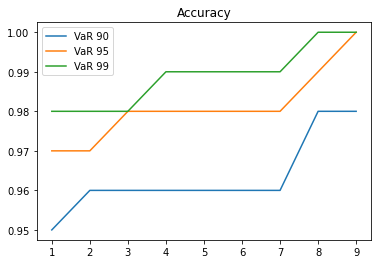

In [36]:
plt.plot(num_demos, accs[0.9], label = "VaR 90")
plt.plot(num_demos, accs[0.95], label = "VaR 95")
plt.plot(num_demos, accs[0.99], label = "VaR 99")
plt.title("Accuracy")
plt.legend()
plt.show()

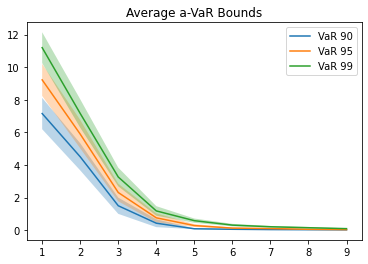

In [37]:
y = np.array([np.mean(apl) for apl in apls[0.9]])
plt.plot(num_demos, y, label = "VaR 90")
err = np.array([sem(apl) for apl in apls[0.9]])
plt.fill_between(num_demos, y - err, y + err, alpha = 0.3)
y = np.array([np.mean(apl) for apl in apls[0.95]])
plt.plot(num_demos, y, label = "VaR 95")
err = np.array([sem(apl) for apl in apls[0.95]])
plt.fill_between(num_demos, y - err, y + err, alpha = 0.3)
y = np.array([np.mean(apl) for apl in apls[0.99]])
plt.plot(num_demos, y, label = "VaR 99")
err = np.array([sem(apl) for apl in apls[0.99]])
plt.fill_between(num_demos, y - err, y + err, alpha = 0.3)
plt.legend()
plt.title("Average a-VaR Bounds")
plt.show()

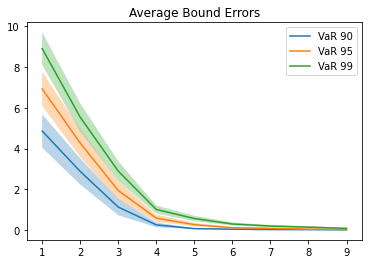

In [38]:
y = np.array([np.mean(abe) for abe in abes[0.9]])
plt.plot(num_demos, y, label = "VaR 90")
err = np.array([sem(abe) for abe in abes[0.9]])
plt.fill_between(num_demos, y - err, y + err, alpha = 0.3)
y = np.array([np.mean(abe) for abe in abes[0.95]])
plt.plot(num_demos, y, label = "VaR 95")
err = np.array([sem(abe) for abe in abes[0.95]])
plt.fill_between(num_demos, y - err, y + err, alpha = 0.3)
y = np.array([np.mean(abe) for abe in abes[0.99]])
plt.plot(num_demos, y, label = "VaR 99")
err = np.array([sem(abe) for abe in abes[0.99]])
plt.fill_between(num_demos, y - err, y + err, alpha = 0.3)
plt.legend()
plt.title("Average Bound Errors")
plt.show()

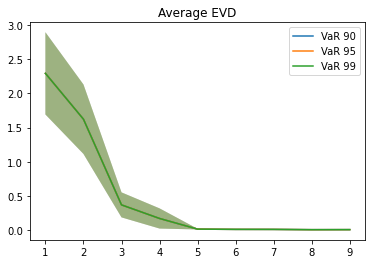

In [39]:
y = np.array([np.mean(evd) for evd in evds[0.9]])
plt.plot(num_demos, y, label = "VaR 90")
err = np.array([sem(evd) for evd in evds[0.9]])
plt.fill_between(num_demos, y - err, y + err, alpha = 0.3)
y = np.array([np.mean(evd) for evd in evds[0.95]])
plt.plot(num_demos, y, label = "VaR 95")
err = np.array([sem(evd) for evd in evds[0.95]])
plt.fill_between(num_demos, y - err, y + err, alpha = 0.3)
y = np.array([np.mean(evd) for evd in evds[0.99]])
plt.plot(num_demos, y, label = "VaR 99")
err = np.array([sem(evd) for evd in evds[0.99]])
plt.fill_between(num_demos, y - err, y + err, alpha = 0.3)
plt.legend()
plt.title("Average EVD")
plt.show()

## driving simulation

### testing how much agent is learning with each demo amount

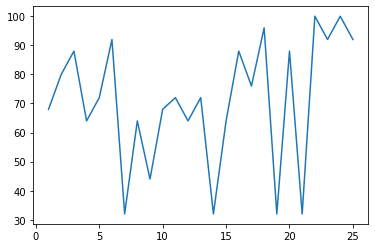

In [68]:
import re

num_demos = list(range(1, 26))
lines = open('outputs/learning.txt', 'r').readlines()
learning_accuracies = []
for line in lines:
    if line.startswith("Policy accuracy:"):
        srch = re.search("Policy accuracy: ([\d.]+)", line)
        if srch:
            learning_accuracies.append(float(srch.group(1)))
plt.plot(num_demos, learning_accuracies)
plt.show()

### alpha VaR bounds

In [92]:
num_demos = list(range(1, 16))
accs = {0.9: [], 0.95: [], 0.99: []} # accuracies
abes = {0.9: [], 0.95: [], 0.99: []} # bound errors
apls = {0.9: [], 0.95: [], 0.99: []} # a-var bounds
evds = {0.9: [], 0.95: [], 0.99: []} # evd

In [101]:
accs[0.95] = [0.95, 0.95, 0.95, 0.95, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
abes[0.95] = [[1.8293054361934766,1.28837283300126,1.5579523107835223,1.5346528446976808,1.351019392235092,0.8427740005960038,0.9667202893645384,1.6286083550405268,0.8720870207135397,0.7662281701659016,1.392985450989355,1.649084052143337,1.2730058296402134,0.7069408137087985,1.2478251992130351,1.6019937643319626,1.393485669350469,0.7677211092719846,0.9568903882189597,1.03904391028313],[1.3637137469105247,0.3640363414719465,1.4437172791364288,0.9893675197736882,0.7661846562800878,0.5584060176603047,0.4971774736250034,0.16948609672049442,-0.02398557249636113,0.9448674882237867,0.2486564620222425,1.0783877702598712,0.6206637243034248,1.1287754331151485,0.4045013745306228,0.3987392739281167,1.125141468724857,1.1248434699161143,1.2617260957430954,0.9586740504802587],[1.4457090193102025,0.38065343436204246,1.104901299609697,0.3590963544982814,0.6337549843012398,0.04278225721967027,0.539637665137614,0.2680772777061968,0.266208688510826,1.2414872905392806,0.31939320299696394,0.5530093665439673,0.6296060579891282,0.8502960232291927,0.4048805031875159,0.3741724277170148,0.939120006942893,1.160457182243274,0.8705806479333282,0.9904101181710941],[1.163800969505888,0.40717662095006746,1.069948094712601,1.0258414812771903,0.3994376602254316,0.14389044539666046,0.6412049409219157,0.3935435058737363,-0.22961381475618292,0.3718502688954684,0.39438315998429707,0.6381719289537896,0.3953315968041216,0.9943685139028744,0.44265617420981523,0.3294251134446853,0.6825272074176023,1.0466862412811972,0.18980419398791454,0.9938193999154181],[0.926505241688856,0.36475940718565164,1.120690557894878,0.21007616590542272,0.3274411664203855,0.0873104345734084,0.39167820518015256,0.4538045167965363,-0.2832872147295007,0.6421791799231058,0.32156056675670563,0.9361675693148789,0.4533964372829468,0.8288597724589655,0.3556658756201797,0.1691821398561793,1.2479713240458525,1.1820969843515603,0.11162270888448134,0.4158564445055283],[1.6972245318858552,0.16565174243064953,0.552447894803543,0.1179884721530759,0.09565972801422014,0.04646915186064706,0.8841798322004367,0.1998589834929723,-0.16322930618634585,0.5992779362576164,0.31371698844620655,0.6207006605883669,0.24041839114527766,0.6041598230255896,0.21721303921407847,0.219414643313817,0.9183222146662907,1.5956056753826684,0.3475105715223935,0.7204559012381826],[0.27486660339074237,0.5458568842388074,0.98338116672288,0.1651911481595475,0.19119581285554513,0.10225628068151515,0.4066854211017881,0.274601833024422,0.14022985510582264,0.5533823448162373,0.11791332066862521,0.33501278374749294,0.5455725197057206,0.8708752830367279,0.3575268771425452,0.34301890176497385,0.9536216862515733,0.8483541739572129,0.08314669483380366,1.2256665447450266],[0.4597426922920005,0.31560358677507316,0.2512623185385367,0.034201515652406304,0.031909269258224376,0.04342895006331616,0.14233257391331824,0.003534940733803015,1.1459494465529774,0.6749108672426265,0.34795591422426525,0.39791071686964324,0.2891509369967727,0.5424585916268696,0.15918845776577878,0.0019980142329101115,0.6289225584487915,0.35881331530126825,0.22837612558350273,0.3006225724411444],[0.2098423006359987,0.300979504018421,0.24296313131462036,0.08646010061711634,0.07656695538325382,0.20272488217680423,0.13989893240522625,0.054431385541891336,0.5703294281253941,0.4864841414680648,0.20119727768916545,0.5655758826874255,0.09640458498159535,0.2257702295342636,0.3220760465089606,0.00901668529736258,1.19466608064609,0.21611523695963533,0.1883299972028262,0.3311081728787817],[0.42472063649434194,0.27835992454502584,0.16014489782384483,0.15155467352236449,0.11083620079576852,0.22174545172219753,0.08819725987917038,0.023555512116344948,0.019821725512161326,0.3914127063760422,0.36811799658213007,0.5434555212159721,0.11728835915654726,0.5224440490297867,0.14449655205052328,0.0013930882001997893,0.5674391672917102,0.3021073967410841,0.13708358014803346,0.3519609986209491],[0.47062295347300376,0.20840806597881778,0.3593098254083306,0.05938539196520658,0.01126142134032938,0.25633093245285277,0.004974283910536828,0.005245767575355622,0.559941537222572,0.38726533211846903,0.09081227858228404,0.3589032700528314,0.01983354968233994,0.2475214489096194,0.1342370210762106,0.001546540645130321,0.5017169610086902,0.3037147645317271,0.09133322438786927,0.1054705262919026],[0.42363111873729914,0.22105761590024742,0.18076311050081717,0.03867236037314552,0.05110058304951446,0.15486598898844425,0.02443619447021916,0.007465639116457435,0.2330047947677052,0.36514415721002785,0.3436601385169052,0.334658334890912,0.29158711224187683,0.36857294181740136,0.1539157115594362,0.030362522121154343,0.4501227321334514,0.21056670842751943,0.06522107607384454,0.07843240019424313],[0.3375831652951461,0.0791385214538419,0.0416547840245423,0.0027165587388612985,0.08074527318505892,0.2182490051939805,0.00318618328207816,0.0040298004085682565,0.2031548869622767,0.2602100168612978,0.3186137977092988,0.3407899506936859,0.023434561385150293,0.1782225272760274,0.006701165238730023,0.001502452573375048,0.6331498352459075,0.42920680261959454,0.08469065859580657,0.06516349081861406],[0.48953944992871723,0.12055285178916564,0.1788836655303555,0.10972102843116378,0.06356847355178812,0.16825226012541147,0.02045630704870119,0.00636929084890931,0.19563996447644605,0.1513426775004157,0.12249570555040348,0.3256921442893154,0.03549875554151491,0.5342798745831643,0.21072945236449106,0.0029402663335733226,0.08656854329868668,0.19967692930633787,0.16496649826739193,0.04552862861056189],[0.30575756775795526,0.013790447931249979,0.0720829406615358,0.004344648859404945,0.041134238587067606,0.1667686980948424,0.005090741602503077,0.00465797032047157,0.44987114323419136,0.15010052272814572,0.049294225455272664,0.4581727367800177,0.04033238586443047,0.23210187739051646,0.08740662568604557,0.0018867342828615824,0.41524055576030416,0.2236080574841172,0.0826220347418943,0.07062305665363906]]
apls[0.95] = [[2.030286928791476,1.6479568755277851,1.573412456138598,1.5446043051694331,1.4434783527874397,1.144098882219593,0.9871191751579049,1.63605387546746,1.4656416912948038,1.0502521735115515,1.526469212340265,1.8993113801502914,1.5212957116720167,1.5521650649256158,1.4573629455429158,1.6161115916285826,1.7152379284107282,1.5333621728407898,0.991308295205231,1.1137067907929499],[1.5590558085253121,0.7236203839984716,1.4591774244915046,0.9895790496233485,0.775244447335569,0.9001952297789264,0.49856015821466293,0.16948609672049442,1.1621215813847716,0.9448674882237867,0.6424224141947337,1.3393452870721576,0.7710263749407115,1.1892307568894671,0.4045013745306228,0.3987392739281167,1.3441091360302133,1.3562171194292094,1.2950565119816966,1.0322898387948383],[1.6410510809249899,0.4764543326363693,1.1203614449647727,0.35930788434794175,0.6521154982869156,0.05030080318502645,0.5410203497272735,0.27552279813313013,0.8473933241714705,1.2414872905392806,0.44651162694444846,0.6810897669257704,0.7748252959663988,0.998213469258702,0.5915493647208332,0.3741724277170148,1.1577705113377208,1.2369376546495852,0.8942444083160714,0.9904101549925518],[1.2780937088095323,0.40803085145027923,1.0854082400676768,1.0258414812771903,0.4901258766365697,0.15184301753340024,0.6476696822915808,0.3935435058737363,0.9564933391249498,0.3718502688954684,0.399264966200777,0.7603263868001037,0.3953315968041216,1.054823837677193,0.44265617420981523,0.3294251134446853,1.1552124207610646,1.0487533143284027,0.19119397936765703,0.9976063886183962],[1.8950513804218299,0.2635865021824575,0.5529933817122693,0.11820000200273621,0.09565972801422014,0.05398769782600324,0.8985915999555809,0.1998589834929723,0.4160265284480528,0.7127723887393677,0.42873813202536415,0.7514297456427288,0.48870827317708104,0.6682756796009395,0.408317014674535,0.219414643313817,1.24007447372655,1.6045772044902966,0.348900356902136,0.7215030302548807],[1.1243320902248306,0.36830677817914215,1.1270405119437814,0.21028769575508302,0.4181293828315236,0.09482898053876457,0.3981429465498177,0.4538045167965363,0.28664462280227654,0.6421791799231058,0.33196877226230465,0.9361675693148789,0.45442511981495,0.8929756290343154,0.36010098954731895,0.1691821398561793,1.569723583106112,1.2654819128182941,0.11667046399216027,0.562260297763305],[0.4702086650055297,0.6408035520129227,0.9873517815927864,0.1654026780092078,0.19314363141087568,0.10671892948279944,0.4066854359709571,0.274601833024422,0.7101616926375999,0.554563358729141,0.23236692606745393,0.33501278374749294,0.5466012022377238,0.9145423713655724,0.3575268771425452,0.34301890176497385,1.1655716577454442,0.9317391024239469,0.08453648021354615,1.5582562034958163],[0.3122578619891548,0.39592617179253625,0.2469337461845267,0.08667163046677666,0.07656695538325382,0.20272902995577852,0.1398989472743952,0.054431385541891336,0.9000122056115356,0.48766515538096844,0.31565088308799416,0.5655758826874255,0.34469446701339873,0.2771496082631663,0.32651116043609985,0.00901668529736258,1.406616052139961,0.29259570936594637,0.1897197825825687,0.47372507425503796],[0.5621582536451566,0.31560358677507316,0.25523293340844305,0.034201515652406304,0.03385708781355492,0.04343309784229044,0.1423325887824872,0.003534940733803015,1.227817854822134,0.7884053197243778,0.34795591422426525,0.39791071686964324,0.29017961952877586,0.5815030957901954,0.15918845776577878,0.0019980142329101115,0.6289225584487915,0.4352937877075793,0.22837623603810164,0.30166970145784255],[0.4247206918614437,0.27835992454502584,0.1641155126937512,0.15155467352236449,0.11083620079576852,0.22174959950117182,0.09577355925942611,0.023555512116344948,0.5897535630439386,0.5049071588577935,0.48313914016128773,0.5434555212159721,0.36557824118835064,0.5614885531931125,0.14449655205052328,0.0013930882001997893,0.5674391672917102,0.3785878691473952,0.13847336552777595,0.4233046158066164],[0.4236311741044009,0.3160042836743627,0.18130859740954347,0.03888389022280583,0.05110058304951446,0.15487013676741854,0.0320124938504749,0.007465639116457435,0.5626875722538467,0.4786386096917791,0.3436601385169052,0.334658334890912,0.29261579477388,0.40761744598072713,0.15835082548657545,0.030362522121154343,0.4501227321334514,0.29395163689425335,0.06661086145358704,0.07843243701570085],[0.4706230088401055,0.20840806597881778,0.3872709454837747,0.05938539196520658,0.01126142134032938,0.25633508023182705,0.004974298779705771,0.005245767575355622,0.5599416787692291,0.3884463460313727,0.20526588398111276,0.3589032700528314,0.2681234317141433,0.29104204762932484,0.1342370210762106,0.001546540645130321,0.5017169610086902,0.3037148160458436,0.09272300976761176,0.10547056311336031],[0.48953950529581897,0.12055285178916564,0.1794291524390818,0.1099325582808241,0.06356847355178812,0.16916786286429156,0.02045632191787013,0.00636929084890931,0.5253227419625875,0.2636561160692633,0.23751684912956111,0.3256921442893154,0.2837886375733183,0.5733243787464901,0.21072945236449106,0.0029402663335733226,0.4274866887694789,0.2830618577730718,0.16635628364713442,0.045528665432019604],[0.33758322066224783,0.0791385214538419,0.041998579814354585,0.0027165587388612985,0.08074527318505892,0.22187332701990997,0.009650924651743272,0.0040298004085682565,0.36005117277030196,0.3725234554301454,0.3186137977092988,0.3407899506936859,0.2717244434169537,0.2172670314393532,0.006701165238730023,0.001502452573375048,0.6331498352459075,0.5029210853471864,0.08608044397554906,0.06516352764007177],[0.4081731291111113,0.013790447931249979,0.0726284275702621,0.004556178709065255,0.041134238587067606,0.1676843008337225,0.00509075647167202,0.00465797032047157,0.4498712847808485,0.263594975209897,0.16374783085410138,0.4581727367800177,0.28862226789623385,0.2756224761102219,0.08740662568604557,0.0018867342828615824,0.41524055576030416,0.29732234021170906,0.0840118201216368,0.07062309347509678]]
evds[0.95] = [[0.20098149259799936,0.3595840425265251,0.015460145355075889,0.009951460471752297,0.09245896055234781,0.3013248816235891,0.020398885793366545,0.007445520426933293,0.5935546705812641,0.2840240033456499,0.1334837613509102,0.2502273280069544,0.24828988203180338,0.8452242512168173,0.20953774632988054,0.014117827296620096,0.3217522590602594,0.7656410635688052,0.03441790698627132,0.07466288050981994],[0.19534206161478734,0.3595840425265251,0.015460145355075889,0.00021152984966031036,0.00905979105548116,0.34178921211862173,0.001382684589659535,0.0,1.1861071538811327,0.0,0.39376595217249116,0.2609575168122863,0.15036265063728674,0.06045532377431862,0.0,0.0,0.21896766730535616,0.2313736495130951,0.03333041623860131,0.0736157883145796],[0.1978268485359747,0.09793475975180796,0.000545486908726306,0.00021152984966031036,0.0,0.007518545965356178,0.014411767755144219,0.0,0.5792558346343987,0.11349445248175129,0.11502114357915763,0.1307290850543619,0.24828988203180338,0.06411585657534986,0.19110397546045654,0.0,0.3217522590602594,0.008971529107628308,0.0013897853797424852,0.0010471290166981521],[0.11429273930364428,0.0008542305002117517,0.015460145355075889,0.0,0.09068821641113813,0.007952572136739767,0.006464741369665112,0.0,1.1861071538811327,0.0,0.0048818062164799276,0.12215445784631404,0.0,0.06045532377431862,0.0,0.0,0.4726852133434623,0.0020670730472055416,0.0013897853797424852,0.003786988702978068],[0.19534206161478734,0.09580089827432683,0.015460145355075889,0.00021152984966031036,0.018360513985675796,0.007518545965356178,0.001382684589659535,0.007445520426933293,0.5811846356606445,0.0,0.12711842394748454,0.1280804003818031,0.14521923797727063,0.14791744602950932,0.1866688615333173,0.0,0.21865050439482778,0.07648047240631103,0.02366376038274318,3.682145771572687e-08],[0.19534206161478734,0.09494666777411527,0.00397061486990636,0.00021152984966031036,0.0019478185553305411,0.004462648801284282,1.4869168942692677e-08,0.0,0.5699318375317772,0.0011810139129036642,0.11445360539882872,0.0,0.00102868253200319,0.04366708832884446,0.0,0.0,0.21194997149387096,0.08338492846673393,0.0013897853797424852,0.33258965875078966],[0.1978268485359747,0.0035473709934905045,0.006349954048903389,0.00021152984966031036,0.09068821641113813,0.007518545965356178,0.006464741369665112,0.0,0.5699318375317772,0.0,0.010408205505599013,0.0,0.00102868253200319,0.06411585657534986,0.004435113927139234,0.0,0.3217522590602594,0.08338492846673393,0.005047755107678943,0.14640385325777672],[0.10241556135315608,0.09494666777411527,0.00397061486990636,0.00021152984966031036,0.0,4.147778974283683e-06,1.4869168942692677e-08,0.0,0.3296827774861415,0.0011810139129036642,0.11445360539882872,0.0,0.24828988203180338,0.05137937872890271,0.004435113927139234,0.0,0.21194997149387096,0.07648047240631103,0.0013897853797424852,0.14261690137625627],[5.5367101735288514e-08,0.0,0.000545486908726306,0.00021152984966031036,0.0,0.0009156027388800858,1.4869168942692677e-08,0.0,0.3296827774861415,0.11231343856884762,0.11502114357915763,0.0,0.24828988203180338,0.03904450416332579,0.0,0.0,0.3409181454707922,0.08338492846673393,0.0013897853797424852,3.682145771572687e-08],[5.5367101735288514e-08,0.0,0.00397061486990636,0.0,0.0,4.147778974283683e-06,0.007576299380255741,0.0,0.5699318375317772,0.11349445248175129,0.11502114357915763,0.0,0.24828988203180338,0.03904450416332579,0.0,0.0,0.0,0.07648047240631103,0.0013897853797424852,0.07134361718566731],[0.10241556135315608,0.0,0.000545486908726306,0.00021152984966031036,0.0,0.0009156027388800858,1.4869168942692677e-08,0.0,1.415466570941944e-07,0.11349445248175129,0.11445360539882872,0.0,0.24828988203180338,0.04352059871970542,0.0,0.0,0.0,0.07371428272759187,0.0013897853797424852,3.682145771572687e-08],[5.5367101735288514e-08,0.09494666777411527,0.000545486908726306,0.00021152984966031036,0.0,4.147778974283683e-06,0.007576299380255741,0.0,0.3296827774861415,0.11349445248175129,0.0,0.0,0.00102868253200319,0.03904450416332579,0.004435113927139234,0.0,0.0,0.08338492846673393,0.0013897853797424852,3.682145771572687e-08],[5.5367101735288514e-08,0.0,0.0003437957898122861,0.0,0.0,0.003624321825929481,0.006464741369665112,0.0,0.15689628580802525,0.11231343856884762,0.0,0.0,0.24828988203180338,0.03904450416332579,0.0,0.0,0.0,0.07371428272759187,0.0013897853797424852,3.682145771572687e-08],[5.5367101735288514e-08,0.0,0.027961120075444112,0.0,0.0,4.147778974283683e-06,1.4869168942692677e-08,0.0,1.415466570941944e-07,0.0011810139129036642,0.11445360539882872,0.0,0.24828988203180338,0.04352059871970542,0.0,0.0,0.0,5.1514116546717764e-08,0.0013897853797424852,3.682145771572687e-08],[0.10241556135315608,0.0,0.00397061486990636,0.0,0.0019478185553305411,4.147778974283683e-06,1.4869168942692677e-08,0.0,0.08186840826915649,0.11349445248175129,0.0,0.0,0.00102868253200319,0.03904450416332579,0.0,0.0,0.0,0.07648047240631103,1.1045459890433919e-07,0.0010471290166981521]]


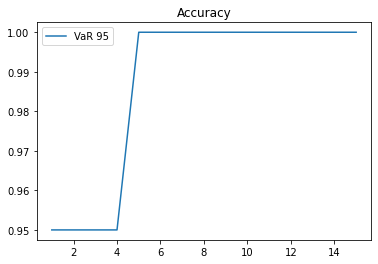

In [102]:
plt.plot(num_demos, accs[0.95], label = "VaR 95")
plt.title("Accuracy")
plt.legend()
plt.show()

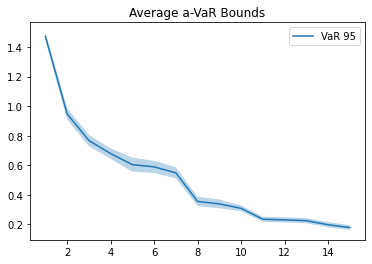

In [103]:
y = np.array([np.mean(apl) for apl in apls[0.95]])
plt.plot(num_demos, y, label = "VaR 95")
err = np.array([sem(apl) for apl in apls[0.95]])
plt.fill_between(num_demos, y - err, y + err, alpha = 0.3)
plt.legend()
plt.title("Average a-VaR Bounds")
plt.show()

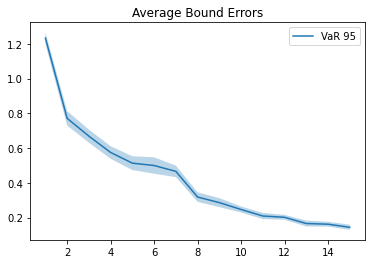

In [104]:
y = np.array([np.mean(abe) for abe in abes[0.95]])
plt.plot(num_demos, y, label = "VaR 95")
err = np.array([sem(abe) for abe in abes[0.95]])
plt.fill_between(num_demos, y - err, y + err, alpha = 0.3)
plt.legend()
plt.title("Average Bound Errors")
plt.show()

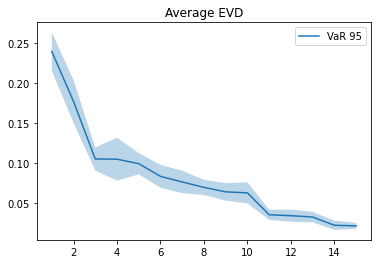

In [105]:
y = np.array([np.mean(evd) for evd in evds[0.95]])
plt.plot(num_demos, y, label = "VaR 95")
err = np.array([sem(evd) for evd in evds[0.95]])
plt.fill_between(num_demos, y - err, y + err, alpha = 0.3)
plt.legend()
plt.title("Average EVD")
plt.show()

# Demo Sufficiency

### Goal - active - NEVD

In [45]:
thresholds = [0.5, 0.4, 0.3, 0.2, 0.1]
metrics = {}
metrics["accuracies"] = {threshold: 0 for threshold in thresholds}
metrics["avg_bound_errors"] = {threshold: [] for threshold in thresholds}
metrics["bounds"] = {threshold: [] for threshold in thresholds}
metrics["true_evds"] = {threshold: [] for threshold in thresholds}
metrics["num_demos"] = {threshold: [] for threshold in thresholds}
metrics["policy_accuracies"] = {threshold: [] for threshold in thresholds}
metrics["policy_optimalities"] = {threshold: [] for threshold in thresholds}
metrics["confidence"] = {threshold: 0 for threshold in thresholds}
metrics["confusion_matrices"] = {threshold: [[]] for threshold in thresholds}

with open("active_goal_nevd.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("NEW THRESHOLD"):
            curr_thresh = float(re.search("NEW THRESHOLD ([\d.-]+)", line).group(1))
        elif line.strip() == "Policy loss bounds":
            curr_metric = "bounds"
        elif line.strip() == "Num demos":
            curr_metric = "num_demos"
        elif line.strip() == "True EVDs":
            curr_metric = "true_evds"
        elif line.strip() == "Bound errors":
            curr_metric = "avg_bound_errors"
        elif line.strip() == "Policy optimalities":
            curr_metric = "policy_optimalities"
        elif line.strip() == "Policy accuracies":
            curr_metric = "policy_accuracies"
        elif line.strip() == "Confidence":
            curr_metric = "confidence"
        elif line.strip() == "Accuracy":
            curr_metric = "accuracies"
        elif line.strip() == "Confusion matrices":
            curr_metric = "confusion_matrices"
        elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[")):
            if curr_metric != "confidence" and curr_metric != "accuracies" and curr_metric != "" and curr_metric != "confusion_matrices":
                metrics[curr_metric][curr_thresh].append(np.abs(float(line.strip())))
            elif curr_metric == "confidence" or curr_metric == "accuracies":
                metrics[curr_metric][curr_thresh] = float(line.strip())
            elif curr_metric == "confusion_matrices":
                metrics[curr_metric][curr_thresh] = eval(line.strip())
        else:
            curr_metric = ""


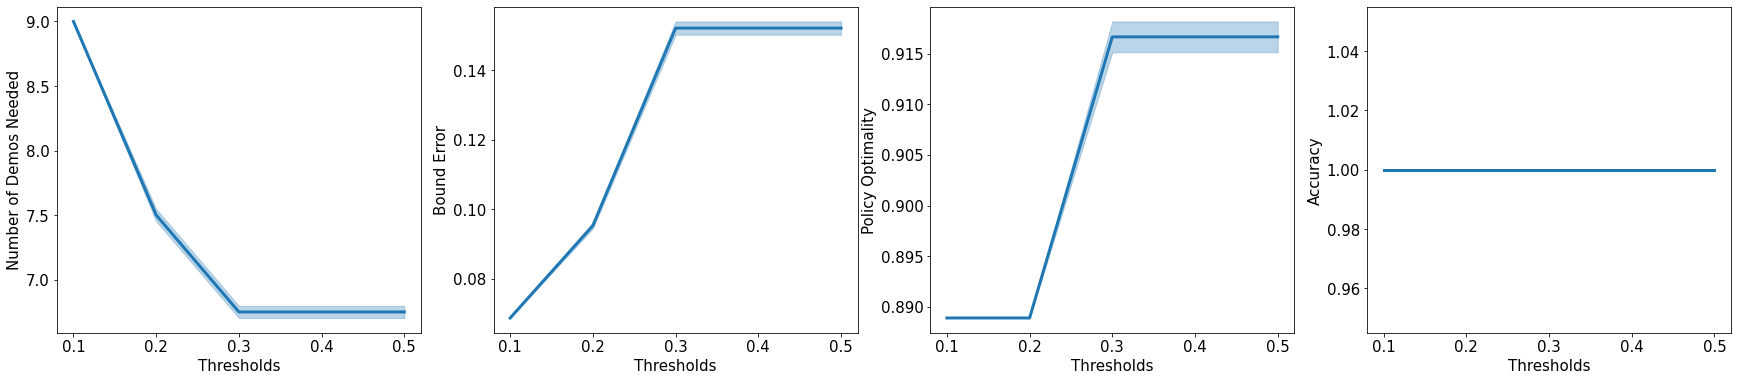

In [46]:
fig, axes = plt.subplots(1, 4, figsize = (30, 6))
color = "#1F77B4"
labels = thresholds[::-1]
x = labels[:]

# y = np.array([mean(metrics["bounds"][t]) for t in x])
# axes[0, 0].plot(x, y, color = color)
# err = np.array([sem(metrics["bounds"][t]) for t in x])
# axes[0, 0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 0].set_title("α-VaR Bounds")

y = np.array([mean(metrics["num_demos"][t]) for t in x])
axes[0].plot(x, y, color = color)
err = np.array([sem(metrics["num_demos"][t]) for t in x])
axes[0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[0].set(xlabel = "Thresholds", ylabel = "Number of Demos Needed")
# axes[0].set_yticks([round(v, 2) for v in np.arange(0.60, 0.80, 0.05)])

# y = np.array([mean(metrics["true_evds"][t]) for t in x])
# axes[0, 2].plot(x, y, color = color)
# err = np.array([sem(metrics["true_evds"][t]) for t in x])
# axes[0, 2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 2].set_title("Ground Truth EVD")
# axes[0, 2].set_yticks([round(v, 3) for v in np.arange(0.000, 0.011, 0.002)])

y = np.array([mean(metrics["avg_bound_errors"][t]) for t in x])
axes[1].plot(x, y, color = color)
err = np.array([sem(metrics["avg_bound_errors"][t]) for t in x])
axes[1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[1].set(xlabel = "Thresholds", ylabel = "Bound Error")
# axes[1].set_yticks([round(v, 2) for v in np.arange(0.00, 0.035, 0.01)])

y = np.array([mean(metrics["policy_optimalities"][t]) for t in x])
axes[2].plot(x, y, color = color)
err = np.array([sem(metrics["policy_optimalities"][t]) for t in x])
axes[2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[2].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
# axes[2].set_ylim([0.67, 1.03])
axes[2].set(xlabel = "Thresholds", ylabel = "Policy Optimality")

# y = np.array([mean(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].plot(x, y, color = color)
# err = np.array([sem(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[1, 1].set_title("Policy Accuracy")
# axes[1, 1].set_yticks([round(v, 3) for v in np.arange(0.960, 0.981, 0.005)])

# axes[1, 2].plot(x, [metrics["confidence"][t] for t in x], color = color)
# axes[1, 2].set_title("Percentage of Worlds That Passed")

y = np.array([metrics["accuracies"][t] for t in x])
axes[3].plot(x, y, color = color)
err = np.array([np.std(y) / np.sqrt(len(y))] * len(y))
axes[3].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[3].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
# axes[3].set_ylim([0.67, 1.03])
axes[3].set(xlabel = "Thresholds", ylabel = "Accuracy")

plt.show()

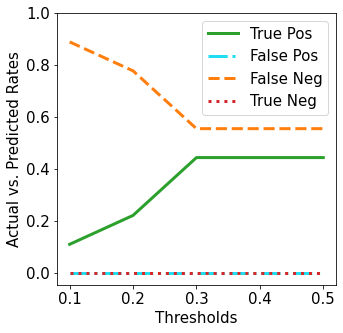

In [47]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
tp = [metrics["confusion_matrices"][t][0][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fp = [metrics["confusion_matrices"][t][0][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fn = [metrics["confusion_matrices"][t][1][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
tn = [metrics["confusion_matrices"][t][1][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
plt.plot(x, tp, label = "True Pos", color = "#2CA02C", linestyle = "-")
plt.plot(x, fp, label = "False Pos", color = "#21DDF1", linestyle = "-.")
plt.plot(x, fn, label = "False Neg", color = "#FF7F0E", linestyle = "--")
plt.plot(x, tn, label = "True Neg", color = "#D62728", linestyle = ":")
ax.set_yticks(np.arange(0.0, 1.1, 0.2))
plt.ylabel("Actual vs. Predicted Rates")
plt.xlabel("Thresholds")
plt.legend()
plt.show()

### Driving - active - NEVD

In [48]:
thresholds = [0.5, 0.4, 0.3, 0.2, 0.1]
metrics = {}
metrics["accuracies"] = {threshold: 0 for threshold in thresholds}
metrics["avg_bound_errors"] = {threshold: [] for threshold in thresholds}
metrics["bounds"] = {threshold: [] for threshold in thresholds}
metrics["true_evds"] = {threshold: [] for threshold in thresholds}
metrics["num_demos"] = {threshold: [] for threshold in thresholds}
metrics["policy_accuracies"] = {threshold: [] for threshold in thresholds}
metrics["policy_optimalities"] = {threshold: [] for threshold in thresholds}
metrics["confidence"] = {threshold: 0 for threshold in thresholds}
metrics["confusion_matrices"] = {threshold: [[]] for threshold in thresholds}

with open("active_driving_nevd.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("NEW THRESHOLD"):
            curr_thresh = float(re.search("NEW THRESHOLD ([\d.-]+)", line).group(1))
        elif line.strip() == "Policy loss bounds":
            curr_metric = "bounds"
        elif line.strip() == "Num demos":
            curr_metric = "num_demos"
        elif line.strip() == "True EVDs":
            curr_metric = "true_evds"
        elif line.strip() == "Bound errors":
            curr_metric = "avg_bound_errors"
        elif line.strip() == "Policy optimalities":
            curr_metric = "policy_optimalities"
        elif line.strip() == "Policy accuracies":
            curr_metric = "policy_accuracies"
        elif line.strip() == "Confidence":
            curr_metric = "confidence"
        elif line.strip() == "Accuracy":
            curr_metric = "accuracies"
        elif line.strip() == "Confusion matrices":
            curr_metric = "confusion_matrices"
        elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[")):
            if curr_metric != "confidence" and curr_metric != "accuracies" and curr_metric != "" and curr_metric != "confusion_matrices":
                metrics[curr_metric][curr_thresh].append(np.abs(float(line.strip())))
            elif curr_metric == "confidence" or curr_metric == "accuracies":
                metrics[curr_metric][curr_thresh] = float(line.strip())
            elif curr_metric == "confusion_matrices":
                metrics[curr_metric][curr_thresh] = eval(line.strip())
        else:
            curr_metric = ""


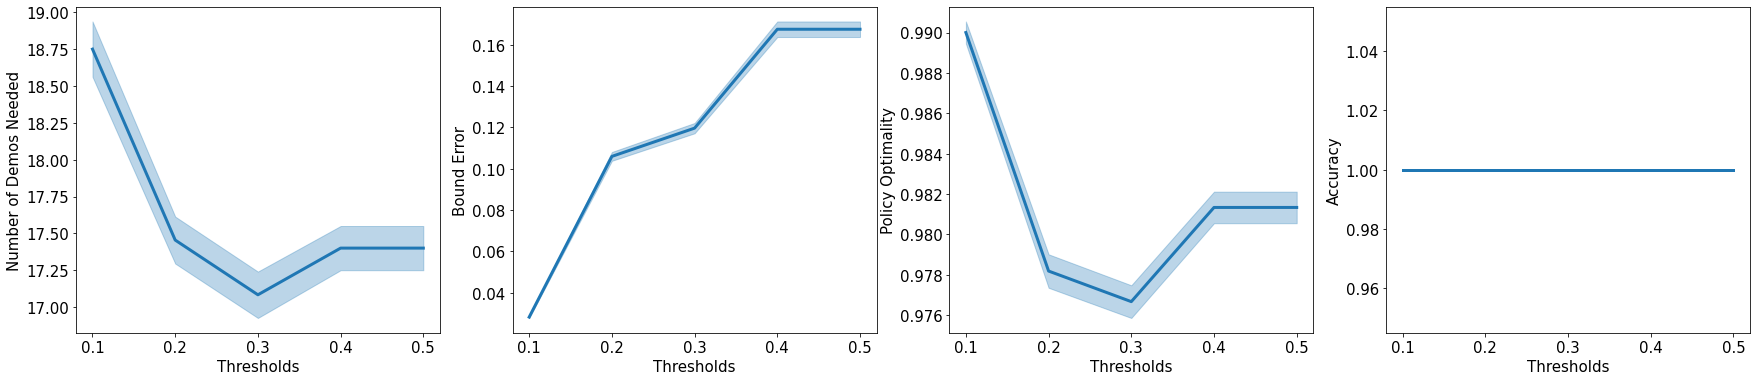

In [49]:
fig, axes = plt.subplots(1, 4, figsize = (30, 6))
color = "#1F77B4"
labels = thresholds[::-1]
x = labels[:]

# y = np.array([mean(metrics["bounds"][t]) for t in x])
# axes[0, 0].plot(x, y, color = color)
# err = np.array([sem(metrics["bounds"][t]) for t in x])
# axes[0, 0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 0].set_title("α-VaR Bounds")

y = np.array([mean(metrics["num_demos"][t]) for t in x])
axes[0].plot(x, y, color = color)
err = np.array([sem(metrics["num_demos"][t]) for t in x])
axes[0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[0].set(xlabel = "Thresholds", ylabel = "Number of Demos Needed")
# axes[0].set_yticks([round(v, 2) for v in np.arange(0.60, 0.80, 0.05)])

# y = np.array([mean(metrics["true_evds"][t]) for t in x])
# axes[0, 2].plot(x, y, color = color)
# err = np.array([sem(metrics["true_evds"][t]) for t in x])
# axes[0, 2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 2].set_title("Ground Truth EVD")
# axes[0, 2].set_yticks([round(v, 3) for v in np.arange(0.000, 0.011, 0.002)])

y = np.array([mean(metrics["avg_bound_errors"][t]) for t in x])
axes[1].plot(x, y, color = color)
err = np.array([sem(metrics["avg_bound_errors"][t]) for t in x])
axes[1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[1].set(xlabel = "Thresholds", ylabel = "Bound Error")
# axes[1].set_yticks([round(v, 2) for v in np.arange(0.00, 0.035, 0.01)])

y = np.array([mean(metrics["policy_optimalities"][t]) for t in x])
axes[2].plot(x, y, color = color)
err = np.array([sem(metrics["policy_optimalities"][t]) for t in x])
axes[2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[2].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
# axes[2].set_ylim([0.67, 1.03])
axes[2].set(xlabel = "Thresholds", ylabel = "Policy Optimality")

# y = np.array([mean(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].plot(x, y, color = color)
# err = np.array([sem(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[1, 1].set_title("Policy Accuracy")
# axes[1, 1].set_yticks([round(v, 3) for v in np.arange(0.960, 0.981, 0.005)])

# axes[1, 2].plot(x, [metrics["confidence"][t] for t in x], color = color)
# axes[1, 2].set_title("Percentage of Worlds That Passed")

y = np.array([metrics["accuracies"][t] for t in x])
axes[3].plot(x, y, color = color)
err = np.array([np.std(y) / np.sqrt(len(y))] * len(y))
axes[3].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[3].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
# axes[3].set_ylim([0.67, 1.03])
axes[3].set(xlabel = "Thresholds", ylabel = "Accuracy")

plt.show()

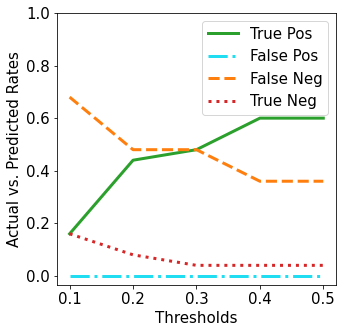

In [50]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
tp = [metrics["confusion_matrices"][t][0][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fp = [metrics["confusion_matrices"][t][0][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fn = [metrics["confusion_matrices"][t][1][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
tn = [metrics["confusion_matrices"][t][1][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
plt.plot(x, tp, label = "True Pos", color = "#2CA02C", linestyle = "-")
plt.plot(x, fp, label = "False Pos", color = "#21DDF1", linestyle = "-.")
plt.plot(x, fn, label = "False Neg", color = "#FF7F0E", linestyle = "--")
plt.plot(x, tn, label = "True Neg", color = "#D62728", linestyle = ":")
ax.set_yticks(np.arange(0.0, 1.1, 0.2))
plt.ylabel("Actual vs. Predicted Rates")
plt.xlabel("Thresholds")
plt.legend()
plt.show()

### Goal - active - baseline

In [56]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]
metrics = {}
metrics["accuracies"] = {threshold: 0 for threshold in thresholds}
metrics["avg_bound_errors"] = {threshold: [] for threshold in thresholds}
metrics["bounds"] = {threshold: [] for threshold in thresholds}
metrics["true_evds"] = {threshold: [] for threshold in thresholds}
metrics["num_demos"] = {threshold: [] for threshold in thresholds}
metrics["policy_accuracies"] = {threshold: [] for threshold in thresholds}
metrics["policy_optimalities"] = {threshold: [] for threshold in thresholds}
metrics["confidence"] = {threshold: 0 for threshold in thresholds}
metrics["confusion_matrices"] = {threshold: [[]] for threshold in thresholds}

with open("active_goal_baseline.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("NEW THRESHOLD"):
            curr_thresh = float(re.search("NEW THRESHOLD ([\d.-]+)", line).group(1))
        elif line.strip() == "Policy loss bounds":
            curr_metric = "bounds"
        elif line.strip() == "Num demos":
            curr_metric = "num_demos"
        elif line.strip() == "True EVDs":
            curr_metric = "true_evds"
        elif line.strip() == "Bound errors":
            curr_metric = "avg_bound_errors"
        elif line.strip() == "Policy optimalities":
            curr_metric = "policy_optimalities"
        elif line.strip() == "Policy accuracies":
            curr_metric = "policy_accuracies"
        elif line.strip() == "Confidence":
            curr_metric = "confidence"
        elif line.strip() == "Accuracy":
            curr_metric = "accuracies"
        elif line.strip() == "Confusion matrices":
            curr_metric = "confusion_matrices"
        elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[")):
            if curr_metric != "confidence" and curr_metric != "accuracies" and curr_metric != "" and curr_metric != "confusion_matrices":
                metrics[curr_metric][curr_thresh].append(np.abs(float(line.strip())))
            elif curr_metric == "confidence" or curr_metric == "accuracies":
                metrics[curr_metric][curr_thresh] = float(line.strip())
            elif curr_metric == "confusion_matrices":
                metrics[curr_metric][curr_thresh] = eval(line.strip())
        else:
            curr_metric = ""


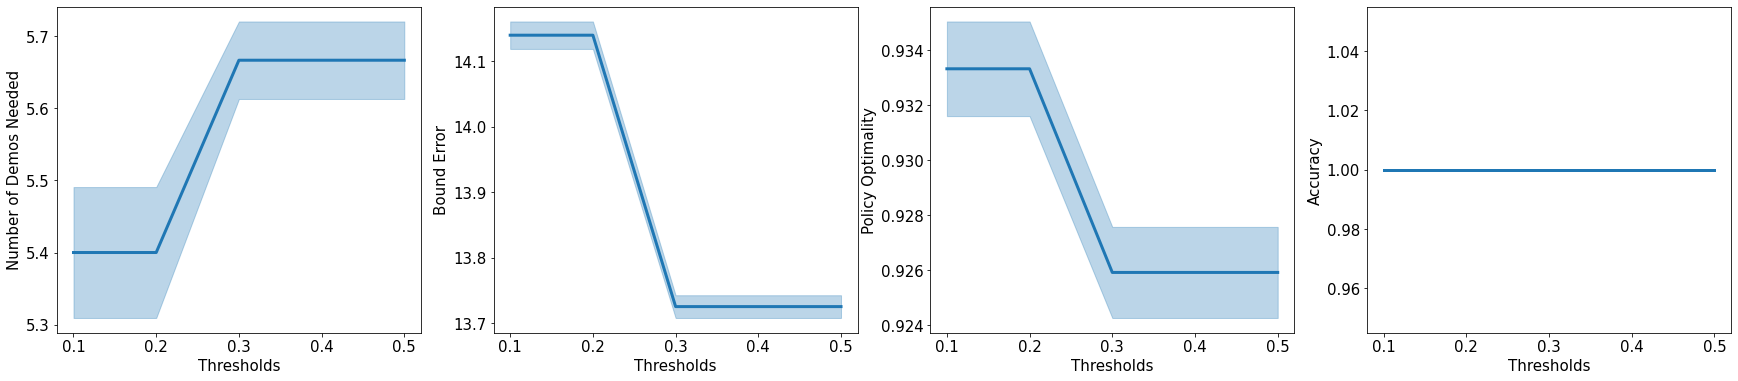

In [57]:
fig, axes = plt.subplots(1, 4, figsize = (30, 6))
color = "#1F77B4"
labels = thresholds[::-1]
x = labels[:]

# y = np.array([mean(metrics["bounds"][t]) for t in x])
# axes[0, 0].plot(x, y, color = color)
# err = np.array([sem(metrics["bounds"][t]) for t in x])
# axes[0, 0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 0].set_title("α-VaR Bounds")

y = np.array([mean(metrics["num_demos"][t]) for t in x])
axes[0].plot(x, y, color = color)
err = np.array([sem(metrics["num_demos"][t]) for t in x])
axes[0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[0].set(xlabel = "Thresholds", ylabel = "Number of Demos Needed")
# axes[0].set_yticks([round(v, 2) for v in np.arange(0.60, 0.80, 0.05)])

# y = np.array([mean(metrics["true_evds"][t]) for t in x])
# axes[0, 2].plot(x, y, color = color)
# err = np.array([sem(metrics["true_evds"][t]) for t in x])
# axes[0, 2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 2].set_title("Ground Truth EVD")
# axes[0, 2].set_yticks([round(v, 3) for v in np.arange(0.000, 0.011, 0.002)])

y = np.array([mean(metrics["avg_bound_errors"][t]) for t in x])
axes[1].plot(x, y, color = color)
err = np.array([sem(metrics["avg_bound_errors"][t]) for t in x])
axes[1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[1].set(xlabel = "Thresholds", ylabel = "Bound Error")
# axes[1].set_yticks([round(v, 2) for v in np.arange(0.00, 0.035, 0.01)])

y = np.array([mean(metrics["policy_optimalities"][t]) for t in x])
axes[2].plot(x, y, color = color)
err = np.array([sem(metrics["policy_optimalities"][t]) for t in x])
axes[2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[2].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
# axes[2].set_ylim([0.67, 1.03])
axes[2].set(xlabel = "Thresholds", ylabel = "Policy Optimality")

# y = np.array([mean(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].plot(x, y, color = color)
# err = np.array([sem(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[1, 1].set_title("Policy Accuracy")
# axes[1, 1].set_yticks([round(v, 3) for v in np.arange(0.960, 0.981, 0.005)])

# axes[1, 2].plot(x, [metrics["confidence"][t] for t in x], color = color)
# axes[1, 2].set_title("Percentage of Worlds That Passed")

y = np.array([metrics["accuracies"][t] for t in x])
axes[3].plot(x, y, color = color)
err = np.array([np.std(y) / np.sqrt(len(y))] * len(y))
axes[3].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[3].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
# axes[3].set_ylim([0.67, 1.03])
axes[3].set(xlabel = "Thresholds", ylabel = "Accuracy")

plt.show()

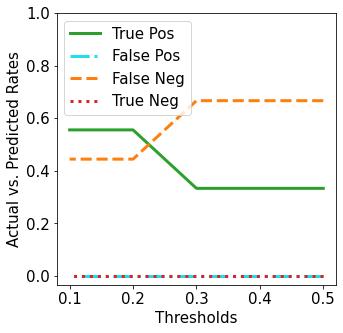

In [58]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
tp = [metrics["confusion_matrices"][t][0][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fp = [metrics["confusion_matrices"][t][0][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fn = [metrics["confusion_matrices"][t][1][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
tn = [metrics["confusion_matrices"][t][1][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
plt.plot(x, tp, label = "True Pos", color = "#2CA02C", linestyle = "-")
plt.plot(x, fp, label = "False Pos", color = "#21DDF1", linestyle = "-.")
plt.plot(x, fn, label = "False Neg", color = "#FF7F0E", linestyle = "--")
plt.plot(x, tn, label = "True Neg", color = "#D62728", linestyle = ":")
ax.set_yticks(np.arange(0.0, 1.1, 0.2))
plt.ylabel("Actual vs. Predicted Rates")
plt.xlabel("Thresholds")
plt.legend()
plt.show()

### Driving - active - baseline

In [63]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]
metrics = {}
metrics["accuracies"] = {threshold: 0 for threshold in thresholds}
metrics["avg_bound_errors"] = {threshold: [] for threshold in thresholds}
metrics["bounds"] = {threshold: [] for threshold in thresholds}
metrics["true_evds"] = {threshold: [] for threshold in thresholds}
metrics["num_demos"] = {threshold: [] for threshold in thresholds}
metrics["policy_accuracies"] = {threshold: [] for threshold in thresholds}
metrics["policy_optimalities"] = {threshold: [] for threshold in thresholds}
metrics["confidence"] = {threshold: 0 for threshold in thresholds}
metrics["confusion_matrices"] = {threshold: [[]] for threshold in thresholds}

with open("active_driving_baseline.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("NEW THRESHOLD"):
            curr_thresh = float(re.search("NEW THRESHOLD ([\d.-]+)", line).group(1))
        elif line.strip() == "Policy loss bounds":
            curr_metric = "bounds"
        elif line.strip() == "Num demos":
            curr_metric = "num_demos"
        elif line.strip() == "True EVDs":
            curr_metric = "true_evds"
        elif line.strip() == "Bound errors":
            curr_metric = "avg_bound_errors"
        elif line.strip() == "Policy optimalities":
            curr_metric = "policy_optimalities"
        elif line.strip() == "Policy accuracies":
            curr_metric = "policy_accuracies"
        elif line.strip() == "Confidence":
            curr_metric = "confidence"
        elif line.strip() == "Accuracy":
            curr_metric = "accuracies"
        elif line.strip() == "Confusion matrices":
            curr_metric = "confusion_matrices"
        elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[")):
            if curr_metric != "confidence" and curr_metric != "accuracies" and curr_metric != "" and curr_metric != "confusion_matrices":
                metrics[curr_metric][curr_thresh].append(np.abs(float(line.strip())))
            elif curr_metric == "confidence" or curr_metric == "accuracies":
                metrics[curr_metric][curr_thresh] = float(line.strip())
            elif curr_metric == "confusion_matrices":
                metrics[curr_metric][curr_thresh] = eval(line.strip())
        else:
            curr_metric = ""


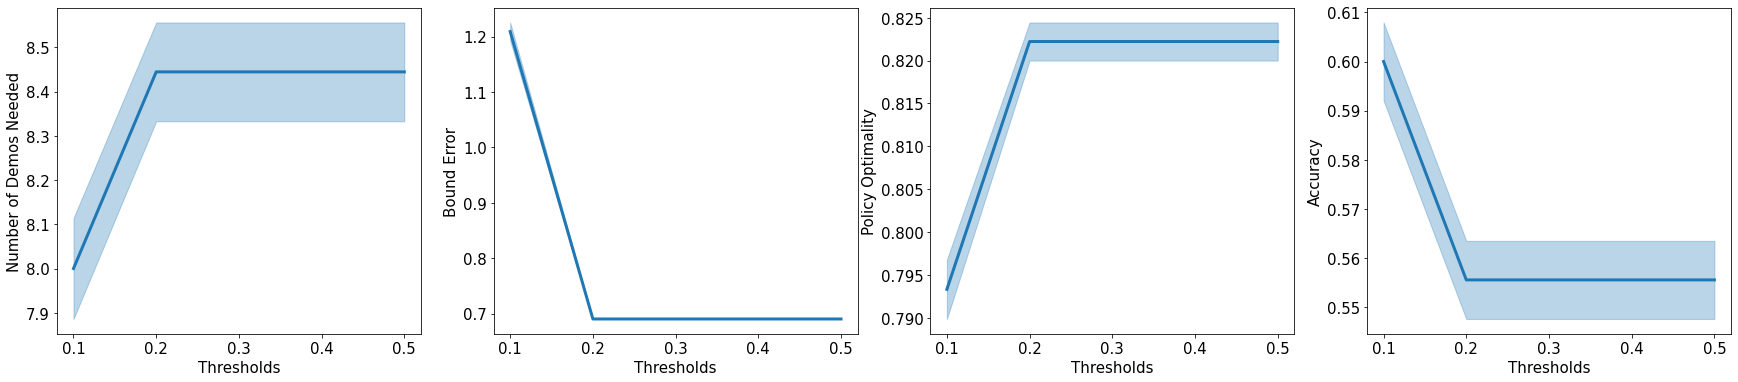

In [64]:
fig, axes = plt.subplots(1, 4, figsize = (30, 6))
color = "#1F77B4"
labels = thresholds[::-1]
x = labels[:]

# y = np.array([mean(metrics["bounds"][t]) for t in x])
# axes[0, 0].plot(x, y, color = color)
# err = np.array([sem(metrics["bounds"][t]) for t in x])
# axes[0, 0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 0].set_title("α-VaR Bounds")

y = np.array([mean(metrics["num_demos"][t]) for t in x])
axes[0].plot(x, y, color = color)
err = np.array([sem(metrics["num_demos"][t]) for t in x])
axes[0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[0].set(xlabel = "Thresholds", ylabel = "Number of Demos Needed")
# axes[0].set_yticks([round(v, 2) for v in np.arange(0.60, 0.80, 0.05)])

# y = np.array([mean(metrics["true_evds"][t]) for t in x])
# axes[0, 2].plot(x, y, color = color)
# err = np.array([sem(metrics["true_evds"][t]) for t in x])
# axes[0, 2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 2].set_title("Ground Truth EVD")
# axes[0, 2].set_yticks([round(v, 3) for v in np.arange(0.000, 0.011, 0.002)])

y = np.array([mean(metrics["avg_bound_errors"][t]) for t in x])
axes[1].plot(x, y, color = color)
err = np.array([sem(metrics["avg_bound_errors"][t]) for t in x])
axes[1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[1].set(xlabel = "Thresholds", ylabel = "Bound Error")
# axes[1].set_yticks([round(v, 2) for v in np.arange(0.00, 0.035, 0.01)])

y = np.array([mean(metrics["policy_optimalities"][t]) for t in x])
axes[2].plot(x, y, color = color)
err = np.array([sem(metrics["policy_optimalities"][t]) for t in x])
axes[2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[2].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
# axes[2].set_ylim([0.67, 1.03])
axes[2].set(xlabel = "Thresholds", ylabel = "Policy Optimality")

# y = np.array([mean(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].plot(x, y, color = color)
# err = np.array([sem(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[1, 1].set_title("Policy Accuracy")
# axes[1, 1].set_yticks([round(v, 3) for v in np.arange(0.960, 0.981, 0.005)])

# axes[1, 2].plot(x, [metrics["confidence"][t] for t in x], color = color)
# axes[1, 2].set_title("Percentage of Worlds That Passed")

y = np.array([metrics["accuracies"][t] for t in x])
axes[3].plot(x, y, color = color)
err = np.array([np.std(y) / np.sqrt(len(y))] * len(y))
axes[3].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[3].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
# axes[3].set_ylim([0.67, 1.03])
axes[3].set(xlabel = "Thresholds", ylabel = "Accuracy")

plt.show()

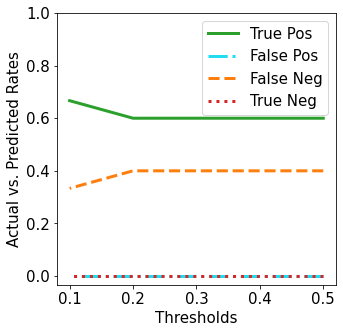

In [65]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
tp = [metrics["confusion_matrices"][t][0][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fp = [metrics["confusion_matrices"][t][0][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fn = [metrics["confusion_matrices"][t][1][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
tn = [metrics["confusion_matrices"][t][1][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
plt.plot(x, tp, label = "True Pos", color = "#2CA02C", linestyle = "-")
plt.plot(x, fp, label = "False Pos", color = "#21DDF1", linestyle = "-.")
plt.plot(x, fn, label = "False Neg", color = "#FF7F0E", linestyle = "--")
plt.plot(x, tn, label = "True Neg", color = "#D62728", linestyle = ":")
ax.set_yticks(np.arange(0.0, 1.1, 0.2))
plt.ylabel("Actual vs. Predicted Rates")
plt.xlabel("Thresholds")
plt.legend()
plt.show()

### Feature - passive - NEVD

In [56]:
# thresholds = [round(th, 1) for th in np.arange(start = 0.5, stop = -0.1, step = -0.1)]
# metrics = {}
# metrics["accuracies"] = {threshold: 0 for threshold in thresholds}
# metrics["avg_bound_errors"] = {threshold: [] for threshold in thresholds}
# metrics["bounds"] = {threshold: [] for threshold in thresholds}
# metrics["true_evds"] = {threshold: [] for threshold in thresholds}
# metrics["pct_states"] = {threshold: [] for threshold in thresholds}
# metrics["policy_accuracies"] = {threshold: [] for threshold in thresholds}
# metrics["policy_optimalities"] = {threshold: [] for threshold in thresholds}
# metrics["confidence"] = {threshold: 0 for threshold in thresholds}
# metrics["confusion_matrices"] = {threshold: [[]] for threshold in thresholds}

# with open("paper_outputs/avar_feature_pairs.txt") as file:
#     lines = file.readlines()
#     for line in lines:
#         if line.startswith("NEW THRESHOLD"):
#             curr_thresh = float(re.search("NEW THRESHOLD ([\d.-]+)", line).group(1))
#         elif line.strip() == "Policy loss bounds":
#             curr_metric = "bounds"
#         elif line.strip() == "Percent states":
#             curr_metric = "pct_states"
#         elif line.strip() == "True EVDs":
#             curr_metric = "true_evds"
#         elif line.strip() == "Bound errors":
#             curr_metric = "avg_bound_errors"
#         elif line.strip() == "Policy optimalities":
#             curr_metric = "policy_optimalities"
#         elif line.strip() == "Policy accuracies":
#             curr_metric = "policy_accuracies"
#         elif line.strip() == "Confidence":
#             curr_metric = "confidence"
#         elif line.strip() == "Accuracy":
#             curr_metric = "accuracies"
#         elif line.strip() == "Confusion matrices":
#             curr_metric = "confusion_matrices"
#         elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[")):
#             if curr_metric != "confidence" and curr_metric != "accuracies" and curr_metric != "" and curr_metric != "confusion_matrices":
#                 metrics[curr_metric][curr_thresh].append(np.abs(float(line.strip())))
#             elif curr_metric == "confidence" or curr_metric == "accuracies":
#                 metrics[curr_metric][curr_thresh] = float(line.strip())
#             elif curr_metric == "confusion_matrices":
#                 metrics[curr_metric][curr_thresh] = eval(line.strip())
#         else:
#             curr_metric = ""


In [843]:
# fig, axes = plt.subplots(1, 4, figsize = (25, 5))
# color = "#1F77B4"
# labels = thresholds[::-1]
# x = labels[1:]

# # y = np.array([mean(metrics["bounds"][t]) for t in x])
# # axes[0, 0].plot(x, y, color = color)
# # err = np.array([sem(metrics["bounds"][t]) for t in x])
# # axes[0, 0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# # axes[0, 0].set_title("α-VaR Bounds")

# y = np.array([mean(metrics["pct_states"][t]) for t in x])
# axes[0].plot(x, y, color = color)
# err = np.array([sem(metrics["pct_states"][t]) for t in x])
# axes[0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0].set_title("Percentage of States Needed")
# axes[0].set(xlabel = "Thresholds")

# # y = np.array([mean(metrics["true_evds"][t]) for t in x])
# # axes[0, 2].plot(x, y, color = color)
# # err = np.array([sem(metrics["true_evds"][t]) for t in x])
# # axes[0, 2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# # axes[0, 2].set_title("Ground Truth EVD")
# # axes[0, 2].set_yticks([round(v, 3) for v in np.arange(0.000, 0.011, 0.002)])

# y = np.array([mean(metrics["avg_bound_errors"][t]) for t in x])
# axes[1].plot(x, y, color = color)
# err = np.array([sem(metrics["avg_bound_errors"][t]) for t in x])
# axes[1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[1].set_title("Bound Error")
# axes[1].set(xlabel = "Thresholds")

# y = np.array([mean(metrics["policy_optimalities"][t]) for t in x])
# axes[2].plot(x, y, color = color)
# err = np.array([sem(metrics["policy_optimalities"][t] for t in x)])
# axes[2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[2].set_title("Policy Optimality")
# axes[2].set_yticks([round(v, 3) for v in np.arange(0.975, 0.978, 0.001)])
# axes[2].set(xlabel = "Thresholds")

# # y = np.array([mean(metrics["policy_accuracies"][t]) for t in x])
# # axes[1, 1].plot(x, y, color = color)
# # err = np.array([sem(metrics["policy_accuracies"][t]) for t in x])
# # axes[1, 1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# # axes[1, 1].set_title("Policy Accuracy")
# # axes[1, 1].set_yticks([round(v, 3) for v in np.arange(0.960, 0.981, 0.005)])

# # axes[1, 2].plot(x, [metrics["confidence"][t] for t in x], color = color)
# # axes[1, 2].set_title("Percentage of Worlds That Passed")

# axes[3].plot(x, [metrics["accuracies"][t] for t in x], color = color)
# axes[3].set_title("Accuracy")
# axes[3].set_yticks([round(v, 3) for v in np.arange(0.938, 0.941, 0.001)])
# axes[3].set(xlabel = "Thresholds")

# plt.show()

In [844]:
# fig, ax = plt.subplots(1, 1, figsize = (5, 5))
# tp = [metrics["confusion_matrices"][t][0][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
# fn = [metrics["confusion_matrices"][t][1][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
# tn = [metrics["confusion_matrices"][t][1][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
# plt.plot(x, tp, label = "True Pos Rate", color = "#2CA02C", linestyle = "-")
# plt.plot(x, fn, label = "False Neg Rate", color = "#FF7F0E", linestyle = "--")
# plt.plot(x, tn, label = "True Neg Rate", color = "#D62728", linestyle = ":")
# ax.set_yticks(np.arange(0.0, 1.1, 0.2))
# plt.title("Actual vs. Predicted Passes")
# plt.legend()
# plt.show()

### Driving - passive - NEVD

In [882]:
thresholds = [round(th, 1) for th in np.arange(start = 0.5, stop = -0.1, step = -0.1)]
metrics = {}
metrics["accuracies"] = {threshold: 0 for threshold in thresholds}
metrics["avg_bound_errors"] = {threshold: [] for threshold in thresholds}
metrics["bounds"] = {threshold: [] for threshold in thresholds}
metrics["true_evds"] = {threshold: [] for threshold in thresholds}
metrics["pct_states"] = {threshold: [] for threshold in thresholds}
metrics["policy_accuracies"] = {threshold: [] for threshold in thresholds}
metrics["policy_optimalities"] = {threshold: [] for threshold in thresholds}
metrics["confidence"] = {threshold: 0 for threshold in thresholds}
metrics["confusion_matrices"] = {threshold: [[]] for threshold in thresholds}

with open("paper_outputs/avar_driving_pairs.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("NEW THRESHOLD"):
            curr_thresh = float(re.search("NEW THRESHOLD ([\d.-]+)", line).group(1))
        elif line.strip() == "Policy loss bounds":
            curr_metric = "bounds"
        elif line.strip() == "Percent states":
            curr_metric = "pct_states"
        elif line.strip() == "True EVDs":
            curr_metric = "true_evds"
        elif line.strip() == "Bound errors":
            curr_metric = "avg_bound_errors"
        elif line.strip() == "Policy optimalities":
            curr_metric = "policy_optimalities"
        elif line.strip() == "Policy accuracies":
            curr_metric = "policy_accuracies"
        elif line.strip() == "Confidence":
            curr_metric = "confidence"
        elif line.strip() == "Accuracy":
            curr_metric = "accuracies"
        elif line.strip() == "Confusion matrices":
            curr_metric = "confusion_matrices"
        elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[")):
            if curr_metric != "confidence" and curr_metric != "accuracies" and curr_metric != "" and curr_metric != "confusion_matrices":
                metrics[curr_metric][curr_thresh].append(np.abs(float(line.strip())))
            elif curr_metric == "confidence" or curr_metric == "accuracies":
                metrics[curr_metric][curr_thresh] = float(line.strip())
            elif curr_metric == "confusion_matrices":
                metrics[curr_metric][curr_thresh] = eval(line.strip())
        else:
            curr_metric = ""


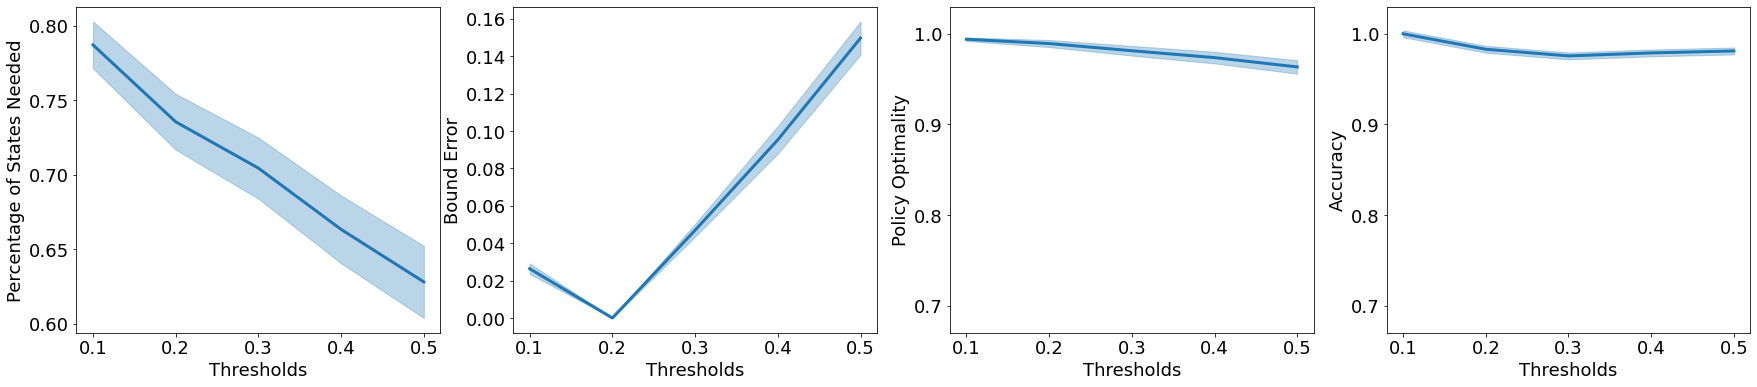

In [883]:
fig, axes = plt.subplots(1, 4, figsize = (30, 6))
color = "#1F77B4"
labels = thresholds[::-1]
x = labels[1:]

# y = np.array([mean(metrics["bounds"][t]) for t in x])
# axes[0, 0].plot(x, y, color = color)
# err = np.array([sem(metrics["bounds"][t]) for t in x])
# axes[0, 0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 0].set_title("α-VaR Bounds")

y = np.array([mean(metrics["pct_states"][t]) for t in x])
axes[0].plot(x, y, color = color)
err = np.array([sem(metrics["pct_states"][t]) for t in x])
axes[0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[0].set(xlabel = "Thresholds", ylabel = "Percentage of States Needed")
axes[0].set_yticks([round(v, 2) for v in np.arange(0.60, 0.80, 0.05)])

# y = np.array([mean(metrics["true_evds"][t]) for t in x])
# axes[0, 2].plot(x, y, color = color)
# err = np.array([sem(metrics["true_evds"][t]) for t in x])
# axes[0, 2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 2].set_title("Ground Truth EVD")
# axes[0, 2].set_yticks([round(v, 3) for v in np.arange(0.000, 0.011, 0.002)])

y = np.array([mean(metrics["avg_bound_errors"][t]) for t in x])
axes[1].plot(x, y, color = color)
err = np.array([sem(metrics["avg_bound_errors"][t]) for t in x])
axes[1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[1].set(xlabel = "Thresholds", ylabel = "Bound Error")

y = np.array([mean(metrics["policy_optimalities"][t]) for t in x])
axes[2].plot(x, y, color = color)
err = np.array([sem(metrics["policy_optimalities"][t]) for t in x])
axes[2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[2].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
axes[2].set_ylim([0.67, 1.03])
axes[2].set(xlabel = "Thresholds", ylabel = "Policy Optimality")

# y = np.array([mean(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].plot(x, y, color = color)
# err = np.array([sem(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[1, 1].set_title("Policy Accuracy")
# axes[1, 1].set_yticks([round(v, 3) for v in np.arange(0.960, 0.981, 0.005)])

# axes[1, 2].plot(x, [metrics["confidence"][t] for t in x], color = color)
# axes[1, 2].set_title("Percentage of Worlds That Passed")

y = np.array([metrics["accuracies"][t] for t in x])
axes[3].plot(x, y, color = color)
err = np.array([np.std(y) / np.sqrt(len(y))] * len(y))
axes[3].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[3].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
axes[3].set_ylim([0.67, 1.03])
axes[3].set(xlabel = "Thresholds", ylabel = "Accuracy")

plt.show()

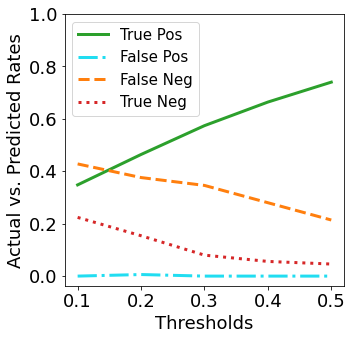

In [847]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
tp = [metrics["confusion_matrices"][t][0][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fp = [metrics["confusion_matrices"][t][0][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fn = [metrics["confusion_matrices"][t][1][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
tn = [metrics["confusion_matrices"][t][1][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
plt.plot(x, tp, label = "True Pos", color = "#2CA02C", linestyle = "-")
plt.plot(x, fp, label = "False Pos", color = "#21DDF1", linestyle = "-.")
plt.plot(x, fn, label = "False Neg", color = "#FF7F0E", linestyle = "--")
plt.plot(x, tn, label = "True Neg", color = "#D62728", linestyle = ":")
ax.set_yticks(np.arange(0.0, 1.1, 0.2))
plt.ylabel("Actual vs. Predicted Rates")
plt.xlabel("Thresholds")
plt.legend()
plt.show()

### Goal - passive - NEVD

In [884]:
thresholds = [round(th, 1) for th in np.arange(start = 0.5, stop = -0.1, step = -0.1)]
metrics = {}
metrics["accuracies"] = {threshold: 0 for threshold in thresholds}
metrics["avg_bound_errors"] = {threshold: [] for threshold in thresholds}
metrics["bounds"] = {threshold: [] for threshold in thresholds}
metrics["true_evds"] = {threshold: [] for threshold in thresholds}
metrics["pct_states"] = {threshold: [] for threshold in thresholds}
metrics["policy_accuracies"] = {threshold: [] for threshold in thresholds}
metrics["policy_optimalities"] = {threshold: [] for threshold in thresholds}
metrics["confidence"] = {threshold: 0 for threshold in thresholds}
metrics["confusion_matrices"] = {threshold: [[]] for threshold in thresholds}

with open("paper_outputs/avar_goal_pairs.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("NEW THRESHOLD"):
            curr_thresh = float(re.search("NEW THRESHOLD ([\d.-]+)", line).group(1))
        elif line.strip() == "Policy loss bounds":
            curr_metric = "bounds"
        elif line.strip() == "Percent states":
            curr_metric = "pct_states"
        elif line.strip() == "True EVDs":
            curr_metric = "true_evds"
        elif line.strip() == "Bound errors":
            curr_metric = "avg_bound_errors"
        elif line.strip() == "Policy optimalities":
            curr_metric = "policy_optimalities"
        elif line.strip() == "Policy accuracies":
            curr_metric = "policy_accuracies"
        elif line.strip() == "Confidence":
            curr_metric = "confidence"
        elif line.strip() == "Accuracy":
            curr_metric = "accuracies"
        elif line.strip() == "Confusion matrices":
            curr_metric = "confusion_matrices"
        elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[")):
            if curr_metric != "confidence" and curr_metric != "accuracies" and curr_metric != "" and curr_metric != "confusion_matrices":
                metrics[curr_metric][curr_thresh].append(np.abs(float(line.strip())))
            elif curr_metric == "confidence" or curr_metric == "accuracies":
                metrics[curr_metric][curr_thresh] = float(line.strip())
            elif curr_metric == "confusion_matrices":
                metrics[curr_metric][curr_thresh] = eval(line.strip())
        else:
            curr_metric = ""


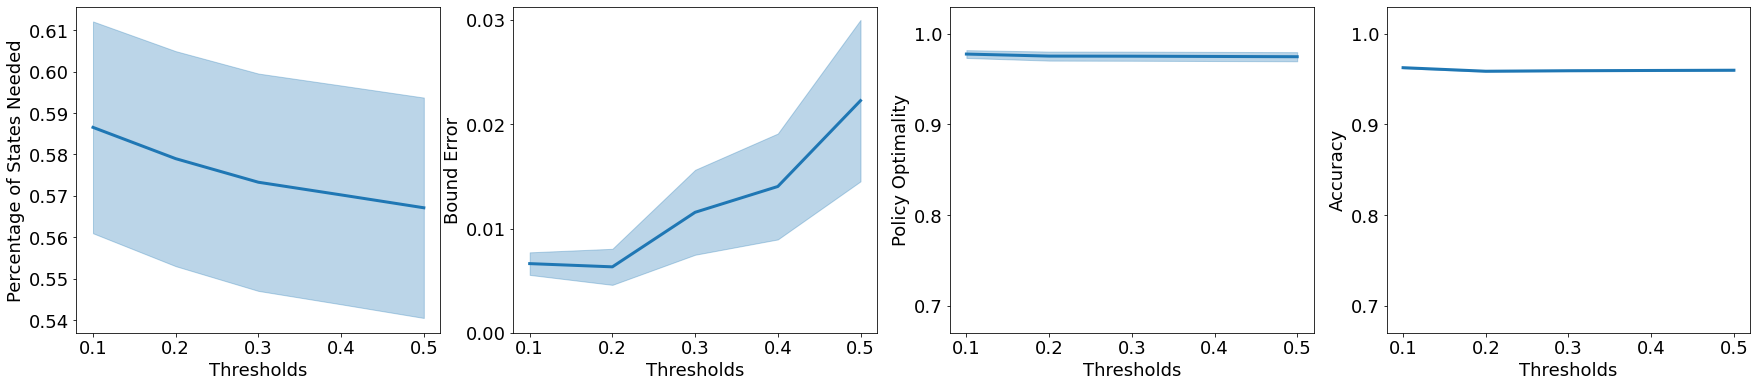

In [885]:
fig, axes = plt.subplots(1, 4, figsize = (30, 6))
color = "#1F77B4"
labels = thresholds[::-1]
x = labels[1:]

# y = np.array([mean(metrics["bounds"][t]) for t in x])
# axes[0, 0].plot(x, y, color = color)
# err = np.array([sem(metrics["bounds"][t]) for t in x])
# axes[0, 0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 0].set_title("α-VaR Bounds")

y = np.array([mean(metrics["pct_states"][t]) for t in x])
axes[0].plot(x, y, color = color)
err = np.array([sem(metrics["pct_states"][t]) for t in x])
axes[0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[0].set(xlabel = "Thresholds", ylabel = "Percentage of States Needed")
# axes[0].set_yticks([round(v, 2) for v in np.arange(0.60, 0.80, 0.05)])

# y = np.array([mean(metrics["true_evds"][t]) for t in x])
# axes[0, 2].plot(x, y, color = color)
# err = np.array([sem(metrics["true_evds"][t]) for t in x])
# axes[0, 2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 2].set_title("Ground Truth EVD")
# axes[0, 2].set_yticks([round(v, 3) for v in np.arange(0.000, 0.011, 0.002)])

y = np.array([mean(metrics["avg_bound_errors"][t]) for t in x])
axes[1].plot(x, y, color = color)
err = np.array([sem(metrics["avg_bound_errors"][t]) for t in x])
axes[1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[1].set(xlabel = "Thresholds", ylabel = "Bound Error")
axes[1].set_yticks([round(v, 2) for v in np.arange(0.00, 0.035, 0.01)])

y = np.array([mean(metrics["policy_optimalities"][t]) for t in x])
axes[2].plot(x, y, color = color)
err = np.array([sem(metrics["policy_optimalities"][t]) for t in x])
axes[2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[2].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
axes[2].set_ylim([0.67, 1.03])
axes[2].set(xlabel = "Thresholds", ylabel = "Policy Optimality")

# y = np.array([mean(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].plot(x, y, color = color)
# err = np.array([sem(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[1, 1].set_title("Policy Accuracy")
# axes[1, 1].set_yticks([round(v, 3) for v in np.arange(0.960, 0.981, 0.005)])

# axes[1, 2].plot(x, [metrics["confidence"][t] for t in x], color = color)
# axes[1, 2].set_title("Percentage of Worlds That Passed")

y = np.array([metrics["accuracies"][t] for t in x])
axes[3].plot(x, y, color = color)
err = np.array([np.std(y) / np.sqrt(len(y))] * len(y))
axes[3].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[3].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
axes[3].set_ylim([0.67, 1.03])
axes[3].set(xlabel = "Thresholds", ylabel = "Accuracy")

plt.show()

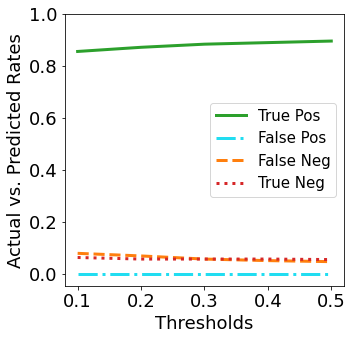

In [850]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
tp = [metrics["confusion_matrices"][t][0][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fp = [metrics["confusion_matrices"][t][0][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fn = [metrics["confusion_matrices"][t][1][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
tn = [metrics["confusion_matrices"][t][1][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
plt.plot(x, tp, label = "True Pos", color = "#2CA02C", linestyle = "-")
plt.plot(x, fp, label = "False Pos", color = "#21DDF1", linestyle = "-.")
plt.plot(x, fn, label = "False Neg", color = "#FF7F0E", linestyle = "--")
plt.plot(x, tn, label = "True Neg", color = "#D62728", linestyle = ":")
ax.set_yticks(np.arange(0.0, 1.1, 0.2))
plt.ylabel("Actual vs. Predicted Rates")
plt.xlabel("Thresholds")
plt.legend()
plt.show()

### Lava - passive - NEVD

In [76]:
thresholds = [round(th, 1) for th in np.arange(start = 0.5, stop = -0.1, step = -0.1)]
metrics = {}
metrics["accuracies"] = {threshold: 0 for threshold in thresholds}
metrics["avg_bound_errors"] = {threshold: [] for threshold in thresholds}
metrics["num_demos"] = {threshold: [] for threshold in thresholds}
metrics["policy_optimalities"] = {threshold: [] for threshold in thresholds}
metrics["confusion_matrices"] = {threshold: [[]] for threshold in thresholds}

with open("paper_outputs/avar_lava_3.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("NEW THRESHOLD"):
            curr_thresh = float(re.search("NEW THRESHOLD ([\d.-]+)", line).group(1))
        elif line.strip() == "Bound errors":
            curr_metric = "avg_bound_errors"
        elif line.strip() == "Num demos":
            curr_metric = "num_demos"
        elif line.strip() == "Policy optimalities":
            curr_metric = "policy_optimalities"
        elif line.strip() == "Accuracy":
            curr_metric = "accuracies"
        elif line.strip() == "Confusion matrices":
            curr_metric = "confusion_matrices"
        elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[")):
            if curr_metric != "confidence" and curr_metric != "accuracies" and curr_metric != "" and curr_metric != "confusion_matrices":
                metrics[curr_metric][curr_thresh].append(np.abs(float(line.strip())))
            elif curr_metric == "confidence" or curr_metric == "accuracies":
                metrics[curr_metric][curr_thresh] = float(line.strip())
            elif curr_metric == "confusion_matrices":
                metrics[curr_metric][curr_thresh] = eval(line.strip())
        else:
            curr_metric = ""


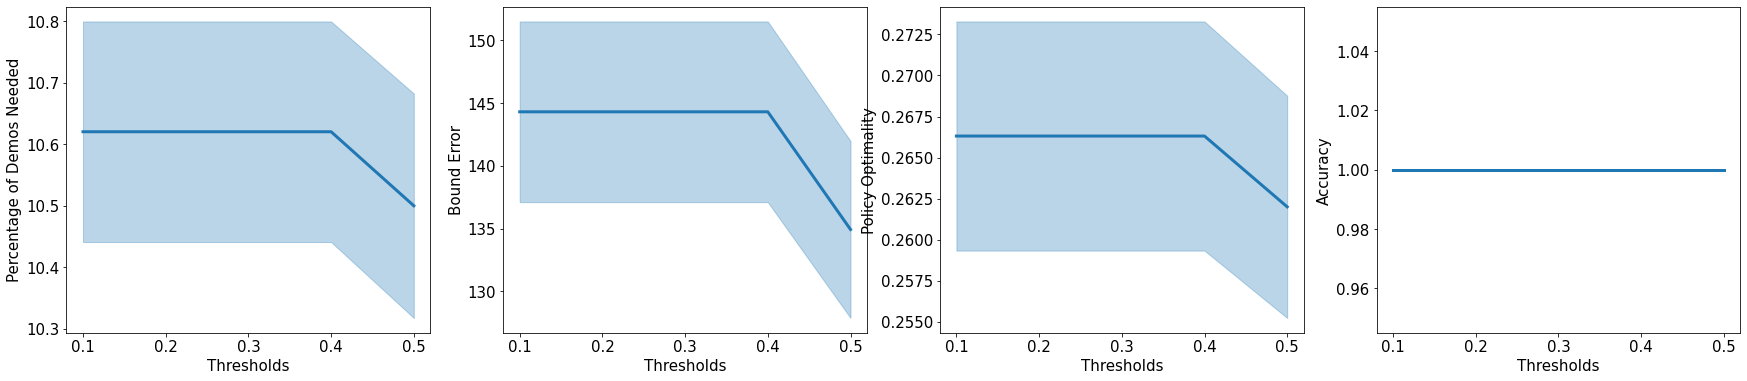

In [77]:
fig, axes = plt.subplots(1, 4, figsize = (30, 6))
color = "#1F77B4"
labels = thresholds[::-1]
x = labels[1:]

# y = np.array([mean(metrics["bounds"][t]) for t in x])
# axes[0, 0].plot(x, y, color = color)
# err = np.array([sem(metrics["bounds"][t]) for t in x])
# axes[0, 0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 0].set_title("α-VaR Bounds")

y = np.array([mean(metrics["num_demos"][t]) for t in x])
axes[0].plot(x, y, color = color)
err = np.array([sem(metrics["num_demos"][t]) for t in x])
axes[0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[0].set(xlabel = "Thresholds", ylabel = "Percentage of Demos Needed")
# axes[0].set_yticks([round(v, 2) for v in np.arange(0.60, 0.80, 0.05)])

# y = np.array([mean(metrics["true_evds"][t]) for t in x])
# axes[0, 2].plot(x, y, color = color)
# err = np.array([sem(metrics["true_evds"][t]) for t in x])
# axes[0, 2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 2].set_title("Ground Truth EVD")
# axes[0, 2].set_yticks([round(v, 3) for v in np.arange(0.000, 0.011, 0.002)])

y = np.array([mean(metrics["avg_bound_errors"][t]) for t in x])
axes[1].plot(x, y, color = color)
err = np.array([sem(metrics["avg_bound_errors"][t]) for t in x])
axes[1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[1].set(xlabel = "Thresholds", ylabel = "Bound Error")
# axes[1].set_yticks([round(v, 2) for v in np.arange(0.00, 0.035, 0.01)])

y = np.array([mean(metrics["policy_optimalities"][t]) for t in x])
axes[2].plot(x, y, color = color)
err = np.array([sem(metrics["policy_optimalities"][t]) for t in x])
axes[2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[2].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
# axes[2].set_ylim([0.67, 1.03])
axes[2].set(xlabel = "Thresholds", ylabel = "Policy Optimality")

# y = np.array([mean(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].plot(x, y, color = color)
# err = np.array([sem(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[1, 1].set_title("Policy Accuracy")
# axes[1, 1].set_yticks([round(v, 3) for v in np.arange(0.960, 0.981, 0.005)])

# axes[1, 2].plot(x, [metrics["confidence"][t] for t in x], color = color)
# axes[1, 2].set_title("Percentage of Worlds That Passed")

y = np.array([metrics["accuracies"][t] for t in x])
axes[3].plot(x, y, color = color)
err = np.array([np.std(y) / np.sqrt(len(y))] * len(y))
axes[3].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[3].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
# axes[3].set_ylim([0.67, 1.03])
axes[3].set(xlabel = "Thresholds", ylabel = "Accuracy")

plt.show()

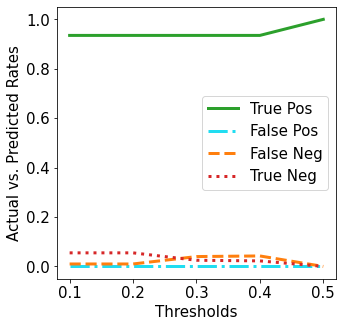

In [78]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
tp = [metrics["confusion_matrices"][t][0][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fp = [metrics["confusion_matrices"][t][0][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fn = [metrics["confusion_matrices"][t][1][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
tn = [metrics["confusion_matrices"][t][1][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
plt.plot(x, tp, label = "True Pos", color = "#2CA02C", linestyle = "-")
plt.plot(x, fp, label = "False Pos", color = "#21DDF1", linestyle = "-.")
plt.plot(x, fn, label = "False Neg", color = "#FF7F0E", linestyle = "--")
plt.plot(x, tn, label = "True Neg", color = "#D62728", linestyle = ":")
ax.set_yticks(np.arange(0.0, 1.1, 0.2))
plt.ylabel("Actual vs. Predicted Rates")
plt.xlabel("Thresholds")
plt.legend()
plt.show()

### Using WFCB Bound Thresholds

In [229]:
thresholds = np.arange(start = 2.0, stop = 0.9, step = -0.1)
metrics = {}
metrics["accuracies"] = {threshold: 0 for threshold in thresholds}
metrics["avg_bound_errors"] = {threshold: [] for threshold in thresholds}
metrics["wfcbs"] = {threshold: [] for threshold in thresholds}
metrics["true_evds"] = {threshold: [] for threshold in thresholds}
metrics["num_demos"] = {threshold: [] for threshold in thresholds}
metrics["pct_states"] = {threshold: [] for threshold in thresholds}
metrics["policy_accuracies"] = {threshold: [] for threshold in thresholds}
metrics["confidence"] = {threshold: 0 for threshold in thresholds}

with open("adaptive_outputs/wfcb_threshold_feature.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("NEW THRESHOLD"):
            curr_thresh = float(re.search("NEW THRESHOLD ([\d.-]+)", line).group(1))
        elif line.strip() == "Accuracy":
            curr_metric = "accuracies"
        elif line.strip() == "Confidence":
            curr_metric = "confidence"
        elif line.strip() == "Bound errors":
            curr_metric = "avg_bound_errors"
        elif line.strip() == "WFCBs":
            curr_metric = "wfcbs"
        elif line.strip() == "True EVDs":
            curr_metric = "true_evds"
        elif line.strip() == "Num demos":
            curr_metric = "num_demos"
        elif line.strip() == "Percent states":
            curr_metric = "pct_states"
        elif line.strip() == "Policy accuracies":
            curr_metric = "policy_accuracies"
        elif line.strip().startswith("***"):
            pass
        else:
            if curr_thresh >= 1.0:
                if curr_metric != "accuracies" and curr_metric != "confidence":
                    metrics[curr_metric][curr_thresh].append(float(line.strip()))
                else:
                    metrics[curr_metric][curr_thresh] = float(line.strip())

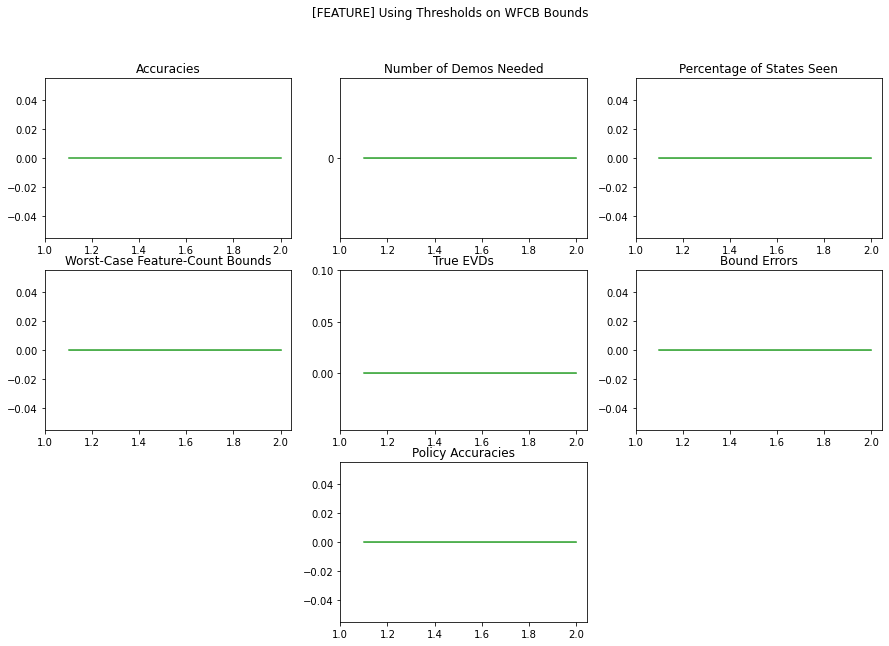

In [230]:
fig, axes = plt.subplots(3, 3, figsize = (15, 10))
color = "#2CA02C"
labels = thresholds[::-1]
x = labels[1:]

axes[0, 0].plot(x, [metrics["accuracies"][t] for t in x], color = color)
axes[0, 0].set_title("Accuracies")

y = np.array([mean(metrics["num_demos"][t]) for t in x])
axes[0, 1].plot(x, y, color = color)
err = np.array([sem(metrics["num_demos"][t]) for t in x])
axes[0, 1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[0, 1].set_title("Number of Demos Needed")
axes[0, 1].set_yticks(np.arange(0, math.ceil(y.max()) + 1, 2))

y = np.array([mean(metrics["pct_states"][t]) for t in x])
axes[0, 2].plot(x, y, color = color)
err = np.array([sem(metrics["pct_states"][t]) for t in x])
axes[0, 2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[0, 2].set_title("Percentage of States Seen")

y = np.array([mean(metrics["wfcbs"][t]) for t in x])
axes[1, 0].plot(x, y, color = color)
err = np.array([sem(metrics["wfcbs"][t]) for t in x])
axes[1, 0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[1, 0].set_title("Worst-Case Feature-Count Bounds")

y = np.array([mean(metrics["true_evds"][t]) for t in x])
axes[1, 1].plot(x, y, color = color)
err = np.array([sem(metrics["true_evds"][t]) for t in x])
axes[1, 1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[1, 1].set_title("True EVDs")
axes[1, 1].set_yticks([round(v, 2) for v in np.arange(0.00, 0.15, 0.05)])

y = np.array([mean(metrics["avg_bound_errors"][t]) for t in x])
axes[1, 2].plot(x, y, color = color)
err = np.array([sem(metrics["avg_bound_errors"][t]) for t in x])
axes[1, 2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[1, 2].set_title("Bound Errors")

y = np.array([mean(metrics["policy_accuracies"][t]) for t in x])
axes[2, 1].plot(x, y, color = color)
err = np.array([sem(metrics["policy_accuracies"][t]) for t in x])
axes[2, 1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[2, 1].set_title("Policy Accuracies")

fig.delaxes(axes[2][0])
fig.delaxes(axes[2][2])
for ax in axes.flat:
    ax.set_xticks(labels[::2])
plt.suptitle("[FEATURE] Using Thresholds on WFCB Bounds")

plt.show()

In [231]:
thresholds = np.arange(start = 2.0, stop = 0.9, step = -0.1)
metrics = {}
metrics["accuracies"] = {threshold: 0 for threshold in thresholds}
metrics["avg_bound_errors"] = {threshold: [] for threshold in thresholds}
metrics["wfcbs"] = {threshold: [] for threshold in thresholds}
metrics["true_evds"] = {threshold: [] for threshold in thresholds}
metrics["num_demos"] = {threshold: [] for threshold in thresholds}
metrics["pct_states"] = {threshold: [] for threshold in thresholds}
metrics["policy_accuracies"] = {threshold: [] for threshold in thresholds}
metrics["confidence"] = {threshold: 0 for threshold in thresholds}

with open("adaptive_outputs/wfcb_threshold_driving.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("NEW THRESHOLD"):
            curr_thresh = float(re.search("NEW THRESHOLD ([\d.-]+)", line).group(1))
        elif line.strip() == "Accuracy":
            curr_metric = "accuracies"
        elif line.strip() == "Confidence":
            curr_metric = "confidence"
        elif line.strip() == "Bound errors":
            curr_metric = "avg_bound_errors"
        elif line.strip() == "WFCBs":
            curr_metric = "wfcbs"
        elif line.strip() == "True EVDs":
            curr_metric = "true_evds"
        elif line.strip() == "Num demos":
            curr_metric = "num_demos"
        elif line.strip() == "Percent states":
            curr_metric = "pct_states"
        elif line.strip() == "Policy accuracies":
            curr_metric = "policy_accuracies"
        elif line.strip().startswith("***"):
            pass
        else:
            if curr_thresh >= 1.0:
                if curr_metric != "accuracies" and curr_metric != "confidence":
                    metrics[curr_metric][curr_thresh].append(float(line.strip()))
                else:
                    metrics[curr_metric][curr_thresh] = float(line.strip())

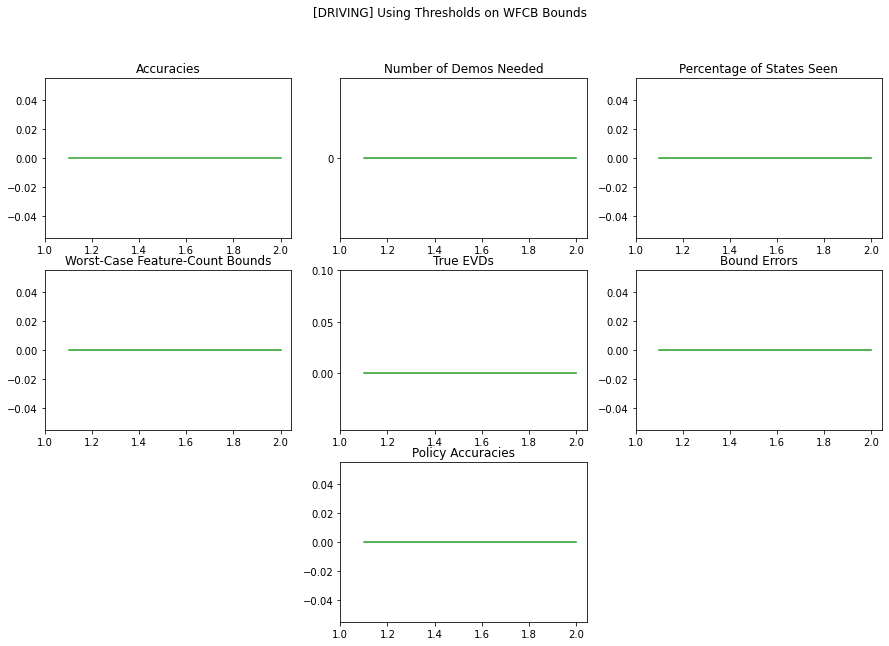

In [232]:
fig, axes = plt.subplots(3, 3, figsize = (15, 10))
color = "#2CA02C"
labels = thresholds[::-1]
x = labels[1:]

axes[0, 0].plot(x, [metrics["accuracies"][t] for t in x], color = color)
axes[0, 0].set_title("Accuracies")

y = np.array([mean(metrics["num_demos"][t]) for t in x])
axes[0, 1].plot(x, y, color = color)
err = np.array([sem(metrics["num_demos"][t]) for t in x])
axes[0, 1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[0, 1].set_title("Number of Demos Needed")
axes[0, 1].set_yticks(np.arange(0, math.ceil(y.max()) + 1, 2))

y = np.array([mean(metrics["pct_states"][t]) for t in x])
axes[0, 2].plot(x, y, color = color)
err = np.array([sem(metrics["pct_states"][t]) for t in x])
axes[0, 2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[0, 2].set_title("Percentage of States Seen")

y = np.array([mean(metrics["wfcbs"][t]) for t in x])
axes[1, 0].plot(x, y, color = color)
err = np.array([sem(metrics["wfcbs"][t]) for t in x])
axes[1, 0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[1, 0].set_title("Worst-Case Feature-Count Bounds")

y = np.array([mean(metrics["true_evds"][t]) for t in x])
axes[1, 1].plot(x, y, color = color)
err = np.array([sem(metrics["true_evds"][t]) for t in x])
axes[1, 1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[1, 1].set_title("True EVDs")
axes[1, 1].set_yticks([round(v, 2) for v in np.arange(0.00, 0.15, 0.05)])

y = np.array([mean(metrics["avg_bound_errors"][t]) for t in x])
axes[1, 2].plot(x, y, color = color)
err = np.array([sem(metrics["avg_bound_errors"][t]) for t in x])
axes[1, 2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[1, 2].set_title("Bound Errors")

y = np.array([mean(metrics["policy_accuracies"][t]) for t in x])
axes[2, 1].plot(x, y, color = color)
err = np.array([sem(metrics["policy_accuracies"][t]) for t in x])
axes[2, 1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[2, 1].set_title("Policy Accuracies")

fig.delaxes(axes[2][0])
fig.delaxes(axes[2][2])
for ax in axes.flat:
    ax.set_xticks(labels[::2])
plt.suptitle("[DRIVING] Using Thresholds on WFCB Bounds")

plt.show()

### Using MAP policy

In [792]:
# metrics = {}
# metrics["accuracies"] = 0
# metrics["confidence"] = 0
# metrics["avg_bound_errors"] = []
# metrics["bounds"] = []
# metrics["true_evds"] = []
# metrics["num_demos"] = []
# metrics["pct_states"] = []
# metrics["policy_accuracies"] = []
# metrics["policy_optimalities"] = []

# with open("paper_outputs/map_pi_feature_pairs.txt") as file:
#     lines = file.readlines()
#     for line in lines:
#         if line.strip() == "Accuracy":
#             curr_metric = "accuracies"
#         elif line.strip() == "Confidence":
#             curr_metric = "confidence"
#         elif line.strip() == "Bound errors":
#             curr_metric = "avg_bound_errors"
#         elif line.strip() == "Changes":
#             curr_metric = "bounds"
#         elif line.strip() == "True EVDs":
#             curr_metric = "true_evds"
#         elif line.strip() == "Num demos":
#             curr_metric = "num_demos"
#         elif line.strip() == "Percent states":
#             curr_metric = "pct_states"
#         elif line.strip() == "Policy accuracies":
#             curr_metric = "policy_accuracies"
#         elif line.strip() == "Policy optimalities":
#             curr_metric = "policy_optimalities"
#         elif line.strip() == "Confusion matrix":
#             curr_metric = "confusion_matrix"
#         elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[")):
#             if curr_metric != "accuracies" and curr_metric != "confidence" and curr_metric != "confusion_matrix":
#                 metrics[curr_metric].append(float(line.strip()))
#             elif curr_metric == "confusion_matrix":
#                 metrics[curr_metric] = eval(line.strip())
#             elif curr_metric == "accuracies" or curr_metric == "confidence":
#                 metrics[curr_metric] = float(line.strip())

In [793]:
# summary = {"Metric": [], "Mean": [], "SEM": []}
# for k, v in metrics.items():
#     summary["Metric"].append(k)
#     summary["Mean"].append(round(mean(v), 3))
#     summary["SEM"].append(round(sem(v), 3))
# df = pd.DataFrame(summary)
# df.set_index("Metric", inplace = True)
# print("[FEATURE] Stopping When MAP Policy Doesn't Change")
# df

In [794]:
# counts = metrics["confusion_matrix"]
# flat_counts = np.array(counts).flatten()
# percentages = ["{0:.2%}".format(count) for count in flat_counts / np.sum(flat_counts)]
# labels = ["{}\n{}\n{}".format(v1, v2, v3) for v1, v2, v3 in zip(names, flat_counts, percentages)]
# labels = np.array(labels).reshape(2, 2)
# sns.heatmap(counts, annot=labels, fmt = '', cmap = sns.color_palette("Greens"), xticklabels = False, yticklabels = False)


In [886]:
thresholds = [1, 2, 3, 4, 5]
metrics = {}
metrics["accuracies"] = {threshold: 0 for threshold in thresholds}
metrics["pct_states"] = {threshold: [] for threshold in thresholds}
metrics["policy_accuracies"] = {threshold: [] for threshold in thresholds}
metrics["policy_optimalities"] = {threshold: [] for threshold in thresholds}
metrics["confidence"] = {threshold: 0 for threshold in thresholds}

with open("paper_outputs/patience_driving_1.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("NEW THRESHOLD"):
            curr_thresh = float(re.search("NEW THRESHOLD ([\d.-]+)", line).group(1))
        elif line.strip() == "Percent states":
            curr_metric = "pct_states"
        elif line.strip() == "Policy optimalities":
            curr_metric = "policy_optimalities"
        elif line.strip() == "Policy accuracies":
            curr_metric = "policy_accuracies"
        elif line.strip() == "Confidence":
            curr_metric = "confidence"
        elif line.strip() == "Accuracy":
            curr_metric = "accuracies"
        elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[")):
            if curr_metric != "confidence" and curr_metric != "accuracies" and curr_metric != "":
                metrics[curr_metric][curr_thresh].append(np.abs(float(line.strip())))
            elif curr_metric == "confidence" or curr_metric == "accuracies":
                metrics[curr_metric][curr_thresh] = float(line.strip())
        else:
            curr_metric = ""

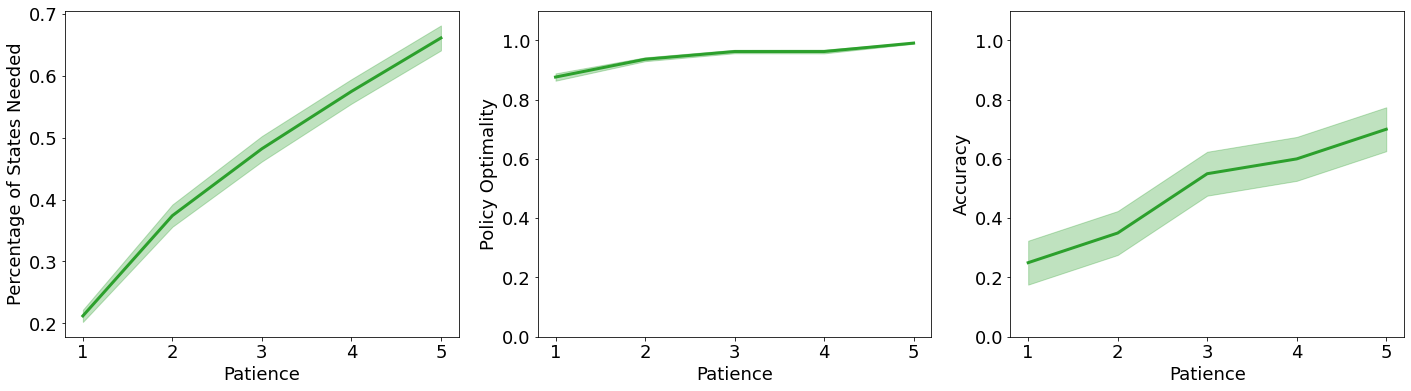

In [891]:
fig, axes = plt.subplots(1, 3, figsize = (24, 6))
color = "#2CA02C"
labels = thresholds[::]
x = labels[:]

y = np.array([mean(metrics["pct_states"][t]) for t in x])
axes[0].plot(x, y, color = color)
err = np.array([sem(metrics["pct_states"][t]) for t in x])
axes[0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[0].set(xlabel = "Patience", ylabel = "Percentage of States Needed")
# axes[0].set_yticks([round(v, 2) for v in np.arange(0.60, 0.80, 0.05)])

y = np.array([mean(metrics["policy_optimalities"][t]) for t in x])
axes[1].plot(x, y, color = color)
err = np.array([sem(metrics["policy_optimalities"][t]) for t in x])
axes[1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[1].set_yticks([round(v, 1) for v in np.arange(0.0, 1.1, 0.2)])
axes[1].set_ylim([0, 1.1])
axes[1].set(xlabel = "Patience", ylabel = "Policy Optimality")

y = np.array([metrics["accuracies"][t] for t in x])
axes[2].plot(x, y, color = color)
err = np.array([np.std(y) / np.sqrt(len(y))] * len(y))
axes[2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[2].set_yticks([round(v, 1) for v in np.arange(0.0, 1.1, 0.2)])
axes[2].set_ylim([0, 1.1])
axes[2].set(xlabel = "Patience", ylabel = "Accuracy")

for ax in axes.flat:
    ax.set_xticks(labels)

plt.show()

In [892]:
# counts = metrics["confusion_matrix"]
# flat_counts = np.array(counts).flatten()
# percentages = ["{0:.2%}".format(count) for count in flat_counts / np.sum(flat_counts)]
# labels = ["{}\n{}\n{}".format(v1, v2, v3) for v1, v2, v3 in zip(names, flat_counts, percentages)]
# labels = np.array(labels).reshape(2, 2)
# sns.heatmap(counts, annot=labels, fmt = '', cmap = sns.color_palette("Greens"), xticklabels = False, yticklabels = False)


In [893]:
thresholds = [1, 2, 3, 4, 5]
metrics = {}
metrics["accuracies"] = {threshold: 0 for threshold in thresholds}
metrics["pct_states"] = {threshold: [] for threshold in thresholds}
metrics["policy_accuracies"] = {threshold: [] for threshold in thresholds}
metrics["policy_optimalities"] = {threshold: [] for threshold in thresholds}
metrics["confidence"] = {threshold: 0 for threshold in thresholds}

with open("paper_outputs/patience_goal_1.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("NEW THRESHOLD"):
            curr_thresh = float(re.search("NEW THRESHOLD ([\d.-]+)", line).group(1))
        elif line.strip() == "Percent states":
            curr_metric = "pct_states"
        elif line.strip() == "Policy optimalities":
            curr_metric = "policy_optimalities"
        elif line.strip() == "Policy accuracies":
            curr_metric = "policy_accuracies"
        elif line.strip() == "Confidence":
            curr_metric = "confidence"
        elif line.strip() == "Accuracy":
            curr_metric = "accuracies"
        elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[")):
            if curr_metric != "confidence" and curr_metric != "accuracies" and curr_metric != "":
                metrics[curr_metric][curr_thresh].append(np.abs(float(line.strip())))
            elif curr_metric == "confidence" or curr_metric == "accuracies":
                metrics[curr_metric][curr_thresh] = float(line.strip())
        else:
            curr_metric = ""

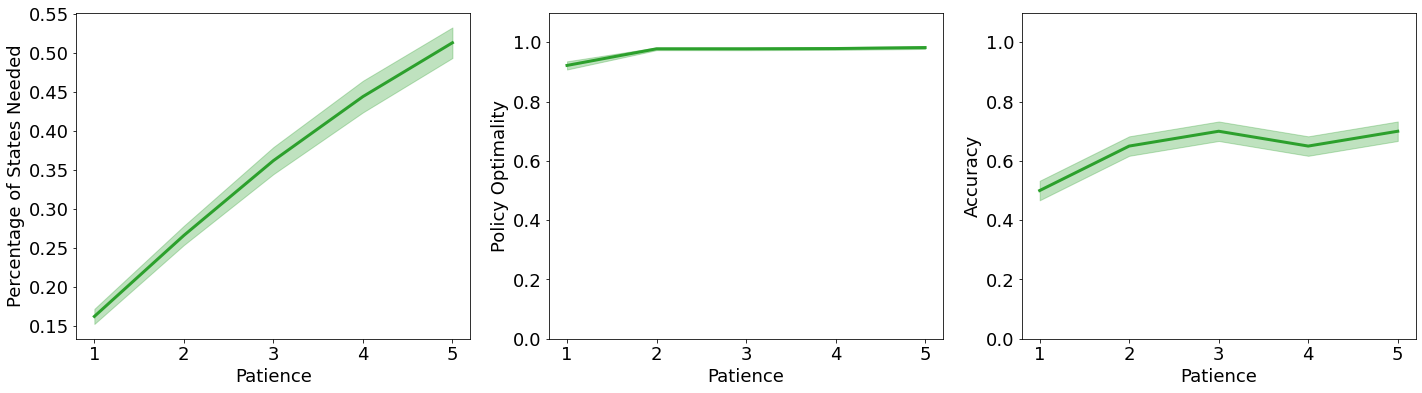

In [894]:
fig, axes = plt.subplots(1, 3, figsize = (24, 6))
color = "#2CA02C"
labels = thresholds[::]
x = labels[:]

y = np.array([mean(metrics["pct_states"][t]) for t in x])
axes[0].plot(x, y, color = color)
err = np.array([sem(metrics["pct_states"][t]) for t in x])
axes[0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[0].set(xlabel = "Patience", ylabel = "Percentage of States Needed")
# axes[0].set_yticks([round(v, 2) for v in np.arange(0.60, 0.80, 0.05)])

y = np.array([mean(metrics["policy_optimalities"][t]) for t in x])
axes[1].plot(x, y, color = color)
err = np.array([sem(metrics["policy_optimalities"][t]) for t in x])
axes[1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[1].set_yticks([round(v, 1) for v in np.arange(0.0, 1.1, 0.2)])
axes[1].set_ylim([0, 1.1])
axes[1].set(xlabel = "Patience", ylabel = "Policy Optimality")

y = np.array([metrics["accuracies"][t] for t in x])
axes[2].plot(x, y, color = color)
err = np.array([np.std(y) / np.sqrt(len(y))] * len(y))
axes[2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[2].set_yticks([round(v, 1) for v in np.arange(0.0, 1.1, 0.2)])
axes[2].set_ylim([0, 1.1])
axes[2].set(xlabel = "Patience", ylabel = "Accuracy")

for ax in axes.flat:
    ax.set_xticks(labels)

plt.show()

In [856]:
# counts = metrics["confusion_matrix"]
# flat_counts = np.array(counts).flatten()
# percentages = ["{0:.2%}".format(count) for count in flat_counts / np.sum(flat_counts)]
# labels = ["{}\n{}\n{}".format(v1, v2, v3) for v1, v2, v3 in zip(names, flat_counts, percentages)]
# labels = np.array(labels).reshape(2, 2)
# sns.heatmap(counts, annot=labels, fmt = '', cmap = sns.color_palette("Greens"), xticklabels = False, yticklabels = False)


In [80]:
thresholds = [1, 2, 3, 4, 5]
metrics = {}
metrics["accuracies"] = {threshold: 0 for threshold in thresholds}
metrics["num_demos"] = {threshold: [] for threshold in thresholds}
metrics["policy_optimalities"] = {threshold: [] for threshold in thresholds}

with open("paper_outputs/map_pi_lava_3.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("NEW THRESHOLD"):
            curr_thresh = float(re.search("NEW THRESHOLD ([\d.-]+)", line).group(1))
        elif line.strip() == "Policy optimalities":
            curr_metric = "policy_optimalities"
        elif line.strip() == "Num demos":
            curr_metric = "num_demos"
        elif line.strip() == "Accuracy":
            curr_metric = "accuracies"
        elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[")):
            if curr_metric != "confidence" and curr_metric != "accuracies" and curr_metric != "":
                metrics[curr_metric][curr_thresh].append(np.abs(float(line.strip())))
            elif curr_metric == "confidence" or curr_metric == "accuracies":
                metrics[curr_metric][curr_thresh] = float(line.strip())
        else:
            curr_metric = ""

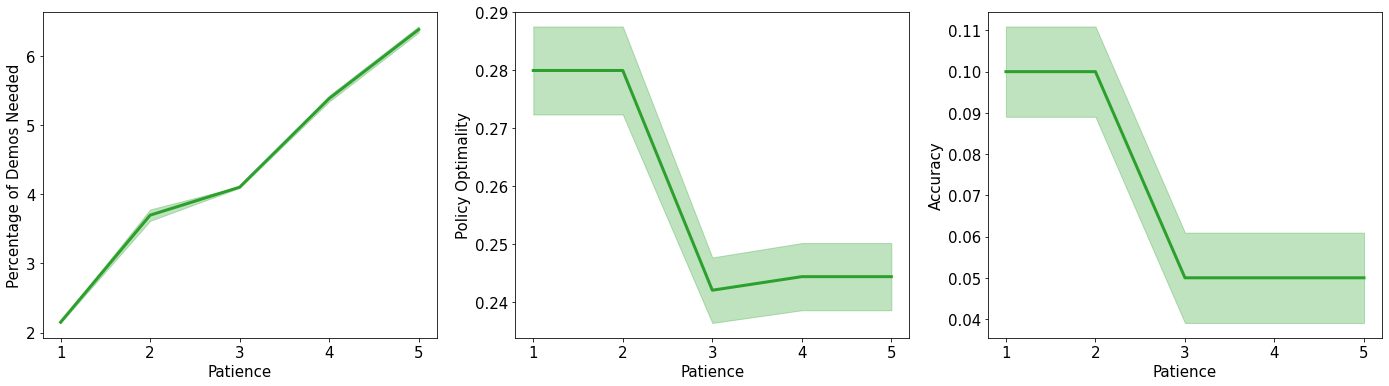

In [81]:
fig, axes = plt.subplots(1, 3, figsize = (24, 6))
color = "#2CA02C"
labels = thresholds[::]
x = labels[:]

y = np.array([mean(metrics["num_demos"][t]) for t in x])
axes[0].plot(x, y, color = color)
err = np.array([sem(metrics["num_demos"][t]) for t in x])
axes[0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[0].set(xlabel = "Patience", ylabel = "Percentage of Demos Needed")
# axes[0].set_yticks([round(v, 2) for v in np.arange(0.60, 0.80, 0.05)])

y = np.array([mean(metrics["policy_optimalities"][t]) for t in x])
axes[1].plot(x, y, color = color)
err = np.array([sem(metrics["policy_optimalities"][t]) for t in x])
axes[1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[1].set_yticks([round(v, 1) for v in np.arange(0.0, 1.1, 0.2)])
# axes[1].set_ylim([0, 1.1])
axes[1].set(xlabel = "Patience", ylabel = "Policy Optimality")

y = np.array([metrics["accuracies"][t] for t in x])
axes[2].plot(x, y, color = color)
err = np.array([np.std(y) / np.sqrt(len(y))] * len(y))
axes[2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[2].set_yticks([round(v, 1) for v in np.arange(0.0, 1.1, 0.2)])
# axes[2].set_ylim([0, 1.1])
axes[2].set(xlabel = "Patience", ylabel = "Accuracy")

for ax in axes.flat:
    ax.set_xticks(labels)

plt.show()

### Using Baseline policy

In [795]:
# thresholds = [round(t, 1) for t in np.arange(start = 0.0, stop = 1.1, step = 0.1)]
# metrics = {}
# metrics["pct_improvements"] = {threshold: [] for threshold in thresholds}
# metrics["pct_states"] = {threshold: [] for threshold in thresholds}
# metrics["true_evds"] = {threshold: [] for threshold in thresholds}
# metrics["bound_errors"] = {threshold: [] for threshold in thresholds}
# metrics["policy_optimalities"] = {threshold: [] for threshold in thresholds}
# metrics["policy_accuracies"] = {threshold: [] for threshold in thresholds}
# metrics["confidence"] = {threshold: 0 for threshold in thresholds}
# metrics["accuracies"] = {threshold: 0 for threshold in thresholds}
# metrics["confusion_matrices"] = {threshold: [[]] for threshold in thresholds}
# baseline_evds = []
# baseline_optimalities = []
# baseline_accuracies = []

# with open("paper_outputs/baseline_pi_feature_pairs.txt") as file:
#     lines = file.readlines()
#     for line in lines:
#         if line.startswith("BASELINE POLICY"):
#             matches = re.search("evd ([\d.-]+), policy optimality ([\d.-]+), and policy accuracy ([\d.-]+)", line)
#             baseline_evds.append(float(matches.group(1)))
#             baseline_optimalities.append(float(matches.group(2)))
#             baseline_accuracies.append(float(matches.group(3)))
#         elif line.startswith("NEW THRESHOLD"):
#             curr_thresh = float(re.search("NEW THRESHOLD ([\d.-]+)", line).group(1))
#         elif line.strip() == "Percent Improvements":
#             curr_metric = "pct_improvements"
#         elif line.strip() == "Confidence":
#             curr_metric = "confidence"
#         elif line.strip() == "True EVDs":
#             curr_metric = "true_evds"
#         elif line.strip() == "Bound errors":
#             curr_metric = "bound_errors"
#         elif line.strip() == "Accuracy":
#             curr_metric = "accuracies"
#         elif line.strip() == "Percent states":
#             curr_metric = "pct_states"
#         elif line.strip() == "Num demos":
#             curr_metric = ""
#         elif line.strip() == "Policy optimalities":
#             curr_metric = "policy_optimalities"
#         elif line.strip() == "Policy accuracies":
#             curr_metric = "policy_accuracies"
#         elif line.strip() == "Confusion matrices":
#             curr_metric = "confusion_matrices"
#         elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[")) and curr_metric != "":
#             if curr_metric == "confidence":
#                 metrics[curr_metric][curr_thresh] = float(line.strip())
#             elif curr_metric == "accuracies":
#                 metrics[curr_metric][curr_thresh] = float(line.strip())
#             elif curr_metric == "confusion_matrices":
#                 metrics[curr_metric][curr_thresh] = eval(line.strip())
#             else:
#                 metrics[curr_metric][curr_thresh].append(float(line.strip()))
#         else:
#             curr_metric == ""


# metrics["accuracies"][0.0] = 0.9257420184
# metrics["accuracies"][0.1] = 0.917492731391
# metrics["accuracies"][0.2] = 0.909090909091
# metrics["accuracies"][0.3] = 0.869879518072
# metrics["accuracies"][0.4] = 0.857142857143
# metrics["accuracies"][0.5] = 0.851485148515
# metrics["accuracies"][0.6] = 0.845493562232
# metrics["accuracies"][0.7] = 0.833333333333
# metrics["accuracies"][0.8] = 0.826086956522
# metrics["accuracies"][0.9] = 0.780952380952
# metrics["accuracies"][1.0] = 0.71875

In [797]:
# fig, axes = plt.subplots(1, 4, figsize = (25, 5))
# color = "#9467BD"
# labels = thresholds[::]
# x = labels[:]

# # y = np.array([mean(metrics["bounds"][t]) for t in x])
# # axes[0, 0].plot(x, y, color = color)
# # err = np.array([sem(metrics["bounds"][t]) for t in x])
# # axes[0, 0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# # axes[0, 0].set_title("α-VaR Bounds")

# y = np.array([mean(metrics["pct_states"][t]) for t in x])
# axes[0].plot(x, y, color = color)
# err = np.array([sem(metrics["pct_states"][t]) for t in x])
# axes[0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0].set_title("Percentage of States Needed")
# axes[0].set(xlabel = "Thresholds")

# # y = np.array([mean(metrics["true_evds"][t]) for t in x])
# # axes[0, 2].plot(x, y, color = color)
# # err = np.array([sem(metrics["true_evds"][t]) for t in x])
# # axes[0, 2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# # axes[0, 2].set_title("Ground Truth EVD")
# # axes[0, 2].set_yticks([round(v, 3) for v in np.arange(0.000, 0.011, 0.002)])

# y = np.array([mean(metrics["bound_errors"][t]) for t in x])
# axes[1].plot(x, y, color = color)
# err = np.array([sem(metrics["bound_errors"][t]) for t in x])
# axes[1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[1].set_title("Bound Error")
# axes[1].set(xlabel = "Thresholds")

# y = np.array([mean(metrics["policy_optimalities"][t]) for t in x])
# axes[2].plot(x, y, color = color)
# err = np.array([sem(metrics["policy_optimalities"][t] for t in x)])
# axes[2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[2].set_title("Policy Optimality")
# # axes[2].set_yticks([round(v, 3) for v in np.arange(0.974, 0.978, 0.001)])
# axes[2].set(xlabel = "Thresholds")

# # y = np.array([mean(metrics["policy_accuracies"][t]) for t in x])
# # axes[1, 1].plot(x, y, color = color)
# # err = np.array([sem(metrics["policy_accuracies"][t]) for t in x])
# # axes[1, 1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# # axes[1, 1].set_title("Policy Accuracy")
# # axes[1, 1].set_yticks([round(v, 3) for v in np.arange(0.960, 0.981, 0.005)])

# # axes[1, 2].plot(x, [metrics["confidence"][t] for t in x], color = color)
# # axes[1, 2].set_title("Percentage of Worlds That Passed")

# axes[3].plot(x, [metrics["accuracies"][t] for t in x], color = color)
# axes[3].set_title("Accuracy")
# axes[3].set_yticks([round(v, 2) for v in np.arange(0.70, 0.96, 0.05)])
# axes[3].set(xlabel = "Thresholds")

# plt.show()

In [798]:
# fig, ax = plt.subplots(1, 1, figsize = (5, 5))
# tp = [metrics["confusion_matrices"][t][0][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
# fn = [metrics["confusion_matrices"][t][1][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
# tn = [metrics["confusion_matrices"][t][1][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
# plt.plot(x, tp, label = "True Pos Rate", color = "#2CA02C", linestyle = "-")
# plt.plot(x, fn, label = "False Neg Rate", color = "#FF7F0E", linestyle = "--")
# plt.plot(x, tn, label = "True Neg Rate", color = "#D62728", linestyle = ":")
# ax.set_yticks(np.arange(0.0, 1.1, 0.2))
# plt.title("Actual vs. Predicted Passes")
# plt.legend()
# plt.show()

In [895]:
thresholds = [round(t, 1) for t in np.arange(start = 0.0, stop = 1.1, step = 0.1)]
metrics = {}
metrics["pct_improvements"] = {threshold: [] for threshold in thresholds}
metrics["pct_states"] = {threshold: [] for threshold in thresholds}
metrics["true_evds"] = {threshold: [] for threshold in thresholds}
metrics["bound_errors"] = {threshold: [] for threshold in thresholds}
metrics["policy_optimalities"] = {threshold: [] for threshold in thresholds}
metrics["policy_accuracies"] = {threshold: [] for threshold in thresholds}
metrics["confidence"] = {threshold: 0 for threshold in thresholds}
metrics["accuracies"] = {threshold: 0 for threshold in thresholds}
metrics["confusion_matrices"] = {threshold: [[]] for threshold in thresholds}
baseline_evds = []
baseline_optimalities = []
baseline_accuracies = []

with open("paper_outputs/baseline_pi_driving_pairs.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("BASELINE POLICY"):
            matches = re.search("evd ([\d.-]+), policy optimality ([\d.-]+), and policy accuracy ([\d.-]+)", line)
            baseline_evds.append(float(matches.group(1)))
            baseline_optimalities.append(float(matches.group(2)))
            baseline_accuracies.append(float(matches.group(3)))
        elif line.startswith("NEW THRESHOLD"):
            curr_thresh = float(re.search("NEW THRESHOLD ([\d.-]+)", line).group(1))
        elif line.strip() == "Percent Improvements":
            curr_metric = "pct_improvements"
        elif line.strip() == "Confidence":
            curr_metric = "confidence"
        elif line.strip() == "True EVDs":
            curr_metric = "true_evds"
        elif line.strip() == "Bound errors":
            curr_metric = "bound_errors"
        elif line.strip() == "Accuracy":
            curr_metric = "accuracies"
        elif line.strip() == "Percent states":
            curr_metric = "pct_states"
        elif line.strip() == "Num demos":
            curr_metric = ""
        elif line.strip() == "Policy optimalities":
            curr_metric = "policy_optimalities"
        elif line.strip() == "Policy accuracies":
            curr_metric = "policy_accuracies"
        elif line.strip() == "Confusion matrices":
            curr_metric = "confusion_matrices"
        elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[")) and curr_metric != "":
            if curr_metric == "confidence" or curr_metric == "accuracies":
                metrics[curr_metric][curr_thresh] = float(line.strip())
            elif curr_metric == "confusion_matrices":
                metrics[curr_metric][curr_thresh] = eval(line.strip())
            else:
                metrics[curr_metric][curr_thresh].append(float(line.strip()))
        else:
            curr_metric == ""

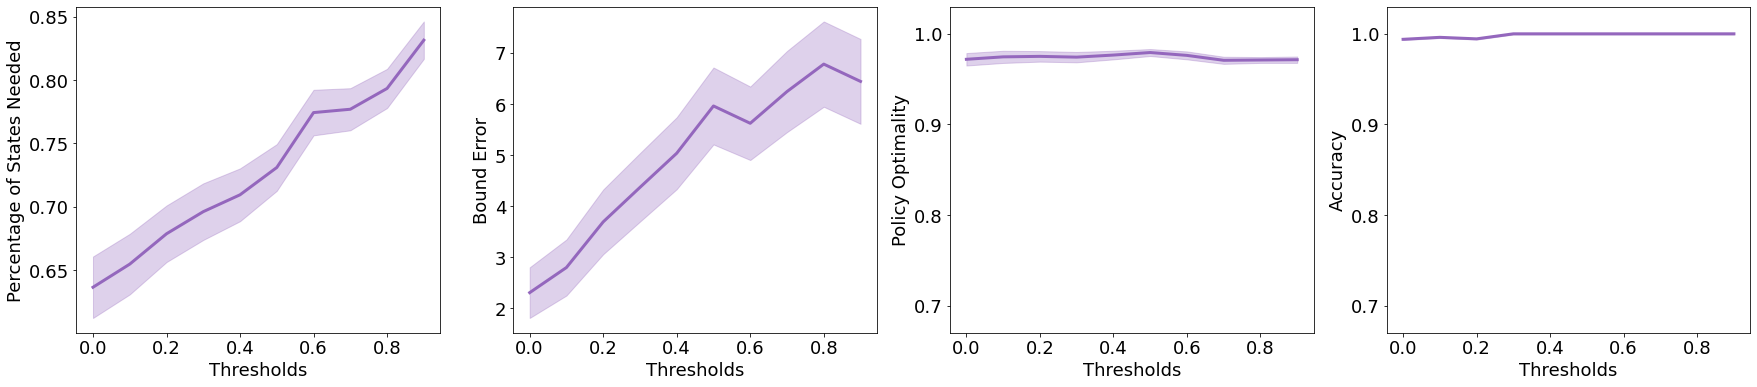

In [896]:
fig, axes = plt.subplots(1, 4, figsize = (30, 6))
color = "#9467BD"
labels = thresholds[::-1]
x = labels[1:]

# y = np.array([mean(metrics["bounds"][t]) for t in x])
# axes[0, 0].plot(x, y, color = color)
# err = np.array([sem(metrics["bounds"][t]) for t in x])
# axes[0, 0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 0].set_title("α-VaR Bounds")

y = np.array([mean(metrics["pct_states"][t]) for t in x])
axes[0].plot(x, y, color = color)
err = np.array([sem(metrics["pct_states"][t]) for t in x])
axes[0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[0].set(xlabel = "Thresholds", ylabel = "Percentage of States Needed")
# axes[0].set_yticks([round(v, 2) for v in np.arange(0.60, 0.80, 0.05)])

# y = np.array([mean(metrics["true_evds"][t]) for t in x])
# axes[0, 2].plot(x, y, color = color)
# err = np.array([sem(metrics["true_evds"][t]) for t in x])
# axes[0, 2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 2].set_title("Ground Truth EVD")
# axes[0, 2].set_yticks([round(v, 3) for v in np.arange(0.000, 0.011, 0.002)])

y = np.array([mean(metrics["bound_errors"][t]) for t in x])
axes[1].plot(x, y, color = color)
err = np.array([sem(metrics["bound_errors"][t]) for t in x])
axes[1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[1].set(xlabel = "Thresholds", ylabel = "Bound Error")
# axes[1].set_yticks([round(v, 2) for v in np.arange(0.00, 0.035, 0.01)])

y = np.array([mean(metrics["policy_optimalities"][t]) for t in x])
axes[2].plot(x, y, color = color)
err = np.array([sem(metrics["policy_optimalities"][t]) for t in x])
axes[2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[2].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
axes[2].set_ylim([0.67, 1.03])
axes[2].set(xlabel = "Thresholds", ylabel = "Policy Optimality")

# y = np.array([mean(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].plot(x, y, color = color)
# err = np.array([sem(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[1, 1].set_title("Policy Accuracy")
# axes[1, 1].set_yticks([round(v, 3) for v in np.arange(0.960, 0.981, 0.005)])

# axes[1, 2].plot(x, [metrics["confidence"][t] for t in x], color = color)
# axes[1, 2].set_title("Percentage of Worlds That Passed")

y = np.array([metrics["accuracies"][t] for t in x])
axes[3].plot(x, y, color = color)
err = np.array([np.std(y) / np.sqrt(len(y))] * len(y))
axes[3].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[3].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
axes[3].set_ylim([0.67, 1.03])
axes[3].set(xlabel = "Thresholds", ylabel = "Accuracy")

plt.show()

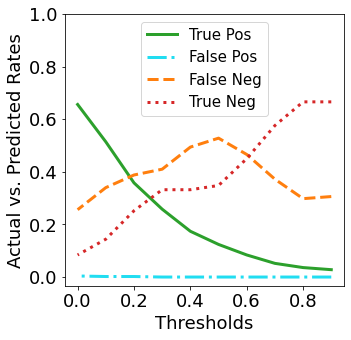

In [859]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
tp = [metrics["confusion_matrices"][t][0][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fp = [metrics["confusion_matrices"][t][0][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fn = [metrics["confusion_matrices"][t][1][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
tn = [metrics["confusion_matrices"][t][1][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
plt.plot(x, tp, label = "True Pos", color = "#2CA02C", linestyle = "-")
plt.plot(x, fp, label = "False Pos", color = "#21DDF1", linestyle = "-.")
plt.plot(x, fn, label = "False Neg", color = "#FF7F0E", linestyle = "--")
plt.plot(x, tn, label = "True Neg", color = "#D62728", linestyle = ":")
ax.set_yticks(np.arange(0.0, 1.1, 0.2))
plt.ylabel("Actual vs. Predicted Rates")
plt.xlabel("Thresholds")
plt.legend()
plt.show()

In [897]:
thresholds = [round(t, 1) for t in np.arange(start = 0.0, stop = 1.1, step = 0.1)]
metrics = {}
metrics["pct_improvements"] = {threshold: [] for threshold in thresholds}
metrics["pct_states"] = {threshold: [] for threshold in thresholds}
metrics["true_evds"] = {threshold: [] for threshold in thresholds}
metrics["bound_errors"] = {threshold: [] for threshold in thresholds}
metrics["policy_optimalities"] = {threshold: [] for threshold in thresholds}
metrics["policy_accuracies"] = {threshold: [] for threshold in thresholds}
metrics["confidence"] = {threshold: 0 for threshold in thresholds}
metrics["accuracies"] = {threshold: 0 for threshold in thresholds}
metrics["confusion_matrices"] = {threshold: [[]] for threshold in thresholds}
baseline_evds = []
baseline_optimalities = []
baseline_accuracies = []

with open("paper_outputs/baseline_pi_goal_pairs.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("BASELINE POLICY"):
            matches = re.search("evd ([\d.-]+), policy optimality ([\d.-]+), and policy accuracy ([\d.-]+)", line)
            baseline_evds.append(float(matches.group(1)))
            baseline_optimalities.append(float(matches.group(2)))
            baseline_accuracies.append(float(matches.group(3)))
        elif line.startswith("NEW THRESHOLD"):
            curr_thresh = float(re.search("NEW THRESHOLD ([\d.-]+)", line).group(1))
        elif line.strip() == "Percent Improvements":
            curr_metric = "pct_improvements"
        elif line.strip() == "Confidence":
            curr_metric = "confidence"
        elif line.strip() == "True EVDs":
            curr_metric = "true_evds"
        elif line.strip() == "Bound errors":
            curr_metric = "bound_errors"
        elif line.strip() == "Accuracy":
            curr_metric = "accuracies"
        elif line.strip() == "Percent states":
            curr_metric = "pct_states"
        elif line.strip() == "Num demos":
            curr_metric = ""
        elif line.strip() == "Policy optimalities":
            curr_metric = "policy_optimalities"
        elif line.strip() == "Policy accuracies":
            curr_metric = "policy_accuracies"
        elif line.strip() == "Confusion matrices":
            curr_metric = "confusion_matrices"
        elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[")) and curr_metric != "":
            if curr_metric == "confidence" or curr_metric == "accuracies":
                metrics[curr_metric][curr_thresh] = float(line.strip())
            elif curr_metric == "confusion_matrices":
                metrics[curr_metric][curr_thresh] = eval(line.strip())
            else:
                metrics[curr_metric][curr_thresh].append(float(line.strip()))
        else:
            curr_metric == ""

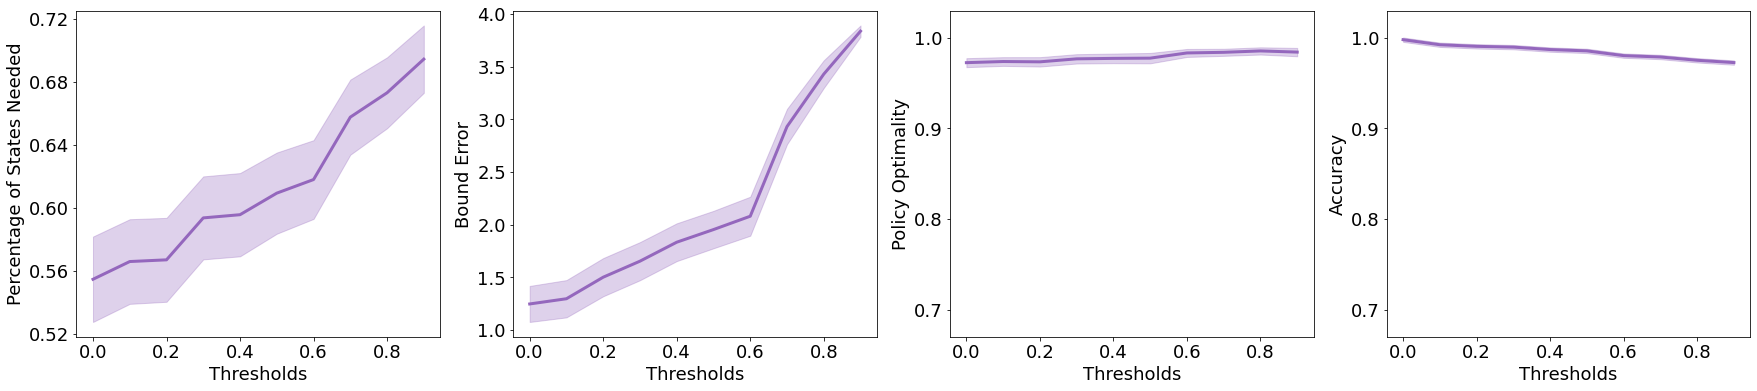

In [898]:
fig, axes = plt.subplots(1, 4, figsize = (30, 6))
color = "#9467BD"
labels = thresholds[::-1]
x = labels[1:]

# y = np.array([mean(metrics["bounds"][t]) for t in x])
# axes[0, 0].plot(x, y, color = color)
# err = np.array([sem(metrics["bounds"][t]) for t in x])
# axes[0, 0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 0].set_title("α-VaR Bounds")

y = np.array([mean(metrics["pct_states"][t]) for t in x])
axes[0].plot(x, y, color = color)
err = np.array([sem(metrics["pct_states"][t]) for t in x])
axes[0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[0].set(xlabel = "Thresholds", ylabel = "Percentage of States Needed")
axes[0].set_yticks([round(v, 2) for v in np.arange(0.52, 0.721, 0.04)])

# y = np.array([mean(metrics["true_evds"][t]) for t in x])
# axes[0, 2].plot(x, y, color = color)
# err = np.array([sem(metrics["true_evds"][t]) for t in x])
# axes[0, 2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 2].set_title("Ground Truth EVD")
# axes[0, 2].set_yticks([round(v, 3) for v in np.arange(0.000, 0.011, 0.002)])

y = np.array([mean(metrics["bound_errors"][t]) for t in x])
axes[1].plot(x, y, color = color)
err = np.array([sem(metrics["bound_errors"][t]) for t in x])
axes[1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[1].set(xlabel = "Thresholds", ylabel = "Bound Error")
# axes[1].set_yticks([round(v, 2) for v in np.arange(0.00, 0.035, 0.01)])

y = np.array([mean(metrics["policy_optimalities"][t]) for t in x])
axes[2].plot(x, y, color = color)
err = np.array([sem(metrics["policy_optimalities"][t]) for t in x])
axes[2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[2].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
axes[2].set_ylim([0.67, 1.03])
axes[2].set(xlabel = "Thresholds", ylabel = "Policy Optimality")

# y = np.array([mean(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].plot(x, y, color = color)
# err = np.array([sem(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[1, 1].set_title("Policy Accuracy")
# axes[1, 1].set_yticks([round(v, 3) for v in np.arange(0.960, 0.981, 0.005)])

# axes[1, 2].plot(x, [metrics["confidence"][t] for t in x], color = color)
# axes[1, 2].set_title("Percentage of Worlds That Passed")

y = np.array([metrics["accuracies"][t] for t in x])
axes[3].plot(x, y, color = color)
err = np.array([np.std(y) / np.sqrt(len(y))] * len(y))
axes[3].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[3].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
axes[3].set_ylim([0.67, 1.03])
axes[3].set(xlabel = "Thresholds", ylabel = "Accuracy")

plt.show()

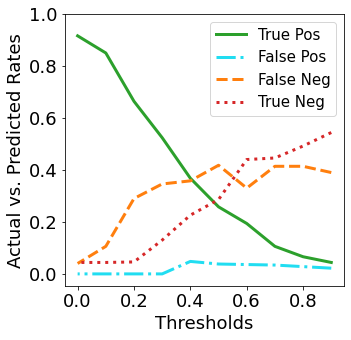

In [899]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
tp = [metrics["confusion_matrices"][t][0][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fp = [metrics["confusion_matrices"][t][0][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fn = [metrics["confusion_matrices"][t][1][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
tn = [metrics["confusion_matrices"][t][1][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
plt.plot(x, tp, label = "True Pos", color = "#2CA02C", linestyle = "-")
plt.plot(x, fp, label = "False Pos", color = "#21DDF1", linestyle = "-.")
plt.plot(x, fn, label = "False Neg", color = "#FF7F0E", linestyle = "--")
plt.plot(x, tn, label = "True Neg", color = "#D62728", linestyle = ":")
ax.set_yticks(np.arange(0.0, 1.1, 0.2))
plt.ylabel("Actual vs. Predicted Rates")
plt.xlabel("Thresholds")
plt.legend()
plt.show()

In [82]:
thresholds = [round(t, 1) for t in np.arange(start = 0.0, stop = 1.1, step = 0.1)]
metrics = {}
metrics["bound_errors"] = {threshold: [] for threshold in thresholds}
metrics["num_demos"] = {threshold: [] for threshold in thresholds}
metrics["policy_optimalities"] = {threshold: [] for threshold in thresholds}
metrics["accuracies"] = {threshold: 0 for threshold in thresholds}
metrics["confusion_matrices"] = {threshold: [[]] for threshold in thresholds}
baseline_evds = []
baseline_optimalities = []
baseline_accuracies = []

with open("paper_outputs/baseline_pi_lava_3.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("BASELINE POLICY"):
            matches = re.search("evd ([\d.-]+), policy optimality ([\d.-]+), and policy accuracy ([\d.-]+)", line)
            baseline_evds.append(float(matches.group(1)))
            baseline_optimalities.append(float(matches.group(2)))
            baseline_accuracies.append(float(matches.group(3)))
        elif line.startswith("NEW THRESHOLD"):
            curr_thresh = float(re.search("NEW THRESHOLD ([\d.-]+)", line).group(1))
        elif line.strip() == "Bound errors":
            curr_metric = "bound_errors"
        elif line.strip() == "Num demos":
            curr_metric = "num_demos"
        elif line.strip() == "Accuracy":
            curr_metric = "accuracies"
        elif line.strip() == "Policy optimalities":
            curr_metric = "policy_optimalities"
        elif line.strip() == "Confusion matrices":
            curr_metric = "confusion_matrices"
        elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[")) and curr_metric != "":
            if curr_metric == "confidence" or curr_metric == "accuracies":
                metrics[curr_metric][curr_thresh] = float(line.strip())
            elif curr_metric == "confusion_matrices":
                metrics[curr_metric][curr_thresh] = eval(line.strip())
            else:
                metrics[curr_metric][curr_thresh].append(float(line.strip()))
        else:
            curr_metric == ""

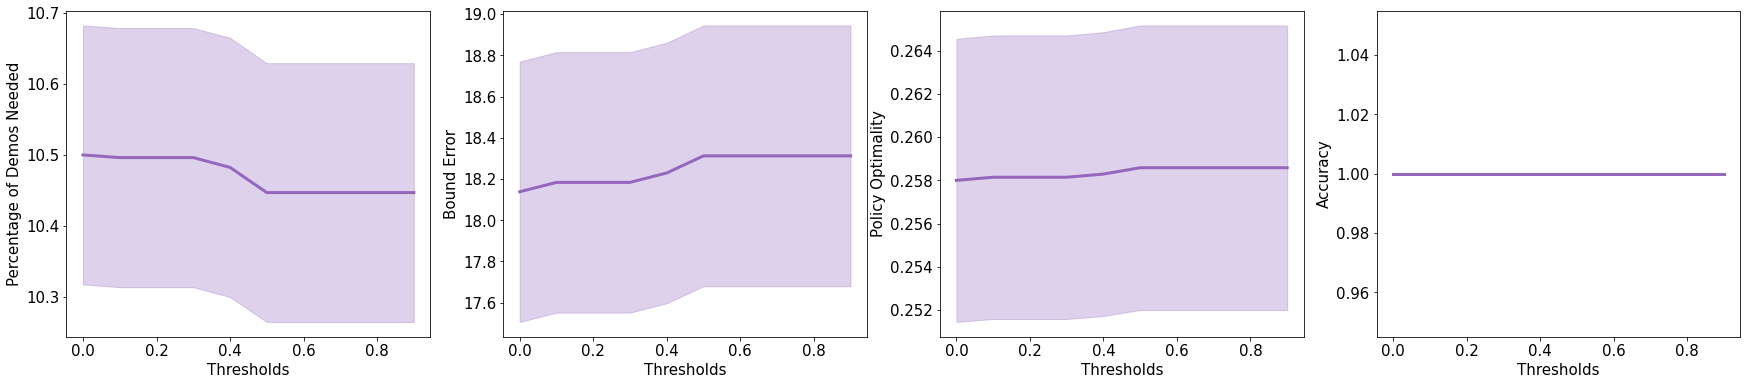

In [83]:
fig, axes = plt.subplots(1, 4, figsize = (30, 6))
color = "#9467BD"
labels = thresholds[::-1]
x = labels[1:]

# y = np.array([mean(metrics["bounds"][t]) for t in x])
# axes[0, 0].plot(x, y, color = color)
# err = np.array([sem(metrics["bounds"][t]) for t in x])
# axes[0, 0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 0].set_title("α-VaR Bounds")

y = np.array([mean(metrics["num_demos"][t]) for t in x])
axes[0].plot(x, y, color = color)
err = np.array([sem(metrics["num_demos"][t]) for t in x])
axes[0].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[0].set(xlabel = "Thresholds", ylabel = "Percentage of Demos Needed")
# axes[0].set_yticks([round(v, 2) for v in np.arange(0.52, 0.721, 0.04)])

# y = np.array([mean(metrics["true_evds"][t]) for t in x])
# axes[0, 2].plot(x, y, color = color)
# err = np.array([sem(metrics["true_evds"][t]) for t in x])
# axes[0, 2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[0, 2].set_title("Ground Truth EVD")
# axes[0, 2].set_yticks([round(v, 3) for v in np.arange(0.000, 0.011, 0.002)])

y = np.array([mean(metrics["bound_errors"][t]) for t in x])
axes[1].plot(x, y, color = color)
err = np.array([sem(metrics["bound_errors"][t]) for t in x])
axes[1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
axes[1].set(xlabel = "Thresholds", ylabel = "Bound Error")
# axes[1].set_yticks([round(v, 2) for v in np.arange(0.00, 0.035, 0.01)])

y = np.array([mean(metrics["policy_optimalities"][t]) for t in x])
axes[2].plot(x, y, color = color)
err = np.array([sem(metrics["policy_optimalities"][t]) for t in x])
axes[2].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[2].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
# axes[2].set_ylim([0.67, 1.03])
axes[2].set(xlabel = "Thresholds", ylabel = "Policy Optimality")

# y = np.array([mean(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].plot(x, y, color = color)
# err = np.array([sem(metrics["policy_accuracies"][t]) for t in x])
# axes[1, 1].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[1, 1].set_title("Policy Accuracy")
# axes[1, 1].set_yticks([round(v, 3) for v in np.arange(0.960, 0.981, 0.005)])

# axes[1, 2].plot(x, [metrics["confidence"][t] for t in x], color = color)
# axes[1, 2].set_title("Percentage of Worlds That Passed")

y = np.array([metrics["accuracies"][t] for t in x])
axes[3].plot(x, y, color = color)
err = np.array([np.std(y) / np.sqrt(len(y))] * len(y))
axes[3].fill_between(x, y - err, y + err, alpha = 0.3, color = color)
# axes[3].set_yticks([round(v, 1) for v in np.arange(0.7, 1.01, 0.1)])
# axes[3].set_ylim([0.67, 1.03])
axes[3].set(xlabel = "Thresholds", ylabel = "Accuracy")

plt.show()

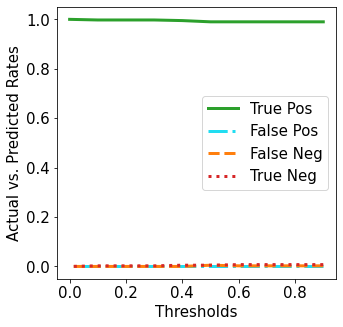

In [84]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
tp = [metrics["confusion_matrices"][t][0][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fp = [metrics["confusion_matrices"][t][0][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
fn = [metrics["confusion_matrices"][t][1][0] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
tn = [metrics["confusion_matrices"][t][1][1] / sum(np.array(metrics["confusion_matrices"][t]).flatten()) for t in x]
plt.plot(x, tp, label = "True Pos", color = "#2CA02C", linestyle = "-")
plt.plot(x, fp, label = "False Pos", color = "#21DDF1", linestyle = "-.")
plt.plot(x, fn, label = "False Neg", color = "#FF7F0E", linestyle = "--")
plt.plot(x, tn, label = "True Neg", color = "#D62728", linestyle = ":")
ax.set_yticks(np.arange(0.0, 1.1, 0.2))
plt.ylabel("Actual vs. Predicted Rates")
plt.xlabel("Thresholds")
plt.legend()
plt.show()

In [10]:
# blue: #1F77B4
# orange: #FF7F0E
# green: #2CA02C
# red: #D62728
# purple: #9467BD
print(20 * len(thresholds))

220
